In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv('~/Downloads/training.csv')
test = pd.read_csv('~/Downloads/test.csv')
lookup = pd.read_csv('~/Downloads/IdLookupTable.csv')

print(train.shape)
print(test.shape)
print(lookup.shape)

(7049, 31)
(1783, 2)
(27124, 4)


In [23]:
na_cols = train.columns[train.isna().any()].tolist()
train = train.fillna(train[na_cols].mean())
X_train = train['Image'].apply(lambda img: np.fromstring(img, sep=' '))
X_train = np.vstack(X_train.values).reshape(-1, 96, 96).astype(np.uint8)

Y_train = train.drop(['Image'], axis=1)
Y_train = Y_train.values.astype(np.float32)

X_test = test['Image'].apply(lambda img: np.fromstring(img, sep=' '))
X_test = np.vstack(X_test.values).reshape(-1, 96, 96).astype(np.uint8)

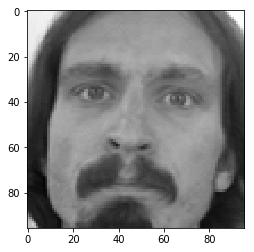

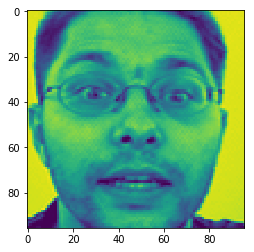

(7049, 30)

In [24]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

plt.imshow(X_test[0])
plt.show()

Y_train.shape

In [25]:
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])

model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae', 'accuracy'])

history = model.fit(X_train, Y_train, epochs=180, batch_size=128, validation_split=0.2)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


Train on 5639 samples, validate on 1410 samples
Epoch 1/180


 128/5639 [..............................] - ETA: 15s - loss: 17487.0410 - mean_absolute_error: 105.6909 - acc: 0.0000e+00

 256/5639 [>.............................] - ETA: 8s - loss: 168692.1299 - mean_absolute_error: 286.2860 - acc: 0.0000e+00

 512/5639 [=>............................] - ETA: 4s - loss: 133112.8755 - mean_absolute_error: 267.2432 - acc: 0.0000e+00

 768/5639 [===>..........................] - ETA: 3s - loss: 108308.8415 - mean_absolute_error: 239.7099 - acc: 0.0065    

1024/5639 [====>.........................] - ETA: 2s - loss: 90238.7722 - mean_absolute_error: 216.2371 - acc: 0.0371 

1280/5639 [=====>........................] - ETA: 2s - loss: 78582.4229 - mean_absolute_error: 200.1648 - acc: 0.0391

1536/5639 [=======>......................] - ETA: 1s - loss: 69683.7231 - mean_absolute_error: 186.8205 - acc: 0.0352

1792/5639 [========>.....................] - ETA: 1s - loss: 62644.4470 - mean_absolute_error: 176.2162 - acc: 0.0301

2048/5639 [=========>....................] - ETA: 1s - loss: 56582.2875 - mean_absolute_error: 165.7861 - acc: 0.0269

2304/5639 [===========>..................] - ETA: 1s - loss: 51459.7983 - mean_absolute_error: 155.9615 - acc: 0.0243

2560/5639 [============>.................] - ETA: 1s - loss: 47082.1187 - mean_absolute_error: 147.1083 - acc: 0.0234

2816/5639 [=============>................] - ETA: 1s - loss: 43439.0707 - mean_absolute_error: 139.7049 - acc: 0.0224

3072/5639 [===============>..............] - ETA: 0s - loss: 40244.9953 - mean_absolute_error: 132.8074 - acc: 0.0212

3328/5639 [================>.............] - ETA: 0s - loss: 37456.8793 - mean_absolute_error: 126.4527 - acc: 0.0195

3584/5639 [==================>...........] - ETA: 0s - loss: 35044.2238 - mean_absolute_error: 120.9310 - acc: 0.0181

3840/5639 [===================>..........] - ETA: 0s - loss: 32912.2403 - mean_absolute_error: 115.9107 - acc: 0.0169

4096/5639 [====================>.........] - ETA: 0s - loss: 31018.1610 - mean_absolute_error: 111.3415 - acc: 0.0159

4352/5639 [======================>.......] - ETA: 0s - loss: 29345.3953 - mean_absolute_error: 107.3122 - acc: 0.0152

4608/5639 [=======================>......] - ETA: 0s - loss: 27854.2285 - mean_absolute_error: 103.7201 - acc: 0.0143

4736/5639 [========================>.....] - ETA: 0s - loss: 27165.1215 - mean_absolute_error: 102.0343 - acc: 0.0139

4864/5639 [========================>.....] - ETA: 0s - loss: 26508.2012 - mean_absolute_error: 100.4105 - acc: 0.0142

5120/5639 [==========================>...] - ETA: 0s - loss: 25288.9443 - mean_absolute_error: 97.3848 - acc: 0.0156 

5376/5639 [===========================>..] - ETA: 0s - loss: 24186.4092 - mean_absolute_error: 94.6151 - acc: 0.0154

5632/5639 [============================>.] - ETA: 0s - loss: 23184.4263 - mean_absolute_error: 92.0962 - acc: 0.0149

5639/5639 [==============================] - 2s 325us/step - loss: 23158.3740 - mean_absolute_error: 92.0320 - acc: 0.0149 - val_loss: 2097.6135 - val_mean_absolute_error: 38.5969 - val_acc: 0.0000e+00


Epoch 2/180


 128/5639 [..............................] - ETA: 2s - loss: 2146.3552 - mean_absolute_error: 39.1589 - acc: 0.0000e+00

 256/5639 [>.............................] - ETA: 2s - loss: 2127.5145 - mean_absolute_error: 38.9569 - acc: 0.0000e+00

 512/5639 [=>............................] - ETA: 1s - loss: 2113.9709 - mean_absolute_error: 38.6382 - acc: 0.0000e+00

 768/5639 [===>..........................] - ETA: 1s - loss: 2097.6882 - mean_absolute_error: 38.4166 - acc: 0.0000e+00

1024/5639 [====>.........................] - ETA: 1s - loss: 2081.1154 - mean_absolute_error: 38.2454 - acc: 0.0000e+00

1280/5639 [=====>........................] - ETA: 1s - loss: 2063.9987 - mean_absolute_error: 38.0694 - acc: 0.0000e+00

1536/5639 [=======>......................] - ETA: 1s - loss: 2047.0441 - mean_absolute_error: 37.8955 - acc: 0.0000e+00

1792/5639 [========>.....................] - ETA: 1s - loss: 2027.0618 - mean_absolute_error: 37.6744 - acc: 0.0000e+00

2048/5639 [=========>....................] - ETA: 1s - loss: 2003.8763 - mean_absolute_error: 37.4204 - acc: 0.0000e+00

2304/5639 [===========>..................] - ETA: 0s - loss: 1982.0349 - mean_absolute_error: 37.1812 - acc: 0.0000e+00

2560/5639 [============>.................] - ETA: 0s - loss: 1958.2387 - mean_absolute_error: 36.9127 - acc: 0.0000e+00

2816/5639 [=============>................] - ETA: 0s - loss: 1936.0485 - mean_absolute_error: 36.6666 - acc: 0.0000e+00

3072/5639 [===============>..............] - ETA: 0s - loss: 1916.2278 - mean_absolute_error: 36.4519 - acc: 0.0000e+00

3328/5639 [================>.............] - ETA: 0s - loss: 1894.4923 - mean_absolute_error: 36.2161 - acc: 0.0000e+00

3584/5639 [==================>...........] - ETA: 0s - loss: 1872.1773 - mean_absolute_error: 35.9645 - acc: 0.0000e+00

3840/5639 [===================>..........] - ETA: 0s - loss: 1847.1004 - mean_absolute_error: 35.6922 - acc: 0.0000e+00

3968/5639 [====================>.........] - ETA: 0s - loss: 1834.5005 - mean_absolute_error: 35.5523 - acc: 0.0000e+00

4096/5639 [====================>.........] - ETA: 0s - loss: 1823.5722 - mean_absolute_error: 35.4341 - acc: 2.4414e-04

4352/5639 [======================>.......] - ETA: 0s - loss: 1799.3733 - mean_absolute_error: 35.1746 - acc: 2.2978e-04

4608/5639 [=======================>......] - ETA: 0s - loss: 1776.3275 - mean_absolute_error: 34.9319 - acc: 2.1701e-04

4864/5639 [========================>.....] - ETA: 0s - loss: 1750.4816 - mean_absolute_error: 34.6483 - acc: 2.0559e-04

5120/5639 [==========================>...] - ETA: 0s - loss: 1727.1634 - mean_absolute_error: 34.3845 - acc: 1.9531e-04

5376/5639 [===========================>..] - ETA: 0s - loss: 1701.8891 - mean_absolute_error: 34.1018 - acc: 1.8601e-04

5632/5639 [============================>.] - ETA: 0s - loss: 1676.6890 - mean_absolute_error: 33.8110 - acc: 1.7756e-04

5639/5639 [==============================] - 2s 301us/step - loss: 1676.1041 - mean_absolute_error: 33.8048 - acc: 1.7734e-04 - val_loss: 937.1873 - val_mean_absolute_error: 24.9715 - val_acc: 0.0000e+00


Epoch 3/180


 128/5639 [..............................] - ETA: 1s - loss: 1128.9377 - mean_absolute_error: 27.3659 - acc: 0.0000e+00



 256/5639 [>.............................] - ETA: 2s - loss: 1159.4170 - mean_absolute_error: 27.7198 - acc: 0.0000e+00

 512/5639 [=>............................] - ETA: 1s - loss: 1113.8691 - mean_absolute_error: 27.1598 - acc: 0.0000e+00

 768/5639 [===>..........................] - ETA: 1s - loss: 1059.9693 - mean_absolute_error: 26.4391 - acc: 0.0013    

1024/5639 [====>.........................] - ETA: 1s - loss: 1034.7219 - mean_absolute_error: 26.0704 - acc: 0.0020

1280/5639 [=====>........................] - ETA: 1s - loss: 1010.8409 - mean_absolute_error: 25.8106 - acc: 0.0047

1536/5639 [=======>......................] - ETA: 1s - loss: 984.6625 - mean_absolute_error: 25.4319 - acc: 0.0052 

1792/5639 [========>.....................] - ETA: 1s - loss: 959.8981 - mean_absolute_error: 25.0428 - acc: 0.0061

2048/5639 [=========>....................] - ETA: 0s - loss: 936.8333 - mean_absolute_error: 24.6770 - acc: 0.0054

2304/5639 [===========>..................] - ETA: 0s - loss: 912.1873 - mean_absolute_error: 24.2865 - acc: 0.0052

2560/5639 [============>.................] - ETA: 0s - loss: 892.4834 - mean_absolute_error: 23.9602 - acc: 0.0047

2816/5639 [=============>................] - ETA: 0s - loss: 867.6297 - mean_absolute_error: 23.5637 - acc: 0.0050

3072/5639 [===============>..............] - ETA: 0s - loss: 846.3613 - mean_absolute_error: 23.2162 - acc: 0.0049

3328/5639 [================>.............] - ETA: 0s - loss: 831.3356 - mean_absolute_error: 22.9605 - acc: 0.0051

3584/5639 [==================>...........] - ETA: 0s - loss: 814.0638 - mean_absolute_error: 22.6706 - acc: 0.0047

3840/5639 [===================>..........] - ETA: 0s - loss: 797.5648 - mean_absolute_error: 22.3872 - acc: 0.0049

4096/5639 [====================>.........] - ETA: 0s - loss: 781.6605 - mean_absolute_error: 22.1209 - acc: 0.0049

4352/5639 [======================>.......] - ETA: 0s - loss: 766.9713 - mean_absolute_error: 21.8715 - acc: 0.0051

4608/5639 [=======================>......] - ETA: 0s - loss: 752.6318 - mean_absolute_error: 21.6142 - acc: 0.0048

4864/5639 [========================>.....] - ETA: 0s - loss: 737.4463 - mean_absolute_error: 21.3343 - acc: 0.0049

5120/5639 [==========================>...] - ETA: 0s - loss: 722.6712 - mean_absolute_error: 21.0812 - acc: 0.0049

5376/5639 [===========================>..] - ETA: 0s - loss: 708.7325 - mean_absolute_error: 20.8220 - acc: 0.0050

5632/5639 [============================>.] - ETA: 0s - loss: 697.7097 - mean_absolute_error: 20.6145 - acc: 0.0051

5639/5639 [==============================] - 2s 268us/step - loss: 697.2650 - mean_absolute_error: 20.6062 - acc: 0.0051 - val_loss: 239.5149 - val_mean_absolute_error: 12.2658 - val_acc: 7.0922e-04


Epoch 4/180
 128/5639 [..............................] - ETA: 1s - loss: 452.7125 - mean_absolute_error: 16.0197 - acc: 0.0078

 384/5639 [=>............................] - ETA: 1s - loss: 387.6155 - mean_absolute_error: 14.9018 - acc: 0.0078

 640/5639 [==>...........................] - ETA: 1s - loss: 388.9020 - mean_absolute_error: 14.9621 - acc: 0.0422

 896/5639 [===>..........................] - ETA: 1s - loss: 393.6103 - mean_absolute_error: 14.9793 - acc: 0.1462

1152/5639 [=====>........................] - ETA: 1s - loss: 381.4156 - mean_absolute_error: 14.7283 - acc: 0.2092

1408/5639 [======>.......................] - ETA: 1s - loss: 377.3431 - mean_absolute_error: 14.6003 - acc: 0.2386

1664/5639 [=======>......................] - ETA: 0s - loss: 380.3291 - mean_absolute_error: 14.6038 - acc: 0.2368

1920/5639 [=========>....................] - ETA: 0s - loss: 375.0917 - mean_absolute_error: 14.4737 - acc: 0.2297

2176/5639 [==========>...................] - ETA: 0s - loss: 368.2761 - mean_absolute_error: 14.3316 - acc: 0.2325

2432/5639 [===========>..................] - ETA: 0s - loss: 369.3802 - mean_absolute_error: 14.2909 - acc: 0.2414

2688/5639 [=============>................] - ETA: 0s - loss: 364.2950 - mean_absolute_error: 14.1685 - acc: 0.2563

2944/5639 [==============>...............] - ETA: 0s - loss: 358.8457 - mean_absolute_error: 14.0334 - acc: 0.2639

3200/5639 [================>.............] - ETA: 0s - loss: 354.8656 - mean_absolute_error: 13.9261 - acc: 0.2719

3456/5639 [=================>............] - ETA: 0s - loss: 353.2725 - mean_absolute_error: 13.8397 - acc: 0.2731

3712/5639 [==================>...........] - ETA: 0s - loss: 349.1500 - mean_absolute_error: 13.7316 - acc: 0.2667

3968/5639 [====================>.........] - ETA: 0s - loss: 345.3272 - mean_absolute_error: 13.6275 - acc: 0.2550

4224/5639 [=====================>........] - ETA: 0s - loss: 343.2300 - mean_absolute_error: 13.5739 - acc: 0.2469

4480/5639 [======================>.......] - ETA: 0s - loss: 340.1263 - mean_absolute_error: 13.4917 - acc: 0.2473

4736/5639 [========================>.....] - ETA: 0s - loss: 335.3905 - mean_absolute_error: 13.3623 - acc: 0.2504

4992/5639 [=========================>....] - ETA: 0s - loss: 331.6309 - mean_absolute_error: 13.2683 - acc: 0.2528

5248/5639 [==========================>...] - ETA: 0s - loss: 329.8804 - mean_absolute_error: 13.2254 - acc: 0.2515

5376/5639 [===========================>..] - ETA: 0s - loss: 328.8723 - mean_absolute_error: 13.2015 - acc: 0.2491

5632/5639 [============================>.] - ETA: 0s - loss: 327.1331 - mean_absolute_error: 13.1496 - acc: 0.2445

5639/5639 [==============================] - 1s 259us/step - loss: 326.9283 - mean_absolute_error: 13.1451 - acc: 0.2442 - val_loss: 132.2849 - val_mean_absolute_error: 8.5365 - val_acc: 0.2184


Epoch 5/180


 128/5639 [..............................] - ETA: 1s - loss: 278.6530 - mean_absolute_error: 12.0910 - acc: 0.1484

 256/5639 [>.............................] - ETA: 2s - loss: 314.2822 - mean_absolute_error: 12.8660 - acc: 0.1836

 512/5639 [=>............................] - ETA: 1s - loss: 286.1355 - mean_absolute_error: 12.3423 - acc: 0.2441

 768/5639 [===>..........................] - ETA: 1s - loss: 299.3373 - mean_absolute_error: 12.5131 - acc: 0.2500

1024/5639 [====>.........................] - ETA: 1s - loss: 294.2115 - mean_absolute_error: 12.3856 - acc: 0.2510

1280/5639 [=====>........................] - ETA: 1s - loss: 286.6182 - mean_absolute_error: 12.1594 - acc: 0.2359

1536/5639 [=======>......................] - ETA: 1s - loss: 289.0869 - mean_absolute_error: 12.2032 - acc: 0.2148

1792/5639 [========>.....................] - ETA: 0s - loss: 283.9413 - mean_absolute_error: 12.0263 - acc: 0.2104

2048/5639 [=========>....................] - ETA: 0s - loss: 285.4568 - mean_absolute_error: 12.0923 - acc: 0.2104

2304/5639 [===========>..................] - ETA: 0s - loss: 284.7747 - mean_absolute_error: 12.0882 - acc: 0.2062

2560/5639 [============>.................] - ETA: 0s - loss: 283.3672 - mean_absolute_error: 12.1071 - acc: 0.2027

2816/5639 [=============>................] - ETA: 0s - loss: 279.3416 - mean_absolute_error: 12.0006 - acc: 0.2017

3072/5639 [===============>..............] - ETA: 0s - loss: 280.4552 - mean_absolute_error: 12.0109 - acc: 0.2061

3328/5639 [================>.............] - ETA: 0s - loss: 282.2573 - mean_absolute_error: 12.0465 - acc: 0.2037

3584/5639 [==================>...........] - ETA: 0s - loss: 281.4408 - mean_absolute_error: 12.0131 - acc: 0.1956

3840/5639 [===================>..........] - ETA: 0s - loss: 279.6960 - mean_absolute_error: 11.9750 - acc: 0.1901

4096/5639 [====================>.........] - ETA: 0s - loss: 278.9634 - mean_absolute_error: 11.9492 - acc: 0.1846

4352/5639 [======================>.......] - ETA: 0s - loss: 276.0047 - mean_absolute_error: 11.8964 - acc: 0.1829

4608/5639 [=======================>......] - ETA: 0s - loss: 274.1207 - mean_absolute_error: 11.8652 - acc: 0.1877

4864/5639 [========================>.....] - ETA: 0s - loss: 271.3863 - mean_absolute_error: 11.8104 - acc: 0.1922

5120/5639 [==========================>...] - ETA: 0s - loss: 273.8109 - mean_absolute_error: 11.8606 - acc: 0.1984

5376/5639 [===========================>..] - ETA: 0s - loss: 272.5114 - mean_absolute_error: 11.8218 - acc: 0.2005

5504/5639 [============================>.] - ETA: 0s - loss: 271.8597 - mean_absolute_error: 11.8117 - acc: 0.2002

5639/5639 [==============================] - 1s 265us/step - loss: 272.6471 - mean_absolute_error: 11.8151 - acc: 0.2015 - val_loss: 142.7885 - val_mean_absolute_error: 8.8775 - val_acc: 0.2504


Epoch 6/180


 128/5639 [..............................] - ETA: 1s - loss: 214.1915 - mean_absolute_error: 10.7889 - acc: 0.2656

 256/5639 [>.............................] - ETA: 1s - loss: 224.7882 - mean_absolute_error: 10.6787 - acc: 0.2188

 512/5639 [=>............................] - ETA: 1s - loss: 241.0414 - mean_absolute_error: 11.1345 - acc: 0.2246

 768/5639 [===>..........................] - ETA: 1s - loss: 233.8509 - mean_absolute_error: 10.9643 - acc: 0.2240

1024/5639 [====>.........................] - ETA: 1s - loss: 236.1477 - mean_absolute_error: 11.0772 - acc: 0.2295

1280/5639 [=====>........................] - ETA: 1s - loss: 240.5117 - mean_absolute_error: 11.2128 - acc: 0.2266

1536/5639 [=======>......................] - ETA: 1s - loss: 237.3759 - mean_absolute_error: 11.1447 - acc: 0.2214

1792/5639 [========>.....................] - ETA: 1s - loss: 241.5697 - mean_absolute_error: 11.2337 - acc: 0.2215

2048/5639 [=========>....................] - ETA: 0s - loss: 240.0332 - mean_absolute_error: 11.1844 - acc: 0.2163

2304/5639 [===========>..................] - ETA: 0s - loss: 240.5865 - mean_absolute_error: 11.2238 - acc: 0.2196

2560/5639 [============>.................] - ETA: 0s - loss: 240.2288 - mean_absolute_error: 11.1932 - acc: 0.2391

2816/5639 [=============>................] - ETA: 0s - loss: 242.4193 - mean_absolute_error: 11.2331 - acc: 0.2550

3072/5639 [===============>..............] - ETA: 0s - loss: 241.6635 - mean_absolute_error: 11.1983 - acc: 0.2666

3328/5639 [================>.............] - ETA: 0s - loss: 240.6323 - mean_absolute_error: 11.1642 - acc: 0.2803

3584/5639 [==================>...........] - ETA: 0s - loss: 240.5462 - mean_absolute_error: 11.1618 - acc: 0.2899

3840/5639 [===================>..........] - ETA: 0s - loss: 240.2277 - mean_absolute_error: 11.1367 - acc: 0.2987

4096/5639 [====================>.........] - ETA: 0s - loss: 237.4696 - mean_absolute_error: 11.0687 - acc: 0.3076

4352/5639 [======================>.......] - ETA: 0s - loss: 236.7366 - mean_absolute_error: 11.0560 - acc: 0.3187

4608/5639 [=======================>......] - ETA: 0s - loss: 236.6006 - mean_absolute_error: 11.0408 - acc: 0.3275

4864/5639 [========================>.....] - ETA: 0s - loss: 235.5316 - mean_absolute_error: 11.0299 - acc: 0.3361

5120/5639 [==========================>...] - ETA: 0s - loss: 236.4734 - mean_absolute_error: 11.0532 - acc: 0.3426

5376/5639 [===========================>..] - ETA: 0s - loss: 234.5404 - mean_absolute_error: 11.0251 - acc: 0.3475

5632/5639 [============================>.] - ETA: 0s - loss: 233.3140 - mean_absolute_error: 11.0091 - acc: 0.3494

5639/5639 [==============================] - 2s 276us/step - loss: 233.0781 - mean_absolute_error: 11.0019 - acc: 0.3497 - val_loss: 160.1390 - val_mean_absolute_error: 9.5219 - val_acc: 0.5262


Epoch 7/180


 128/5639 [..............................] - ETA: 1s - loss: 265.0728 - mean_absolute_error: 11.5189 - acc: 0.4844

 256/5639 [>.............................] - ETA: 1s - loss: 244.0598 - mean_absolute_error: 11.2727 - acc: 0.4453

 512/5639 [=>............................] - ETA: 1s - loss: 237.2045 - mean_absolute_error: 11.1981 - acc: 0.4668

 768/5639 [===>..........................] - ETA: 1s - loss: 232.2784 - mean_absolute_error: 11.1192 - acc: 0.4753

1024/5639 [====>.........................] - ETA: 1s - loss: 233.0653 - mean_absolute_error: 11.1526 - acc: 0.4668

1280/5639 [=====>........................] - ETA: 1s - loss: 227.9477 - mean_absolute_error: 11.0163 - acc: 0.4594

1536/5639 [=======>......................] - ETA: 1s - loss: 222.9133 - mean_absolute_error: 10.8698 - acc: 0.4473

1792/5639 [========>.....................] - ETA: 0s - loss: 219.5565 - mean_absolute_error: 10.7438 - acc: 0.4492

2048/5639 [=========>....................] - ETA: 0s - loss: 220.5247 - mean_absolute_error: 10.7743 - acc: 0.4492

2304/5639 [===========>..................] - ETA: 0s - loss: 225.2004 - mean_absolute_error: 10.8468 - acc: 0.4462

2560/5639 [============>.................] - ETA: 0s - loss: 225.7972 - mean_absolute_error: 10.8817 - acc: 0.4437

2816/5639 [=============>................] - ETA: 0s - loss: 225.9806 - mean_absolute_error: 10.8558 - acc: 0.4464

3072/5639 [===============>..............] - ETA: 0s - loss: 226.6788 - mean_absolute_error: 10.8994 - acc: 0.4430

3328/5639 [================>.............] - ETA: 0s - loss: 228.1092 - mean_absolute_error: 10.9481 - acc: 0.4429

3584/5639 [==================>...........] - ETA: 0s - loss: 224.5582 - mean_absolute_error: 10.8594 - acc: 0.4473

3840/5639 [===================>..........] - ETA: 0s - loss: 225.7323 - mean_absolute_error: 10.8748 - acc: 0.4503

4096/5639 [====================>.........] - ETA: 0s - loss: 226.7086 - mean_absolute_error: 10.8676 - acc: 0.4495

4352/5639 [======================>.......] - ETA: 0s - loss: 225.6699 - mean_absolute_error: 10.8365 - acc: 0.4478

4608/5639 [=======================>......] - ETA: 0s - loss: 223.8782 - mean_absolute_error: 10.7808 - acc: 0.4507

4864/5639 [========================>.....] - ETA: 0s - loss: 222.5482 - mean_absolute_error: 10.7566 - acc: 0.4511

5120/5639 [==========================>...] - ETA: 0s - loss: 223.2211 - mean_absolute_error: 10.7838 - acc: 0.4512

5376/5639 [===========================>..] - ETA: 0s - loss: 222.8776 - mean_absolute_error: 10.7653 - acc: 0.4466



5504/5639 [============================>.] - ETA: 0s - loss: 221.7459 - mean_absolute_error: 10.7470 - acc: 0.4482

5639/5639 [==============================] - 2s 267us/step - loss: 221.1950 - mean_absolute_error: 10.7356 - acc: 0.4487 - val_loss: 123.1644 - val_mean_absolute_error: 8.2107 - val_acc: 0.4227


Epoch 8/180


 128/5639 [..............................] - ETA: 2s - loss: 194.7258 - mean_absolute_error: 10.2892 - acc: 0.3906

 384/5639 [=>............................] - ETA: 1s - loss: 204.9867 - mean_absolute_error: 10.5327 - acc: 0.3307

 640/5639 [==>...........................] - ETA: 1s - loss: 200.4061 - mean_absolute_error: 10.3886 - acc: 0.3500

 896/5639 [===>..........................] - ETA: 1s - loss: 206.4507 - mean_absolute_error: 10.4015 - acc: 0.3951

1152/5639 [=====>........................] - ETA: 1s - loss: 204.6165 - mean_absolute_error: 10.3886 - acc: 0.4097

1408/5639 [======>.......................] - ETA: 1s - loss: 208.7127 - mean_absolute_error: 10.5182 - acc: 0.4183

1664/5639 [=======>......................] - ETA: 1s - loss: 207.4648 - mean_absolute_error: 10.4733 - acc: 0.4135

1920/5639 [=========>....................] - ETA: 0s - loss: 208.3745 - mean_absolute_error: 10.5168 - acc: 0.4021

2176/5639 [==========>...................] - ETA: 0s - loss: 205.0121 - mean_absolute_error: 10.4553 - acc: 0.4058

2432/5639 [===========>..................] - ETA: 0s - loss: 202.6453 - mean_absolute_error: 10.3554 - acc: 0.4132

2688/5639 [=============>................] - ETA: 0s - loss: 199.2065 - mean_absolute_error: 10.2585 - acc: 0.4204

2944/5639 [==============>...............] - ETA: 0s - loss: 196.0834 - mean_absolute_error: 10.1825 - acc: 0.4266

3200/5639 [================>.............] - ETA: 0s - loss: 196.7506 - mean_absolute_error: 10.1986 - acc: 0.4300

3456/5639 [=================>............] - ETA: 0s - loss: 195.3740 - mean_absolute_error: 10.1707 - acc: 0.4265

3712/5639 [==================>...........] - ETA: 0s - loss: 196.8997 - mean_absolute_error: 10.1865 - acc: 0.4259

3968/5639 [====================>.........] - ETA: 0s - loss: 195.9627 - mean_absolute_error: 10.1586 - acc: 0.4267

4224/5639 [=====================>........] - ETA: 0s - loss: 195.3232 - mean_absolute_error: 10.1584 - acc: 0.4283

4480/5639 [======================>.......] - ETA: 0s - loss: 195.8267 - mean_absolute_error: 10.1571 - acc: 0.4275

4736/5639 [========================>.....] - ETA: 0s - loss: 197.3554 - mean_absolute_error: 10.1758 - acc: 0.4276

4992/5639 [=========================>....] - ETA: 0s - loss: 201.1128 - mean_absolute_error: 10.2456 - acc: 0.4265

5248/5639 [==========================>...] - ETA: 0s - loss: 201.3082 - mean_absolute_error: 10.2445 - acc: 0.4278

5504/5639 [============================>.] - ETA: 0s - loss: 201.0176 - mean_absolute_error: 10.2457 - acc: 0.4290

5639/5639 [==============================] - 1s 264us/step - loss: 200.7593 - mean_absolute_error: 10.2444 - acc: 0.4297 - val_loss: 195.7410 - val_mean_absolute_error: 10.9397 - val_acc: 0.4475


Epoch 9/180


 128/5639 [..............................] - ETA: 1s - loss: 162.0375 - mean_absolute_error: 9.5062 - acc: 0.4375

 384/5639 [=>............................] - ETA: 1s - loss: 217.0014 - mean_absolute_error: 10.8308 - acc: 0.3594

 640/5639 [==>...........................] - ETA: 1s - loss: 215.8148 - mean_absolute_error: 10.7499 - acc: 0.3297



 896/5639 [===>..........................] - ETA: 1s - loss: 215.7769 - mean_absolute_error: 10.7444 - acc: 0.3471

1152/5639 [=====>........................] - ETA: 1s - loss: 207.3875 - mean_absolute_error: 10.5672 - acc: 0.3802

1408/5639 [======>.......................] - ETA: 1s - loss: 209.3116 - mean_absolute_error: 10.6314 - acc: 0.4013

1664/5639 [=======>......................] - ETA: 1s - loss: 207.0142 - mean_absolute_error: 10.5051 - acc: 0.4141

1920/5639 [=========>....................] - ETA: 0s - loss: 204.0115 - mean_absolute_error: 10.4408 - acc: 0.4182

2176/5639 [==========>...................] - ETA: 0s - loss: 200.9726 - mean_absolute_error: 10.3643 - acc: 0.3883

2432/5639 [===========>..................] - ETA: 0s - loss: 201.3484 - mean_absolute_error: 10.3726 - acc: 0.3639

2688/5639 [=============>................] - ETA: 0s - loss: 197.8838 - mean_absolute_error: 10.2721 - acc: 0.3579

2944/5639 [==============>...............] - ETA: 0s - loss: 198.0583 - mean_absolute_error: 10.2511 - acc: 0.3716

3200/5639 [================>.............] - ETA: 0s - loss: 197.3830 - mean_absolute_error: 10.2364 - acc: 0.3837

3456/5639 [=================>............] - ETA: 0s - loss: 195.1411 - mean_absolute_error: 10.1754 - acc: 0.3932

3712/5639 [==================>...........] - ETA: 0s - loss: 195.2262 - mean_absolute_error: 10.1597 - acc: 0.3939

3968/5639 [====================>.........] - ETA: 0s - loss: 196.7985 - mean_absolute_error: 10.2035 - acc: 0.3947

4224/5639 [=====================>........] - ETA: 0s - loss: 193.9578 - mean_absolute_error: 10.1120 - acc: 0.3989

4480/5639 [======================>.......] - ETA: 0s - loss: 193.9587 - mean_absolute_error: 10.1110 - acc: 0.4056

4736/5639 [========================>.....] - ETA: 0s - loss: 194.3238 - mean_absolute_error: 10.1146 - acc: 0.4128

4992/5639 [=========================>....] - ETA: 0s - loss: 196.3215 - mean_absolute_error: 10.1330 - acc: 0.4189

5120/5639 [==========================>...] - ETA: 0s - loss: 196.8254 - mean_absolute_error: 10.1541 - acc: 0.4191

5248/5639 [==========================>...] - ETA: 0s - loss: 196.4481 - mean_absolute_error: 10.1406 - acc: 0.4211

5504/5639 [============================>.] - ETA: 0s - loss: 195.9644 - mean_absolute_error: 10.1157 - acc: 0.4231

5639/5639 [==============================] - 2s 266us/step - loss: 195.3342 - mean_absolute_error: 10.1040 - acc: 0.4244 - val_loss: 150.6311 - val_mean_absolute_error: 9.2168 - val_acc: 0.5709


Epoch 10/180


 128/5639 [..............................] - ETA: 2s - loss: 140.3653 - mean_absolute_error: 8.9073 - acc: 0.4922

 384/5639 [=>............................] - ETA: 1s - loss: 150.9398 - mean_absolute_error: 9.0689 - acc: 0.4792

 640/5639 [==>...........................] - ETA: 1s - loss: 190.4377 - mean_absolute_error: 9.8440 - acc: 0.5031

 896/5639 [===>..........................] - ETA: 1s - loss: 182.7975 - mean_absolute_error: 9.7742 - acc: 0.5290

1152/5639 [=====>........................] - ETA: 1s - loss: 176.4310 - mean_absolute_error: 9.6682 - acc: 0.5182

1408/5639 [======>.......................] - ETA: 1s - loss: 177.3187 - mean_absolute_error: 9.6713 - acc: 0.5036

1664/5639 [=======>......................] - ETA: 1s - loss: 174.2386 - mean_absolute_error: 9.5766 - acc: 0.5024

1920/5639 [=========>....................] - ETA: 1s - loss: 175.4161 - mean_absolute_error: 9.5875 - acc: 0.5083

2176/5639 [==========>...................] - ETA: 0s - loss: 176.0031 - mean_absolute_error: 9.6115 - acc: 0.5138

2432/5639 [===========>..................] - ETA: 0s - loss: 174.8212 - mean_absolute_error: 9.6030 - acc: 0.5156

2688/5639 [=============>................] - ETA: 0s - loss: 172.7927 - mean_absolute_error: 9.5712 - acc: 0.5160

2944/5639 [==============>...............] - ETA: 0s - loss: 171.5797 - mean_absolute_error: 9.5525 - acc: 0.5200

3200/5639 [================>.............] - ETA: 0s - loss: 173.3542 - mean_absolute_error: 9.6065 - acc: 0.5234

3456/5639 [=================>............] - ETA: 0s - loss: 174.0091 - mean_absolute_error: 9.6034 - acc: 0.5249

3712/5639 [==================>...........] - ETA: 0s - loss: 172.4888 - mean_absolute_error: 9.5497 - acc: 0.5272

3968/5639 [====================>.........] - ETA: 0s - loss: 173.9079 - mean_absolute_error: 9.5586 - acc: 0.5265

4224/5639 [=====================>........] - ETA: 0s - loss: 174.0701 - mean_absolute_error: 9.5768 - acc: 0.5275

4480/5639 [======================>.......] - ETA: 0s - loss: 172.0154 - mean_absolute_error: 9.5361 - acc: 0.5281

4736/5639 [========================>.....] - ETA: 0s - loss: 172.4914 - mean_absolute_error: 9.5400 - acc: 0.5291

4992/5639 [=========================>....] - ETA: 0s - loss: 171.5777 - mean_absolute_error: 9.5342 - acc: 0.5310

5248/5639 [==========================>...] - ETA: 0s - loss: 172.4514 - mean_absolute_error: 9.5286 - acc: 0.5303

5504/5639 [============================>.] - ETA: 0s - loss: 172.4133 - mean_absolute_error: 9.5292 - acc: 0.5305

5632/5639 [============================>.] - ETA: 0s - loss: 171.6228 - mean_absolute_error: 9.5032 - acc: 0.5305

5639/5639 [==============================] - 2s 275us/step - loss: 171.6014 - mean_absolute_error: 9.5040 - acc: 0.5306 - val_loss: 114.0352 - val_mean_absolute_error: 7.8549 - val_acc: 0.5730


Epoch 11/180


 128/5639 [..............................] - ETA: 1s - loss: 158.3643 - mean_absolute_error: 9.1986 - acc: 0.4922

 384/5639 [=>............................] - ETA: 1s - loss: 163.4578 - mean_absolute_error: 9.2903 - acc: 0.5208

 640/5639 [==>...........................] - ETA: 1s - loss: 158.6714 - mean_absolute_error: 9.2337 - acc: 0.5094

 896/5639 [===>..........................] - ETA: 1s - loss: 154.4185 - mean_absolute_error: 9.0283 - acc: 0.5167

1152/5639 [=====>........................] - ETA: 1s - loss: 154.4543 - mean_absolute_error: 9.0029 - acc: 0.5269

1408/5639 [======>.......................] - ETA: 1s - loss: 154.5223 - mean_absolute_error: 9.0470 - acc: 0.5277

1664/5639 [=======>......................] - ETA: 1s - loss: 153.9789 - mean_absolute_error: 9.0340 - acc: 0.5282

1920/5639 [=========>....................] - ETA: 1s - loss: 154.5068 - mean_absolute_error: 9.0591 - acc: 0.5219

2176/5639 [==========>...................] - ETA: 0s - loss: 157.1904 - mean_absolute_error: 9.1388 - acc: 0.5239

2432/5639 [===========>..................] - ETA: 0s - loss: 153.9635 - mean_absolute_error: 9.0549 - acc: 0.5267

2688/5639 [=============>................] - ETA: 0s - loss: 155.9140 - mean_absolute_error: 9.1010 - acc: 0.5246

2944/5639 [==============>...............] - ETA: 0s - loss: 159.6553 - mean_absolute_error: 9.1838 - acc: 0.5258

3200/5639 [================>.............] - ETA: 0s - loss: 161.2694 - mean_absolute_error: 9.2184 - acc: 0.5272

3456/5639 [=================>............] - ETA: 0s - loss: 160.2546 - mean_absolute_error: 9.2024 - acc: 0.5249

3712/5639 [==================>...........] - ETA: 0s - loss: 158.8468 - mean_absolute_error: 9.1588 - acc: 0.5237

3968/5639 [====================>.........] - ETA: 0s - loss: 159.5234 - mean_absolute_error: 9.1726 - acc: 0.5222

4224/5639 [=====================>........] - ETA: 0s - loss: 159.9070 - mean_absolute_error: 9.1807 - acc: 0.5206

4480/5639 [======================>.......] - ETA: 0s - loss: 160.9583 - mean_absolute_error: 9.2017 - acc: 0.5203

4736/5639 [========================>.....] - ETA: 0s - loss: 161.7157 - mean_absolute_error: 9.2096 - acc: 0.5203

4992/5639 [=========================>....] - ETA: 0s - loss: 161.1301 - mean_absolute_error: 9.1963 - acc: 0.5216

5120/5639 [==========================>...] - ETA: 0s - loss: 162.4530 - mean_absolute_error: 9.2211 - acc: 0.5207

5376/5639 [===========================>..] - ETA: 0s - loss: 162.9439 - mean_absolute_error: 9.2225 - acc: 0.5214

5504/5639 [============================>.] - ETA: 0s - loss: 162.9832 - mean_absolute_error: 9.2377 - acc: 0.5202

5632/5639 [============================>.] - ETA: 0s - loss: 163.1222 - mean_absolute_error: 9.2355 - acc: 0.5210

5639/5639 [==============================] - 2s 317us/step - loss: 163.0927 - mean_absolute_error: 9.2353 - acc: 0.5212 - val_loss: 112.3932 - val_mean_absolute_error: 7.7893 - val_acc: 0.5723


Epoch 12/180


 128/5639 [..............................] - ETA: 1s - loss: 143.0763 - mean_absolute_error: 8.5846 - acc: 0.5625

 384/5639 [=>............................] - ETA: 1s - loss: 155.9457 - mean_absolute_error: 8.9521 - acc: 0.5052

 640/5639 [==>...........................] - ETA: 1s - loss: 166.7772 - mean_absolute_error: 9.2140 - acc: 0.5437

 896/5639 [===>..........................] - ETA: 1s - loss: 160.1350 - mean_absolute_error: 9.0996 - acc: 0.5469

1152/5639 [=====>........................] - ETA: 1s - loss: 168.4539 - mean_absolute_error: 9.2166 - acc: 0.5304

1408/5639 [======>.......................] - ETA: 1s - loss: 166.9156 - mean_absolute_error: 9.2451 - acc: 0.5320

1664/5639 [=======>......................] - ETA: 1s - loss: 168.7668 - mean_absolute_error: 9.2841 - acc: 0.5252

1920/5639 [=========>....................] - ETA: 0s - loss: 169.9251 - mean_absolute_error: 9.3164 - acc: 0.5250

2176/5639 [==========>...................] - ETA: 0s - loss: 173.1801 - mean_absolute_error: 9.3490 - acc: 0.5262

2432/5639 [===========>..................] - ETA: 0s - loss: 173.2893 - mean_absolute_error: 9.3059 - acc: 0.5238

2688/5639 [=============>................] - ETA: 0s - loss: 170.9414 - mean_absolute_error: 9.2353 - acc: 0.5242

2944/5639 [==============>...............] - ETA: 0s - loss: 168.5812 - mean_absolute_error: 9.1870 - acc: 0.5221

3200/5639 [================>.............] - ETA: 0s - loss: 165.9422 - mean_absolute_error: 9.1225 - acc: 0.5262

3456/5639 [=================>............] - ETA: 0s - loss: 165.0153 - mean_absolute_error: 9.1096 - acc: 0.5243

3712/5639 [==================>...........] - ETA: 0s - loss: 164.4252 - mean_absolute_error: 9.1023 - acc: 0.5224

3968/5639 [====================>.........] - ETA: 0s - loss: 163.5129 - mean_absolute_error: 9.1061 - acc: 0.5270

4224/5639 [=====================>........] - ETA: 0s - loss: 163.3082 - mean_absolute_error: 9.1059 - acc: 0.5294

4480/5639 [======================>.......] - ETA: 0s - loss: 162.7643 - mean_absolute_error: 9.0831 - acc: 0.5268

4736/5639 [========================>.....] - ETA: 0s - loss: 161.2852 - mean_absolute_error: 9.0530 - acc: 0.5258

4992/5639 [=========================>....] - ETA: 0s - loss: 160.8384 - mean_absolute_error: 9.0469 - acc: 0.5258

5248/5639 [==========================>...] - ETA: 0s - loss: 159.2539 - mean_absolute_error: 9.0296 - acc: 0.5255

5376/5639 [===========================>..] - ETA: 0s - loss: 159.0589 - mean_absolute_error: 9.0328 - acc: 0.5238

5504/5639 [============================>.] - ETA: 0s - loss: 158.5149 - mean_absolute_error: 9.0263 - acc: 0.5229

5639/5639 [==============================] - 2s 271us/step - loss: 158.3593 - mean_absolute_error: 9.0323 - acc: 0.5224 - val_loss: 125.8157 - val_mean_absolute_error: 8.3125 - val_acc: 0.5532


Epoch 13/180


 128/5639 [..............................] - ETA: 1s - loss: 160.5759 - mean_absolute_error: 9.3619 - acc: 0.5156

 256/5639 [>.............................] - ETA: 2s - loss: 147.5551 - mean_absolute_error: 8.9917 - acc: 0.5078

 384/5639 [=>............................] - ETA: 2s - loss: 140.9949 - mean_absolute_error: 8.7167 - acc: 0.5156

 512/5639 [=>............................] - ETA: 2s - loss: 150.0133 - mean_absolute_error: 8.8874 - acc: 0.5488

 768/5639 [===>..........................] - ETA: 1s - loss: 153.9705 - mean_absolute_error: 8.9893 - acc: 0.5273

1024/5639 [====>.........................] - ETA: 1s - loss: 160.4634 - mean_absolute_error: 9.0437 - acc: 0.5107

1280/5639 [=====>........................] - ETA: 1s - loss: 153.0343 - mean_absolute_error: 8.9219 - acc: 0.5109

1536/5639 [=======>......................] - ETA: 1s - loss: 149.3616 - mean_absolute_error: 8.8386 - acc: 0.5182

1792/5639 [========>.....................] - ETA: 1s - loss: 150.0295 - mean_absolute_error: 8.8646 - acc: 0.5201

2048/5639 [=========>....................] - ETA: 1s - loss: 146.2026 - mean_absolute_error: 8.7512 - acc: 0.5205

2304/5639 [===========>..................] - ETA: 0s - loss: 145.7109 - mean_absolute_error: 8.7618 - acc: 0.5195

2560/5639 [============>.................] - ETA: 0s - loss: 147.7332 - mean_absolute_error: 8.7938 - acc: 0.5238

2816/5639 [=============>................] - ETA: 0s - loss: 147.4001 - mean_absolute_error: 8.7867 - acc: 0.5195

3072/5639 [===============>..............] - ETA: 0s - loss: 147.6867 - mean_absolute_error: 8.7850 - acc: 0.5199

3328/5639 [================>.............] - ETA: 0s - loss: 148.9632 - mean_absolute_error: 8.8152 - acc: 0.5258

3584/5639 [==================>...........] - ETA: 0s - loss: 151.6507 - mean_absolute_error: 8.8870 - acc: 0.5246

3840/5639 [===================>..........] - ETA: 0s - loss: 155.3481 - mean_absolute_error: 8.9796 - acc: 0.5221

4096/5639 [====================>.........] - ETA: 0s - loss: 158.1533 - mean_absolute_error: 9.0595 - acc: 0.5200

4352/5639 [======================>.......] - ETA: 0s - loss: 157.0028 - mean_absolute_error: 9.0517 - acc: 0.5193

4608/5639 [=======================>......] - ETA: 0s - loss: 157.5987 - mean_absolute_error: 9.0699 - acc: 0.5208

4864/5639 [========================>.....] - ETA: 0s - loss: 158.9888 - mean_absolute_error: 9.1016 - acc: 0.5197

5120/5639 [==========================>...] - ETA: 0s - loss: 160.4962 - mean_absolute_error: 9.1204 - acc: 0.5184

5376/5639 [===========================>..] - ETA: 0s - loss: 162.7213 - mean_absolute_error: 9.1645 - acc: 0.5164

5504/5639 [============================>.] - ETA: 0s - loss: 163.2051 - mean_absolute_error: 9.1749 - acc: 0.5156

5632/5639 [============================>.] - ETA: 0s - loss: 162.1317 - mean_absolute_error: 9.1398 - acc: 0.5140

5639/5639 [==============================] - 2s 290us/step - loss: 162.1978 - mean_absolute_error: 9.1427 - acc: 0.5141 - val_loss: 115.3051 - val_mean_absolute_error: 7.9876 - val_acc: 0.5333


Epoch 14/180


 128/5639 [..............................] - ETA: 1s - loss: 230.1253 - mean_absolute_error: 10.8706 - acc: 0.5469

 256/5639 [>.............................] - ETA: 1s - loss: 185.8160 - mean_absolute_error: 9.8304 - acc: 0.5781 

 512/5639 [=>............................] - ETA: 1s - loss: 178.2301 - mean_absolute_error: 9.6748 - acc: 0.5508

 768/5639 [===>..........................] - ETA: 1s - loss: 168.3725 - mean_absolute_error: 9.4082 - acc: 0.5430

1024/5639 [====>.........................] - ETA: 1s - loss: 164.9510 - mean_absolute_error: 9.3263 - acc: 0.5293

1152/5639 [=====>........................] - ETA: 1s - loss: 162.0947 - mean_absolute_error: 9.2508 - acc: 0.5139

1280/5639 [=====>........................] - ETA: 1s - loss: 163.4051 - mean_absolute_error: 9.2736 - acc: 0.5078

1536/5639 [=======>......................] - ETA: 1s - loss: 160.1884 - mean_absolute_error: 9.1890 - acc: 0.5039

1792/5639 [========>.....................] - ETA: 1s - loss: 161.4810 - mean_absolute_error: 9.2073 - acc: 0.4994

2048/5639 [=========>....................] - ETA: 1s - loss: 158.8107 - mean_absolute_error: 9.1320 - acc: 0.4971

2304/5639 [===========>..................] - ETA: 1s - loss: 159.9184 - mean_absolute_error: 9.1439 - acc: 0.4870

2432/5639 [===========>..................] - ETA: 1s - loss: 156.7953 - mean_absolute_error: 9.0705 - acc: 0.4836

2560/5639 [============>.................] - ETA: 1s - loss: 157.4783 - mean_absolute_error: 9.0882 - acc: 0.4809

2688/5639 [=============>................] - ETA: 1s - loss: 155.6770 - mean_absolute_error: 9.0501 - acc: 0.4821

2944/5639 [==============>...............] - ETA: 0s - loss: 155.1408 - mean_absolute_error: 9.0193 - acc: 0.4810

3200/5639 [================>.............] - ETA: 0s - loss: 155.6590 - mean_absolute_error: 9.0092 - acc: 0.4847

3456/5639 [=================>............] - ETA: 0s - loss: 154.1890 - mean_absolute_error: 8.9616 - acc: 0.4861

3712/5639 [==================>...........] - ETA: 0s - loss: 152.4453 - mean_absolute_error: 8.9332 - acc: 0.4822

3840/5639 [===================>..........] - ETA: 0s - loss: 152.0836 - mean_absolute_error: 8.9263 - acc: 0.4810

4096/5639 [====================>.........] - ETA: 0s - loss: 151.3764 - mean_absolute_error: 8.8863 - acc: 0.4800

4352/5639 [======================>.......] - ETA: 0s - loss: 150.9777 - mean_absolute_error: 8.8753 - acc: 0.4809

4608/5639 [=======================>......] - ETA: 0s - loss: 151.3069 - mean_absolute_error: 8.8925 - acc: 0.4818

4864/5639 [========================>.....] - ETA: 0s - loss: 151.9426 - mean_absolute_error: 8.9064 - acc: 0.4825

5120/5639 [==========================>...] - ETA: 0s - loss: 152.9260 - mean_absolute_error: 8.9189 - acc: 0.4834

5376/5639 [===========================>..] - ETA: 0s - loss: 152.1482 - mean_absolute_error: 8.8999 - acc: 0.4857

5632/5639 [============================>.] - ETA: 0s - loss: 151.3803 - mean_absolute_error: 8.8730 - acc: 0.4862

5639/5639 [==============================] - 2s 366us/step - loss: 151.2690 - mean_absolute_error: 8.8696 - acc: 0.4861 - val_loss: 117.3795 - val_mean_absolute_error: 7.9680 - val_acc: 0.5582


Epoch 15/180


 128/5639 [..............................] - ETA: 3s - loss: 130.1732 - mean_absolute_error: 8.3452 - acc: 0.4766

 384/5639 [=>............................] - ETA: 2s - loss: 140.4725 - mean_absolute_error: 8.8402 - acc: 0.5000

 640/5639 [==>...........................] - ETA: 1s - loss: 140.0063 - mean_absolute_error: 8.6891 - acc: 0.5047

 768/5639 [===>..........................] - ETA: 2s - loss: 143.0063 - mean_absolute_error: 8.7070 - acc: 0.5078

 896/5639 [===>..........................] - ETA: 2s - loss: 145.3469 - mean_absolute_error: 8.7520 - acc: 0.5011

1152/5639 [=====>........................] - ETA: 1s - loss: 147.3655 - mean_absolute_error: 8.8588 - acc: 0.4974

1408/5639 [======>.......................] - ETA: 1s - loss: 151.8989 - mean_absolute_error: 8.9050 - acc: 0.5043

1664/5639 [=======>......................] - ETA: 1s - loss: 148.2690 - mean_absolute_error: 8.7988 - acc: 0.5078

1920/5639 [=========>....................] - ETA: 1s - loss: 149.1736 - mean_absolute_error: 8.8003 - acc: 0.4984

2176/5639 [==========>...................] - ETA: 1s - loss: 148.5999 - mean_absolute_error: 8.7566 - acc: 0.4972

2432/5639 [===========>..................] - ETA: 1s - loss: 150.7117 - mean_absolute_error: 8.7599 - acc: 0.5033

2688/5639 [=============>................] - ETA: 0s - loss: 148.6286 - mean_absolute_error: 8.7255 - acc: 0.5004

2944/5639 [==============>...............] - ETA: 0s - loss: 150.0599 - mean_absolute_error: 8.7399 - acc: 0.5027

3072/5639 [===============>..............] - ETA: 0s - loss: 149.2812 - mean_absolute_error: 8.7258 - acc: 0.5039

3200/5639 [================>.............] - ETA: 0s - loss: 148.5281 - mean_absolute_error: 8.7259 - acc: 0.5038

3328/5639 [================>.............] - ETA: 0s - loss: 147.1544 - mean_absolute_error: 8.7091 - acc: 0.5063

3456/5639 [=================>............] - ETA: 0s - loss: 147.0224 - mean_absolute_error: 8.7093 - acc: 0.5069

3584/5639 [==================>...........] - ETA: 0s - loss: 147.5342 - mean_absolute_error: 8.7158 - acc: 0.5064

3712/5639 [==================>...........] - ETA: 0s - loss: 149.7201 - mean_absolute_error: 8.7529 - acc: 0.5059

3840/5639 [===================>..........] - ETA: 0s - loss: 148.1412 - mean_absolute_error: 8.7111 - acc: 0.5081

3968/5639 [====================>.........] - ETA: 0s - loss: 148.7478 - mean_absolute_error: 8.7246 - acc: 0.5088

4224/5639 [=====================>........] - ETA: 0s - loss: 148.5382 - mean_absolute_error: 8.7371 - acc: 0.5128

4352/5639 [======================>.......] - ETA: 0s - loss: 148.6647 - mean_absolute_error: 8.7291 - acc: 0.5140

4608/5639 [=======================>......] - ETA: 0s - loss: 149.1226 - mean_absolute_error: 8.7284 - acc: 0.5143

4864/5639 [========================>.....] - ETA: 0s - loss: 148.3816 - mean_absolute_error: 8.7180 - acc: 0.5152

5120/5639 [==========================>...] - ETA: 0s - loss: 148.2453 - mean_absolute_error: 8.7070 - acc: 0.5131

5376/5639 [===========================>..] - ETA: 0s - loss: 147.9694 - mean_absolute_error: 8.7042 - acc: 0.5108

5632/5639 [============================>.] - ETA: 0s - loss: 145.6678 - mean_absolute_error: 8.6433 - acc: 0.5117

5639/5639 [==============================] - 2s 387us/step - loss: 145.6195 - mean_absolute_error: 8.6428 - acc: 0.5116 - val_loss: 113.2802 - val_mean_absolute_error: 7.8114 - val_acc: 0.5270


Epoch 16/180
 128/5639 [..............................] - ETA: 1s - loss: 107.1139 - mean_absolute_error: 7.2766 - acc: 0.5000

 384/5639 [=>............................] - ETA: 1s - loss: 146.3913 - mean_absolute_error: 8.3357 - acc: 0.5026

 640/5639 [==>...........................] - ETA: 1s - loss: 138.8066 - mean_absolute_error: 8.3679 - acc: 0.5000

 768/5639 [===>..........................] - ETA: 1s - loss: 136.0241 - mean_absolute_error: 8.3807 - acc: 0.5143

 896/5639 [===>..........................] - ETA: 1s - loss: 134.6460 - mean_absolute_error: 8.4171 - acc: 0.5056

1152/5639 [=====>........................] - ETA: 1s - loss: 137.7882 - mean_absolute_error: 8.5024 - acc: 0.5260

1408/5639 [======>.......................] - ETA: 1s - loss: 133.9801 - mean_absolute_error: 8.4241 - acc: 0.5256

1664/5639 [=======>......................] - ETA: 1s - loss: 134.5501 - mean_absolute_error: 8.3945 - acc: 0.5258

1792/5639 [========>.....................] - ETA: 1s - loss: 135.6001 - mean_absolute_error: 8.4194 - acc: 0.5279

1920/5639 [=========>....................] - ETA: 1s - loss: 138.8910 - mean_absolute_error: 8.4773 - acc: 0.5240

2176/5639 [==========>...................] - ETA: 1s - loss: 142.1377 - mean_absolute_error: 8.5816 - acc: 0.5092

2432/5639 [===========>..................] - ETA: 1s - loss: 142.7682 - mean_absolute_error: 8.5814 - acc: 0.5099

2560/5639 [============>.................] - ETA: 1s - loss: 141.2979 - mean_absolute_error: 8.5606 - acc: 0.5078

2688/5639 [=============>................] - ETA: 1s - loss: 141.2905 - mean_absolute_error: 8.5563 - acc: 0.5097

2944/5639 [==============>...............] - ETA: 0s - loss: 143.5252 - mean_absolute_error: 8.6153 - acc: 0.5099

3200/5639 [================>.............] - ETA: 0s - loss: 144.1339 - mean_absolute_error: 8.6365 - acc: 0.5069

3456/5639 [=================>............] - ETA: 0s - loss: 143.3788 - mean_absolute_error: 8.5999 - acc: 0.5084

3584/5639 [==================>...........] - ETA: 0s - loss: 143.7020 - mean_absolute_error: 8.6097 - acc: 0.5112

3712/5639 [==================>...........] - ETA: 0s - loss: 144.2730 - mean_absolute_error: 8.6239 - acc: 0.5102

3840/5639 [===================>..........] - ETA: 0s - loss: 142.9490 - mean_absolute_error: 8.5945 - acc: 0.5099

4096/5639 [====================>.........] - ETA: 0s - loss: 142.7198 - mean_absolute_error: 8.5707 - acc: 0.5105

4352/5639 [======================>.......] - ETA: 0s - loss: 141.2924 - mean_absolute_error: 8.5260 - acc: 0.5115

4608/5639 [=======================>......] - ETA: 0s - loss: 141.8962 - mean_absolute_error: 8.5367 - acc: 0.5124

4736/5639 [========================>.....] - ETA: 0s - loss: 141.0441 - mean_absolute_error: 8.5242 - acc: 0.5120

4864/5639 [========================>.....] - ETA: 0s - loss: 142.0413 - mean_absolute_error: 8.5473 - acc: 0.5095

5120/5639 [==========================>...] - ETA: 0s - loss: 141.3209 - mean_absolute_error: 8.5258 - acc: 0.5090

5376/5639 [===========================>..] - ETA: 0s - loss: 141.2327 - mean_absolute_error: 8.5263 - acc: 0.5073

5632/5639 [============================>.] - ETA: 0s - loss: 141.0105 - mean_absolute_error: 8.5130 - acc: 0.5062

5639/5639 [==============================] - 2s 361us/step - loss: 140.9263 - mean_absolute_error: 8.5109 - acc: 0.5061 - val_loss: 120.5552 - val_mean_absolute_error: 8.0794 - val_acc: 0.5340


Epoch 17/180


 128/5639 [..............................] - ETA: 4s - loss: 129.0284 - mean_absolute_error: 8.6915 - acc: 0.5000

 256/5639 [>.............................] - ETA: 3s - loss: 127.2485 - mean_absolute_error: 8.5968 - acc: 0.5156

 512/5639 [=>............................] - ETA: 2s - loss: 127.6172 - mean_absolute_error: 8.5460 - acc: 0.5020

 768/5639 [===>..........................] - ETA: 1s - loss: 126.3196 - mean_absolute_error: 8.4627 - acc: 0.4922

1024/5639 [====>.........................] - ETA: 1s - loss: 129.7480 - mean_absolute_error: 8.4499 - acc: 0.4922

1280/5639 [=====>........................] - ETA: 1s - loss: 128.3860 - mean_absolute_error: 8.3410 - acc: 0.4961

1536/5639 [=======>......................] - ETA: 1s - loss: 131.5214 - mean_absolute_error: 8.3530 - acc: 0.4980

1792/5639 [========>.....................] - ETA: 1s - loss: 129.2649 - mean_absolute_error: 8.2707 - acc: 0.5006

2048/5639 [=========>....................] - ETA: 0s - loss: 129.1380 - mean_absolute_error: 8.2243 - acc: 0.5039

2304/5639 [===========>..................] - ETA: 0s - loss: 130.7540 - mean_absolute_error: 8.2711 - acc: 0.5039

2560/5639 [============>.................] - ETA: 0s - loss: 135.0489 - mean_absolute_error: 8.3657 - acc: 0.5016

2688/5639 [=============>................] - ETA: 0s - loss: 136.4278 - mean_absolute_error: 8.3883 - acc: 0.5026

2816/5639 [=============>................] - ETA: 0s - loss: 136.5891 - mean_absolute_error: 8.3932 - acc: 0.5043

2944/5639 [==============>...............] - ETA: 0s - loss: 137.0851 - mean_absolute_error: 8.4193 - acc: 0.5017

3200/5639 [================>.............] - ETA: 0s - loss: 135.3589 - mean_absolute_error: 8.3722 - acc: 0.5041

3456/5639 [=================>............] - ETA: 0s - loss: 133.4195 - mean_absolute_error: 8.3206 - acc: 0.5055

3712/5639 [==================>...........] - ETA: 0s - loss: 134.3859 - mean_absolute_error: 8.3449 - acc: 0.5035

3840/5639 [===================>..........] - ETA: 0s - loss: 134.6622 - mean_absolute_error: 8.3377 - acc: 0.5042

3968/5639 [====================>.........] - ETA: 0s - loss: 135.8342 - mean_absolute_error: 8.3448 - acc: 0.5015

4224/5639 [=====================>........] - ETA: 0s - loss: 135.9309 - mean_absolute_error: 8.3509 - acc: 0.5017

4480/5639 [======================>.......] - ETA: 0s - loss: 135.5643 - mean_absolute_error: 8.3577 - acc: 0.5042

4736/5639 [========================>.....] - ETA: 0s - loss: 135.0153 - mean_absolute_error: 8.3396 - acc: 0.5021

4992/5639 [=========================>....] - ETA: 0s - loss: 136.5424 - mean_absolute_error: 8.3774 - acc: 0.5020

5248/5639 [==========================>...] - ETA: 0s - loss: 136.8063 - mean_absolute_error: 8.3957 - acc: 0.5034

5504/5639 [============================>.] - ETA: 0s - loss: 137.1541 - mean_absolute_error: 8.3982 - acc: 0.4991

5639/5639 [==============================] - 2s 332us/step - loss: 136.8582 - mean_absolute_error: 8.4041 - acc: 0.4973 - val_loss: 135.3839 - val_mean_absolute_error: 8.6800 - val_acc: 0.5504


Epoch 18/180
 128/5639 [..............................] - ETA: 1s - loss: 105.2702 - mean_absolute_error: 7.8128 - acc: 0.4922

 384/5639 [=>............................] - ETA: 1s - loss: 120.7023 - mean_absolute_error: 8.2454 - acc: 0.4922

 640/5639 [==>...........................] - ETA: 1s - loss: 132.7768 - mean_absolute_error: 8.5140 - acc: 0.4875

 896/5639 [===>..........................] - ETA: 1s - loss: 140.0532 - mean_absolute_error: 8.6444 - acc: 0.4665

1152/5639 [=====>........................] - ETA: 1s - loss: 139.2676 - mean_absolute_error: 8.5637 - acc: 0.4766

1408/5639 [======>.......................] - ETA: 0s - loss: 138.9557 - mean_absolute_error: 8.5918 - acc: 0.4922

1536/5639 [=======>......................] - ETA: 0s - loss: 140.3155 - mean_absolute_error: 8.5814 - acc: 0.4922

1792/5639 [========>.....................] - ETA: 0s - loss: 138.6391 - mean_absolute_error: 8.5446 - acc: 0.4872

2048/5639 [=========>....................] - ETA: 0s - loss: 141.7077 - mean_absolute_error: 8.5360 - acc: 0.4829

2304/5639 [===========>..................] - ETA: 0s - loss: 142.5863 - mean_absolute_error: 8.5637 - acc: 0.4887

2432/5639 [===========>..................] - ETA: 0s - loss: 142.6715 - mean_absolute_error: 8.5553 - acc: 0.4938

2560/5639 [============>.................] - ETA: 0s - loss: 142.4036 - mean_absolute_error: 8.5670 - acc: 0.4914

2688/5639 [=============>................] - ETA: 0s - loss: 139.8102 - mean_absolute_error: 8.5056 - acc: 0.4885

2816/5639 [=============>................] - ETA: 0s - loss: 139.5275 - mean_absolute_error: 8.4738 - acc: 0.4911

2944/5639 [==============>...............] - ETA: 0s - loss: 138.7397 - mean_absolute_error: 8.4445 - acc: 0.4922

3200/5639 [================>.............] - ETA: 0s - loss: 137.2657 - mean_absolute_error: 8.4072 - acc: 0.4888

3456/5639 [=================>............] - ETA: 0s - loss: 137.7262 - mean_absolute_error: 8.3985 - acc: 0.4928

3584/5639 [==================>...........] - ETA: 0s - loss: 137.2596 - mean_absolute_error: 8.3800 - acc: 0.4941

3712/5639 [==================>...........] - ETA: 0s - loss: 136.7282 - mean_absolute_error: 8.3804 - acc: 0.4943

3840/5639 [===================>..........] - ETA: 0s - loss: 136.3833 - mean_absolute_error: 8.3739 - acc: 0.4940

3968/5639 [====================>.........] - ETA: 0s - loss: 136.6956 - mean_absolute_error: 8.3859 - acc: 0.4924

4224/5639 [=====================>........] - ETA: 0s - loss: 138.0146 - mean_absolute_error: 8.4175 - acc: 0.4912

4480/5639 [======================>.......] - ETA: 0s - loss: 137.7888 - mean_absolute_error: 8.4081 - acc: 0.4926

4736/5639 [========================>.....] - ETA: 0s - loss: 138.2850 - mean_absolute_error: 8.4153 - acc: 0.4918

4992/5639 [=========================>....] - ETA: 0s - loss: 137.9983 - mean_absolute_error: 8.3887 - acc: 0.4928

5248/5639 [==========================>...] - ETA: 0s - loss: 137.1939 - mean_absolute_error: 8.3776 - acc: 0.4939

5504/5639 [============================>.] - ETA: 0s - loss: 137.7485 - mean_absolute_error: 8.3876 - acc: 0.4929

5632/5639 [============================>.] - ETA: 0s - loss: 137.9885 - mean_absolute_error: 8.3871 - acc: 0.4934

5639/5639 [==============================] - 2s 330us/step - loss: 137.9003 - mean_absolute_error: 8.3845 - acc: 0.4935 - val_loss: 107.5464 - val_mean_absolute_error: 7.6482 - val_acc: 0.5610


Epoch 19/180


 128/5639 [..............................] - ETA: 1s - loss: 140.1812 - mean_absolute_error: 8.9460 - acc: 0.5234

 256/5639 [>.............................] - ETA: 2s - loss: 142.3587 - mean_absolute_error: 8.7198 - acc: 0.5000

 384/5639 [=>............................] - ETA: 2s - loss: 144.7595 - mean_absolute_error: 8.7833 - acc: 0.5078

 512/5639 [=>............................] - ETA: 2s - loss: 155.1355 - mean_absolute_error: 9.0609 - acc: 0.5156

 768/5639 [===>..........................] - ETA: 2s - loss: 149.2654 - mean_absolute_error: 8.8294 - acc: 0.5312

1024/5639 [====>.........................] - ETA: 1s - loss: 147.6522 - mean_absolute_error: 8.7741 - acc: 0.5361

1280/5639 [=====>........................] - ETA: 1s - loss: 152.0372 - mean_absolute_error: 8.8625 - acc: 0.5172

1408/5639 [======>.......................] - ETA: 1s - loss: 148.1511 - mean_absolute_error: 8.7620 - acc: 0.5185

1664/5639 [=======>......................] - ETA: 1s - loss: 145.5416 - mean_absolute_error: 8.6833 - acc: 0.5174

1920/5639 [=========>....................] - ETA: 1s - loss: 142.2774 - mean_absolute_error: 8.6136 - acc: 0.5120

2176/5639 [==========>...................] - ETA: 1s - loss: 144.1659 - mean_absolute_error: 8.6221 - acc: 0.4982

2304/5639 [===========>..................] - ETA: 1s - loss: 143.9660 - mean_absolute_error: 8.6270 - acc: 0.4952

2432/5639 [===========>..................] - ETA: 1s - loss: 142.8576 - mean_absolute_error: 8.5910 - acc: 0.4918

2560/5639 [============>.................] - ETA: 1s - loss: 145.3025 - mean_absolute_error: 8.6267 - acc: 0.4914

2816/5639 [=============>................] - ETA: 0s - loss: 145.0084 - mean_absolute_error: 8.6074 - acc: 0.4972

3072/5639 [===============>..............] - ETA: 0s - loss: 145.8758 - mean_absolute_error: 8.6365 - acc: 0.5029

3328/5639 [================>.............] - ETA: 0s - loss: 146.1102 - mean_absolute_error: 8.6506 - acc: 0.5051

3456/5639 [=================>............] - ETA: 0s - loss: 144.5121 - mean_absolute_error: 8.6154 - acc: 0.5046

3584/5639 [==================>...........] - ETA: 0s - loss: 143.9616 - mean_absolute_error: 8.6039 - acc: 0.5070

3840/5639 [===================>..........] - ETA: 0s - loss: 141.3029 - mean_absolute_error: 8.5402 - acc: 0.5052

4096/5639 [====================>.........] - ETA: 0s - loss: 140.0540 - mean_absolute_error: 8.5239 - acc: 0.5005

4352/5639 [======================>.......] - ETA: 0s - loss: 138.5770 - mean_absolute_error: 8.5013 - acc: 0.4991

4608/5639 [=======================>......] - ETA: 0s - loss: 138.1996 - mean_absolute_error: 8.4916 - acc: 0.4946

4864/5639 [========================>.....] - ETA: 0s - loss: 136.9583 - mean_absolute_error: 8.4327 - acc: 0.4910

4992/5639 [=========================>....] - ETA: 0s - loss: 136.5761 - mean_absolute_error: 8.4339 - acc: 0.4944

5248/5639 [==========================>...] - ETA: 0s - loss: 136.1534 - mean_absolute_error: 8.4066 - acc: 0.4912

5504/5639 [============================>.] - ETA: 0s - loss: 136.3929 - mean_absolute_error: 8.4058 - acc: 0.4896

5639/5639 [==============================] - 2s 354us/step - loss: 137.0814 - mean_absolute_error: 8.4127 - acc: 0.4896 - val_loss: 120.0003 - val_mean_absolute_error: 8.0762 - val_acc: 0.4823


Epoch 20/180
 128/5639 [..............................] - ETA: 1s - loss: 124.5014 - mean_absolute_error: 8.1786 - acc: 0.4531

 256/5639 [>.............................] - ETA: 3s - loss: 111.1167 - mean_absolute_error: 7.8281 - acc: 0.4648

 384/5639 [=>............................] - ETA: 3s - loss: 105.1117 - mean_absolute_error: 7.7161 - acc: 0.5078

 512/5639 [=>............................] - ETA: 2s - loss: 112.4939 - mean_absolute_error: 7.8362 - acc: 0.5078

 768/5639 [===>..........................] - ETA: 2s - loss: 118.5286 - mean_absolute_error: 7.9478 - acc: 0.5260

1024/5639 [====>.........................] - ETA: 1s - loss: 118.6740 - mean_absolute_error: 7.9257 - acc: 0.5195

1152/5639 [=====>........................] - ETA: 2s - loss: 125.9218 - mean_absolute_error: 8.0739 - acc: 0.5226

1408/5639 [======>.......................] - ETA: 1s - loss: 123.5445 - mean_absolute_error: 8.0287 - acc: 0.5334

1664/5639 [=======>......................] - ETA: 1s - loss: 125.3921 - mean_absolute_error: 8.0593 - acc: 0.5312

1920/5639 [=========>....................] - ETA: 1s - loss: 128.5147 - mean_absolute_error: 8.1493 - acc: 0.5312

2048/5639 [=========>....................] - ETA: 1s - loss: 128.6838 - mean_absolute_error: 8.1500 - acc: 0.5312

2176/5639 [==========>...................] - ETA: 1s - loss: 128.8639 - mean_absolute_error: 8.1424 - acc: 0.5267

2432/5639 [===========>..................] - ETA: 1s - loss: 126.4102 - mean_absolute_error: 8.0643 - acc: 0.5275

2688/5639 [=============>................] - ETA: 1s - loss: 127.7979 - mean_absolute_error: 8.1129 - acc: 0.5249

2944/5639 [==============>...............] - ETA: 1s - loss: 127.9982 - mean_absolute_error: 8.0836 - acc: 0.5200

3200/5639 [================>.............] - ETA: 0s - loss: 127.2057 - mean_absolute_error: 8.0715 - acc: 0.5159

3328/5639 [================>.............] - ETA: 1s - loss: 127.8439 - mean_absolute_error: 8.0825 - acc: 0.5156

3456/5639 [=================>............] - ETA: 0s - loss: 127.1670 - mean_absolute_error: 8.0618 - acc: 0.5150

3584/5639 [==================>...........] - ETA: 0s - loss: 126.5787 - mean_absolute_error: 8.0589 - acc: 0.5173

3712/5639 [==================>...........] - ETA: 0s - loss: 126.6675 - mean_absolute_error: 8.0593 - acc: 0.5175

3968/5639 [====================>.........] - ETA: 0s - loss: 126.5941 - mean_absolute_error: 8.0391 - acc: 0.5192

4224/5639 [=====================>........] - ETA: 0s - loss: 127.0080 - mean_absolute_error: 8.0253 - acc: 0.5192

4480/5639 [======================>.......] - ETA: 0s - loss: 126.8842 - mean_absolute_error: 8.0209 - acc: 0.5205

4736/5639 [========================>.....] - ETA: 0s - loss: 127.7910 - mean_absolute_error: 8.0487 - acc: 0.5150

4864/5639 [========================>.....] - ETA: 0s - loss: 127.0801 - mean_absolute_error: 8.0354 - acc: 0.5127

4992/5639 [=========================>....] - ETA: 0s - loss: 125.8511 - mean_absolute_error: 8.0049 - acc: 0.5158

5248/5639 [==========================>...] - ETA: 0s - loss: 124.8412 - mean_absolute_error: 8.0019 - acc: 0.5162

5504/5639 [============================>.] - ETA: 0s - loss: 125.0093 - mean_absolute_error: 8.0103 - acc: 0.5160

5639/5639 [==============================] - 2s 435us/step - loss: 125.0309 - mean_absolute_error: 8.0206 - acc: 0.5166 - val_loss: 106.4189 - val_mean_absolute_error: 7.5929 - val_acc: 0.5241


Epoch 21/180
 128/5639 [..............................] - ETA: 2s - loss: 157.8775 - mean_absolute_error: 8.8644 - acc: 0.5000

 256/5639 [>.............................] - ETA: 2s - loss: 152.7547 - mean_absolute_error: 8.8503 - acc: 0.4883

 512/5639 [=>............................] - ETA: 2s - loss: 152.7544 - mean_absolute_error: 8.6186 - acc: 0.5176

 768/5639 [===>..........................] - ETA: 1s - loss: 140.2012 - mean_absolute_error: 8.3102 - acc: 0.5260

 896/5639 [===>..........................] - ETA: 2s - loss: 138.3047 - mean_absolute_error: 8.2426 - acc: 0.5357

1024/5639 [====>.........................] - ETA: 2s - loss: 136.5648 - mean_absolute_error: 8.2014 - acc: 0.5352

1152/5639 [=====>........................] - ETA: 2s - loss: 134.7384 - mean_absolute_error: 8.2224 - acc: 0.5312

1408/5639 [======>.......................] - ETA: 1s - loss: 132.3936 - mean_absolute_error: 8.1269 - acc: 0.5263

1664/5639 [=======>......................] - ETA: 1s - loss: 132.7339 - mean_absolute_error: 8.1598 - acc: 0.5222

1792/5639 [========>.....................] - ETA: 1s - loss: 136.7215 - mean_absolute_error: 8.3017 - acc: 0.5212

1920/5639 [=========>....................] - ETA: 1s - loss: 134.7219 - mean_absolute_error: 8.2561 - acc: 0.5177

2048/5639 [=========>....................] - ETA: 1s - loss: 134.5491 - mean_absolute_error: 8.2494 - acc: 0.5059

2304/5639 [===========>..................] - ETA: 1s - loss: 136.3497 - mean_absolute_error: 8.2776 - acc: 0.4931

2560/5639 [============>.................] - ETA: 1s - loss: 136.2393 - mean_absolute_error: 8.3070 - acc: 0.4871

2816/5639 [=============>................] - ETA: 1s - loss: 133.9721 - mean_absolute_error: 8.2527 - acc: 0.4964

3072/5639 [===============>..............] - ETA: 1s - loss: 134.5487 - mean_absolute_error: 8.2630 - acc: 0.4980

3328/5639 [================>.............] - ETA: 0s - loss: 133.2769 - mean_absolute_error: 8.2297 - acc: 0.4982

3584/5639 [==================>...........] - ETA: 0s - loss: 134.0338 - mean_absolute_error: 8.2275 - acc: 0.5028

3712/5639 [==================>...........] - ETA: 0s - loss: 134.7751 - mean_absolute_error: 8.2367 - acc: 0.5046

3840/5639 [===================>..........] - ETA: 0s - loss: 134.1249 - mean_absolute_error: 8.2131 - acc: 0.5055

3968/5639 [====================>.........] - ETA: 0s - loss: 132.7325 - mean_absolute_error: 8.1792 - acc: 0.5068

4224/5639 [=====================>........] - ETA: 0s - loss: 132.1879 - mean_absolute_error: 8.1850 - acc: 0.5066

4480/5639 [======================>.......] - ETA: 0s - loss: 130.6989 - mean_absolute_error: 8.1698 - acc: 0.5025

4736/5639 [========================>.....] - ETA: 0s - loss: 130.7626 - mean_absolute_error: 8.1547 - acc: 0.5021

4864/5639 [========================>.....] - ETA: 0s - loss: 130.3125 - mean_absolute_error: 8.1254 - acc: 0.5033

4992/5639 [=========================>....] - ETA: 0s - loss: 130.2032 - mean_absolute_error: 8.1230 - acc: 0.5052

5248/5639 [==========================>...] - ETA: 0s - loss: 132.4151 - mean_absolute_error: 8.1595 - acc: 0.5050

5504/5639 [============================>.] - ETA: 0s - loss: 131.5880 - mean_absolute_error: 8.1442 - acc: 0.5035

5639/5639 [==============================] - 2s 428us/step - loss: 132.1423 - mean_absolute_error: 8.1674 - acc: 0.5017 - val_loss: 159.4197 - val_mean_absolute_error: 9.6729 - val_acc: 0.5560


Epoch 22/180
 128/5639 [..............................] - ETA: 1s - loss: 132.8362 - mean_absolute_error: 8.4720 - acc: 0.5859

 256/5639 [>.............................] - ETA: 2s - loss: 145.3451 - mean_absolute_error: 8.9070 - acc: 0.5508

 512/5639 [=>............................] - ETA: 2s - loss: 122.3184 - mean_absolute_error: 8.0793 - acc: 0.5176

 768/5639 [===>..........................] - ETA: 1s - loss: 118.9043 - mean_absolute_error: 7.8088 - acc: 0.4922

1024/5639 [====>.........................] - ETA: 1s - loss: 120.2043 - mean_absolute_error: 7.9256 - acc: 0.4795

1280/5639 [=====>........................] - ETA: 1s - loss: 122.3923 - mean_absolute_error: 8.0051 - acc: 0.4781

1536/5639 [=======>......................] - ETA: 1s - loss: 124.7965 - mean_absolute_error: 8.0739 - acc: 0.4824

1792/5639 [========>.....................] - ETA: 1s - loss: 128.5965 - mean_absolute_error: 8.1532 - acc: 0.4782

2048/5639 [=========>....................] - ETA: 0s - loss: 133.6568 - mean_absolute_error: 8.2293 - acc: 0.4810

2176/5639 [==========>...................] - ETA: 1s - loss: 134.4000 - mean_absolute_error: 8.2223 - acc: 0.4816



2304/5639 [===========>..................] - ETA: 1s - loss: 134.0909 - mean_absolute_error: 8.2195 - acc: 0.4861

2560/5639 [============>.................] - ETA: 0s - loss: 135.8540 - mean_absolute_error: 8.2735 - acc: 0.4836

2816/5639 [=============>................] - ETA: 0s - loss: 137.2324 - mean_absolute_error: 8.3473 - acc: 0.4801

3072/5639 [===============>..............] - ETA: 0s - loss: 137.4664 - mean_absolute_error: 8.3536 - acc: 0.4792

3328/5639 [================>.............] - ETA: 0s - loss: 136.7273 - mean_absolute_error: 8.3372 - acc: 0.4823

3584/5639 [==================>...........] - ETA: 0s - loss: 137.6067 - mean_absolute_error: 8.3762 - acc: 0.4847

3840/5639 [===================>..........] - ETA: 0s - loss: 138.9051 - mean_absolute_error: 8.4129 - acc: 0.4857

3968/5639 [====================>.........] - ETA: 0s - loss: 140.4496 - mean_absolute_error: 8.4370 - acc: 0.4846

4096/5639 [====================>.........] - ETA: 0s - loss: 141.0865 - mean_absolute_error: 8.4502 - acc: 0.4866

4352/5639 [======================>.......] - ETA: 0s - loss: 140.4659 - mean_absolute_error: 8.4504 - acc: 0.4862

4608/5639 [=======================>......] - ETA: 0s - loss: 139.9223 - mean_absolute_error: 8.4399 - acc: 0.4894

4864/5639 [========================>.....] - ETA: 0s - loss: 142.0905 - mean_absolute_error: 8.5019 - acc: 0.4821

5120/5639 [==========================>...] - ETA: 0s - loss: 140.5161 - mean_absolute_error: 8.4610 - acc: 0.4811

5248/5639 [==========================>...] - ETA: 0s - loss: 139.8926 - mean_absolute_error: 8.4396 - acc: 0.4821

5504/5639 [============================>.] - ETA: 0s - loss: 138.9506 - mean_absolute_error: 8.4165 - acc: 0.4842

5639/5639 [==============================] - 2s 302us/step - loss: 138.4867 - mean_absolute_error: 8.4052 - acc: 0.4840 - val_loss: 132.5558 - val_mean_absolute_error: 8.5796 - val_acc: 0.5511


Epoch 23/180
 128/5639 [..............................] - ETA: 1s - loss: 178.3045 - mean_absolute_error: 8.7543 - acc: 0.4922

 384/5639 [=>............................] - ETA: 1s - loss: 173.7905 - mean_absolute_error: 8.9846 - acc: 0.5391

 640/5639 [==>...........................] - ETA: 1s - loss: 164.5878 - mean_absolute_error: 8.6197 - acc: 0.4953

 896/5639 [===>..........................] - ETA: 1s - loss: 157.0341 - mean_absolute_error: 8.5853 - acc: 0.4107

1152/5639 [=====>........................] - ETA: 0s - loss: 147.6763 - mean_absolute_error: 8.4408 - acc: 0.4201

1408/5639 [======>.......................] - ETA: 0s - loss: 151.9064 - mean_absolute_error: 8.5705 - acc: 0.4347

1536/5639 [=======>......................]

 - ETA: 1s - loss: 147.5257 - mean_absolute_error: 8.4744 - acc: 0.4421

1664/5639 [=======>......................] - ETA: 1s - loss: 145.8336 - mean_absolute_error: 8.4363 - acc: 0.4315

1920/5639 [=========>....................] - ETA: 1s - loss: 143.6357 - mean_absolute_error: 8.3882 - acc: 0.4068

2176/5639 [==========>...................] - ETA: 0s - loss: 139.2261 - mean_absolute_error: 8.3144 - acc: 0.4095

2432/5639 [===========>..................] - ETA: 0s - loss: 140.4993 - mean_absolute_error: 8.3080 - acc: 0.4215

2688/5639 [=============>................] - ETA: 0s - loss: 139.9998 - mean_absolute_error: 8.2779 - acc: 0.4342

2816/5639 [=============>................] - ETA: 0s - loss: 139.5656 - mean_absolute_error: 8.2690 - acc: 0.4386

3072/5639 [===============>..............] - ETA: 0s - loss: 139.6307 - mean_absolute_error: 8.2765 - acc: 0.4479

3328/5639 [================>.............] - ETA: 0s - loss: 138.6720 - mean_absolute_error: 8.2915 - acc: 0.4564

3584/5639 [==================>...........] - ETA: 0s - loss: 138.2875 - mean_absolute_error: 8.3131 - acc: 0.4595

3840/5639 [===================>..........] - ETA: 0s - loss: 135.9951 - mean_absolute_error: 8.2536 - acc: 0.4625

4096/5639 [====================>.........] - ETA: 0s - loss: 135.0272 - mean_absolute_error: 8.2325 - acc: 0.4692

4224/5639 [=====================>........] - ETA: 0s - loss: 136.0999 - mean_absolute_error: 8.2562 - acc: 0.4728

4352/5639 [======================>.......] - ETA: 0s - loss: 135.1755 - mean_absolute_error: 8.2343 - acc: 0.4750

4608/5639 [=======================>......] - ETA: 0s - loss: 134.8278 - mean_absolute_error: 8.2036 - acc: 0.4781

4864/5639 [========================>.....] - ETA: 0s - loss: 133.9524 - mean_absolute_error: 8.1859 - acc: 0.4815

5120/5639 [==========================>...] - ETA: 0s - loss: 133.5444 - mean_absolute_error: 8.1685 - acc: 0.4813

5376/5639 [===========================>..] - ETA: 0s - loss: 134.4825 - mean_absolute_error: 8.1889 - acc: 0.4844

5504/5639 [============================>.] - ETA: 0s - loss: 135.2173 - mean_absolute_error: 8.2102 - acc: 0.4858

5632/5639 [============================>.] - ETA: 0s - loss: 134.8345 - mean_absolute_error: 8.2041 - acc: 0.4874

5639/5639 [==============================] - 2s 289us/step - loss: 134.7128 - mean_absolute_error: 8.1999 - acc: 0.4877 - val_loss: 109.6672 - val_mean_absolute_error: 7.6804 - val_acc: 0.5496


Epoch 24/180
 128/5639 [..............................] - ETA: 1s - loss: 99.6185 - mean_absolute_error: 7.6566 - acc: 0.5234

 384/5639 [=>............................] - ETA: 1s - loss: 139.0434 - mean_absolute_error: 8.3518 - acc: 0.5208

 640/5639 [==>...........................] - ETA: 1s - loss: 138.9731 - mean_absolute_error: 8.3770 - acc: 0.5297

 896/5639 [===>..........................] - ETA: 1s - loss: 137.7999 - mean_absolute_error: 8.2735 - acc: 0.5324

1152/5639 [=====>........................] - ETA: 0s - loss: 131.6419 - mean_absolute_error: 8.1237 - acc: 0.5226

1280/5639 [=====>........................] - ETA: 1s - loss: 130.1800 - mean_absolute_error: 8.0570 - acc: 0.5273

1536/5639 [=======>......................] - ETA: 0s - loss: 127.8986 - mean_absolute_error: 8.0135 - acc: 0.5247

1664/5639 [=======>......................] - ETA: 1s - loss: 128.6102 - mean_absolute_error: 8.0316 - acc: 0.5270

1792/5639 [========>.....................] - ETA: 1s - loss: 128.5046 - mean_absolute_error: 8.0374 - acc: 0.5312

2048/5639 [=========>....................] - ETA: 0s - loss: 124.3312 - mean_absolute_error: 7.9520 - acc: 0.5303

2304/5639 [===========>..................] - ETA: 0s - loss: 127.5332 - mean_absolute_error: 8.0038 - acc: 0.5304

2560/5639 [============>.................] - ETA: 0s - loss: 126.7680 - mean_absolute_error: 7.9962 - acc: 0.5273

2816/5639 [=============>................] - ETA: 0s - loss: 127.4705 - mean_absolute_error: 8.0160 - acc: 0.5259

3072/5639 [===============>..............] - ETA: 0s - loss: 127.2662 - mean_absolute_error: 8.0270 - acc: 0.5273

3328/5639 [================>.............] - ETA: 0s - loss: 127.0059 - mean_absolute_error: 8.0401 - acc: 0.5303

3456/5639 [=================>............] - ETA: 0s - loss: 126.2647 - mean_absolute_error: 8.0314 - acc: 0.5284

3712/5639 [==================>...........] - ETA: 0s - loss: 126.8672 - mean_absolute_error: 8.0338 - acc: 0.5207

3968/5639 [====================>.........] - ETA: 0s - loss: 125.5375 - mean_absolute_error: 7.9907 - acc: 0.5204

4224/5639 [=====================>........] - ETA: 0s - loss: 126.1498 - mean_absolute_error: 8.0140 - acc: 0.5244

4480/5639 [======================>.......] - ETA: 0s - loss: 126.1220 - mean_absolute_error: 8.0176 - acc: 0.5210

4736/5639 [========================>.....] - ETA: 0s - loss: 126.7346 - mean_absolute_error: 8.0586 - acc: 0.5129

4992/5639 [=========================>....] - ETA: 0s - loss: 126.3808 - mean_absolute_error: 8.0525 - acc: 0.5158

5120/5639 [==========================>...] - ETA: 0s - loss: 126.3720 - mean_absolute_error: 8.0578 - acc: 0.5141

5376/5639 [===========================>..] - ETA: 0s - loss: 128.1600 - mean_absolute_error: 8.0973 - acc: 0.5141

5632/5639 [============================>.] - ETA: 0s - loss: 128.4023 - mean_absolute_error: 8.0888 - acc: 0.5135

5639/5639 [==============================] - 2s 281us/step - loss: 128.5013 - mean_absolute_error: 8.0942 - acc: 0.5130 - val_loss: 185.5690 - val_mean_absolute_error: 10.6469 - val_acc: 0.4078


Epoch 25/180
 128/5639 [..............................] - ETA: 1s - loss: 214.7451 - mean_absolute_error: 10.5943 - acc: 0.4219

 384/5639 [=>............................] - ETA: 1s - loss: 245.4646 - mean_absolute_error: 11.2618 - acc: 0.4245

 640/5639 [==>...........................] - ETA: 1s - loss: 267.7668 - mean_absolute_error: 11.8120 - acc: 0.4484

 896/5639 [===>..........................] - ETA: 1s - loss: 245.0512 - mean_absolute_error: 11.3143 - acc: 0.4297

1024/5639 [====>.........................] - ETA: 1s - loss: 233.0059 - mean_absolute_error: 11.0639 - acc: 0.4404

1280/5639 [=====>........................] - ETA: 1s - loss: 236.7062 - mean_absolute_error: 11.1649 - acc: 0.4469

1536/5639 [=======>......................] - ETA: 1s - loss: 227.2002 - mean_absolute_error: 10.9334 - acc: 0.4453

1792/5639 [========>.....................] - ETA: 1s - loss: 219.8287 - mean_absolute_error: 10.8048 - acc: 0.4481

2048/5639 [=========>....................] - ETA: 0s - loss: 206.9830 - mean_absolute_error: 10.4175 - acc: 0.4536

2304/5639 [===========>..................] - ETA: 0s - loss: 201.8209 - mean_absolute_error: 10.2864 - acc: 0.4145

2560/5639 [============>.................] - ETA: 0s - loss: 196.5148 - mean_absolute_error: 10.1200 - acc: 0.3898

2688/5639 [=============>................] - ETA: 0s - loss: 192.6899 - mean_absolute_error: 10.0125 - acc: 0.3899

2944/5639 [==============>...............] - ETA: 0s - loss: 189.6789 - mean_absolute_error: 9.9103 - acc: 0.3964 

3200/5639 [================>.............] - ETA: 0s - loss: 185.0860 - mean_absolute_error: 9.7645 - acc: 0.3809

3456/5639 [=================>............] - ETA: 0s - loss: 180.8243 - mean_absolute_error: 9.6817 - acc: 0.3608

3712/5639 [==================>...........] - ETA: 0s - loss: 177.2153 - mean_absolute_error: 9.5784 - acc: 0.3607

3840/5639 [===================>..........] - ETA: 0s - loss: 176.3253 - mean_absolute_error: 9.5415 - acc: 0.3669

4096/5639 [====================>.........] - ETA: 0s - loss: 175.2546 - mean_absolute_error: 9.4968 - acc: 0.3752

4352/5639 [======================>.......] - ETA: 0s - loss: 171.0207 - mean_absolute_error: 9.3597 - acc: 0.3860

4608/5639 [=======================>......] - ETA: 0s - loss: 169.2645 - mean_absolute_error: 9.2941 - acc: 0.3930

4864/5639 [========================>.....] - ETA: 0s - loss: 167.1420 - mean_absolute_error: 9.2231 - acc: 0.3982

5120/5639 [==========================>...] - ETA: 0s - loss: 164.6040 - mean_absolute_error: 9.1760 - acc: 0.4027

5376/5639 [===========================>..] - ETA: 0s - loss: 163.2552 - mean_absolute_error: 9.1226 - acc: 0.4107

5632/5639 [============================>.] - ETA: 0s - loss: 161.3917 - mean_absolute_error: 9.0556 - acc: 0.4162

5639/5639 [==============================] - 2s 273us/step - loss: 161.2765 - mean_absolute_error: 9.0525 - acc: 0.4164 - val_loss: 129.9063 - val_mean_absolute_error: 8.4961 - val_acc: 0.4326


Epoch 26/180


 128/5639 [..............................] - ETA: 1s - loss: 107.8419 - mean_absolute_error: 7.9825 - acc: 0.4609

 384/5639 [=>............................] - ETA: 2s - loss: 139.4705 - mean_absolute_error: 8.6037 - acc: 0.3880

 512/5639 [=>............................] - ETA: 2s - loss: 138.5652 - mean_absolute_error: 8.5577 - acc: 0.3770

 768/5639 [===>..........................] - ETA: 1s - loss: 140.3862 - mean_absolute_error: 8.5740 - acc: 0.4206

1024/5639 [====>.........................] - ETA: 1s - loss: 146.0317 - mean_absolute_error: 8.6642 - acc: 0.4355



1280/5639 [=====>........................] - ETA: 1s - loss: 147.4126 - mean_absolute_error: 8.6348 - acc: 0.4586

1536/5639 [=======>......................] - ETA: 1s - loss: 140.5293 - mean_absolute_error: 8.4475 - acc: 0.4720

1792/5639 [========>.....................] - ETA: 1s - loss: 137.5849 - mean_absolute_error: 8.3915 - acc: 0.4805

2048/5639 [=========>....................] - ETA: 1s - loss: 138.6035 - mean_absolute_error: 8.3631 - acc: 0.4951

2176/5639 [==========>...................] - ETA: 1s - loss: 137.8541 - mean_absolute_error: 8.3344 - acc: 0.4977

2432/5639 [===========>..................] - ETA: 1s - loss: 136.7805 - mean_absolute_error: 8.3036 - acc: 0.4951

2688/5639 [=============>................] - ETA: 0s - loss: 136.5937 - mean_absolute_error: 8.3097 - acc: 0.4981

2944/5639 [==============>...............] - ETA: 0s - loss: 134.1715 - mean_absolute_error: 8.2423 - acc: 0.5020

3200/5639 [================>.............] - ETA: 0s - loss: 134.1217 - mean_absolute_error: 8.2180 - acc: 0.5072

3456/5639 [=================>............] - ETA: 0s - loss: 133.2353 - mean_absolute_error: 8.2219 - acc: 0.5093

3712/5639 [==================>...........] - ETA: 0s - loss: 135.2654 - mean_absolute_error: 8.2819 - acc: 0.5124

3968/5639 [====================>.........] - ETA: 0s - loss: 135.2081 - mean_absolute_error: 8.2787 - acc: 0.5141

4096/5639 [====================>.........] - ETA: 0s - loss: 134.4676 - mean_absolute_error: 8.2604 - acc: 0.5154

4224/5639 [=====================>........] - ETA: 0s - loss: 135.2322 - mean_absolute_error: 8.2680 - acc: 0.5152

4352/5639 [======================>.......] - ETA: 0s - loss: 135.4029 - mean_absolute_error: 8.2620 - acc: 0.5131

4608/5639 [=======================>......] - ETA: 0s - loss: 135.7746 - mean_absolute_error: 8.2640 - acc: 0.5119

4864/5639 [========================>.....] - ETA: 0s - loss: 136.0305 - mean_absolute_error: 8.2645 - acc: 0.5127

5120/5639 [==========================>...] - ETA: 0s - loss: 136.0471 - mean_absolute_error: 8.2588 - acc: 0.5080

5248/5639 [==========================>...] - ETA: 0s - loss: 136.4861 - mean_absolute_error: 8.2646 - acc: 0.5084

5504/5639 [============================>.] - ETA: 0s - loss: 135.1798 - mean_absolute_error: 8.2334 - acc: 0.5065

5639/5639 [==============================] - 2s 360us/step - loss: 135.0773 - mean_absolute_error: 8.2402 - acc: 0.5054 - val_loss: 222.0846 - val_mean_absolute_error: 12.0840 - val_acc: 0.5270


Epoch 27/180


 128/5639 [..............................] - ETA: 1s - loss: 156.1730 - mean_absolute_error: 9.5328 - acc: 0.6016

 256/5639 [>.............................] - ETA: 2s - loss: 142.0910 - mean_absolute_error: 9.1864 - acc: 0.6094

 384/5639 [=>............................] - ETA: 2s - loss: 142.6717 - mean_absolute_error: 9.0045 - acc: 0.6068

 512/5639 [=>............................] - ETA: 2s - loss: 148.3225 - mean_absolute_error: 8.9912 - acc: 0.6035

 640/5639 [==>...........................] - ETA: 2s - loss: 153.6491 - mean_absolute_error: 9.0844 - acc: 0.5844

 896/5639 [===>..........................] - ETA: 2s - loss: 136.7906 - mean_absolute_error: 8.5633 - acc: 0.5714

1152/5639 [=====>........................] - ETA: 1s - loss: 136.5750 - mean_absolute_error: 8.4608 - acc: 0.5625

1280/5639 [=====>........................] - ETA: 1s - loss: 137.1085 - mean_absolute_error: 8.4290 - acc: 0.5609

1408/5639 [======>.......................] - ETA: 1s - loss: 136.2937 - mean_absolute_error: 8.4075 - acc: 0.5632

1664/5639 [=======>......................] - ETA: 1s - loss: 136.5781 - mean_absolute_error: 8.3653 - acc: 0.5721

1920/5639 [=========>....................] - ETA: 1s - loss: 140.5227 - mean_absolute_error: 8.3750 - acc: 0.5563

2176/5639 [==========>...................] - ETA: 1s - loss: 138.7789 - mean_absolute_error: 8.3719 - acc: 0.5496

2432/5639 [===========>..................] - ETA: 1s - loss: 138.5000 - mean_absolute_error: 8.3387 - acc: 0.5444

2688/5639 [=============>................] - ETA: 1s - loss: 136.4488 - mean_absolute_error: 8.2709 - acc: 0.5391

2816/5639 [=============>................] - ETA: 1s - loss: 135.3870 - mean_absolute_error: 8.2214 - acc: 0.5373

2944/5639 [==============>...............] - ETA: 1s - loss: 136.9613 - mean_absolute_error: 8.2434 - acc: 0.5370

3072/5639 [===============>..............] - ETA: 1s - loss: 136.9065 - mean_absolute_error: 8.2330 - acc: 0.5348

3328/5639 [================>.............] - ETA: 0s - loss: 138.0510 - mean_absolute_error: 8.2419 - acc: 0.5322

3584/5639 [==================>...........] - ETA: 0s - loss: 138.6503 - mean_absolute_error: 8.2723 - acc: 0.5296

3840/5639 [===================>..........] - ETA: 0s - loss: 136.1526 - mean_absolute_error: 8.2085 - acc: 0.5286

4096/5639 [====================>.........] - ETA: 0s - loss: 134.5904 - mean_absolute_error: 8.1922 - acc: 0.5303

4352/5639 [======================>.......] - ETA: 0s - loss: 135.2840 - mean_absolute_error: 8.1902 - acc: 0.5338

4608/5639 [=======================>......] - ETA: 0s - loss: 134.0030 - mean_absolute_error: 8.1676 - acc: 0.5332

4736/5639 [========================>.....] - ETA: 0s - loss: 132.9007 - mean_absolute_error: 8.1384 - acc: 0.5327

4992/5639 [=========================>....] - ETA: 0s - loss: 133.1595 - mean_absolute_error: 8.1358 - acc: 0.5319

5248/5639 [==========================>...] - ETA: 0s - loss: 134.0443 - mean_absolute_error: 8.1665 - acc: 0.5303

5504/5639 [============================>.] - ETA: 0s - loss: 133.8139 - mean_absolute_error: 8.1671 - acc: 0.5318

5639/5639 [==============================] - 2s 372us/step - loss: 133.5768 - mean_absolute_error: 8.1665 - acc: 0.5327 - val_loss: 110.2160 - val_mean_absolute_error: 7.7145 - val_acc: 0.5447


Epoch 28/180


 128/5639 [..............................] - ETA: 1s - loss: 149.7574 - mean_absolute_error: 9.2503 - acc: 0.5625

 256/5639 [>.............................] - ETA: 2s - loss: 140.8034 - mean_absolute_error: 8.4879 - acc: 0.5195

 512/5639 [=>............................] - ETA: 2s - loss: 141.9786 - mean_absolute_error: 8.2449 - acc: 0.5293

 768/5639 [===>..........................] - ETA: 1s - loss: 136.4935 - mean_absolute_error: 8.1159 - acc: 0.5208

1024/5639 [====>.........................] - ETA: 1s - loss: 137.3985 - mean_absolute_error: 8.1277 - acc: 0.5176

1280/5639 [=====>........................] - ETA: 1s - loss: 134.0434 - mean_absolute_error: 8.1136 - acc: 0.5203

1536/5639 [=======>......................] - ETA: 1s - loss: 136.5003 - mean_absolute_error: 8.1708 - acc: 0.5202

1792/5639 [========>.....................] - ETA: 1s - loss: 133.5457 - mean_absolute_error: 8.0957 - acc: 0.5184

1920/5639 [=========>....................] - ETA: 1s - loss: 131.7549 - mean_absolute_error: 8.0415 - acc: 0.5250

2176/5639 [==========>...................] - ETA: 1s - loss: 130.1186 - mean_absolute_error: 8.0184 - acc: 0.5280

2432/5639 [===========>..................] - ETA: 1s - loss: 127.8412 - mean_absolute_error: 7.9756 - acc: 0.5255

2688/5639 [=============>................] - ETA: 1s - loss: 126.0041 - mean_absolute_error: 7.8820 - acc: 0.5301

2944/5639 [==============>...............] - ETA: 0s - loss: 127.7424 - mean_absolute_error: 7.9182 - acc: 0.5302

3200/5639 [================>.............] - ETA: 0s - loss: 128.0824 - mean_absolute_error: 7.9156 - acc: 0.5356

3328/5639 [================>.............] - ETA: 0s - loss: 127.0880 - mean_absolute_error: 7.8971 - acc: 0.5340

3456/5639 [=================>............] - ETA: 0s - loss: 128.3211 - mean_absolute_error: 7.9160 - acc: 0.5341

3712/5639 [==================>...........] - ETA: 0s - loss: 126.9403 - mean_absolute_error: 7.8796 - acc: 0.5374

3968/5639 [====================>.........] - ETA: 0s - loss: 126.1811 - mean_absolute_error: 7.8636 - acc: 0.5373

4224/5639 [=====================>........] - ETA: 0s - loss: 125.7226 - mean_absolute_error: 7.8556 - acc: 0.5341

4480/5639 [======================>.......] - ETA: 0s - loss: 127.1728 - mean_absolute_error: 7.8894 - acc: 0.5317

4608/5639 [=======================>......] - ETA: 0s - loss: 126.4313 - mean_absolute_error: 7.8817 - acc: 0.5308

4736/5639 [========================>.....] - ETA: 0s - loss: 127.5488 - mean_absolute_error: 7.9079 - acc: 0.5306

4992/5639 [=========================>....] - ETA: 0s - loss: 127.0714 - mean_absolute_error: 7.9088 - acc: 0.5317

5248/5639 [==========================>...] - ETA: 0s - loss: 126.3582 - mean_absolute_error: 7.8813 - acc: 0.5318

5376/5639 [===========================>..] - ETA: 0s - loss: 127.2683 - mean_absolute_error: 7.8985 - acc: 0.5311

5504/5639 [============================>.] - ETA: 0s - loss: 127.1021 - mean_absolute_error: 7.8981 - acc: 0.5318

5639/5639 [==============================] - 2s 417us/step - loss: 127.6948 - mean_absolute_error: 7.9058 - acc: 0.5313 - val_loss: 147.3525 - val_mean_absolute_error: 9.1974 - val_acc: 0.5631


Epoch 29/180


 128/5639 [..............................] - ETA: 2s - loss: 111.7837 - mean_absolute_error: 7.6505 - acc: 0.5938

 256/5639 [>.............................] - ETA: 2s - loss: 118.1256 - mean_absolute_error: 7.8538 - acc: 0.5352

 384/5639 [=>............................] - ETA: 3s - loss: 118.2670 - mean_absolute_error: 7.9927 - acc: 0.5417

 512/5639 [=>............................] - ETA: 3s - loss: 131.3688 - mean_absolute_error: 8.2708 - acc: 0.5332

 768/5639 [===>..........................] - ETA: 2s - loss: 138.5348 - mean_absolute_error: 8.4680 - acc: 0.5404

 896/5639 [===>..........................] - ETA: 2s - loss: 142.5822 - mean_absolute_error: 8.4990 - acc: 0.5413

1024/5639 [====>.........................] - ETA: 2s - loss: 151.9450 - mean_absolute_error: 8.7752 - acc: 0.5381

1280/5639 [=====>........................] - ETA: 2s - loss: 151.5639 - mean_absolute_error: 8.8016 - acc: 0.5156

1536/5639 [=======>......................] - ETA: 2s - loss: 148.9878 - mean_absolute_error: 8.7058 - acc: 0.5195

1792/5639 [========>.....................] - ETA: 1s - loss: 153.1952 - mean_absolute_error: 8.8908 - acc: 0.5223

2048/5639 [=========>....................] - ETA: 1s - loss: 150.5971 - mean_absolute_error: 8.8600 - acc: 0.5068

2176/5639 [==========>...................] - ETA: 1s - loss: 151.2758 - mean_absolute_error: 8.9153 - acc: 0.4922

2432/5639 [===========>..................] - ETA: 1s - loss: 147.6695 - mean_absolute_error: 8.7946 - acc: 0.4901

2688/5639 [=============>................] - ETA: 1s - loss: 146.7124 - mean_absolute_error: 8.8011 - acc: 0.4866

2816/5639 [=============>................] - ETA: 1s - loss: 148.2952 - mean_absolute_error: 8.8226 - acc: 0.4897

2944/5639 [==============>...............] - ETA: 1s - loss: 148.5523 - mean_absolute_error: 8.8194 - acc: 0.4895

3072/5639 [===============>..............] - ETA: 1s - loss: 150.8044 - mean_absolute_error: 8.8647 - acc: 0.4779

3328/5639 [================>.............] - ETA: 1s - loss: 150.3876 - mean_absolute_error: 8.8535 - acc: 0.4549

3584/5639 [==================>...........] - ETA: 0s - loss: 151.1788 - mean_absolute_error: 8.8728 - acc: 0.4512

3712/5639 [==================>...........] - ETA: 0s - loss: 149.4452 - mean_absolute_error: 8.8248 - acc: 0.4561

3840/5639 [===================>..........] - ETA: 0s - loss: 151.2064 - mean_absolute_error: 8.8590 - acc: 0.4591

4096/5639 [====================>.........] - ETA: 0s - loss: 151.5296 - mean_absolute_error: 8.8329 - acc: 0.4680

4352/5639 [======================>.......] - ETA: 0s - loss: 149.5249 - mean_absolute_error: 8.7881 - acc: 0.4727

4480/5639 [======================>.......] - ETA: 0s - loss: 149.4788 - mean_absolute_error: 8.7837 - acc: 0.4754

4608/5639 [=======================>......] - ETA: 0s - loss: 148.3274 - mean_absolute_error: 8.7583 - acc: 0.4766

4864/5639 [========================>.....] - ETA: 0s - loss: 145.5580 - mean_absolute_error: 8.6713 - acc: 0.4796

5120/5639 [==========================>...] - ETA: 0s - loss: 143.1669 - mean_absolute_error: 8.6045 - acc: 0.4859

5248/5639 [==========================>...] - ETA: 0s - loss: 142.6229 - mean_absolute_error: 8.5876 - acc: 0.4859

5504/5639 [============================>.] - ETA: 0s - loss: 142.1452 - mean_absolute_error: 8.5671 - acc: 0.4902

5632/5639 [============================>.] - ETA: 0s - loss: 141.9728 - mean_absolute_error: 8.5522 - acc: 0.4915

5639/5639 [==============================] - 3s 482us/step - loss: 141.8842 - mean_absolute_error: 8.5496 - acc: 0.4912 - val_loss: 154.2033 - val_mean_absolute_error: 9.4539 - val_acc: 0.5645


Epoch 30/180
 128/5639 [..............................] - ETA: 1s - loss: 127.2304 - mean_absolute_error: 8.0219 - acc: 0.5391

 384/5639 [=>............................] - ETA: 1s - loss: 166.5125 - mean_absolute_error: 8.8312 - acc: 0.5547

 640/5639 [==>...........................] - ETA: 1s - loss: 152.6335 - mean_absolute_error: 8.5214 - acc: 0.5609

 768/5639 [===>..........................] - ETA: 2s - loss: 145.3634 - mean_absolute_error: 8.3968 - acc: 0.5534

 896/5639 [===>..........................] - ETA: 2s - loss: 136.3990 - mean_absolute_error: 8.1419 - acc: 0.5435

1152/5639 [=====>........................] - ETA: 1s - loss: 142.1366 - mean_absolute_error: 8.2539 - acc: 0.5495

1408/5639 [======>.......................] - ETA: 1s - loss: 137.3360 - mean_absolute_error: 8.1925 - acc: 0.5497

1664/5639 [=======>......................] - ETA: 1s - loss: 133.0126 - mean_absolute_error: 8.1207 - acc: 0.5571

1920/5639 [=========>....................] - ETA: 1s - loss: 133.2059 - mean_absolute_error: 8.1239 - acc: 0.5531

2176/5639 [==========>...................] - ETA: 1s - loss: 132.0418 - mean_absolute_error: 8.1077 - acc: 0.5524

2304/5639 [===========>..................] - ETA: 1s - loss: 130.6272 - mean_absolute_error: 8.0698 - acc: 0.5538

2560/5639 [============>.................] - ETA: 1s - loss: 129.3350 - mean_absolute_error: 8.0077 - acc: 0.5496

2816/5639 [=============>................] - ETA: 0s - loss: 127.8635 - mean_absolute_error: 8.0128 - acc: 0.5440

3072/5639 [===============>..............] - ETA: 0s - loss: 127.9888 - mean_absolute_error: 8.0293 - acc: 0.5410

3328/5639 [================>.............] - ETA: 0s - loss: 125.9271 - mean_absolute_error: 7.9742 - acc: 0.5448

3584/5639 [==================>...........] - ETA: 0s - loss: 129.1136 - mean_absolute_error: 8.0293 - acc: 0.5421

3840/5639 [===================>..........] - ETA: 0s - loss: 127.2399 - mean_absolute_error: 7.9769 - acc: 0.5469

3968/5639 [====================>.........] - ETA: 0s - loss: 127.1834 - mean_absolute_error: 7.9819 - acc: 0.5456

4224/5639 [=====================>........] - ETA: 0s - loss: 127.5794 - mean_absolute_error: 7.9706 - acc: 0.5445

4480/5639 [======================>.......] - ETA: 0s - loss: 127.6180 - mean_absolute_error: 7.9624 - acc: 0.5460

4736/5639 [========================>.....] - ETA: 0s - loss: 127.9175 - mean_absolute_error: 7.9631 - acc: 0.5469

4992/5639 [=========================>....] - ETA: 0s - loss: 128.7297 - mean_absolute_error: 8.0014 - acc: 0.5431

5248/5639 [==========================>...] - ETA: 0s - loss: 129.9645 - mean_absolute_error: 8.0307 - acc: 0.5406

5376/5639 [===========================>..] - ETA: 0s - loss: 129.2919 - mean_absolute_error: 8.0150 - acc: 0.5428

5504/5639 [============================>.] - ETA: 0s - loss: 128.1609 - mean_absolute_error: 7.9843 - acc: 0.5420

5632/5639 [============================>.] - ETA: 0s - loss: 128.4549 - mean_absolute_error: 7.9903 - acc: 0.5419

5639/5639 [==============================] - 2s 331us/step - loss: 128.3874 - mean_absolute_error: 7.9892 - acc: 0.5419 - val_loss: 122.4723 - val_mean_absolute_error: 8.2056 - val_acc: 0.5255


Epoch 31/180


 128/5639 [..............................] - ETA: 1s - loss: 132.6945 - mean_absolute_error: 8.1755 - acc: 0.4844

 384/5639 [=>............................] - ETA: 1s - loss: 145.5534 - mean_absolute_error: 8.4136 - acc: 0.5000

 640/5639 [==>...........................] - ETA: 1s - loss: 136.0385 - mean_absolute_error: 8.2263 - acc: 0.5250

 768/5639 [===>..........................] - ETA: 1s - loss: 133.8979 - mean_absolute_error: 8.2319 - acc: 0.5247

 896/5639 [===>..........................] - ETA: 1s - loss: 136.8659 - mean_absolute_error: 8.2329 - acc: 0.5446

1152/5639 [=====>........................] - ETA: 1s - loss: 131.4590 - mean_absolute_error: 8.1328 - acc: 0.5443

1408/5639 [======>.......................] - ETA: 1s - loss: 131.2200 - mean_absolute_error: 8.1059 - acc: 0.5384

1664/5639 [=======>......................] - ETA: 1s - loss: 130.0926 - mean_absolute_error: 8.0868 - acc: 0.5445

1920/5639 [=========>....................] - ETA: 0s - loss: 130.4837 - mean_absolute_error: 8.1005 - acc: 0.5479

2048/5639 [=========>....................] - ETA: 1s - loss: 132.3624 - mean_absolute_error: 8.1467 - acc: 0.5425

2176/5639 [==========>...................] - ETA: 1s - loss: 131.2521 - mean_absolute_error: 8.1168 - acc: 0.5381

2432/5639 [===========>..................] - ETA: 0s - loss: 130.8765 - mean_absolute_error: 8.1049 - acc: 0.5333

2688/5639 [=============>................] - ETA: 0s - loss: 127.3910 - mean_absolute_error: 7.9998 - acc: 0.5357

2944/5639 [==============>...............] - ETA: 0s - loss: 126.7303 - mean_absolute_error: 7.9991 - acc: 0.5391

3200/5639 [================>.............] - ETA: 0s - loss: 127.0055 - mean_absolute_error: 7.9929 - acc: 0.5372

3456/5639 [=================>............] - ETA: 0s - loss: 129.3345 - mean_absolute_error: 8.0700 - acc: 0.5312

3712/5639 [==================>...........] - ETA: 0s - loss: 128.3262 - mean_absolute_error: 8.0498 - acc: 0.5291

3968/5639 [====================>.........] - ETA: 0s - loss: 132.0286 - mean_absolute_error: 8.1419 - acc: 0.5209

4096/5639 [====================>.........] - ETA: 0s - loss: 133.3866 - mean_absolute_error: 8.1740 - acc: 0.5198

4224/5639 [=====================>........] - ETA: 0s - loss: 132.4659 - mean_absolute_error: 8.1675 - acc: 0.5159

4480/5639 [======================>.......] - ETA: 0s - loss: 131.6180 - mean_absolute_error: 8.1460 - acc: 0.5114

4736/5639 [========================>.....] - ETA: 0s - loss: 130.2544 - mean_absolute_error: 8.0984 - acc: 0.5135

5120/5639 [==========================>...] - ETA: 0s - loss: 131.7524 - mean_absolute_error: 8.1215 - acc: 0.5164

5376/5639 [===========================>..] - ETA: 0s - loss: 132.6353 - mean_absolute_error: 8.1559 - acc: 0.5171

5632/5639 [============================>.] - ETA: 0s - loss: 131.9183 - mean_absolute_error: 8.1462 - acc: 0.5183

5639/5639 [==============================] - 2s 279us/step - loss: 131.8099 - mean_absolute_error: 8.1427 - acc: 0.5184 - val_loss: 111.6474 - val_mean_absolute_error: 7.7628 - val_acc: 0.5511


Epoch 32/180


 128/5639 [..............................] - ETA: 1s - loss: 144.8805 - mean_absolute_error: 8.5907 - acc: 0.4453

 384/5639 [=>............................] - ETA: 1s - loss: 124.3708 - mean_absolute_error: 7.9946 - acc: 0.5104

 512/5639 [=>............................] - ETA: 1s - loss: 133.5068 - mean_absolute_error: 8.1824 - acc: 0.5156

 640/5639 [==>...........................] - ETA: 1s - loss: 153.5545 - mean_absolute_error: 8.6792 - acc: 0.5125

 896/5639 [===>..........................] - ETA: 1s - loss: 140.2735 - mean_absolute_error: 8.3312 - acc: 0.5246

1024/5639 [====>.........................] - ETA: 1s - loss: 141.4910 - mean_absolute_error: 8.4596 - acc: 0.5273

1280/5639 [=====>........................] - ETA: 1s - loss: 137.9165 - mean_absolute_error: 8.3624 - acc: 0.5320

1408/5639 [======>.......................] - ETA: 1s - loss: 136.1192 - mean_absolute_error: 8.2993 - acc: 0.5369

1536/5639 [=======>......................] - ETA: 1s - loss: 131.8194 - mean_absolute_error: 8.1960 - acc: 0.5358

1792/5639 [========>.....................] - ETA: 1s - loss: 131.8696 - mean_absolute_error: 8.1712 - acc: 0.5419

2048/5639 [=========>....................] - ETA: 1s - loss: 132.2712 - mean_absolute_error: 8.1790 - acc: 0.5405

2304/5639 [===========>..................] - ETA: 1s - loss: 131.3178 - mean_absolute_error: 8.1740 - acc: 0.5326

2560/5639 [============>.................] - ETA: 1s - loss: 131.6562 - mean_absolute_error: 8.2220 - acc: 0.5379

2816/5639 [=============>................] - ETA: 1s - loss: 132.9415 - mean_absolute_error: 8.2592 - acc: 0.5344

3072/5639 [===============>..............] - ETA: 0s - loss: 130.2993 - mean_absolute_error: 8.1785 - acc: 0.5365

3328/5639 [================>.............] - ETA: 0s - loss: 131.2718 - mean_absolute_error: 8.2083 - acc: 0.5388

3456/5639 [=================>............] - ETA: 0s - loss: 130.5705 - mean_absolute_error: 8.1792 - acc: 0.5341

3584/5639 [==================>...........] - ETA: 0s - loss: 130.5392 - mean_absolute_error: 8.1858 - acc: 0.5299

3840/5639 [===================>..........] - ETA: 0s - loss: 133.5657 - mean_absolute_error: 8.2671 - acc: 0.5276

4096/5639 [====================>.........] - ETA: 0s - loss: 134.8413 - mean_absolute_error: 8.2993 - acc: 0.5283

4352/5639 [======================>.......] - ETA: 0s - loss: 136.2857 - mean_absolute_error: 8.3336 - acc: 0.5216

4608/5639 [=======================>......] - ETA: 0s - loss: 135.5418 - mean_absolute_error: 8.3385 - acc: 0.5187

4864/5639 [========================>.....] - ETA: 0s - loss: 135.7903 - mean_absolute_error: 8.3333 - acc: 0.5175

4992/5639 [=========================>....] - ETA: 0s - loss: 135.1706 - mean_absolute_error: 8.3233 - acc: 0.5188

5120/5639 [==========================>...] - ETA: 0s - loss: 135.0567 - mean_absolute_error: 8.3083 - acc: 0.5199

5376/5639 [===========================>..] - ETA: 0s - loss: 135.3437 - mean_absolute_error: 8.3003 - acc: 0.5192

5632/5639 [============================>.] - ETA: 0s - loss: 133.4036 - mean_absolute_error: 8.2397 - acc: 0.5215

5639/5639 [==============================] - 2s 376us/step - loss: 133.3373 - mean_absolute_error: 8.2378 - acc: 0.5215 - val_loss: 108.7894 - val_mean_absolute_error: 7.6260 - val_acc: 0.5681


Epoch 33/180
 128/5639 [..............................] - ETA: 1s - loss: 141.7659 - mean_absolute_error: 8.3721 - acc: 0.5781

 384/5639 [=>............................] - ETA: 1s - loss: 116.3732 - mean_absolute_error: 7.6128 - acc: 0.5443

 512/5639 [=>............................] - ETA: 1s - loss: 117.3736 - mean_absolute_error: 7.6742 - acc: 0.5488

 640/5639 [==>...........................] - ETA: 2s - loss: 114.4007 - mean_absolute_error: 7.5557 - acc: 0.5422

 768/5639 [===>..........................] - ETA: 2s - loss: 116.9153 - mean_absolute_error: 7.5299 - acc: 0.5443

 896/5639 [===>..........................] - ETA: 2s - loss: 124.4813 - mean_absolute_error: 7.7140 - acc: 0.5603

1024/5639 [====>.........................] - ETA: 2s - loss: 122.2849 - mean_absolute_error: 7.6687 - acc: 0.5557

1280/5639 [=====>........................] - ETA: 2s - loss: 124.3479 - mean_absolute_error: 7.6879 - acc: 0.5602

1536/5639 [=======>......................] - ETA: 1s - loss: 123.9868 - mean_absolute_error: 7.7314 - acc: 0.5534

1664/5639 [=======>......................] - ETA: 1s - loss: 123.0069 - mean_absolute_error: 7.7030 - acc: 0.5469

1920/5639 [=========>....................] - ETA: 1s - loss: 118.8690 - mean_absolute_error: 7.6523 - acc: 0.5427

2176/5639 [==========>...................] - ETA: 1s - loss: 118.1072 - mean_absolute_error: 7.6637 - acc: 0.5404

2432/5639 [===========>..................] - ETA: 1s - loss: 119.5464 - mean_absolute_error: 7.7001 - acc: 0.5329

2688/5639 [=============>................] - ETA: 1s - loss: 121.8837 - mean_absolute_error: 7.7467 - acc: 0.5301

2944/5639 [==============>...............] - ETA: 1s - loss: 123.7127 - mean_absolute_error: 7.7999 - acc: 0.5329

3200/5639 [================>.............] - ETA: 0s - loss: 122.3025 - mean_absolute_error: 7.7755 - acc: 0.5319

3456/5639 [=================>............] - ETA: 0s - loss: 123.3838 - mean_absolute_error: 7.8017 - acc: 0.5370

3712/5639 [==================>...........] - ETA: 0s - loss: 121.6265 - mean_absolute_error: 7.7678 - acc: 0.5380

3968/5639 [====================>.........] - ETA: 0s - loss: 121.1855 - mean_absolute_error: 7.7702 - acc: 0.5411

4096/5639 [====================>.........] - ETA: 0s - loss: 121.8539 - mean_absolute_error: 7.7888 - acc: 0.5415

4352/5639 [======================>.......] - ETA: 0s - loss: 122.0010 - mean_absolute_error: 7.7753 - acc: 0.5455

4608/5639 [=======================>......] - ETA: 0s - loss: 122.5746 - mean_absolute_error: 7.7884 - acc: 0.5460

4736/5639 [========================>.....] - ETA: 0s - loss: 122.9007 - mean_absolute_error: 7.7912 - acc: 0.5462

4992/5639 [=========================>....] - ETA: 0s - loss: 122.2296 - mean_absolute_error: 7.7618 - acc: 0.5471

5248/5639 [==========================>...] - ETA: 0s - loss: 121.8101 - mean_absolute_error: 7.7574 - acc: 0.5503

5504/5639 [============================>.] - ETA: 0s - loss: 121.3111 - mean_absolute_error: 7.7464 - acc: 0.5529

5639/5639 [==============================] - 2s 378us/step - loss: 121.4573 - mean_absolute_error: 7.7546 - acc: 0.5545 - val_loss: 190.8319 - val_mean_absolute_error: 10.9376 - val_acc: 0.5610


Epoch 34/180


 128/5639 [..............................] - ETA: 1s - loss: 111.6864 - mean_absolute_error: 8.0094 - acc: 0.5547

 384/5639 [=>............................] - ETA: 1s - loss: 119.0539 - mean_absolute_error: 7.8020 - acc: 0.4922

 640/5639 [==>...........................] - ETA: 1s - loss: 122.9589 - mean_absolute_error: 7.8220 - acc: 0.5391

 768/5639 [===>..........................] - ETA: 1s - loss: 122.3386 - mean_absolute_error: 7.7816 - acc: 0.5378

 896/5639 [===>..........................] - ETA: 1s - loss: 122.5229 - mean_absolute_error: 7.7885 - acc: 0.5379

1152/5639 [=====>........................] - ETA: 1s - loss: 122.5167 - mean_absolute_error: 7.6896 - acc: 0.5460

1408/5639 [======>.......................] - ETA: 1s - loss: 121.4773 - mean_absolute_error: 7.7131 - acc: 0.5490

1664/5639 [=======>......................] - ETA: 1s - loss: 125.3534 - mean_absolute_error: 7.8004 - acc: 0.5481

1920/5639 [=========>....................] - ETA: 1s - loss: 122.3143 - mean_absolute_error: 7.7449 - acc: 0.5495

2176/5639 [==========>...................] - ETA: 0s - loss: 125.5348 - mean_absolute_error: 7.7954 - acc: 0.5487

2304/5639 [===========>..................] - ETA: 1s - loss: 124.9409 - mean_absolute_error: 7.7915 - acc: 0.5473

2560/5639 [============>.................] - ETA: 0s - loss: 123.5517 - mean_absolute_error: 7.7642 - acc: 0.5461

2816/5639 [=============>................] - ETA: 0s - loss: 123.0980 - mean_absolute_error: 7.7405 - acc: 0.5451

3072/5639 [===============>..............] - ETA: 0s - loss: 122.2820 - mean_absolute_error: 7.7153 - acc: 0.5439

3328/5639 [================>.............] - ETA: 0s - loss: 122.5933 - mean_absolute_error: 7.7112 - acc: 0.5406

3584/5639 [==================>...........] - ETA: 0s - loss: 121.3746 - mean_absolute_error: 7.6835 - acc: 0.5432

3712/5639 [==================>...........] - ETA: 0s - loss: 122.1410 - mean_absolute_error: 7.7009 - acc: 0.5458

3840/5639 [===================>..........] - ETA: 0s - loss: 122.0701 - mean_absolute_error: 7.7058 - acc: 0.5445

4096/5639 [====================>.........] - ETA: 0s - loss: 123.1440 - mean_absolute_error: 7.7480 - acc: 0.5442

4352/5639 [======================>.......] - ETA: 0s - loss: 125.4287 - mean_absolute_error: 7.7927 - acc: 0.5425

4480/5639 [======================>.......] - ETA: 0s - loss: 124.8511 - mean_absolute_error: 7.7769 - acc: 0.5413

4736/5639 [========================>.....] - ETA: 0s - loss: 123.9559 - mean_absolute_error: 7.7675 - acc: 0.5420

4992/5639 [=========================>....] - ETA: 0s - loss: 123.3681 - mean_absolute_error: 7.7453 - acc: 0.5423

5248/5639 [==========================>...] - ETA: 0s - loss: 124.1434 - mean_absolute_error: 7.7623 - acc: 0.5413

5504/5639 [============================>.] - ETA: 0s - loss: 124.2245 - mean_absolute_error: 7.7781 - acc: 0.5405

5632/5639 [============================>.] - ETA: 0s - loss: 124.3731 - mean_absolute_error: 7.7866 - acc: 0.5398

5639/5639 [==============================] - 2s 338us/step - loss: 124.5272 - mean_absolute_error: 7.7908 - acc: 0.5398 - val_loss: 122.0168 - val_mean_absolute_error: 8.2173 - val_acc: 0.3894


Epoch 35/180
 128/5639 [..............................] - ETA: 1s - loss: 120.4320 - mean_absolute_error: 8.0100 - acc: 0.4688

 384/5639 [=>............................] - ETA: 1s - loss: 133.9716 - mean_absolute_error: 8.4389 - acc: 0.4531

 640/5639 [==>...........................] - ETA: 1s - loss: 117.0963 - mean_absolute_error: 7.8234 - acc: 0.4437

 896/5639 [===>..........................] - ETA: 1s - loss: 124.0583 - mean_absolute_error: 7.9803 - acc: 0.4520

1152/5639 [=====>........................] - ETA: 1s - loss: 130.4164 - mean_absolute_error: 8.0617 - acc: 0.4731

1280/5639 [=====>........................] - ETA: 1s - loss: 131.3869 - mean_absolute_error: 8.1038 - acc: 0.4820

1408/5639 [======>.......................] - ETA: 1s - loss: 128.5732 - mean_absolute_error: 8.0431 - acc: 0.4879

1664/5639 [=======>......................] - ETA: 1s - loss: 128.4765 - mean_absolute_error: 8.0308 - acc: 0.4868

1920/5639 [=========>....................] - ETA: 1s - loss: 130.1614 - mean_absolute_error: 8.0623 - acc: 0.4807

2176/5639 [==========>...................] - ETA: 0s - loss: 127.3469 - mean_absolute_error: 8.0259 - acc: 0.4839

2432/5639 [===========>..................] - ETA: 0s - loss: 128.3326 - mean_absolute_error: 8.0258 - acc: 0.4840



2688/5639 [=============>................] - ETA: 0s - loss: 127.5915 - mean_absolute_error: 7.9745 - acc: 0.4896

2816/5639 [=============>................] - ETA: 0s - loss: 128.6248 - mean_absolute_error: 7.9864 - acc: 0.4886

2944/5639 [==============>...............] - ETA: 0s - loss: 127.8029 - mean_absolute_error: 7.9704 - acc: 0.4942

3200/5639 [================>.............] - ETA: 0s - loss: 127.9075 - mean_absolute_error: 7.9557 - acc: 0.4991

3456/5639 [=================>............] - ETA: 0s - loss: 124.8264 - mean_absolute_error: 7.8705 - acc: 0.5041

3712/5639 [==================>...........] - ETA: 0s - loss: 123.1544 - mean_absolute_error: 7.8416 - acc: 0.5016

3968/5639 [====================>.........] - ETA: 0s - loss: 123.7233 - mean_absolute_error: 7.8471 - acc: 0.5040

4096/5639 [====================>.........] - ETA: 0s - loss: 123.7208 - mean_absolute_error: 7.8727 - acc: 0.5046

4224/5639 [=====================>........] - ETA: 0s - loss: 125.0689 - mean_absolute_error: 7.9192 - acc: 0.5052

4480/5639 [======================>.......] - ETA: 0s - loss: 125.5850 - mean_absolute_error: 7.9263 - acc: 0.5071

4736/5639 [========================>.....] - ETA: 0s - loss: 126.8109 - mean_absolute_error: 7.9773 - acc: 0.5070

4992/5639 [=========================>....] - ETA: 0s - loss: 129.0399 - mean_absolute_error: 8.0432 - acc: 0.5074

5120/5639 [==========================>...] - ETA: 0s - loss: 128.6739 - mean_absolute_error: 8.0415 - acc: 0.5039

5248/5639 [==========================>...] - ETA: 0s - loss: 129.5065 - mean_absolute_error: 8.0753 - acc: 0.4973

5504/5639 [============================>.] - ETA: 0s - loss: 130.2836 - mean_absolute_error: 8.0902 - acc: 0.4976

5639/5639 [==============================] - 2s 339us/step - loss: 129.5753 - mean_absolute_error: 8.0725 - acc: 0.4996 - val_loss: 105.8887 - val_mean_absolute_error: 7.6044 - val_acc: 0.5631


Epoch 36/180
 128/5639 [..............................] - ETA: 1s - loss: 127.6146 - mean_absolute_error: 7.6764 - acc: 0.4922

 384/5639 [=>............................] - ETA: 1s - loss: 155.3141 - mean_absolute_error: 8.5488 - acc: 0.4115

 640/5639 [==>...........................] - ETA: 1s - loss: 156.5940 - mean_absolute_error: 8.7948 - acc: 0.4250

 896/5639 [===>..........................] - ETA: 1s - loss: 143.6596 - mean_absolute_error: 8.4963 - acc: 0.4643

1024/5639 [====>.........................] - ETA: 1s - loss: 145.9917 - mean_absolute_error: 8.5920 - acc: 0.4619

1152/5639 [=====>........................] - ETA: 1s - loss: 145.2589 - mean_absolute_error: 8.5577 - acc: 0.4714

1408/5639 [======>.......................] - ETA: 1s - loss: 143.6954 - mean_absolute_error: 8.5219 - acc: 0.4524

1664/5639 [=======>......................] - ETA: 1s - loss: 151.5533 - mean_absolute_error: 8.7280 - acc: 0.4333

1920/5639 [=========>....................] - ETA: 1s - loss: 144.9801 - mean_absolute_error: 8.5932 - acc: 0.4448

2176/5639 [==========>...................] - ETA: 0s - loss: 151.5650 - mean_absolute_error: 8.7267 - acc: 0.4522

2432/5639 [===========>..................] - ETA: 0s - loss: 157.3380 - mean_absolute_error: 8.8904 - acc: 0.4313

2560/5639 [============>.................] - ETA: 0s - loss: 159.4441 - mean_absolute_error: 8.9355 - acc: 0.4207

2688/5639 [=============>................] - ETA: 0s - loss: 158.3938 - mean_absolute_error: 8.9203 - acc: 0.4185

2944/5639 [==============>...............] - ETA: 0s - loss: 154.9813 - mean_absolute_error: 8.8521 - acc: 0.4307

3200/5639 [================>.............] - ETA: 0s - loss: 158.3376 - mean_absolute_error: 8.9489 - acc: 0.4397

3456/5639 [=================>............] - ETA: 0s - loss: 157.6306 - mean_absolute_error: 8.9535 - acc: 0.4407

3712/5639 [==================>...........] - ETA: 0s - loss: 159.5659 - mean_absolute_error: 9.0151 - acc: 0.4254

3968/5639 [====================>.........] - ETA: 0s - loss: 158.2665 - mean_absolute_error: 8.9864 - acc: 0.4292

4224/5639 [=====================>........] - ETA: 0s - loss: 156.7195 - mean_absolute_error: 8.9218 - acc: 0.4306

4480/5639 [======================>.......] - ETA: 0s - loss: 156.8784 - mean_absolute_error: 8.9258 - acc: 0.4321

4608/5639 [=======================>......] - ETA: 0s - loss: 156.4486 - mean_absolute_error: 8.9036 - acc: 0.4371

4864/5639 [========================>.....] - ETA: 0s - loss: 156.2213 - mean_absolute_error: 8.8812 - acc: 0.4402

5120/5639 [==========================>...] - ETA: 0s - loss: 155.4537 - mean_absolute_error: 8.8796 - acc: 0.4420

5376/5639 [===========================>..] - ETA: 0s - loss: 153.8374 - mean_absolute_error: 8.8493 - acc: 0.4468

5632/5639 [============================>.] - ETA: 0s - loss: 151.3984 - mean_absolute_error: 8.7718 - acc: 0.4506

5639/5639 [==============================] - 2s 308us/step - loss: 151.2891 - mean_absolute_error: 8.7685 - acc: 0.4506 - val_loss: 199.3576 - val_mean_absolute_error: 11.2280 - val_acc: 0.4773


Epoch 37/180


 128/5639 [..............................] - ETA: 1s - loss: 210.6716 - mean_absolute_error: 10.3995 - acc: 0.3906

 256/5639 [>.............................] - ETA: 3s - loss: 194.4230 - mean_absolute_error: 9.7115 - acc: 0.4531 

 384/5639 [=>............................] - ETA: 3s - loss: 171.2561 - mean_absolute_error: 9.0867 - acc: 0.4844

 640/5639 [==>...........................] - ETA: 2s - loss: 161.5367 - mean_absolute_error: 9.0123 - acc: 0.4938

 896/5639 [===>..........................] - ETA: 2s - loss: 152.8049 - mean_absolute_error: 8.8343 - acc: 0.5112

1152/5639 [=====>........................] - ETA: 2s - loss: 142.1427 - mean_absolute_error: 8.5430 - acc: 0.5200

1408/5639 [======>.......................] - ETA: 1s - loss: 139.8911 - mean_absolute_error: 8.4623 - acc: 0.5305

1664/5639 [=======>......................] - ETA: 1s - loss: 136.3105 - mean_absolute_error: 8.3658 - acc: 0.5397

1920/5639 [=========>....................] - ETA: 1s - loss: 135.8065 - mean_absolute_error: 8.3246 - acc: 0.5458

2048/5639 [=========>....................] - ETA: 1s - loss: 134.4548 - mean_absolute_error: 8.2938 - acc: 0.5444

2176/5639 [==========>...................] - ETA: 1s - loss: 134.2458 - mean_absolute_error: 8.2958 - acc: 0.5432

2432/5639 [===========>..................] - ETA: 1s - loss: 130.5028 - mean_absolute_error: 8.1881 - acc: 0.5436

2688/5639 [=============>................] - ETA: 1s - loss: 130.5202 - mean_absolute_error: 8.1486 - acc: 0.5417

2944/5639 [==============>...............] - ETA: 1s - loss: 131.8296 - mean_absolute_error: 8.1826 - acc: 0.5414

3072/5639 [===============>..............] - ETA: 1s - loss: 130.3373 - mean_absolute_error: 8.1418 - acc: 0.5436

3200/5639 [================>.............] - ETA: 1s - loss: 130.1537 - mean_absolute_error: 8.1322 - acc: 0.5419

3328/5639 [================>.............] - ETA: 0s - loss: 130.7242 - mean_absolute_error: 8.1643 - acc: 0.5412

3456/5639 [=================>............] - ETA: 0s - loss: 130.8710 - mean_absolute_error: 8.1629 - acc: 0.5385

3712/5639 [==================>...........] - ETA: 0s - loss: 133.3489 - mean_absolute_error: 8.2103 - acc: 0.5383

3840/5639 [===================>..........] - ETA: 0s - loss: 132.9613 - mean_absolute_error: 8.2123 - acc: 0.5391

3968/5639 [====================>.........] - ETA: 0s - loss: 131.5010 - mean_absolute_error: 8.1727 - acc: 0.5403

4224/5639 [=====================>........] - ETA: 0s - loss: 132.5633 - mean_absolute_error: 8.1838 - acc: 0.5407

4480/5639 [======================>.......] - ETA: 0s - loss: 132.1062 - mean_absolute_error: 8.1514 - acc: 0.5431

4736/5639 [========================>.....] - ETA: 0s - loss: 130.2964 - mean_absolute_error: 8.1020 - acc: 0.5437

4992/5639 [=========================>....] - ETA: 0s - loss: 130.6349 - mean_absolute_error: 8.1217 - acc: 0.5393

5248/5639 [==========================>...] - ETA: 0s - loss: 129.4728 - mean_absolute_error: 8.0856 - acc: 0.5396

5376/5639 [===========================>..] - ETA: 0s - loss: 129.3224 - mean_absolute_error: 8.0750 - acc: 0.5391

5504/5639 [============================>.] - ETA: 0s - loss: 129.1254 - mean_absolute_error: 8.0711 - acc: 0.5411

5639/5639 [==============================] - 2s 404us/step - loss: 128.9258 - mean_absolute_error: 8.0656 - acc: 0.5425 - val_loss: 117.8878 - val_mean_absolute_error: 7.9573 - val_acc: 0.5702


Epoch 38/180
 128/5639 [..............................] - ETA: 1s - loss: 138.0694 - mean_absolute_error: 8.4272 - acc: 0.5625

 384/5639 [=>............................] - ETA: 1s - loss: 120.7665 - mean_absolute_error: 7.9594 - acc: 0.5807

 640/5639 [==>...........................] - ETA: 1s - loss: 119.2278 - mean_absolute_error: 7.7842 - acc: 0.5719

 896/5639 [===>..........................] - ETA: 1s - loss: 120.7171 - mean_absolute_error: 7.8075 - acc: 0.5558

1152/5639 [=====>........................]

 - ETA: 1s - loss: 120.7414 - mean_absolute_error: 7.7740 - acc: 0.5590

1280/5639 [=====>........................] - ETA: 1s - loss: 122.1562 - mean_absolute_error: 7.8195 - acc: 0.5602

1536/5639 [=======>......................] - ETA: 1s - loss: 126.5821 - mean_absolute_error: 7.8783 - acc: 0.5586

1792/5639 [========>.....................] - ETA: 1s - loss: 123.4233 - mean_absolute_error: 7.8164 - acc: 0.5552

2048/5639 [=========>....................] - ETA: 1s - loss: 120.8692 - mean_absolute_error: 7.7769 - acc: 0.5586

2304/5639 [===========>..................] - ETA: 0s - loss: 118.9203 - mean_absolute_error: 7.7208 - acc: 0.5560

2560/5639 [============>.................] - ETA: 0s - loss: 120.7915 - mean_absolute_error: 7.7657 - acc: 0.5547

2816/5639 [=============>................] - ETA: 0s - loss: 122.3811 - mean_absolute_error: 7.8123 - acc: 0.5533

2944/5639 [==============>...............] - ETA: 0s - loss: 121.7293 - mean_absolute_error: 7.7977 - acc: 0.5547

3072/5639 [===============>..............] - ETA: 0s - loss: 120.4818 - mean_absolute_error: 7.7799 - acc: 0.5553

3328/5639 [================>.............] - ETA: 0s - loss: 122.1436 - mean_absolute_error: 7.8266 - acc: 0.5523

3584/5639 [==================>...........] - ETA: 0s - loss: 124.6362 - mean_absolute_error: 7.8926 - acc: 0.5516

3840/5639 [===================>..........] - ETA: 0s - loss: 125.3145 - mean_absolute_error: 7.9185 - acc: 0.5484

3968/5639 [====================>.........] - ETA: 0s - loss: 125.4282 - mean_absolute_error: 7.9337 - acc: 0.5444

4096/5639 [====================>.........] - ETA: 0s - loss: 125.6450 - mean_absolute_error: 7.9366 - acc: 0.5432

4352/5639 [======================>.......] - ETA: 0s - loss: 126.4664 - mean_absolute_error: 7.9648 - acc: 0.5398

4608/5639 [=======================>......] - ETA: 0s - loss: 125.8571 - mean_absolute_error: 7.9416 - acc: 0.5393

4864/5639 [========================>.....] - ETA: 0s - loss: 125.0128 - mean_absolute_error: 7.9179 - acc: 0.5401

4992/5639 [=========================>....] - ETA: 0s - loss: 124.8491 - mean_absolute_error: 7.9132 - acc: 0.5393

5248/5639 [==========================>...] - ETA: 0s - loss: 125.0041 - mean_absolute_error: 7.9019 - acc: 0.5393

5376/5639 [===========================>..] - ETA: 0s - loss: 125.8335 - mean_absolute_error: 7.9173 - acc: 0.5381

5632/5639 [============================>.] - ETA: 0s - loss: 125.8155 - mean_absolute_error: 7.9233 - acc: 0.5371

5639/5639 [==============================] - 2s 337us/step - loss: 125.7181 - mean_absolute_error: 7.9201 - acc: 0.5368 - val_loss: 196.1989 - val_mean_absolute_error: 11.0952 - val_acc: 0.4532


Epoch 39/180
 128/5639 [..............................] - ETA: 1s - loss: 174.9785 - mean_absolute_error: 9.0904 - acc: 0.4297

 384/5639 [=>............................] - ETA: 1s - loss: 128.0158 - mean_absolute_error: 8.2231 - acc: 0.4635

 640/5639 [==>...........................] - ETA: 1s - loss: 120.3840 - mean_absolute_error: 8.0631 - acc: 0.5203

 896/5639 [===>..........................] - ETA: 1s - loss: 120.6478 - mean_absolute_error: 7.9934 - acc: 0.5279

1024/5639 [====>.........................] - ETA: 1s - loss: 123.0968 - mean_absolute_error: 8.0271 - acc: 0.5264

1280/5639 [=====>........................] - ETA: 1s - loss: 120.6056 - mean_absolute_error: 7.9832 - acc: 0.5211

1536/5639 [=======>......................] - ETA: 1s - loss: 120.0691 - mean_absolute_error: 7.9600 - acc: 0.5267

1792/5639 [========>.....................] - ETA: 1s - loss: 122.7566 - mean_absolute_error: 7.9982 - acc: 0.5229

2048/5639 [=========>....................] - ETA: 1s - loss: 118.8777 - mean_absolute_error: 7.9260 - acc: 0.5195

2304/5639 [===========>..................] - ETA: 1s - loss: 118.6219 - mean_absolute_error: 7.9027 - acc: 0.5195

2560/5639 [============>.................] - ETA: 0s - loss: 118.6141 - mean_absolute_error: 7.9398 - acc: 0.5281

2816/5639 [=============>................] - ETA: 0s - loss: 120.3983 - mean_absolute_error: 7.9406 - acc: 0.5291

3072/5639 [===============>..............] - ETA: 0s - loss: 121.3096 - mean_absolute_error: 7.9600 - acc: 0.5303

3200/5639 [================>.............] - ETA: 0s - loss: 122.8776 - mean_absolute_error: 8.0012 - acc: 0.5231

3328/5639 [================>.............] - ETA: 0s - loss: 123.3692 - mean_absolute_error: 8.0235 - acc: 0.5222

3584/5639 [==================>...........] - ETA: 0s - loss: 125.4276 - mean_absolute_error: 8.0640 - acc: 0.5223

3840/5639 [===================>..........] - ETA: 0s - loss: 125.6094 - mean_absolute_error: 8.0546 - acc: 0.5253

4096/5639 [====================>.........] - ETA: 0s - loss: 125.5226 - mean_absolute_error: 8.0489 - acc: 0.5251

4352/5639 [======================>.......] - ETA: 0s - loss: 126.4918 - mean_absolute_error: 8.0437 - acc: 0.5244

4480/5639 [======================>.......] - ETA: 0s - loss: 124.9564 - mean_absolute_error: 8.0004 - acc: 0.5241

4736/5639 [========================>.....] - ETA: 0s - loss: 124.4688 - mean_absolute_error: 7.9777 - acc: 0.5241

4992/5639 [=========================>....] - ETA: 0s - loss: 124.4403 - mean_absolute_error: 7.9727 - acc: 0.5270

5248/5639 [==========================>...] - ETA: 0s - loss: 124.7895 - mean_absolute_error: 7.9656 - acc: 0.5271

5504/5639 [============================>.] - ETA: 0s - loss: 124.0762 - mean_absolute_error: 7.9426 - acc: 0.5280

5639/5639 [==============================] - 2s 315us/step - loss: 123.7718 - mean_absolute_error: 7.9352 - acc: 0.5288 - val_loss: 198.0598 - val_mean_absolute_error: 11.1835 - val_acc: 0.4695


Epoch 40/180
 128/5639 [..............................] - ETA: 1s - loss: 133.0262 - mean_absolute_error: 8.5929 - acc: 0.4062

 384/5639 [=>............................] - ETA: 1s - loss: 128.6051 - mean_absolute_error: 8.4472 - acc: 0.4948

 640/5639 [==>...........................] - ETA: 1s - loss: 135.2551 - mean_absolute_error: 8.5941 - acc: 0.5188

 896/5639 [===>..........................] - ETA: 1s - loss: 141.1090 - mean_absolute_error: 8.6558 - acc: 0.5056

1024/5639 [====>.........................] - ETA: 1s - loss: 134.9014 - mean_absolute_error: 8.4589 - acc: 0.5078

1152/5639 [=====>........................] - ETA: 1s - loss: 133.5347 - mean_absolute_error: 8.3814 - acc: 0.5130

1408/5639 [======>.......................] - ETA: 1s - loss: 139.9229 - mean_absolute_error: 8.5195 - acc: 0.5178

1664/5639 [=======>......................] - ETA: 1s - loss: 140.7945 - mean_absolute_error: 8.5005 - acc: 0.5222

1920/5639 [=========>....................] - ETA: 1s - loss: 139.7563 - mean_absolute_error: 8.4682 - acc: 0.5167

2176/5639 [==========>...................] - ETA: 1s - loss: 137.2485 - mean_absolute_error: 8.4144 - acc: 0.5230

2432/5639 [===========>..................] - ETA: 0s - loss: 134.9302 - mean_absolute_error: 8.3530 - acc: 0.5271

2688/5639 [=============>................] - ETA: 0s - loss: 134.4649 - mean_absolute_error: 8.3057 - acc: 0.5294

2944/5639 [==============>...............] - ETA: 0s - loss: 133.6848 - mean_absolute_error: 8.2748 - acc: 0.5343

3200/5639 [================>.............] - ETA: 0s - loss: 132.3655 - mean_absolute_error: 8.2237 - acc: 0.5272

3456/5639 [=================>............] - ETA: 0s - loss: 129.5326 - mean_absolute_error: 8.1450 - acc: 0.5289

3712/5639 [==================>...........] - ETA: 0s - loss: 129.2220 - mean_absolute_error: 8.1439 - acc: 0.5315

3968/5639 [====================>.........] - ETA: 0s - loss: 128.6051 - mean_absolute_error: 8.1218 - acc: 0.5325

4224/5639 [=====================>........] - ETA: 0s - loss: 128.5257 - mean_absolute_error: 8.1129 - acc: 0.5310

4480/5639 [======================>.......] - ETA: 0s - loss: 127.2656 - mean_absolute_error: 8.0900 - acc: 0.5344

4736/5639 [========================>.....] - ETA: 0s - loss: 126.3710 - mean_absolute_error: 8.0506 - acc: 0.5338

4992/5639 [=========================>....] - ETA: 0s - loss: 126.0180 - mean_absolute_error: 8.0301 - acc: 0.5347

5248/5639 [==========================>...] - ETA: 0s - loss: 126.2686 - mean_absolute_error: 8.0230 - acc: 0.5358

5376/5639 [===========================>..] - ETA: 0s - loss: 125.8708 - mean_absolute_error: 8.0192 - acc: 0.5353

5504/5639 [============================>.] - ETA: 0s - loss: 125.1544 - mean_absolute_error: 8.0045 - acc: 0.5331

5639/5639 [==============================] - 2s 316us/step - loss: 124.6435 - mean_absolute_error: 7.9876 - acc: 0.5333 - val_loss: 108.6616 - val_mean_absolute_error: 7.6241 - val_acc: 0.5695


Epoch 41/180


 128/5639 [..............................] - ETA: 1s - loss: 108.3455 - mean_absolute_error: 7.3742 - acc: 0.5312

 384/5639 [=>............................] - ETA: 1s - loss: 111.3192 - mean_absolute_error: 7.2622 - acc: 0.5208

 512/5639 [=>............................] - ETA: 1s - loss: 111.4112 - mean_absolute_error: 7.3905 - acc: 0.5312

 768/5639 [===>..........................] - ETA: 1s - loss: 112.8488 - mean_absolute_error: 7.4864 - acc: 0.5299

1024/5639 [====>.........................] - ETA: 1s - loss: 110.6726 - mean_absolute_error: 7.4815 - acc: 0.5371

1280/5639 [=====>........................] - ETA: 1s - loss: 112.3746 - mean_absolute_error: 7.5864 - acc: 0.5391

1536/5639 [=======>......................] - ETA: 1s - loss: 108.7236 - mean_absolute_error: 7.4757 - acc: 0.5371

1792/5639 [========>.....................] - ETA: 1s - loss: 108.1037 - mean_absolute_error: 7.4405 - acc: 0.5469

1920/5639 [=========>....................] - ETA: 1s - loss: 108.5100 - mean_absolute_error: 7.4229 - acc: 0.5453

2048/5639 [=========>....................] - ETA: 1s - loss: 108.8029 - mean_absolute_error: 7.4272 - acc: 0.5425

2304/5639 [===========>..................] - ETA: 1s - loss: 107.8366 - mean_absolute_error: 7.4287 - acc: 0.5412

2560/5639 [============>.................] - ETA: 0s - loss: 109.5392 - mean_absolute_error: 7.4699 - acc: 0.5457

2816/5639 [=============>................] - ETA: 0s - loss: 110.0372 - mean_absolute_error: 7.5130 - acc: 0.5423

3072/5639 [===============>..............] - ETA: 0s - loss: 112.0780 - mean_absolute_error: 7.5623 - acc: 0.5423

3200/5639 [================>.............] - ETA: 0s - loss: 111.0280 - mean_absolute_error: 7.5367 - acc: 0.5416

3328/5639 [================>.............] - ETA: 0s - loss: 111.1272 - mean_absolute_error: 7.5370 - acc: 0.5430

3584/5639 [==================>...........] - ETA: 0s - loss: 111.3873 - mean_absolute_error: 7.5489 - acc: 0.5446

3840/5639 [===================>..........] - ETA: 0s - loss: 111.0501 - mean_absolute_error: 7.5196 - acc: 0.5432

4096/5639 [====================>.........] - ETA: 0s - loss: 111.5451 - mean_absolute_error: 7.5383 - acc: 0.5405

4352/5639 [======================>.......] - ETA: 0s - loss: 111.5896 - mean_absolute_error: 7.5325 - acc: 0.5425

4608/5639 [=======================>......] - ETA: 0s - loss: 112.7300 - mean_absolute_error: 7.5639 - acc: 0.5430

4864/5639 [========================>.....] - ETA: 0s - loss: 112.4569 - mean_absolute_error: 7.5489 - acc: 0.5440

5120/5639 [==========================>...] - ETA: 0s - loss: 113.9145 - mean_absolute_error: 7.5950 - acc: 0.5430

5376/5639 [===========================>..] - ETA: 0s - loss: 113.9328 - mean_absolute_error: 7.5984 - acc: 0.5433

5632/5639 [============================>.] - ETA: 0s - loss: 113.9087 - mean_absolute_error: 7.6041 - acc: 0.5451

5639/5639 [==============================] - 2s 291us/step - loss: 113.8506 - mean_absolute_error: 7.6025 - acc: 0.5451 - val_loss: 109.3027 - val_mean_absolute_error: 7.6576 - val_acc: 0.5539


Epoch 42/180
 128/5639 [..............................] - ETA: 1s - loss: 142.2127 - mean_absolute_error: 8.6379 - acc: 0.4375

 384/5639 [=>............................] - ETA: 1s - loss: 125.9265 - mean_absolute_error: 7.8816 - acc: 0.5339

 640/5639 [==>...........................] - ETA: 1s - loss: 116.5215 - mean_absolute_error: 7.6624 - acc: 0.5219

 768/5639 [===>..........................] - ETA: 1s - loss: 121.4556 - mean_absolute_error: 7.7620 - acc: 0.5260

 896/5639 [===>..........................] - ETA: 1s - loss: 119.3197 - mean_absolute_error: 7.6644 - acc: 0.5201

1152/5639 [=====>........................] - ETA: 1s - loss: 116.6165 - mean_absolute_error: 7.6421 - acc: 0.5391

1408/5639 [======>.......................] - ETA: 1s - loss: 117.7036 - mean_absolute_error: 7.6492 - acc: 0.5433

1664/5639 [=======>......................] - ETA: 1s - loss: 121.9385 - mean_absolute_error: 7.7348 - acc: 0.5463

1920/5639 [=========>....................] - ETA: 1s - loss: 122.0689 - mean_absolute_error: 7.7931 - acc: 0.5479

2048/5639 [=========>....................] - ETA: 1s - loss: 120.6280 - mean_absolute_error: 7.7812 - acc: 0.5464

2304/5639 [===========>..................] - ETA: 1s - loss: 120.6087 - mean_absolute_error: 7.7710 - acc: 0.5443

2560/5639 [============>.................] - ETA: 1s - loss: 120.1961 - mean_absolute_error: 7.7514 - acc: 0.5422

2816/5639 [=============>................] - ETA: 0s - loss: 119.4662 - mean_absolute_error: 7.7513 - acc: 0.5444

2944/5639 [==============>...............] - ETA: 0s - loss: 119.0888 - mean_absolute_error: 7.7454 - acc: 0.5425

3072/5639 [===============>..............] - ETA: 0s - loss: 118.6630 - mean_absolute_error: 7.7299 - acc: 0.5410

3328/5639 [================>.............] - ETA: 0s - loss: 119.5379 - mean_absolute_error: 7.7400 - acc: 0.5388

3584/5639 [==================>...........] - ETA: 0s - loss: 117.8851 - mean_absolute_error: 7.6879 - acc: 0.5399

3840/5639 [===================>..........] - ETA: 0s - loss: 118.9593 - mean_absolute_error: 7.6869 - acc: 0.5437

4096/5639 [====================>.........] - ETA: 0s - loss: 118.0391 - mean_absolute_error: 7.6791 - acc: 0.5437

4352/5639 [======================>.......] - ETA: 0s - loss: 119.9293 - mean_absolute_error: 7.7290 - acc: 0.5448

4608/5639 [=======================>......] - ETA: 0s - loss: 120.4216 - mean_absolute_error: 7.7436 - acc: 0.5412

4864/5639 [========================>.....] - ETA: 0s - loss: 120.5988 - mean_absolute_error: 7.7322 - acc: 0.5426

5120/5639 [==========================>...] - ETA: 0s - loss: 121.4791 - mean_absolute_error: 7.7631 - acc: 0.5391

5248/5639 [==========================>...] - ETA: 0s - loss: 121.7370 - mean_absolute_error: 7.7716 - acc: 0.5400

5376/5639 [===========================>..] - ETA: 0s - loss: 122.6818 - mean_absolute_error: 7.7795 - acc: 0.5383

5632/5639 [============================>.] - ETA: 0s - loss: 122.6515 - mean_absolute_error: 7.7796 - acc: 0.5400

5639/5639 [==============================] - 2s 382us/step - loss: 122.6099 - mean_absolute_error: 7.7787 - acc: 0.5400 - val_loss: 163.0143 - val_mean_absolute_error: 9.8109 - val_acc: 0.4007


Epoch 43/180
 128/5639 [..............................] - ETA: 1s - loss: 149.8296 - mean_absolute_error: 8.8052 - acc: 0.3047

 384/5639 [=>............................] - ETA: 1s - loss: 131.5468 - mean_absolute_error: 8.2606 - acc: 0.3698

 640/5639 [==>...........................] - ETA: 1s - loss: 124.2988 - mean_absolute_error: 7.9927 - acc: 0.4125

 896/5639 [===>..........................] - ETA: 1s - loss: 129.8811 - mean_absolute_error: 8.1333 - acc: 0.3650

1152/5639 [=====>........................] - ETA: 1s - loss: 130.2231 - mean_absolute_error: 8.1541 - acc: 0.4071

1408/5639 [======>.......................] - ETA: 1s - loss: 126.7462 - mean_absolute_error: 8.1043 - acc: 0.4183

1664/5639 [=======>......................] - ETA: 1s - loss: 128.3213 - mean_absolute_error: 8.1278 - acc: 0.4309

1792/5639 [========>.....................] - ETA: 1s - loss: 131.8076 - mean_absolute_error: 8.1605 - acc: 0.4375

1920/5639 [=========>....................] - ETA: 1s - loss: 129.9341 - mean_absolute_error: 8.0955 - acc: 0.4484

2176/5639 [==========>...................] - ETA: 1s - loss: 126.8972 - mean_absolute_error: 7.9949 - acc: 0.4628

2432/5639 [===========>..................] - ETA: 1s - loss: 125.7114 - mean_absolute_error: 7.9804 - acc: 0.4720

2560/5639 [============>.................] - ETA: 1s - loss: 124.8290 - mean_absolute_error: 7.9651 - acc: 0.4781

2816/5639 [=============>................] - ETA: 0s - loss: 129.3655 - mean_absolute_error: 8.0421 - acc: 0.4790

3072/5639 [===============>..............] - ETA: 0s - loss: 127.2459 - mean_absolute_error: 7.9678 - acc: 0.4837

3328/5639 [================>.............] - ETA: 0s - loss: 130.4795 - mean_absolute_error: 8.0120 - acc: 0.4889

3584/5639 [==================>...........] - ETA: 0s - loss: 129.3651 - mean_absolute_error: 7.9677 - acc: 0.4891



3712/5639 [==================>...........] - ETA: 0s - loss: 128.8688 - mean_absolute_error: 7.9527 - acc: 0.4903

3968/5639 [====================>.........] - ETA: 0s - loss: 127.8132 - mean_absolute_error: 7.9168 - acc: 0.4932

4224/5639 [=====================>........] - ETA: 0s - loss: 126.6017 - mean_absolute_error: 7.8775 - acc: 0.4943

4480/5639 [======================>.......] - ETA: 0s - loss: 126.8802 - mean_absolute_error: 7.8729 - acc: 0.5025

4736/5639 [========================>.....] - ETA: 0s - loss: 126.7481 - mean_absolute_error: 7.8808 - acc: 0.5025

4864/5639 [========================>.....] - ETA: 0s - loss: 126.2828 - mean_absolute_error: 7.8616 - acc: 0.5008

4992/5639 [=========================>....] - ETA: 0s - loss: 125.5338 - mean_absolute_error: 7.8503 - acc: 0.5030

5248/5639 [==========================>...] - ETA: 0s - loss: 125.4321 - mean_absolute_error: 7.8486 - acc: 0.5059

5504/5639 [============================>.] - ETA: 0s - loss: 126.0968 - mean_absolute_error: 7.8686 - acc: 0.5064

5639/5639 [==============================] - 2s 369us/step - loss: 126.6837 - mean_absolute_error: 7.8895 - acc: 0.5058 - val_loss: 104.7194 - val_mean_absolute_error: 7.5538 - val_acc: 0.5695


Epoch 44/180
 128/5639 [..............................] - ETA: 1s - loss: 138.5385 - mean_absolute_error: 8.5101 - acc: 0.5625

 256/5639 [>.............................] - ETA: 2s - loss: 143.0075 - mean_absolute_error: 8.4382 - acc: 0.5664

 384/5639 [=>............................] - ETA: 2s - loss: 140.6512 - mean_absolute_error: 8.3619 - acc: 0.5547

 640/5639 [==>...........................] - ETA: 1s - loss: 134.7964 - mean_absolute_error: 8.3041 - acc: 0.5469

 896/5639 [===>..........................] - ETA: 1s - loss: 127.0731 - mean_absolute_error: 8.1121 - acc: 0.5502

1024/5639 [====>.........................] - ETA: 1s - loss: 130.0923 - mean_absolute_error: 8.1715 - acc: 0.5391

1152/5639 [=====>........................] - ETA: 1s - loss: 129.1346 - mean_absolute_error: 8.1753 - acc: 0.5321

1408/5639 [======>.......................] - ETA: 1s - loss: 134.8094 - mean_absolute_error: 8.3276 - acc: 0.5085

1664/5639 [=======>......................] - ETA: 1s - loss: 132.4301 - mean_absolute_error: 8.2216 - acc: 0.5018

1920/5639 [=========>....................] - ETA: 1s - loss: 129.5900 - mean_absolute_error: 8.1264 - acc: 0.5062

2048/5639 [=========>....................] - ETA: 1s - loss: 127.0254 - mean_absolute_error: 8.0634 - acc: 0.5073

2304/5639 [===========>..................] - ETA: 1s - loss: 130.4437 - mean_absolute_error: 8.1281 - acc: 0.4913

2560/5639 [============>.................] - ETA: 1s - loss: 132.2253 - mean_absolute_error: 8.2084 - acc: 0.4883

2816/5639 [=============>................] - ETA: 1s - loss: 132.6404 - mean_absolute_error: 8.1923 - acc: 0.4869

3072/5639 [===============>..............] - ETA: 0s - loss: 132.8787 - mean_absolute_error: 8.2105 - acc: 0.4808

3200/5639 [================>.............] - ETA: 0s - loss: 133.1671 - mean_absolute_error: 8.1976 - acc: 0.4816

3456/5639 [=================>............] - ETA: 0s - loss: 131.9803 - mean_absolute_error: 8.1589 - acc: 0.4864

3712/5639 [==================>...........] - ETA: 0s - loss: 130.3793 - mean_absolute_error: 8.0907 - acc: 0.4879

3968/5639 [====================>.........] - ETA: 0s - loss: 131.0781 - mean_absolute_error: 8.0988 - acc: 0.4912

4096/5639 [====================>.........] - ETA: 0s - loss: 130.2222 - mean_absolute_error: 8.0779 - acc: 0.4939

4224/5639 [=====================>........] - ETA: 0s - loss: 129.8068 - mean_absolute_error: 8.0768 - acc: 0.4972

4352/5639 [======================>.......] - ETA: 0s - loss: 129.5118 - mean_absolute_error: 8.0662 - acc: 0.4989

4608/5639 [=======================>......] - ETA: 0s - loss: 128.9082 - mean_absolute_error: 8.0567 - acc: 0.4944

4864/5639 [========================>.....] - ETA: 0s - loss: 128.5415 - mean_absolute_error: 8.0560 - acc: 0.4949

5120/5639 [==========================>...] - ETA: 0s - loss: 128.8302 - mean_absolute_error: 8.0493 - acc: 0.4986

5248/5639 [==========================>...] - ETA: 0s - loss: 129.4886 - mean_absolute_error: 8.0606 - acc: 0.4996

5376/5639 [===========================>..] - ETA: 0s - loss: 129.8698 - mean_absolute_error: 8.0630 - acc: 0.4998

5632/5639 [============================>.] - ETA: 0s - loss: 130.1501 - mean_absolute_error: 8.0668 - acc: 0.5023

5639/5639 [==============================] - 2s 382us/step - loss: 130.0589 - mean_absolute_error: 8.0632 - acc: 0.5024 - val_loss: 106.5289 - val_mean_absolute_error: 7.6069 - val_acc: 0.4468


Epoch 45/180


 128/5639 [..............................] - ETA: 1s - loss: 146.8840 - mean_absolute_error: 8.3767 - acc: 0.4219

 384/5639 [=>............................] - ETA: 1s - loss: 116.0426 - mean_absolute_error: 7.5260 - acc: 0.5052

 640/5639 [==>...........................] - ETA: 1s - loss: 113.0369 - mean_absolute_error: 7.4892 - acc: 0.5031

 768/5639 [===>..........................] - ETA: 1s - loss: 112.9276 - mean_absolute_error: 7.5727 - acc: 0.5182

 896/5639 [===>..........................] - ETA: 1s - loss: 109.6887 - mean_absolute_error: 7.5072 - acc: 0.5246

1152/5639 [=====>........................] - ETA: 1s - loss: 111.3414 - mean_absolute_error: 7.5424 - acc: 0.5148

1408/5639 [======>.......................] - ETA: 1s - loss: 113.2908 - mean_absolute_error: 7.6237 - acc: 0.5135

1664/5639 [=======>......................] - ETA: 1s - loss: 117.1838 - mean_absolute_error: 7.7098 - acc: 0.5186

1792/5639 [========>.....................] - ETA: 1s - loss: 116.8760 - mean_absolute_error: 7.7090 - acc: 0.5151

1920/5639 [=========>....................] - ETA: 1s - loss: 117.1925 - mean_absolute_error: 7.7292 - acc: 0.5214

2176/5639 [==========>...................] - ETA: 1s - loss: 120.1552 - mean_absolute_error: 7.7636 - acc: 0.5363

2432/5639 [===========>..................] - ETA: 1s - loss: 120.3868 - mean_absolute_error: 7.7963 - acc: 0.5424

2688/5639 [=============>................] - ETA: 0s - loss: 118.9911 - mean_absolute_error: 7.7796 - acc: 0.5465

2944/5639 [==============>...............] - ETA: 0s - loss: 117.9339 - mean_absolute_error: 7.7568 - acc: 0.5499

3072/5639 [===============>..............] - ETA: 0s - loss: 118.3771 - mean_absolute_error: 7.7580 - acc: 0.5462

3200/5639 [================>.............] - ETA: 0s - loss: 118.4277 - mean_absolute_error: 7.7584 - acc: 0.5469

3456/5639 [=================>............] - ETA: 0s - loss: 117.5225 - mean_absolute_error: 7.7147 - acc: 0.5457

3712/5639 [==================>...........] - ETA: 0s - loss: 117.9072 - mean_absolute_error: 7.7176 - acc: 0.5439

3968/5639 [====================>.........] - ETA: 0s - loss: 120.6849 - mean_absolute_error: 7.7571 - acc: 0.5474

4224/5639 [=====================>........] - ETA: 0s - loss: 120.3894 - mean_absolute_error: 7.7387 - acc: 0.5495

4480/5639 [======================>.......] - ETA: 0s - loss: 118.7641 - mean_absolute_error: 7.6958 - acc: 0.5491

4608/5639 [=======================>......] - ETA: 0s - loss: 118.8761 - mean_absolute_error: 7.7025 - acc: 0.5477

4736/5639 [========================>.....] - ETA: 0s - loss: 119.0798 - mean_absolute_error: 7.7081 - acc: 0.5490

4992/5639 [=========================>....] - ETA: 0s - loss: 119.0434 - mean_absolute_error: 7.7131 - acc: 0.5475

5248/5639 [==========================>...] - ETA: 0s - loss: 119.2137 - mean_absolute_error: 7.7377 - acc: 0.5434

5504/5639 [============================>.] - ETA: 0s - loss: 119.7329 - mean_absolute_error: 7.7388 - acc: 0.5431

5639/5639 [==============================] - 2s 358us/step - loss: 119.8998 - mean_absolute_error: 7.7407 - acc: 0.5423 - val_loss: 189.3401 - val_mean_absolute_error: 10.8258 - val_acc: 0.4270


Epoch 46/180


 128/5639 [..............................] - ETA: 1s - loss: 174.4468 - mean_absolute_error: 9.2948 - acc: 0.4297

 256/5639 [>.............................] - ETA: 1s - loss: 144.2210 - mean_absolute_error: 8.7078 - acc: 0.4023

 512/5639 [=>............................] - ETA: 1s - loss: 135.4056 - mean_absolute_error: 8.5937 - acc: 0.4219

 768/5639 [===>..........................] - ETA: 1s - loss: 131.3950 - mean_absolute_error: 8.3659 - acc: 0.4531

 896/5639 [===>..........................] - ETA: 1s - loss: 133.0592 - mean_absolute_error: 8.3922 - acc: 0.4699

1024/5639 [====>.........................] - ETA: 1s - loss: 132.6092 - mean_absolute_error: 8.3441 - acc: 0.4746

1280/5639 [=====>........................] - ETA: 1s - loss: 130.6963 - mean_absolute_error: 8.2432 - acc: 0.4859

1536/5639 [=======>......................] - ETA: 1s - loss: 129.2086 - mean_absolute_error: 8.1407 - acc: 0.5020

1664/5639 [=======>......................] - ETA: 1s - loss: 127.0948 - mean_absolute_error: 8.0463 - acc: 0.5096

1792/5639 [========>.....................] - ETA: 1s - loss: 132.6081 - mean_absolute_error: 8.1387 - acc: 0.5095

2048/5639 [=========>....................] - ETA: 1s - loss: 132.1914 - mean_absolute_error: 8.1146 - acc: 0.5098

2304/5639 [===========>..................] - ETA: 1s - loss: 129.5339 - mean_absolute_error: 8.0431 - acc: 0.5182

2560/5639 [============>.................] - ETA: 1s - loss: 129.1757 - mean_absolute_error: 8.0427 - acc: 0.5172

2816/5639 [=============>................] - ETA: 0s - loss: 125.7930 - mean_absolute_error: 7.9748 - acc: 0.5249

3072/5639 [===============>..............] - ETA: 0s - loss: 126.0113 - mean_absolute_error: 7.9748 - acc: 0.5283

3200/5639 [================>.............] - ETA: 0s - loss: 125.8273 - mean_absolute_error: 7.9563 - acc: 0.5272

3328/5639 [================>.............] - ETA: 0s - loss: 126.1097 - mean_absolute_error: 7.9661 - acc: 0.5322

3584/5639 [==================>...........] - ETA: 0s - loss: 124.7255 - mean_absolute_error: 7.9394 - acc: 0.5352



3840/5639 [===================>..........] - ETA: 0s - loss: 123.3914 - mean_absolute_error: 7.9153 - acc: 0.5365

4096/5639 [====================>.........] - ETA: 0s - loss: 124.0655 - mean_absolute_error: 7.9160 - acc: 0.5378

4352/5639 [======================>.......] - ETA: 0s - loss: 124.1190 - mean_absolute_error: 7.9133 - acc: 0.5409

4480/5639 [======================>.......] - ETA: 0s - loss: 124.9724 - mean_absolute_error: 7.9401 - acc: 0.5429

4608/5639 [=======================>......] - ETA: 0s - loss: 125.8641 - mean_absolute_error: 7.9667 - acc: 0.5406

4864/5639 [========================>.....] - ETA: 0s - loss: 125.2824 - mean_absolute_error: 7.9747 - acc: 0.5329

5120/5639 [==========================>...] - ETA: 0s - loss: 124.6917 - mean_absolute_error: 7.9685 - acc: 0.5275

5376/5639 [===========================>..] - ETA: 0s - loss: 124.0879 - mean_absolute_error: 7.9578 - acc: 0.5260

5632/5639 [============================>.] - ETA: 0s - loss: 126.4437 - mean_absolute_error: 8.0222 - acc: 0.5080

5639/5639 [==============================] - 2s 365us/step - loss: 126.3718 - mean_absolute_error: 8.0203 - acc: 0.5075 - val_loss: 183.6497 - val_mean_absolute_error: 10.6488 - val_acc: 0.5489


Epoch 47/180


 128/5639 [..............................] - ETA: 1s - loss: 123.7254 - mean_absolute_error: 8.0826 - acc: 0.5312

 384/5639 [=>............................] - ETA: 1s - loss: 138.2518 - mean_absolute_error: 8.3586 - acc: 0.4427

 640/5639 [==>...........................] - ETA: 1s - loss: 132.6359 - mean_absolute_error: 8.1811 - acc: 0.4766

 896/5639 [===>..........................] - ETA: 1s - loss: 135.4896 - mean_absolute_error: 8.2697 - acc: 0.3828

1024/5639 [====>.........................] - ETA: 1s - loss: 132.0232 - mean_absolute_error: 8.2066 - acc: 0.3613

1152/5639 [=====>........................] - ETA: 1s - loss: 128.8312 - mean_absolute_error: 8.1547 - acc: 0.3793

1408/5639 [======>.......................] - ETA: 1s - loss: 128.2121 - mean_absolute_error: 8.0630 - acc: 0.4055

1664/5639 [=======>......................] - ETA: 1s - loss: 127.7182 - mean_absolute_error: 7.9989 - acc: 0.4207

1920/5639 [=========>....................] - ETA: 1s - loss: 125.9781 - mean_absolute_error: 7.9739 - acc: 0.4385

2176/5639 [==========>...................] - ETA: 1s - loss: 124.1959 - mean_absolute_error: 7.9499 - acc: 0.4490

2432/5639 [===========>..................] - ETA: 0s - loss: 127.1440 - mean_absolute_error: 7.9936 - acc: 0.4572

2688/5639 [=============>................] - ETA: 0s - loss: 124.8135 - mean_absolute_error: 7.9126 - acc: 0.4546

2944/5639 [==============>...............] - ETA: 0s - loss: 123.5810 - mean_absolute_error: 7.8775 - acc: 0.4613

3072/5639 [===============>..............] - ETA: 0s - loss: 123.8430 - mean_absolute_error: 7.8806 - acc: 0.4661

3200/5639 [================>.............] - ETA: 0s - loss: 123.0654 - mean_absolute_error: 7.8735 - acc: 0.4706

3456/5639 [=================>............] - ETA: 0s - loss: 123.6465 - mean_absolute_error: 7.8753 - acc: 0.4783

3712/5639 [==================>...........] - ETA: 0s - loss: 122.0337 - mean_absolute_error: 7.8483 - acc: 0.4828

3968/5639 [====================>.........] - ETA: 0s - loss: 123.3333 - mean_absolute_error: 7.8586 - acc: 0.4879

4224/5639 [=====================>........] - ETA: 0s - loss: 122.5232 - mean_absolute_error: 7.8458 - acc: 0.4922

4352/5639 [======================>.......] - ETA: 0s - loss: 121.8094 - mean_absolute_error: 7.8269 - acc: 0.4952

4480/5639 [======================>.......] - ETA: 0s - loss: 122.3895 - mean_absolute_error: 7.8516 - acc: 0.4964

4736/5639 [========================>.....] - ETA: 0s - loss: 122.4468 - mean_absolute_error: 7.8449 - acc: 0.4992

4992/5639 [=========================>....] - ETA: 0s - loss: 121.4230 - mean_absolute_error: 7.8326 - acc: 0.5040

5248/5639 [==========================>...] - ETA: 0s - loss: 122.3058 - mean_absolute_error: 7.8501 - acc: 0.5086

5376/5639 [===========================>..] - ETA: 0s - loss: 123.2438 - mean_absolute_error: 7.8663 - acc: 0.5102

5504/5639 [============================>.] - ETA: 0s - loss: 122.8352 - mean_absolute_error: 7.8576 - acc: 0.5109

5639/5639 [==============================] - 2s 343us/step - loss: 122.0760 - mean_absolute_error: 7.8422 - acc: 0.5113 - val_loss: 109.2110 - val_mean_absolute_error: 7.7361 - val_acc: 0.4411


Epoch 48/180
 128/5639 [..............................] - ETA: 1s - loss: 149.7745 - mean_absolute_error: 9.1192 - acc: 0.4453

 384/5639 [=>............................] - ETA: 1s - loss: 131.0033 - mean_absolute_error: 8.3183 - acc: 0.4844

 512/5639 [=>............................] - ETA: 2s - loss: 136.5585 - mean_absolute_error: 8.5177 - acc: 0.4648

 640/5639 [==>...........................] - ETA: 2s - loss: 143.1187 - mean_absolute_error: 8.6811 - acc: 0.4031

 896/5639 [===>..........................] - ETA: 1s - loss: 148.1795 - mean_absolute_error: 8.8483 - acc: 0.3650

1152/5639 [=====>........................] - ETA: 1s - loss: 143.6523 - mean_absolute_error: 8.7532 - acc: 0.3967

1408/5639 [======>.......................] - ETA: 1s - loss: 147.6475 - mean_absolute_error: 8.8104 - acc: 0.4126

1536/5639 [=======>......................] - ETA: 1s - loss: 143.4680 - mean_absolute_error: 8.6937 - acc: 0.4180

1664/5639 [=======>......................] - ETA: 1s - loss: 143.6154 - mean_absolute_error: 8.6877 - acc: 0.4129

1920/5639 [=========>....................] - ETA: 1s - loss: 144.6040 - mean_absolute_error: 8.7157 - acc: 0.4214

2176/5639 [==========>...................] - ETA: 1s - loss: 144.9348 - mean_absolute_error: 8.6814 - acc: 0.4352

2432/5639 [===========>..................] - ETA: 1s - loss: 144.4202 - mean_absolute_error: 8.6660 - acc: 0.4420

2560/5639 [============>.................] - ETA: 1s - loss: 143.5304 - mean_absolute_error: 8.6129 - acc: 0.4492

2688/5639 [=============>................] - ETA: 1s - loss: 143.9770 - mean_absolute_error: 8.6173 - acc: 0.4520

2944/5639 [==============>...............] - ETA: 0s - loss: 141.2962 - mean_absolute_error: 8.5376 - acc: 0.4647

3200/5639 [================>.............] - ETA: 0s - loss: 140.1543 - mean_absolute_error: 8.4901 - acc: 0.4709

3456/5639 [=================>............] - ETA: 0s - loss: 137.6702 - mean_absolute_error: 8.3968 - acc: 0.4751

3584/5639 [==================>...........] - ETA: 0s - loss: 137.0085 - mean_absolute_error: 8.3895 - acc: 0.4732

3712/5639 [==================>...........] - ETA: 0s - loss: 136.4838 - mean_absolute_error: 8.3636 - acc: 0.4776

3968/5639 [====================>.........] - ETA: 0s - loss: 135.0742 - mean_absolute_error: 8.3173 - acc: 0.4786

4224/5639 [=====================>........] - ETA: 0s - loss: 134.8409 - mean_absolute_error: 8.3049 - acc: 0.4834

4480/5639 [======================>.......] - ETA: 0s - loss: 133.8699 - mean_absolute_error: 8.2643 - acc: 0.4862

4736/5639 [========================>.....] - ETA: 0s - loss: 132.4275 - mean_absolute_error: 8.2174 - acc: 0.4888

4864/5639 [========================>.....] - ETA: 0s - loss: 131.5454 - mean_absolute_error: 8.1851 - acc: 0.4907

4992/5639 [=========================>....] - ETA: 0s - loss: 130.6181 - mean_absolute_error: 8.1656 - acc: 0.4916

5248/5639 [==========================>...] - ETA: 0s - loss: 128.4432 - mean_absolute_error: 8.1120 - acc: 0.4966

5504/5639 [============================>.] - ETA: 0s - loss: 126.1647 - mean_absolute_error: 8.0278 - acc: 0.4987

5632/5639 [============================>.] - ETA: 0s - loss: 125.9357 - mean_absolute_error: 8.0154 - acc: 0.4986

5639/5639 [==============================] - 2s 383us/step - loss: 125.8788 - mean_absolute_error: 8.0143 - acc: 0.4988 - val_loss: 174.7543 - val_mean_absolute_error: 10.3441 - val_acc: 0.4965


Epoch 49/180
 128/5639 [..............................] - ETA: 1s - loss: 113.1572 - mean_absolute_error: 7.9133 - acc: 0.4922

 384/5639 [=>............................] - ETA: 1s - loss: 112.1419 - mean_absolute_error: 7.8313 - acc: 0.4401

 512/5639 [=>............................] - ETA: 1s - loss: 111.5641 - mean_absolute_error: 7.8500 - acc: 0.4629

 640/5639 [==>...........................] - ETA: 1s - loss: 112.0401 - mean_absolute_error: 7.8817 - acc: 0.4813

 896/5639 [===>..........................] - ETA: 1s - loss: 116.8149 - mean_absolute_error: 7.8133 - acc: 0.4944

1152/5639 [=====>........................] - ETA: 1s - loss: 121.7405 - mean_absolute_error: 7.9188 - acc: 0.4939

1408/5639 [======>.......................] - ETA: 1s - loss: 123.2006 - mean_absolute_error: 7.9170 - acc: 0.4943

1664/5639 [=======>......................] - ETA: 1s - loss: 129.5333 - mean_absolute_error: 8.0443 - acc: 0.4976

1920/5639 [=========>....................] - ETA: 1s - loss: 131.2223 - mean_absolute_error: 8.1533 - acc: 0.4844

2176/5639 [==========>...................] - ETA: 1s - loss: 129.8746 - mean_absolute_error: 8.0843 - acc: 0.4802

2432/5639 [===========>..................] - ETA: 1s - loss: 129.5481 - mean_absolute_error: 8.0997 - acc: 0.4951

2560/5639 [============>.................] - ETA: 1s - loss: 129.4855 - mean_absolute_error: 8.0501 - acc: 0.4953

2688/5639 [=============>................] - ETA: 1s - loss: 127.7842 - mean_absolute_error: 8.0007 - acc: 0.5000

2944/5639 [==============>...............] - ETA: 0s - loss: 124.9500 - mean_absolute_error: 7.9272 - acc: 0.4990

3200/5639 [================>.............] - ETA: 0s - loss: 125.8341 - mean_absolute_error: 7.9133 - acc: 0.5000

3456/5639 [=================>............] - ETA: 0s - loss: 125.6681 - mean_absolute_error: 7.8920 - acc: 0.5017

3712/5639 [==================>...........] - ETA: 0s - loss: 123.9191 - mean_absolute_error: 7.8447 - acc: 0.5062

3840/5639 [===================>..........] - ETA: 0s - loss: 124.1398 - mean_absolute_error: 7.8393 - acc: 0.5060

3968/5639 [====================>.........] - ETA: 0s - loss: 123.2054 - mean_absolute_error: 7.8137 - acc: 0.5028

4224/5639 [=====================>........] - ETA: 0s - loss: 121.5211 - mean_absolute_error: 7.7922 - acc: 0.5026

4480/5639 [======================>.......] - ETA: 0s - loss: 121.3959 - mean_absolute_error: 7.7926 - acc: 0.5065

4736/5639 [========================>.....] - ETA: 0s - loss: 121.3079 - mean_absolute_error: 7.7863 - acc: 0.5089

4864/5639 [========================>.....] - ETA: 0s - loss: 121.2035 - mean_absolute_error: 7.7898 - acc: 0.5068

4992/5639 [=========================>....] - ETA: 0s - loss: 122.5440 - mean_absolute_error: 7.8153 - acc: 0.5076

5248/5639 [==========================>...] - ETA: 0s - loss: 121.8810 - mean_absolute_error: 7.7932 - acc: 0.5122

5504/5639 [============================>.] - ETA: 0s - loss: 121.3022 - mean_absolute_error: 7.7748 - acc: 0.5149

5639/5639 [==============================] - 2s 360us/step - loss: 120.8160 - mean_absolute_error: 7.7672 - acc: 0.5139 - val_loss: 135.1371 - val_mean_absolute_error: 8.7287 - val_acc: 0.5709


Epoch 50/180


 128/5639 [..............................] - ETA: 3s - loss: 131.6016 - mean_absolute_error: 7.9220 - acc: 0.5625

 256/5639 [>.............................] - ETA: 3s - loss: 133.3150 - mean_absolute_error: 8.0734 - acc: 0.5703

 512/5639 [=>............................] - ETA: 2s - loss: 122.6418 - mean_absolute_error: 7.7459 - acc: 0.5312

 768/5639 [===>..........................] - ETA: 1s - loss: 121.6827 - mean_absolute_error: 7.6152 - acc: 0.5417

1024/5639 [====>.........................] - ETA: 1s - loss: 118.0721 - mean_absolute_error: 7.6034 - acc: 0.5469

1280/5639 [=====>........................] - ETA: 1s - loss: 118.3246 - mean_absolute_error: 7.6302 - acc: 0.5437

1536/5639 [=======>......................] - ETA: 1s - loss: 117.3178 - mean_absolute_error: 7.6341 - acc: 0.5417

1664/5639 [=======>......................] - ETA: 1s - loss: 114.0308 - mean_absolute_error: 7.5477 - acc: 0.5397

1792/5639 [========>.....................] - ETA: 1s - loss: 113.4713 - mean_absolute_error: 7.5454 - acc: 0.5419

2048/5639 [=========>....................] - ETA: 1s - loss: 116.7760 - mean_absolute_error: 7.5818 - acc: 0.5391

2304/5639 [===========>..................] - ETA: 1s - loss: 118.2115 - mean_absolute_error: 7.6211 - acc: 0.5451

2560/5639 [============>.................] - ETA: 1s - loss: 118.0435 - mean_absolute_error: 7.6234 - acc: 0.5395

2816/5639 [=============>................] - ETA: 0s - loss: 117.7414 - mean_absolute_error: 7.6337 - acc: 0.5394

2944/5639 [==============>...............] - ETA: 0s - loss: 116.6232 - mean_absolute_error: 7.6085 - acc: 0.5387

3072/5639 [===============>..............] - ETA: 0s - loss: 115.2551 - mean_absolute_error: 7.5834 - acc: 0.5394

3328/5639 [================>.............] - ETA: 0s - loss: 116.8213 - mean_absolute_error: 7.6180 - acc: 0.5355



3584/5639 [==================>...........] - ETA: 0s - loss: 115.5656 - mean_absolute_error: 7.5861 - acc: 0.5338

3840/5639 [===================>..........] - ETA: 0s - loss: 116.5679 - mean_absolute_error: 7.6167 - acc: 0.5333

4096/5639 [====================>.........] - ETA: 0s - loss: 116.1155 - mean_absolute_error: 7.6118 - acc: 0.5366

4352/5639 [======================>.......] - ETA: 0s - loss: 116.4874 - mean_absolute_error: 7.6171 - acc: 0.5352

4480/5639 [======================>.......] - ETA: 0s - loss: 117.6141 - mean_absolute_error: 7.6483 - acc: 0.5368

4736/5639 [========================>.....] - ETA: 0s - loss: 117.4278 - mean_absolute_error: 7.6502 - acc: 0.5393

4992/5639 [=========================>....] - ETA: 0s - loss: 117.7487 - mean_absolute_error: 7.6490 - acc: 0.5427

5120/5639 [==========================>...] - ETA: 0s - loss: 118.0854 - mean_absolute_error: 7.6511 - acc: 0.5432

5248/5639 [==========================>...] - ETA: 0s - loss: 117.9806 - mean_absolute_error: 7.6544 - acc: 0.5461

5504/5639 [============================>.] - ETA: 0s - loss: 118.4559 - mean_absolute_error: 7.6699 - acc: 0.5483

5639/5639 [==============================] - 2s 359us/step - loss: 117.5148 - mean_absolute_error: 7.6488 - acc: 0.5466 - val_loss: 138.3523 - val_mean_absolute_error: 8.8572 - val_acc: 0.5738


Epoch 51/180


 128/5639 [..............................] - ETA: 3s - loss: 126.4085 - mean_absolute_error: 7.7935 - acc: 0.6016

 256/5639 [>.............................] - ETA: 2s - loss: 121.5004 - mean_absolute_error: 7.8023 - acc: 0.5938

 512/5639 [=>............................] - ETA: 2s - loss: 134.8035 - mean_absolute_error: 8.0777 - acc: 0.5547

 768/5639 [===>..........................] - ETA: 1s - loss: 128.2911 - mean_absolute_error: 7.8496 - acc: 0.5273

 896/5639 [===>..........................] - ETA: 1s - loss: 123.7370 - mean_absolute_error: 7.7789 - acc: 0.5290

1024/5639 [====>.........................] - ETA: 1s - loss: 119.0655 - mean_absolute_error: 7.6858 - acc: 0.5459

1280/5639 [=====>........................] - ETA: 1s - loss: 114.1884 - mean_absolute_error: 7.5907 - acc: 0.5594

1536/5639 [=======>......................] - ETA: 1s - loss: 112.0568 - mean_absolute_error: 7.4991 - acc: 0.5592

1792/5639 [========>.....................] - ETA: 1s - loss: 111.1817 - mean_absolute_error: 7.4660 - acc: 0.5547

1920/5639 [=========>....................] - ETA: 1s - loss: 110.0219 - mean_absolute_error: 7.4458 - acc: 0.5568

2048/5639 [=========>....................] - ETA: 1s - loss: 111.6052 - mean_absolute_error: 7.4739 - acc: 0.5562

2304/5639 [===========>..................] - ETA: 1s - loss: 112.3033 - mean_absolute_error: 7.4481 - acc: 0.5551

2560/5639 [============>.................] - ETA: 1s - loss: 109.8108 - mean_absolute_error: 7.4155 - acc: 0.5543

2816/5639 [=============>................] - ETA: 1s - loss: 111.6550 - mean_absolute_error: 7.4634 - acc: 0.5522

2944/5639 [==============>...............] - ETA: 0s - loss: 112.0799 - mean_absolute_error: 7.4716 - acc: 0.5520

3072/5639 [===============>..............] - ETA: 0s - loss: 112.0204 - mean_absolute_error: 7.4710 - acc: 0.5524

3328/5639 [================>.............] - ETA: 0s - loss: 113.5144 - mean_absolute_error: 7.5042 - acc: 0.5436

3584/5639 [==================>...........] - ETA: 0s - loss: 113.9582 - mean_absolute_error: 7.4921 - acc: 0.5393

3712/5639 [==================>...........] - ETA: 0s - loss: 115.7143 - mean_absolute_error: 7.5230 - acc: 0.5420

3840/5639 [===================>..........] - ETA: 0s - loss: 116.3488 - mean_absolute_error: 7.5358 - acc: 0.5411

4096/5639 [====================>.........] - ETA: 0s - loss: 115.2625 - mean_absolute_error: 7.4993 - acc: 0.5422

4352/5639 [======================>.......] - ETA: 0s - loss: 115.9309 - mean_absolute_error: 7.5164 - acc: 0.5425

4608/5639 [=======================>......] - ETA: 0s - loss: 115.1006 - mean_absolute_error: 7.5230 - acc: 0.5401

4864/5639 [========================>.....] - ETA: 0s - loss: 115.6301 - mean_absolute_error: 7.5402 - acc: 0.5358

5120/5639 [==========================>...] - ETA: 0s - loss: 116.0723 - mean_absolute_error: 7.5757 - acc: 0.5334

5248/5639 [==========================>...] - ETA: 0s - loss: 116.1061 - mean_absolute_error: 7.5790 - acc: 0.5324

5376/5639 [===========================>..] - ETA: 0s - loss: 116.3360 - mean_absolute_error: 7.5920 - acc: 0.5318

5632/5639 [============================>.] - ETA: 0s - loss: 118.0116 - mean_absolute_error: 7.6260 - acc: 0.5312

5639/5639 [==============================] - 2s 377us/step - loss: 118.4715 - mean_absolute_error: 7.6351 - acc: 0.5306 - val_loss: 236.4963 - val_mean_absolute_error: 12.5613 - val_acc: 0.5404


Epoch 52/180


 128/5639 [..............................] - ETA: 1s - loss: 180.7331 - mean_absolute_error: 10.2611 - acc: 0.4375

 384/5639 [=>............................] - ETA: 1s - loss: 156.9006 - mean_absolute_error: 9.1105 - acc: 0.5026 

 512/5639 [=>............................] - ETA: 2s - loss: 152.8971 - mean_absolute_error: 8.9131 - acc: 0.5137

 768/5639 [===>..........................] - ETA: 1s - loss: 143.1231 - mean_absolute_error: 8.6029 - acc: 0.5130

1024/5639 [====>.........................] - ETA: 1s - loss: 139.1355 - mean_absolute_error: 8.5151 - acc: 0.5029

1280/5639 [=====>........................] - ETA: 1s - loss: 140.4975 - mean_absolute_error: 8.4531 - acc: 0.4914

1536/5639 [=======>......................] - ETA: 1s - loss: 139.2376 - mean_absolute_error: 8.4141 - acc: 0.4967

1664/5639 [=======>......................] - ETA: 1s - loss: 140.2397 - mean_absolute_error: 8.3958 - acc: 0.4946

1792/5639 [========>.....................] - ETA: 1s - loss: 140.5142 - mean_absolute_error: 8.4029 - acc: 0.4927

2048/5639 [=========>....................] - ETA: 1s - loss: 141.7805 - mean_absolute_error: 8.4661 - acc: 0.4971

2304/5639 [===========>..................] - ETA: 1s - loss: 139.2990 - mean_absolute_error: 8.3809 - acc: 0.5039

2560/5639 [============>.................] - ETA: 1s - loss: 140.6984 - mean_absolute_error: 8.3885 - acc: 0.4930

2688/5639 [=============>................] - ETA: 1s - loss: 141.0740 - mean_absolute_error: 8.4067 - acc: 0.4926

2944/5639 [==============>...............] - ETA: 0s - loss: 139.2482 - mean_absolute_error: 8.3471 - acc: 0.4983

3200/5639 [================>.............] - ETA: 0s - loss: 137.5451 - mean_absolute_error: 8.3355 - acc: 0.5034

3456/5639 [=================>............] - ETA: 0s - loss: 136.8865 - mean_absolute_error: 8.3177 - acc: 0.4977

3584/5639 [==================>...........] - ETA: 0s - loss: 136.8134 - mean_absolute_error: 8.3128 - acc: 0.4936

3712/5639 [==================>...........] - ETA: 0s - loss: 138.3753 - mean_absolute_error: 8.3518 - acc: 0.4863

3968/5639 [====================>.........] - ETA: 0s - loss: 136.8209 - mean_absolute_error: 8.3015 - acc: 0.4912

4224/5639 [=====================>........] - ETA: 0s - loss: 137.0679 - mean_absolute_error: 8.2992 - acc: 0.4737

4480/5639 [======================>.......] - ETA: 0s - loss: 137.2645 - mean_absolute_error: 8.3014 - acc: 0.4638

4736/5639 [========================>.....] - ETA: 0s - loss: 137.2881 - mean_absolute_error: 8.2892 - acc: 0.4688

4992/5639 [=========================>....] - ETA: 0s - loss: 136.9477 - mean_absolute_error: 8.2724 - acc: 0.4675

5120/5639 [==========================>...] - ETA: 0s - loss: 136.6333 - mean_absolute_error: 8.2663 - acc: 0.4672

5248/5639 [==========================>...] - ETA: 0s - loss: 136.6016 - mean_absolute_error: 8.2519 - acc: 0.4682

5504/5639 [============================>.] - ETA: 0s - loss: 134.6146 - mean_absolute_error: 8.1935 - acc: 0.4722

5639/5639 [==============================] - 2s 375us/step - loss: 133.6285 - mean_absolute_error: 8.1768 - acc: 0.4751 - val_loss: 105.6489 - val_mean_absolute_error: 7.5732 - val_acc: 0.4496


Epoch 53/180


 128/5639 [..............................] - ETA: 2s - loss: 152.0681 - mean_absolute_error: 8.9940 - acc: 0.4062

 384/5639 [=>............................] - ETA: 1s - loss: 144.8925 - mean_absolute_error: 8.4028 - acc: 0.4505

 640/5639 [==>...........................] - ETA: 1s - loss: 139.0560 - mean_absolute_error: 8.1482 - acc: 0.4609

 896/5639 [===>..........................] - ETA: 1s - loss: 131.7620 - mean_absolute_error: 8.0104 - acc: 0.4743

1152/5639 [=====>........................] - ETA: 1s - loss: 129.9088 - mean_absolute_error: 7.9795 - acc: 0.4905

1280/5639 [=====>........................] - ETA: 1s - loss: 130.5584 - mean_absolute_error: 8.0132 - acc: 0.4891

1408/5639 [======>.......................] - ETA: 1s - loss: 132.5933 - mean_absolute_error: 8.1044 - acc: 0.4837

1664/5639 [=======>......................] - ETA: 1s - loss: 125.4485 - mean_absolute_error: 7.9425 - acc: 0.4742

1920/5639 [=========>....................] - ETA: 1s - loss: 130.8107 - mean_absolute_error: 8.0505 - acc: 0.4818

2176/5639 [==========>...................] - ETA: 1s - loss: 128.4503 - mean_absolute_error: 7.9977 - acc: 0.4899

2432/5639 [===========>..................] - ETA: 1s - loss: 127.2310 - mean_absolute_error: 7.9673 - acc: 0.5000

2560/5639 [============>.................] - ETA: 1s - loss: 128.8060 - mean_absolute_error: 8.0096 - acc: 0.5008

2688/5639 [=============>................] - ETA: 1s - loss: 127.8500 - mean_absolute_error: 7.9889 - acc: 0.5033

2944/5639 [==============>...............] - ETA: 0s - loss: 128.2010 - mean_absolute_error: 7.9922 - acc: 0.5088

3200/5639 [================>.............] - ETA: 0s - loss: 125.4653 - mean_absolute_error: 7.9290 - acc: 0.5119

3456/5639 [=================>............] - ETA: 0s - loss: 125.2410 - mean_absolute_error: 7.9250 - acc: 0.5165

3584/5639 [==================>...........] - ETA: 0s - loss: 124.3204 - mean_absolute_error: 7.8965 - acc: 0.5179

3712/5639 [==================>...........] - ETA: 0s - loss: 124.5296 - mean_absolute_error: 7.8966 - acc: 0.5154

3968/5639 [====================>.........] - ETA: 0s - loss: 125.5106 - mean_absolute_error: 7.9095 - acc: 0.5151

4224/5639 [=====================>........] - ETA: 0s - loss: 124.7155 - mean_absolute_error: 7.8879 - acc: 0.5196

4352/5639 [======================>.......] - ETA: 0s - loss: 124.3490 - mean_absolute_error: 7.8966 - acc: 0.5207

4480/5639 [======================>.......] - ETA: 0s - loss: 124.4417 - mean_absolute_error: 7.8936 - acc: 0.5219

4736/5639 [========================>.....] - ETA: 0s - loss: 124.1958 - mean_absolute_error: 7.8881 - acc: 0.5196

4992/5639 [=========================>....] - ETA: 0s - loss: 124.4790 - mean_absolute_error: 7.9009 - acc: 0.5206

5248/5639 [==========================>...] - ETA: 0s - loss: 125.1423 - mean_absolute_error: 7.9272 - acc: 0.5232

5376/5639 [===========================>..] - ETA: 0s - loss: 124.6582 - mean_absolute_error: 7.9255 - acc: 0.5233

5504/5639 [============================>.] - ETA: 0s - loss: 124.3075 - mean_absolute_error: 7.9176 - acc: 0.5189

5639/5639 [==============================] - 2s 373us/step - loss: 125.6994 - mean_absolute_error: 7.9509 - acc: 0.5168 - val_loss: 134.9973 - val_mean_absolute_error: 8.7381 - val_acc: 0.4518


Epoch 54/180


 128/5639 [..............................] - ETA: 3s - loss: 95.5945 - mean_absolute_error: 7.3812 - acc: 0.5391

 256/5639 [>.............................] - ETA: 2s - loss: 123.2888 - mean_absolute_error: 8.1712 - acc: 0.4570

 512/5639 [=>............................] - ETA: 2s - loss: 135.0174 - mean_absolute_error: 8.2403 - acc: 0.4297

 768/5639 [===>..........................] - ETA: 1s - loss: 138.1467 - mean_absolute_error: 8.3556 - acc: 0.3398

1024/5639 [====>.........................] - ETA: 1s - loss: 139.9241 - mean_absolute_error: 8.3275 - acc: 0.3359

1152/5639 [=====>........................] - ETA: 1s - loss: 134.9189 - mean_absolute_error: 8.2092 - acc: 0.3628

1280/5639 [=====>........................] - ETA: 1s - loss: 134.1433 - mean_absolute_error: 8.1847 - acc: 0.3820

1536/5639 [=======>......................] - ETA: 1s - loss: 126.6028 - mean_absolute_error: 7.9714 - acc: 0.4056

1792/5639 [========>.....................] - ETA: 1s - loss: 120.1480 - mean_absolute_error: 7.7824 - acc: 0.4314

2048/5639 [=========>....................] - ETA: 1s - loss: 116.5564 - mean_absolute_error: 7.6737 - acc: 0.4512

2304/5639 [===========>..................] - ETA: 1s - loss: 118.8673 - mean_absolute_error: 7.7377 - acc: 0.4674

2432/5639 [===========>..................] - ETA: 1s - loss: 119.4692 - mean_absolute_error: 7.7420 - acc: 0.4700

2560/5639 [============>.................] - ETA: 1s - loss: 118.4013 - mean_absolute_error: 7.7038 - acc: 0.4742

2816/5639 [=============>................] - ETA: 0s - loss: 116.9763 - mean_absolute_error: 7.6526 - acc: 0.4790

3072/5639 [===============>..............] - ETA: 0s - loss: 118.8366 - mean_absolute_error: 7.6906 - acc: 0.4873

3328/5639 [================>.............] - ETA: 0s - loss: 120.5625 - mean_absolute_error: 7.7163 - acc: 0.4853

3584/5639 [==================>...........] - ETA: 0s - loss: 121.4211 - mean_absolute_error: 7.7275 - acc: 0.4886

3840/5639 [===================>..........] - ETA: 0s - loss: 121.3249 - mean_absolute_error: 7.7278 - acc: 0.4922

4096/5639 [====================>.........] - ETA: 0s - loss: 119.0975 - mean_absolute_error: 7.6856 - acc: 0.4968

4352/5639 [======================>.......] - ETA: 0s - loss: 118.4744 - mean_absolute_error: 7.6614 - acc: 0.4956

4608/5639 [=======================>......] - ETA: 0s - loss: 118.8927 - mean_absolute_error: 7.6496 - acc: 0.4998

4864/5639 [========================>.....] - ETA: 0s - loss: 118.3711 - mean_absolute_error: 7.6478 - acc: 0.5025

4992/5639 [=========================>....] - ETA: 0s - loss: 118.6557 - mean_absolute_error: 7.6685 - acc: 0.5056

5120/5639 [==========================>...] - ETA: 0s - loss: 119.0267 - mean_absolute_error: 7.6849 - acc: 0.5055

5376/5639 [===========================>..] - ETA: 0s - loss: 118.0261 - mean_absolute_error: 7.6675 - acc: 0.5067

5632/5639 [============================>.] - ETA: 0s - loss: 117.8578 - mean_absolute_error: 7.6694 - acc: 0.5053

5639/5639 [==============================] - 2s 370us/step - loss: 117.8201 - mean_absolute_error: 7.6685 - acc: 0.5056 - val_loss: 119.0552 - val_mean_absolute_error: 8.0597 - val_acc: 0.5681


Epoch 55/180


 128/5639 [..............................] - ETA: 1s - loss: 162.5549 - mean_absolute_error: 8.2052 - acc: 0.5391

 384/5639 [=>............................] - ETA: 1s - loss: 144.1331 - mean_absolute_error: 8.1012 - acc: 0.5573

 640/5639 [==>...........................] - ETA: 1s - loss: 132.7926 - mean_absolute_error: 8.0113 - acc: 0.5703

 896/5639 [===>..........................] - ETA: 1s - loss: 129.8742 - mean_absolute_error: 7.8604 - acc: 0.5681

1024/5639 [====>.........................] - ETA: 1s - loss: 127.1155 - mean_absolute_error: 7.7762 - acc: 0.5605

1152/5639 [=====>........................] - ETA: 1s - loss: 129.5085 - mean_absolute_error: 7.8587 - acc: 0.5547

1408/5639 [======>.......................] - ETA: 1s - loss: 127.1547 - mean_absolute_error: 7.8584 - acc: 0.5575

1664/5639 [=======>......................] - ETA: 1s - loss: 127.1976 - mean_absolute_error: 7.8583 - acc: 0.5553

1792/5639 [========>.....................] - ETA: 1s - loss: 126.6632 - mean_absolute_error: 7.8239 - acc: 0.5491

2048/5639 [=========>....................] - ETA: 1s - loss: 127.8660 - mean_absolute_error: 7.8222 - acc: 0.5469

2304/5639 [===========>..................] - ETA: 1s - loss: 124.9979 - mean_absolute_error: 7.7369 - acc: 0.5525

2560/5639 [============>.................] - ETA: 1s - loss: 125.9382 - mean_absolute_error: 7.7821 - acc: 0.5535

2688/5639 [=============>................] - ETA: 1s - loss: 125.1897 - mean_absolute_error: 7.7637 - acc: 0.5532

2944/5639 [==============>...............] - ETA: 0s - loss: 123.3840 - mean_absolute_error: 7.7291 - acc: 0.5476

3200/5639 [================>.............] - ETA: 0s - loss: 121.5121 - mean_absolute_error: 7.6680 - acc: 0.5469

3456/5639 [=================>............] - ETA: 0s - loss: 121.5287 - mean_absolute_error: 7.6869 - acc: 0.5498

3584/5639 [==================>...........] - ETA: 0s - loss: 121.0824 - mean_absolute_error: 7.6672 - acc: 0.5485

3840/5639 [===================>..........] - ETA: 0s - loss: 120.9141 - mean_absolute_error: 7.6530 - acc: 0.5503

4096/5639 [====================>.........] - ETA: 0s - loss: 120.1920 - mean_absolute_error: 7.6339 - acc: 0.5496

4224/5639 [=====================>........] - ETA: 0s - loss: 118.8910 - mean_absolute_error: 7.5988 - acc: 0.5514

4352/5639 [======================>.......] - ETA: 0s - loss: 119.6219 - mean_absolute_error: 7.6256 - acc: 0.5515

4608/5639 [=======================>......] - ETA: 0s - loss: 120.4240 - mean_absolute_error: 7.6517 - acc: 0.5534

4864/5639 [========================>.....] - ETA: 0s - loss: 120.1626 - mean_absolute_error: 7.6293 - acc: 0.5535

5120/5639 [==========================>...] - ETA: 0s - loss: 120.2330 - mean_absolute_error: 7.6368 - acc: 0.5551

5376/5639 [===========================>..] - ETA: 0s - loss: 119.3244 - mean_absolute_error: 7.6062 - acc: 0.5577

5632/5639 [============================>.] - ETA: 0s - loss: 117.8169 - mean_absolute_error: 7.5694 - acc: 0.5589

5639/5639 [==============================] - 2s 380us/step - loss: 117.8240 - mean_absolute_error: 7.5719 - acc: 0.5586 - val_loss: 105.9717 - val_mean_absolute_error: 7.5421 - val_acc: 0.5582


Epoch 56/180


 128/5639 [..............................] - ETA: 1s - loss: 138.4678 - mean_absolute_error: 8.1051 - acc: 0.4609

 384/5639 [=>............................] - ETA: 1s - loss: 122.4736 - mean_absolute_error: 7.9280 - acc: 0.5286

 640/5639 [==>...........................] - ETA: 1s - loss: 101.2720 - mean_absolute_error: 7.2916 - acc: 0.5437

 896/5639 [===>..........................] - ETA: 1s - loss: 102.1752 - mean_absolute_error: 7.2848 - acc: 0.5234

1024/5639 [====>.........................] - ETA: 1s - loss: 102.8035 - mean_absolute_error: 7.3092 - acc: 0.5371

1152/5639 [=====>........................] - ETA: 1s - loss: 103.3894 - mean_absolute_error: 7.2908 - acc: 0.5312

1408/5639 [======>.......................] - ETA: 1s - loss: 108.6485 - mean_absolute_error: 7.3560 - acc: 0.5256

1664/5639 [=======>......................] - ETA: 1s - loss: 109.9387 - mean_absolute_error: 7.4036 - acc: 0.5186

1920/5639 [=========>....................] - ETA: 1s - loss: 110.6877 - mean_absolute_error: 7.4583 - acc: 0.5120

2176/5639 [==========>...................] - ETA: 1s - loss: 116.1779 - mean_absolute_error: 7.5794 - acc: 0.5211

2432/5639 [===========>..................] - ETA: 1s - loss: 113.8511 - mean_absolute_error: 7.5281 - acc: 0.5263

2688/5639 [=============>................] - ETA: 0s - loss: 114.3590 - mean_absolute_error: 7.5411 - acc: 0.5201

2944/5639 [==============>...............] - ETA: 0s - loss: 111.8718 - mean_absolute_error: 7.4792 - acc: 0.5207

3072/5639 [===============>..............] - ETA: 0s - loss: 111.7174 - mean_absolute_error: 7.4767 - acc: 0.5212

3200/5639 [================>.............] - ETA: 0s - loss: 111.8417 - mean_absolute_error: 7.4892 - acc: 0.5234

3456/5639 [=================>............] - ETA: 0s - loss: 113.6345 - mean_absolute_error: 7.4919 - acc: 0.5194



3712/5639 [==================>...........] - ETA: 0s - loss: 115.1302 - mean_absolute_error: 7.5165 - acc: 0.5170

3968/5639 [====================>.........] - ETA: 0s - loss: 114.8500 - mean_absolute_error: 7.5077 - acc: 0.5176

4096/5639 [====================>.........] - ETA: 0s - loss: 115.9602 - mean_absolute_error: 7.5376 - acc: 0.5154

4224/5639 [=====================>........] - ETA: 0s - loss: 114.8859 - mean_absolute_error: 7.5180 - acc: 0.5161

4480/5639 [======================>.......] - ETA: 0s - loss: 114.2475 - mean_absolute_error: 7.5313 - acc: 0.5230

4736/5639 [========================>.....] - ETA: 0s - loss: 113.7170 - mean_absolute_error: 7.5141 - acc: 0.5230

4864/5639 [========================>.....] - ETA: 0s - loss: 114.7493 - mean_absolute_error: 7.5509 - acc: 0.5226

4992/5639 [=========================>....] - ETA: 0s - loss: 113.8892 - mean_absolute_error: 7.5371 - acc: 0.5234

5248/5639 [==========================>...] - ETA: 0s - loss: 115.0115 - mean_absolute_error: 7.5550 - acc: 0.5223

5504/5639 [============================>.] - ETA: 0s - loss: 115.9858 - mean_absolute_error: 7.5797 - acc: 0.5240

5639/5639 [==============================] - 2s 357us/step - loss: 115.4828 - mean_absolute_error: 7.5764 - acc: 0.5246 - val_loss: 111.4564 - val_mean_absolute_error: 7.7830 - val_acc: 0.5660


Epoch 57/180


 128/5639 [..............................] - ETA: 3s - loss: 112.0448 - mean_absolute_error: 7.5503 - acc: 0.5469

 256/5639 [>.............................] - ETA: 3s - loss: 118.8392 - mean_absolute_error: 7.5810 - acc: 0.5547

 512/5639 [=>............................] - ETA: 2s - loss: 118.9684 - mean_absolute_error: 7.6620 - acc: 0.5273

 768/5639 [===>..........................] - ETA: 1s - loss: 114.2908 - mean_absolute_error: 7.6109 - acc: 0.5326

 896/5639 [===>..........................] - ETA: 2s - loss: 116.3604 - mean_absolute_error: 7.6764 - acc: 0.5357

1024/5639 [====>.........................] - ETA: 1s - loss: 116.6547 - mean_absolute_error: 7.6987 - acc: 0.5381

1280/5639 [=====>........................] - ETA: 1s - loss: 123.2980 - mean_absolute_error: 7.9076 - acc: 0.5398

1536/5639 [=======>......................] - ETA: 1s - loss: 120.2541 - mean_absolute_error: 7.7843 - acc: 0.5352

1792/5639 [========>.....................] - ETA: 1s - loss: 116.7072 - mean_absolute_error: 7.6378 - acc: 0.5368

2048/5639 [=========>....................] - ETA: 1s - loss: 113.6837 - mean_absolute_error: 7.5592 - acc: 0.5337

2176/5639 [==========>...................] - ETA: 1s - loss: 112.6808 - mean_absolute_error: 7.5482 - acc: 0.5299

2304/5639 [===========>..................] - ETA: 1s - loss: 112.0067 - mean_absolute_error: 7.5299 - acc: 0.5330

2560/5639 [============>.................] - ETA: 1s - loss: 113.6871 - mean_absolute_error: 7.5419 - acc: 0.5320

2816/5639 [=============>................] - ETA: 1s - loss: 114.6099 - mean_absolute_error: 7.5754 - acc: 0.5323

3072/5639 [===============>..............] - ETA: 0s - loss: 113.4380 - mean_absolute_error: 7.5474 - acc: 0.5335

3200/5639 [================>.............] - ETA: 0s - loss: 112.7246 - mean_absolute_error: 7.5434 - acc: 0.5366

3456/5639 [=================>............] - ETA: 0s - loss: 113.4090 - mean_absolute_error: 7.5334 - acc: 0.5307

3712/5639 [==================>...........] - ETA: 0s - loss: 112.8141 - mean_absolute_error: 7.5143 - acc: 0.5356

3968/5639 [====================>.........] - ETA: 0s - loss: 111.3781 - mean_absolute_error: 7.4779 - acc: 0.5406

4224/5639 [=====================>........] - ETA: 0s - loss: 110.3922 - mean_absolute_error: 7.4551 - acc: 0.5426

4480/5639 [======================>.......] - ETA: 0s - loss: 111.2503 - mean_absolute_error: 7.4572 - acc: 0.5435

4736/5639 [========================>.....] - ETA: 0s - loss: 110.9346 - mean_absolute_error: 7.4479 - acc: 0.5450

4992/5639 [=========================>....] - ETA: 0s - loss: 111.7589 - mean_absolute_error: 7.4755 - acc: 0.5455

5248/5639 [==========================>...] - ETA: 0s - loss: 112.0423 - mean_absolute_error: 7.4846 - acc: 0.5474

5504/5639 [============================>.] - ETA: 0s - loss: 112.8844 - mean_absolute_error: 7.5083 - acc: 0.5496

5639/5639 [==============================] - 2s 372us/step - loss: 112.5181 - mean_absolute_error: 7.4895 - acc: 0.5478 - val_loss: 204.2485 - val_mean_absolute_error: 11.5017 - val_acc: 0.5589


Epoch 58/180


 128/5639 [..............................] - ETA: 1s - loss: 166.1186 - mean_absolute_error: 9.0156 - acc: 0.5000

 384/5639 [=>............................] - ETA: 2s - loss: 131.7759 - mean_absolute_error: 8.1150 - acc: 0.5365

 640/5639 [==>...........................] - ETA: 1s - loss: 126.2838 - mean_absolute_error: 7.9836 - acc: 0.5469

 896/5639 [===>..........................] - ETA: 1s - loss: 126.3456 - mean_absolute_error: 8.0511 - acc: 0.5011

1152/5639 [=====>........................] - ETA: 1s - loss: 123.5303 - mean_absolute_error: 7.9639 - acc: 0.4948

1280/5639 [=====>........................] - ETA: 1s - loss: 122.9976 - mean_absolute_error: 7.8955 - acc: 0.4961

1536/5639 [=======>......................] - ETA: 1s - loss: 118.3723 - mean_absolute_error: 7.7890 - acc: 0.5052

1792/5639 [========>.....................] - ETA: 1s - loss: 118.5774 - mean_absolute_error: 7.7831 - acc: 0.5089

1920/5639 [=========>....................] - ETA: 1s - loss: 121.1093 - mean_absolute_error: 7.8144 - acc: 0.5047

2048/5639 [=========>....................] - ETA: 1s - loss: 123.1003 - mean_absolute_error: 7.8591 - acc: 0.5063

2304/5639 [===========>..................] - ETA: 1s - loss: 123.2229 - mean_absolute_error: 7.8616 - acc: 0.5130

2560/5639 [============>.................] - ETA: 1s - loss: 122.5865 - mean_absolute_error: 7.8395 - acc: 0.5156

2816/5639 [=============>................] - ETA: 1s - loss: 121.0058 - mean_absolute_error: 7.8105 - acc: 0.5153

2944/5639 [==============>...............] - ETA: 1s - loss: 121.0913 - mean_absolute_error: 7.8163 - acc: 0.5085

3072/5639 [===============>..............] - ETA: 0s - loss: 120.6113 - mean_absolute_error: 7.7982 - acc: 0.5036

3328/5639 [================>.............] - ETA: 0s - loss: 118.6629 - mean_absolute_error: 7.7272 - acc: 0.5048

3584/5639 [==================>...........] - ETA: 0s - loss: 118.1792 - mean_absolute_error: 7.6876 - acc: 0.5086

3840/5639 [===================>..........] - ETA: 0s - loss: 118.1574 - mean_absolute_error: 7.7046 - acc: 0.5133

4096/5639 [====================>.........] - ETA: 0s - loss: 115.7260 - mean_absolute_error: 7.6319 - acc: 0.5139

4224/5639 [=====================>........] - ETA: 0s - loss: 116.5801 - mean_absolute_error: 7.6620 - acc: 0.5121

4352/5639 [======================>.......] - ETA: 0s - loss: 115.5491 - mean_absolute_error: 7.6334 - acc: 0.5133

4608/5639 [=======================>......] - ETA: 0s - loss: 115.1239 - mean_absolute_error: 7.6026 - acc: 0.5145

4864/5639 [========================>.....] - ETA: 0s - loss: 115.2480 - mean_absolute_error: 7.6107 - acc: 0.5183

5120/5639 [==========================>...] - ETA: 0s - loss: 115.7370 - mean_absolute_error: 7.6076 - acc: 0.5176

5376/5639 [===========================>..] - ETA: 0s - loss: 115.2328 - mean_absolute_error: 7.5919 - acc: 0.5195

5632/5639 [============================>.] - ETA: 0s - loss: 114.5344 - mean_absolute_error: 7.5772 - acc: 0.5211

5639/5639 [==============================] - 2s 372us/step - loss: 114.5082 - mean_absolute_error: 7.5772 - acc: 0.5210 - val_loss: 153.6259 - val_mean_absolute_error: 9.4768 - val_acc: 0.5652


Epoch 59/180
 128/5639 [..............................] - ETA: 1s - loss: 108.4544 - mean_absolute_error: 7.0444 - acc: 0.5000

 384/5639 [=>............................] - ETA: 2s - loss: 130.1635 - mean_absolute_error: 7.9536 - acc: 0.5182

 512/5639 [=>............................] - ETA: 2s - loss: 128.6297 - mean_absolute_error: 7.9646 - acc: 0.5078

 768/5639 [===>..........................] - ETA: 1s - loss: 124.9224 - mean_absolute_error: 7.9870 - acc: 0.4857

1024/5639 [====>.........................] - ETA: 1s - loss: 128.8289 - mean_absolute_error: 8.0535 - acc: 0.4727

1152/5639 [=====>........................] - ETA: 1s - loss: 125.0451 - mean_absolute_error: 7.9482 - acc: 0.4757

1280/5639 [=====>........................] - ETA: 1s - loss: 126.8815 - mean_absolute_error: 8.0399 - acc: 0.4875

1536/5639 [=======>......................] - ETA: 1s - loss: 126.5568 - mean_absolute_error: 8.0276 - acc: 0.5007

1792/5639 [========>.....................] - ETA: 1s - loss: 123.6449 - mean_absolute_error: 7.9395 - acc: 0.4900

2048/5639 [=========>....................] - ETA: 1s - loss: 121.4834 - mean_absolute_error: 7.8870 - acc: 0.5054

2304/5639 [===========>..................] - ETA: 1s - loss: 122.4770 - mean_absolute_error: 7.8660 - acc: 0.5113

2432/5639 [===========>..................] - ETA: 1s - loss: 121.8269 - mean_absolute_error: 7.8428 - acc: 0.5099

2560/5639 [============>.................] - ETA: 1s - loss: 121.8300 - mean_absolute_error: 7.8298 - acc: 0.5039

2816/5639 [=============>................] - ETA: 1s - loss: 121.2652 - mean_absolute_error: 7.8038 - acc: 0.5057

3072/5639 [===============>..............] - ETA: 0s - loss: 119.7237 - mean_absolute_error: 7.7670 - acc: 0.5111

3328/5639 [================>.............] - ETA: 0s - loss: 118.5919 - mean_absolute_error: 7.7393 - acc: 0.5150

3456/5639 [=================>............] - ETA: 0s - loss: 119.3325 - mean_absolute_error: 7.7734 - acc: 0.5124

3584/5639 [==================>...........] - ETA: 0s - loss: 120.2901 - mean_absolute_error: 7.7939 - acc: 0.5117

3840/5639 [===================>..........] - ETA: 0s - loss: 120.1299 - mean_absolute_error: 7.7974 - acc: 0.5062

4096/5639 [====================>.........] - ETA: 0s - loss: 121.0917 - mean_absolute_error: 7.8252 - acc: 0.5095

4352/5639 [======================>.......] - ETA: 0s - loss: 120.6352 - mean_absolute_error: 7.7871 - acc: 0.5126

4480/5639 [======================>.......] - ETA: 0s - loss: 119.5889 - mean_absolute_error: 7.7533 - acc: 0.5141

4608/5639 [=======================>......] - ETA: 0s - loss: 119.5808 - mean_absolute_error: 7.7451 - acc: 0.5137

4864/5639 [========================>.....] - ETA: 0s - loss: 118.9309 - mean_absolute_error: 7.7222 - acc: 0.5169

5120/5639 [==========================>...] - ETA: 0s - loss: 118.1234 - mean_absolute_error: 7.7034 - acc: 0.5189

5376/5639 [===========================>..] - ETA: 0s - loss: 116.6559 - mean_absolute_error: 7.6561 - acc: 0.5221

5632/5639 [============================>.] - ETA: 0s - loss: 116.6253 - mean_absolute_error: 7.6477 - acc: 0.5233

5639/5639 [==============================] - 2s 379us/step - loss: 116.5625 - mean_absolute_error: 7.6463 - acc: 0.5233 - val_loss: 103.7922 - val_mean_absolute_error: 7.5734 - val_acc: 0.5709


Epoch 60/180


 128/5639 [..............................] - ETA: 1s - loss: 158.4933 - mean_absolute_error: 9.5314 - acc: 0.5078

 384/5639 [=>............................] - ETA: 1s - loss: 122.6282 - mean_absolute_error: 8.1778 - acc: 0.4948

 640/5639 [==>...........................] - ETA: 1s - loss: 125.7542 - mean_absolute_error: 8.2626 - acc: 0.4547

 768/5639 [===>..........................] - ETA: 1s - loss: 123.5087 - mean_absolute_error: 8.1523 - acc: 0.4583

 896/5639 [===>..........................] - ETA: 1s - loss: 116.9673 - mean_absolute_error: 7.9294 - acc: 0.4654

1152/5639 [=====>........................] - ETA: 1s - loss: 124.8801 - mean_absolute_error: 8.1996 - acc: 0.4167

1408/5639 [======>.......................] - ETA: 1s - loss: 128.7791 - mean_absolute_error: 8.2805 - acc: 0.4276

1536/5639 [=======>......................] - ETA: 1s - loss: 128.7842 - mean_absolute_error: 8.2455 - acc: 0.4277

1792/5639 [========>.....................] - ETA: 1s - loss: 128.4020 - mean_absolute_error: 8.2505 - acc: 0.4353

2048/5639 [=========>....................] - ETA: 1s - loss: 125.3471 - mean_absolute_error: 8.1660 - acc: 0.4492

2304/5639 [===========>..................] - ETA: 1s - loss: 127.2617 - mean_absolute_error: 8.1979 - acc: 0.4566

2560/5639 [============>.................] - ETA: 1s - loss: 125.2959 - mean_absolute_error: 8.1071 - acc: 0.4688

2816/5639 [=============>................] - ETA: 0s - loss: 126.7621 - mean_absolute_error: 8.1435 - acc: 0.4631

3072/5639 [===============>..............] - ETA: 0s - loss: 127.9399 - mean_absolute_error: 8.1218 - acc: 0.4736

3328/5639 [================>.............] - ETA: 0s - loss: 126.4285 - mean_absolute_error: 8.0927 - acc: 0.4823

3584/5639 [==================>...........] - ETA: 0s - loss: 127.7983 - mean_absolute_error: 8.1083 - acc: 0.4852

3840/5639 [===================>..........] - ETA: 0s - loss: 127.7261 - mean_absolute_error: 8.0634 - acc: 0.4880

4096/5639 [====================>.........] - ETA: 0s - loss: 127.0886 - mean_absolute_error: 8.0255 - acc: 0.4927

4352/5639 [======================>.......] - ETA: 0s - loss: 125.6884 - mean_absolute_error: 7.9974 - acc: 0.4949

4480/5639 [======================>.......] - ETA: 0s - loss: 125.8595 - mean_absolute_error: 7.9776 - acc: 0.4967

4608/5639 [=======================>......] - ETA: 0s - loss: 125.1055 - mean_absolute_error: 7.9629 - acc: 0.5000

4864/5639 [========================>.....] - ETA: 0s - loss: 124.3593 - mean_absolute_error: 7.9382 - acc: 0.5000

5120/5639 [==========================>...] - ETA: 0s - loss: 123.4064 - mean_absolute_error: 7.9091 - acc: 0.4992

5376/5639 [===========================>..] - ETA: 0s - loss: 123.6568 - mean_absolute_error: 7.8964 - acc: 0.5000

5632/5639 [============================>.] - ETA: 0s - loss: 122.2928 - mean_absolute_error: 7.8503 - acc: 0.5044

5639/5639 [==============================] - 2s 352us/step - loss: 122.3219 - mean_absolute_error: 7.8524 - acc: 0.5043 - val_loss: 191.7200 - val_mean_absolute_error: 10.9833 - val_acc: 0.5709


Epoch 61/180


 128/5639 [..............................] - ETA: 1s - loss: 127.4742 - mean_absolute_error: 8.2060 - acc: 0.5000

 384/5639 [=>............................] - ETA: 1s - loss: 159.1728 - mean_absolute_error: 8.8739 - acc: 0.3698

 512/5639 [=>............................] - ETA: 1s - loss: 156.3209 - mean_absolute_error: 8.9251 - acc: 0.3828

 640/5639 [==>...........................] - ETA: 1s - loss: 146.1747 - mean_absolute_error: 8.5982 - acc: 0.4000

 896/5639 [===>..........................] - ETA: 1s - loss: 140.3491 - mean_absolute_error: 8.4459 - acc: 0.4241

1152/5639 [=====>........................] - ETA: 1s - loss: 134.6222 - mean_absolute_error: 8.2868 - acc: 0.4488

1408/5639 [======>.......................] - ETA: 1s - loss: 137.1594 - mean_absolute_error: 8.3967 - acc: 0.4616

1664/5639 [=======>......................] - ETA: 1s - loss: 139.6904 - mean_absolute_error: 8.4948 - acc: 0.4669

1920/5639 [=========>....................] - ETA: 1s - loss: 138.2450 - mean_absolute_error: 8.4329 - acc: 0.4776

2048/5639 [=========>....................] - ETA: 1s - loss: 135.7421 - mean_absolute_error: 8.3657 - acc: 0.4824

2176/5639 [==========>...................] - ETA: 1s - loss: 137.2107 - mean_absolute_error: 8.3896 - acc: 0.4798

2432/5639 [===========>..................] - ETA: 1s - loss: 140.4087 - mean_absolute_error: 8.4676 - acc: 0.4811

2688/5639 [=============>................] - ETA: 1s - loss: 137.6712 - mean_absolute_error: 8.4195 - acc: 0.4903

2944/5639 [==============>...............] - ETA: 0s - loss: 138.3705 - mean_absolute_error: 8.4305 - acc: 0.4939

3200/5639 [================>.............] - ETA: 0s - loss: 137.4571 - mean_absolute_error: 8.3805 - acc: 0.4959

3328/5639 [================>.............] - ETA: 0s - loss: 137.9753 - mean_absolute_error: 8.3859 - acc: 0.5000

3584/5639 [==================>...........] - ETA: 0s - loss: 136.9228 - mean_absolute_error: 8.3492 - acc: 0.4953

3840/5639 [===================>..........] - ETA: 0s - loss: 135.2007 - mean_absolute_error: 8.2863 - acc: 0.5010

4096/5639 [====================>.........] - ETA: 0s - loss: 135.7910 - mean_absolute_error: 8.3043 - acc: 0.5029

4352/5639 [======================>.......] - ETA: 0s - loss: 133.8843 - mean_absolute_error: 8.2438 - acc: 0.5057

4608/5639 [=======================>......] - ETA: 0s - loss: 131.7094 - mean_absolute_error: 8.1805 - acc: 0.5095

4864/5639 [========================>.....] - ETA: 0s - loss: 131.4927 - mean_absolute_error: 8.1621 - acc: 0.5107

4992/5639 [=========================>....] - ETA: 0s - loss: 132.2321 - mean_absolute_error: 8.1792 - acc: 0.5110

5120/5639 [==========================>...] - ETA: 0s - loss: 131.4264 - mean_absolute_error: 8.1516 - acc: 0.5115

5376/5639 [===========================>..] - ETA: 0s - loss: 130.9022 - mean_absolute_error: 8.1310 - acc: 0.5143

5632/5639 [============================>.] - ETA: 0s - loss: 130.5763 - mean_absolute_error: 8.1099 - acc: 0.5158

5639/5639 [==============================] - 2s 375us/step - loss: 130.4729 - mean_absolute_error: 8.1062 - acc: 0.5160 - val_loss: 177.6758 - val_mean_absolute_error: 10.4057 - val_acc: 0.5716


Epoch 62/180


 128/5639 [..............................] - ETA: 1s - loss: 146.5678 - mean_absolute_error: 8.2885 - acc: 0.4609

 384/5639 [=>............................] - ETA: 1s - loss: 116.4179 - mean_absolute_error: 7.6735 - acc: 0.4974

 640/5639 [==>...........................] - ETA: 1s - loss: 120.0118 - mean_absolute_error: 7.8407 - acc: 0.5344

 896/5639 [===>..........................] - ETA: 1s - loss: 112.7881 - mean_absolute_error: 7.6230 - acc: 0.5257

1152/5639 [=====>........................] - ETA: 1s - loss: 120.1648 - mean_absolute_error: 7.7615 - acc: 0.5156

1280/5639 [=====>........................] - ETA: 1s - loss: 120.2902 - mean_absolute_error: 7.7231 - acc: 0.5203

1536/5639 [=======>......................] - ETA: 1s - loss: 115.7317 - mean_absolute_error: 7.6400 - acc: 0.5273

1792/5639 [========>.....................] - ETA: 1s - loss: 114.0322 - mean_absolute_error: 7.5940 - acc: 0.5206

2048/5639 [=========>....................] - ETA: 1s - loss: 114.8539 - mean_absolute_error: 7.6108 - acc: 0.5229

2176/5639 [==========>...................] - ETA: 1s - loss: 114.7465 - mean_absolute_error: 7.6202 - acc: 0.5257

2304/5639 [===========>..................] - ETA: 1s - loss: 115.2506 - mean_absolute_error: 7.6416 - acc: 0.5291

2432/5639 [===========>..................] - ETA: 1s - loss: 115.8881 - mean_absolute_error: 7.6301 - acc: 0.5312

2688/5639 [=============>................] - ETA: 0s - loss: 117.5371 - mean_absolute_error: 7.7046 - acc: 0.5350

2944/5639 [==============>...............] - ETA: 0s - loss: 117.0450 - mean_absolute_error: 7.6904 - acc: 0.5408

3200/5639 [================>.............] - ETA: 0s - loss: 119.4265 - mean_absolute_error: 7.7838 - acc: 0.5359

3456/5639 [=================>............] - ETA: 0s - loss: 120.0580 - mean_absolute_error: 7.8404 - acc: 0.5333

3584/5639 [==================>...........] - ETA: 0s - loss: 119.5255 - mean_absolute_error: 7.8225 - acc: 0.5307

3712/5639 [==================>...........] - ETA: 0s - loss: 120.3965 - mean_absolute_error: 7.8420 - acc: 0.5277

3968/5639 [====================>.........] - ETA: 0s - loss: 120.9168 - mean_absolute_error: 7.8707 - acc: 0.5335

4224/5639 [=====================>........] - ETA: 0s - loss: 120.6324 - mean_absolute_error: 7.8595 - acc: 0.5353

4480/5639 [======================>.......] - ETA: 0s - loss: 119.6516 - mean_absolute_error: 7.8348 - acc: 0.5317

4736/5639 [========================>.....] - ETA: 0s - loss: 118.7991 - mean_absolute_error: 7.7936 - acc: 0.5317

4864/5639 [========================>.....] - ETA: 0s - loss: 118.7875 - mean_absolute_error: 7.7854 - acc: 0.5339

4992/5639 [=========================>....] - ETA: 0s - loss: 117.8845 - mean_absolute_error: 7.7594 - acc: 0.5355

5248/5639 [==========================>...] - ETA: 0s - loss: 117.4838 - mean_absolute_error: 7.7383 - acc: 0.5383

5504/5639 [============================>.] - ETA: 0s - loss: 116.6933 - mean_absolute_error: 7.7106 - acc: 0.5434

5639/5639 [==============================] - 2s 346us/step - loss: 116.8289 - mean_absolute_error: 7.7215 - acc: 0.5462 - val_loss: 110.0435 - val_mean_absolute_error: 7.7401 - val_acc: 0.5092


Epoch 63/180


 128/5639 [..............................] - ETA: 3s - loss: 135.5421 - mean_absolute_error: 8.6174 - acc: 0.5234

 256/5639 [>.............................] - ETA: 3s - loss: 115.0407 - mean_absolute_error: 7.8133 - acc: 0.5117

 512/5639 [=>............................] - ETA: 2s - loss: 115.3539 - mean_absolute_error: 7.6586 - acc: 0.5547

 768/5639 [===>..........................] - ETA: 1s - loss: 123.9427 - mean_absolute_error: 7.8371 - acc: 0.5651

1024/5639 [====>.........................] - ETA: 1s - loss: 123.1690 - mean_absolute_error: 7.7595 - acc: 0.5420

1280/5639 [=====>........................] - ETA: 1s - loss: 121.4207 - mean_absolute_error: 7.7566 - acc: 0.5211

1536/5639 [=======>......................] - ETA: 1s - loss: 125.4096 - mean_absolute_error: 7.7910 - acc: 0.5312

1792/5639 [========>.....................] - ETA: 1s - loss: 128.0843 - mean_absolute_error: 7.8541 - acc: 0.5346

1920/5639 [=========>....................] - ETA: 1s - loss: 127.5019 - mean_absolute_error: 7.8404 - acc: 0.5380

2176/5639 [==========>...................] - ETA: 1s - loss: 125.3324 - mean_absolute_error: 7.7774 - acc: 0.5414

2432/5639 [===========>..................] - ETA: 1s - loss: 123.6747 - mean_absolute_error: 7.7665 - acc: 0.5403

2688/5639 [=============>................] - ETA: 0s - loss: 122.2217 - mean_absolute_error: 7.7226 - acc: 0.5435

2944/5639 [==============>...............] - ETA: 0s - loss: 122.7998 - mean_absolute_error: 7.7348 - acc: 0.5428

3072/5639 [===============>..............] - ETA: 0s - loss: 122.0232 - mean_absolute_error: 7.7136 - acc: 0.5446

3328/5639 [================>.............] - ETA: 0s - loss: 121.0100 - mean_absolute_error: 7.6854 - acc: 0.5391

3584/5639 [==================>...........] - ETA: 0s - loss: 120.4928 - mean_absolute_error: 7.6676 - acc: 0.5340

3840/5639 [===================>..........] - ETA: 0s - loss: 119.4956 - mean_absolute_error: 7.6412 - acc: 0.5380

4096/5639 [====================>.........] - ETA: 0s - loss: 122.6768 - mean_absolute_error: 7.7170 - acc: 0.5369

4352/5639 [======================>.......] - ETA: 0s - loss: 122.3716 - mean_absolute_error: 7.7093 - acc: 0.5361

4608/5639 [=======================>......] - ETA: 0s - loss: 122.8707 - mean_absolute_error: 7.7178 - acc: 0.5358

4864/5639 [========================>.....] - ETA: 0s - loss: 122.8364 - mean_absolute_error: 7.7330 - acc: 0.5374

5120/5639 [==========================>...] - ETA: 0s - loss: 122.0764 - mean_absolute_error: 7.7184 - acc: 0.5395

5376/5639 [===========================>..] - ETA: 0s - loss: 121.3047 - mean_absolute_error: 7.6802 - acc: 0.5420

5504/5639 [============================>.] - ETA: 0s - loss: 122.3135 - mean_absolute_error: 7.7083 - acc: 0.5422

5639/5639 [==============================] - 2s 357us/step - loss: 121.7744 - mean_absolute_error: 7.6936 - acc: 0.5423 - val_loss: 134.6468 - val_mean_absolute_error: 8.7831 - val_acc: 0.5163


Epoch 64/180


 128/5639 [..............................] - ETA: 3s - loss: 113.0522 - mean_absolute_error: 7.5775 - acc: 0.4844

 256/5639 [>.............................] - ETA: 2s - loss: 105.3552 - mean_absolute_error: 7.3579 - acc: 0.4688

 512/5639 [=>............................] - ETA: 2s - loss: 110.4994 - mean_absolute_error: 7.5959 - acc: 0.5059

 768/5639 [===>..........................] - ETA: 1s - loss: 102.1911 - mean_absolute_error: 7.2338 - acc: 0.5195

1024/5639 [====>.........................] - ETA: 1s - loss: 99.9108 - mean_absolute_error: 7.1479 - acc: 0.5273 

1152/5639 [=====>........................] - ETA: 1s - loss: 100.1622 - mean_absolute_error: 7.1731 - acc: 0.5243

1280/5639 [=====>........................] - ETA: 1s - loss: 102.1918 - mean_absolute_error: 7.2432 - acc: 0.5289

1536/5639 [=======>......................] - ETA: 1s - loss: 105.3462 - mean_absolute_error: 7.3275 - acc: 0.5371



1792/5639 [========>.....................] - ETA: 1s - loss: 104.1282 - mean_absolute_error: 7.2810 - acc: 0.5396

1920/5639 [=========>....................] - ETA: 1s - loss: 106.4637 - mean_absolute_error: 7.3521 - acc: 0.5318

2048/5639 [=========>....................] - ETA: 1s - loss: 105.3096 - mean_absolute_error: 7.3327 - acc: 0.5303

2304/5639 [===========>..................] - ETA: 1s - loss: 108.0363 - mean_absolute_error: 7.3759 - acc: 0.5339

2560/5639 [============>.................] - ETA: 1s - loss: 108.6859 - mean_absolute_error: 7.4042 - acc: 0.5363

2816/5639 [=============>................] - ETA: 1s - loss: 108.7928 - mean_absolute_error: 7.3925 - acc: 0.5316

2944/5639 [==============>...............] - ETA: 0s - loss: 109.3760 - mean_absolute_error: 7.4038 - acc: 0.5302

3072/5639 [===============>..............] - ETA: 0s - loss: 109.7014 - mean_absolute_error: 7.4060 - acc: 0.5293

3328/5639 [================>.............] - ETA: 0s - loss: 109.2968 - mean_absolute_error: 7.3799 - acc: 0.5316

3584/5639 [==================>...........] - ETA: 0s - loss: 110.3528 - mean_absolute_error: 7.4185 - acc: 0.5366

3840/5639 [===================>..........] - ETA: 0s - loss: 112.6758 - mean_absolute_error: 7.4710 - acc: 0.5372

3968/5639 [====================>.........] - ETA: 0s - loss: 113.8518 - mean_absolute_error: 7.4795 - acc: 0.5368

4224/5639 [=====================>........] - ETA: 0s - loss: 113.2318 - mean_absolute_error: 7.4792 - acc: 0.5393

4480/5639 [======================>.......] - ETA: 0s - loss: 111.8358 - mean_absolute_error: 7.4555 - acc: 0.5377

4736/5639 [========================>.....] - ETA: 0s - loss: 110.8387 - mean_absolute_error: 7.4494 - acc: 0.5376

4992/5639 [=========================>....] - ETA: 0s - loss: 110.8592 - mean_absolute_error: 7.4510 - acc: 0.5415

5248/5639 [==========================>...] - ETA: 0s - loss: 110.3446 - mean_absolute_error: 7.4519 - acc: 0.5419

5376/5639 [===========================>..] - ETA: 0s - loss: 109.5745 - mean_absolute_error: 7.4332 - acc: 0.5441

5504/5639 [============================>.] - ETA: 0s - loss: 110.7863 - mean_absolute_error: 7.4684 - acc: 0.5451

5639/5639 [==============================] - 2s 377us/step - loss: 112.5330 - mean_absolute_error: 7.5093 - acc: 0.5437 - val_loss: 120.8865 - val_mean_absolute_error: 8.1534 - val_acc: 0.5681


Epoch 65/180


 128/5639 [..............................] - ETA: 3s - loss: 90.7164 - mean_absolute_error: 6.6001 - acc: 0.5547

 384/5639 [=>............................] - ETA: 2s - loss: 96.8683 - mean_absolute_error: 7.0632 - acc: 0.4896

 640/5639 [==>...........................] - ETA: 2s - loss: 104.5907 - mean_absolute_error: 7.1498 - acc: 0.4719

 896/5639 [===>..........................] - ETA: 1s - loss: 107.4584 - mean_absolute_error: 7.3015 - acc: 0.4866

1152/5639 [=====>........................] - ETA: 1s - loss: 102.9267 - mean_absolute_error: 7.2198 - acc: 0.5226

1408/5639 [======>.......................] - ETA: 1s - loss: 107.4056 - mean_absolute_error: 7.3838 - acc: 0.5298

1664/5639 [=======>......................] - ETA: 1s - loss: 107.9994 - mean_absolute_error: 7.4102 - acc: 0.5264

1920/5639 [=========>....................] - ETA: 1s - loss: 106.7149 - mean_absolute_error: 7.3790 - acc: 0.5312

2048/5639 [=========>....................] - ETA: 1s - loss: 106.3946 - mean_absolute_error: 7.3689 - acc: 0.5317

2176/5639 [==========>...................] - ETA: 1s - loss: 105.6090 - mean_absolute_error: 7.3691 - acc: 0.5276

2432/5639 [===========>..................] - ETA: 1s - loss: 104.2337 - mean_absolute_error: 7.3555 - acc: 0.5271

2688/5639 [=============>................] - ETA: 0s - loss: 104.5692 - mean_absolute_error: 7.3589 - acc: 0.5257

2944/5639 [==============>...............] - ETA: 0s - loss: 109.0759 - mean_absolute_error: 7.4797 - acc: 0.5282

3200/5639 [================>.............] - ETA: 0s - loss: 109.0820 - mean_absolute_error: 7.4792 - acc: 0.5331

3328/5639 [================>.............] - ETA: 0s - loss: 109.0472 - mean_absolute_error: 7.4661 - acc: 0.5352

3456/5639 [=================>............] - ETA: 0s - loss: 108.5831 - mean_absolute_error: 7.4469 - acc: 0.5379

3712/5639 [==================>...........] - ETA: 0s - loss: 107.1223 - mean_absolute_error: 7.4114 - acc: 0.5396

3968/5639 [====================>.........] - ETA: 0s - loss: 106.7071 - mean_absolute_error: 7.3914 - acc: 0.5401

4224/5639 [=====================>........] - ETA: 0s - loss: 106.1128 - mean_absolute_error: 7.3809 - acc: 0.5417

4352/5639 [======================>.......] - ETA: 0s - loss: 105.7012 - mean_absolute_error: 7.3614 - acc: 0.5439

4608/5639 [=======================>......] - ETA: 0s - loss: 105.9455 - mean_absolute_error: 7.3673 - acc: 0.5443

4864/5639 [========================>.....] - ETA: 0s - loss: 106.4661 - mean_absolute_error: 7.3857 - acc: 0.5438

5120/5639 [==========================>...] - ETA: 0s - loss: 105.6956 - mean_absolute_error: 7.3622 - acc: 0.5461

5376/5639 [===========================>..] - ETA: 0s - loss: 105.8959 - mean_absolute_error: 7.3586 - acc: 0.5504

5632/5639 [============================>.] - ETA: 0s - loss: 106.7403 - mean_absolute_error: 7.3558 - acc: 0.5497

5639/5639 [==============================] - 2s 357us/step - loss: 106.6501 - mean_absolute_error: 7.3525 - acc: 0.5496 - val_loss: 122.6571 - val_mean_absolute_error: 8.2653 - val_acc: 0.4660


Epoch 66/180
 128/5639 [..............................] - ETA: 1s - loss: 119.5668 - mean_absolute_error: 7.9383 - acc: 0.4531

 384/5639 [=>............................] - ETA: 1s - loss: 104.0404 - mean_absolute_error: 7.2536 - acc: 0.5182

 640/5639 [==>...........................] - ETA: 1s - loss: 107.8967 - mean_absolute_error: 7.3558 - acc: 0.5141

 896/5639 [===>..........................] - ETA: 1s - loss: 104.9291 - mean_absolute_error: 7.3580 - acc: 0.5346

1152/5639 [=====>........................] - ETA: 1s - loss: 109.1982 - mean_absolute_error: 7.4348 - acc: 0.5425

1280/5639 [=====>........................] - ETA: 1s - loss: 111.2556 - mean_absolute_error: 7.4428 - acc: 0.5391

1536/5639 [=======>......................] - ETA: 1s - loss: 108.5071 - mean_absolute_error: 7.4020 - acc: 0.5202

1792/5639 [========>.....................] - ETA: 1s - loss: 107.1583 - mean_absolute_error: 7.4052 - acc: 0.5352

2048/5639 [=========>....................] - ETA: 1s - loss: 107.0190 - mean_absolute_error: 7.3878 - acc: 0.5386

2176/5639 [==========>...................] - ETA: 1s - loss: 106.1738 - mean_absolute_error: 7.3733 - acc: 0.5368

2432/5639 [===========>..................] - ETA: 1s - loss: 107.7393 - mean_absolute_error: 7.4030 - acc: 0.5411

2688/5639 [=============>................] - ETA: 0s - loss: 107.4138 - mean_absolute_error: 7.4137 - acc: 0.5461

2944/5639 [==============>...............] - ETA: 0s - loss: 108.3504 - mean_absolute_error: 7.4284 - acc: 0.5435

3200/5639 [================>.............] - ETA: 0s - loss: 109.0848 - mean_absolute_error: 7.4496 - acc: 0.5353

3328/5639 [================>.............] - ETA: 0s - loss: 108.8200 - mean_absolute_error: 7.4436 - acc: 0.5303

3584/5639 [==================>...........] - ETA: 0s - loss: 108.8469 - mean_absolute_error: 7.4372 - acc: 0.5332

3840/5639 [===================>..........] - ETA: 0s - loss: 110.0328 - mean_absolute_error: 7.4488 - acc: 0.5320

4096/5639 [====================>.........] - ETA: 0s - loss: 110.5130 - mean_absolute_error: 7.4565 - acc: 0.5344

4352/5639 [======================>.......] - ETA: 0s - loss: 109.8761 - mean_absolute_error: 7.4436 - acc: 0.5358

4480/5639 [======================>.......] - ETA: 0s - loss: 109.5147 - mean_absolute_error: 7.4345 - acc: 0.5355

4608/5639 [=======================>......] - ETA: 0s - loss: 110.0930 - mean_absolute_error: 7.4599 - acc: 0.5341

4864/5639 [========================>.....] - ETA: 0s - loss: 111.1756 - mean_absolute_error: 7.4752 - acc: 0.5335

5120/5639 [==========================>...] - ETA: 0s - loss: 112.3864 - mean_absolute_error: 7.5003 - acc: 0.5363

5376/5639 [===========================>..] - ETA: 0s - loss: 112.8712 - mean_absolute_error: 7.5162 - acc: 0.5381

5504/5639 [============================>.] - ETA: 0s - loss: 111.6716 - mean_absolute_error: 7.4737 - acc: 0.5385

5639/5639 [==============================] - 2s 368us/step - loss: 111.6912 - mean_absolute_error: 7.4815 - acc: 0.5387 - val_loss: 236.3827 - val_mean_absolute_error: 12.7049 - val_acc: 0.5546


Epoch 67/180


 128/5639 [..............................] - ETA: 1s - loss: 145.7363 - mean_absolute_error: 9.2113 - acc: 0.4844

 384/5639 [=>............................] - ETA: 2s - loss: 142.2896 - mean_absolute_error: 9.1022 - acc: 0.5208

 512/5639 [=>............................] - ETA: 2s - loss: 145.4823 - mean_absolute_error: 9.2186 - acc: 0.5195

 768/5639 [===>..........................] - ETA: 1s - loss: 140.0547 - mean_absolute_error: 9.0879 - acc: 0.5443

1024/5639 [====>.........................] - ETA: 1s - loss: 146.4297 - mean_absolute_error: 9.1133 - acc: 0.5381

1152/5639 [=====>........................] - ETA: 1s - loss: 146.1049 - mean_absolute_error: 9.0531 - acc: 0.5469

1408/5639 [======>.......................] - ETA: 1s - loss: 146.4474 - mean_absolute_error: 8.9930 - acc: 0.5440

1664/5639 [=======>......................] - ETA: 1s - loss: 142.9637 - mean_absolute_error: 8.8308 - acc: 0.5349

1920/5639 [=========>....................] - ETA: 1s - loss: 140.6436 - mean_absolute_error: 8.7326 - acc: 0.5161

2176/5639 [==========>...................] - ETA: 1s - loss: 140.2952 - mean_absolute_error: 8.7063 - acc: 0.5041

2304/5639 [===========>..................] - ETA: 1s - loss: 139.6726 - mean_absolute_error: 8.6624 - acc: 0.5013

2432/5639 [===========>..................] - ETA: 1s - loss: 139.6172 - mean_absolute_error: 8.6325 - acc: 0.5049

2688/5639 [=============>................] - ETA: 1s - loss: 140.9252 - mean_absolute_error: 8.6309 - acc: 0.5100

2944/5639 [==============>...............] - ETA: 0s - loss: 144.1720 - mean_absolute_error: 8.6625 - acc: 0.5078

3200/5639 [================>.............] - ETA: 0s - loss: 143.0824 - mean_absolute_error: 8.6035 - acc: 0.5044

3456/5639 [=================>............] - ETA: 0s - loss: 140.8266 - mean_absolute_error: 8.5115 - acc: 0.5069

3584/5639 [==================>...........] - ETA: 0s - loss: 140.8859 - mean_absolute_error: 8.5049 - acc: 0.5073

3840/5639 [===================>..........] - ETA: 0s - loss: 139.8862 - mean_absolute_error: 8.5051 - acc: 0.5073

4096/5639 [====================>.........] - ETA: 0s - loss: 139.2430 - mean_absolute_error: 8.4804 - acc: 0.5100

4352/5639 [======================>.......] - ETA: 0s - loss: 138.6050 - mean_absolute_error: 8.4528 - acc: 0.5126

4480/5639 [======================>.......] - ETA: 0s - loss: 137.2720 - mean_absolute_error: 8.4164 - acc: 0.5098

4608/5639 [=======================>......] - ETA: 0s - loss: 136.2330 - mean_absolute_error: 8.3899 - acc: 0.5072

4864/5639 [========================>.....] - ETA: 0s - loss: 136.4004 - mean_absolute_error: 8.3880 - acc: 0.5041

5120/5639 [==========================>...] - ETA: 0s - loss: 135.2319 - mean_absolute_error: 8.3427 - acc: 0.4979

5376/5639 [===========================>..] - ETA: 0s - loss: 134.9928 - mean_absolute_error: 8.3277 - acc: 0.4996

5504/5639 [============================>.] - ETA: 0s - loss: 135.0578 - mean_absolute_error: 8.3392 - acc: 0.5024

5632/5639 [============================>.] - ETA: 0s - loss: 134.3865 - mean_absolute_error: 8.3154 - acc: 0.5030

5639/5639 [==============================] - 2s 385us/step - loss: 134.3318 - mean_absolute_error: 8.3130 - acc: 0.5031 - val_loss: 134.5255 - val_mean_absolute_error: 8.6977 - val_acc: 0.5277


Epoch 68/180
 128/5639 [..............................] - ETA: 1s - loss: 153.1947 - mean_absolute_error: 8.5354 - acc: 0.5000

 256/5639 [>.............................] - ETA: 1s - loss: 163.5488 - mean_absolute_error: 9.1855 - acc: 0.5391

 512/5639 [=>............................] - ETA: 1s - loss: 137.2762 - mean_absolute_error: 8.3593 - acc: 0.5391

 768/5639 [===>..........................] - ETA: 1s - loss: 128.5438 - mean_absolute_error: 8.0670 - acc: 0.5326

 896/5639 [===>..........................] - ETA: 1s - loss: 129.6188 - mean_absolute_error: 8.1157 - acc: 0.5290

1024/5639 [====>.........................] - ETA: 1s - loss: 125.8626 - mean_absolute_error: 7.9669 - acc: 0.5225

1280/5639 [=====>........................] - ETA: 1s - loss: 125.9190 - mean_absolute_error: 7.9670 - acc: 0.5125

1536/5639 [=======>......................] - ETA: 1s - loss: 126.0326 - mean_absolute_error: 7.9573 - acc: 0.4993

1664/5639 [=======>......................] - ETA: 1s - loss: 123.6565 - mean_absolute_error: 7.8896 - acc: 0.4904

1792/5639 [========>.....................] - ETA: 1s - loss: 123.0743 - mean_absolute_error: 7.8623 - acc: 0.5000

1920/5639 [=========>....................] - ETA: 1s - loss: 122.8467 - mean_absolute_error: 7.8635 - acc: 0.5042

2176/5639 [==========>...................] - ETA: 1s - loss: 121.5688 - mean_absolute_error: 7.8239 - acc: 0.5069

2304/5639 [===========>..................] - ETA: 1s - loss: 120.7737 - mean_absolute_error: 7.8093 - acc: 0.5078

2560/5639 [============>.................] - ETA: 1s - loss: 118.9400 - mean_absolute_error: 7.7877 - acc: 0.5043

2816/5639 [=============>................] - ETA: 1s - loss: 118.8877 - mean_absolute_error: 7.8195 - acc: 0.5046

2944/5639 [==============>...............] - ETA: 1s - loss: 119.5693 - mean_absolute_error: 7.8233 - acc: 0.5065

3200/5639 [================>.............] - ETA: 1s - loss: 119.8909 - mean_absolute_error: 7.8279 - acc: 0.5084

3456/5639 [=================>............] - ETA: 0s - loss: 119.0601 - mean_absolute_error: 7.8088 - acc: 0.5119

3712/5639 [==================>...........] - ETA: 0s - loss: 118.7746 - mean_absolute_error: 7.7904 - acc: 0.5143

3968/5639 [====================>.........] - ETA: 0s - loss: 120.0724 - mean_absolute_error: 7.7944 - acc: 0.5126

4096/5639 [====================>.........] - ETA: 0s - loss: 119.3433 - mean_absolute_error: 7.7717 - acc: 0.5117

4352/5639 [======================>.......] - ETA: 0s - loss: 118.5949 - mean_absolute_error: 7.7482 - acc: 0.5113

4480/5639 [======================>.......] - ETA: 0s - loss: 119.1943 - mean_absolute_error: 7.7519 - acc: 0.5105

4608/5639 [=======================>......] - ETA: 0s - loss: 118.6361 - mean_absolute_error: 7.7385 - acc: 0.5122

4736/5639 [========================>.....] - ETA: 0s - loss: 118.8176 - mean_absolute_error: 7.7368 - acc: 0.5148

4992/5639 [=========================>....] - ETA: 0s - loss: 117.6317 - mean_absolute_error: 7.7086 - acc: 0.5144

5120/5639 [==========================>...] - ETA: 0s - loss: 117.2102 - mean_absolute_error: 7.6999 - acc: 0.5143

5248/5639 [==========================>...] - ETA: 0s - loss: 117.2013 - mean_absolute_error: 7.6914 - acc: 0.5156

5376/5639 [===========================>..] - ETA: 0s - loss: 116.8268 - mean_absolute_error: 7.6830 - acc: 0.5160

5504/5639 [============================>.] - ETA: 0s - loss: 115.8731 - mean_absolute_error: 7.6587 - acc: 0.5140

5632/5639 [============================>.] - ETA: 0s - loss: 115.8879 - mean_absolute_error: 7.6527 - acc: 0.5130

5639/5639 [==============================] - 3s 529us/step - loss: 115.9515 - mean_absolute_error: 7.6552 - acc: 0.5129 - val_loss: 130.6078 - val_mean_absolute_error: 8.6045 - val_acc: 0.5298


Epoch 69/180
 128/5639 [..............................] - ETA: 1s - loss: 102.2272 - mean_absolute_error: 6.9172 - acc: 0.5547

 384/5639 [=>............................] - ETA: 1s - loss: 101.6688 - mean_absolute_error: 7.0457 - acc: 0.5365

 640/5639 [==>...........................] - ETA: 1s - loss: 103.5790 - mean_absolute_error: 7.1011 - acc: 0.5547

 768/5639 [===>..........................] - ETA: 1s - loss: 102.4613 - mean_absolute_error: 7.1661 - acc: 0.5469

 896/5639 [===>..........................] - ETA: 1s - loss: 99.9964 - mean_absolute_error: 7.1499 - acc: 0.5480 

1152/5639 [=====>........................] - ETA: 1s - loss: 102.3608 - mean_absolute_error: 7.2481 - acc: 0.5408

1408/5639 [======>.......................] - ETA: 1s - loss: 103.9234 - mean_absolute_error: 7.2680 - acc: 0.5483

1664/5639 [=======>......................] - ETA: 1s - loss: 106.3182 - mean_absolute_error: 7.3490 - acc: 0.5505

1792/5639 [========>.....................] - ETA: 1s - loss: 110.3797 - mean_absolute_error: 7.4196 - acc: 0.5430

2048/5639 [=========>....................] - ETA: 1s - loss: 112.8910 - mean_absolute_error: 7.4411 - acc: 0.5283

2304/5639 [===========>..................] - ETA: 1s - loss: 113.3651 - mean_absolute_error: 7.4657 - acc: 0.5295

2432/5639 [===========>..................] - ETA: 1s - loss: 112.1234 - mean_absolute_error: 7.4505 - acc: 0.5296

2688/5639 [=============>................] - ETA: 1s - loss: 109.1206 - mean_absolute_error: 7.3881 - acc: 0.5246

2816/5639 [=============>................] - ETA: 1s - loss: 109.8361 - mean_absolute_error: 7.4095 - acc: 0.5238

2944/5639 [==============>...............] - ETA: 1s - loss: 109.4146 - mean_absolute_error: 7.4169 - acc: 0.5211

3072/5639 [===============>..............] - ETA: 0s - loss: 109.2364 - mean_absolute_error: 7.4260 - acc: 0.5186

3200/5639 [================>.............] - ETA: 0s - loss: 111.1408 - mean_absolute_error: 7.4564 - acc: 0.5147

3328/5639 [================>.............] - ETA: 0s - loss: 112.4298 - mean_absolute_error: 7.4760 - acc: 0.5108

3456/5639 [=================>............] - ETA: 0s - loss: 110.9212 - mean_absolute_error: 7.4293 - acc: 0.5113

3584/5639 [==================>...........] - ETA: 0s - loss: 110.4841 - mean_absolute_error: 7.4204 - acc: 0.5145

3840/5639 [===================>..........] - ETA: 0s - loss: 109.0947 - mean_absolute_error: 7.3831 - acc: 0.5185

4096/5639 [====================>.........] - ETA: 0s - loss: 108.9654 - mean_absolute_error: 7.3786 - acc: 0.5149

4352/5639 [======================>.......] - ETA: 0s - loss: 109.1995 - mean_absolute_error: 7.4064 - acc: 0.5092

4608/5639 [=======================>......] - ETA: 0s - loss: 108.9717 - mean_absolute_error: 7.3966 - acc: 0.5100

4864/5639 [========================>.....] - ETA: 0s - loss: 109.9306 - mean_absolute_error: 7.4161 - acc: 0.5136

4992/5639 [=========================>....] - ETA: 0s - loss: 110.4042 - mean_absolute_error: 7.4286 - acc: 0.5138

5248/5639 [==========================>...] - ETA: 0s - loss: 110.4207 - mean_absolute_error: 7.4183 - acc: 0.5124

5504/5639 [============================>.] - ETA: 0s - loss: 110.3804 - mean_absolute_error: 7.4140 - acc: 0.5102

5632/5639 [============================>.] - ETA: 0s - loss: 110.8807 - mean_absolute_error: 7.4333 - acc: 0.5123

5639/5639 [==============================] - 3s 453us/step - loss: 111.2127 - mean_absolute_error: 7.4390 - acc: 0.5118 - val_loss: 156.3222 - val_mean_absolute_error: 9.6633 - val_acc: 0.5411


Epoch 70/180


 128/5639 [..............................] - ETA: 1s - loss: 118.3260 - mean_absolute_error: 7.8758 - acc: 0.5781

 384/5639 [=>............................] - ETA: 1s - loss: 139.7702 - mean_absolute_error: 8.1420 - acc: 0.4401

 640/5639 [==>...........................] - ETA: 1s - loss: 135.3803 - mean_absolute_error: 8.0575 - acc: 0.4328

 896/5639 [===>..........................] - ETA: 1s - loss: 129.7375 - mean_absolute_error: 7.8356 - acc: 0.4710

1152/5639 [=====>........................] - ETA: 1s - loss: 129.0133 - mean_absolute_error: 7.8498 - acc: 0.4774

1280/5639 [=====>........................] - ETA: 1s - loss: 128.1416 - mean_absolute_error: 7.8101 - acc: 0.4766

1536/5639 [=======>......................] - ETA: 1s - loss: 132.9842 - mean_absolute_error: 7.9476 - acc: 0.4701

1792/5639 [========>.....................] - ETA: 1s - loss: 128.6064 - mean_absolute_error: 7.9110 - acc: 0.4660

2048/5639 [=========>....................] - ETA: 1s - loss: 126.7212 - mean_absolute_error: 7.8409 - acc: 0.4756

2176/5639 [==========>...................] - ETA: 1s - loss: 126.9431 - mean_absolute_error: 7.8498 - acc: 0.4835

2432/5639 [===========>..................] - ETA: 1s - loss: 124.3086 - mean_absolute_error: 7.7949 - acc: 0.4844

2688/5639 [=============>................] - ETA: 0s - loss: 121.9080 - mean_absolute_error: 7.7324 - acc: 0.4833

2944/5639 [==============>...............] - ETA: 0s - loss: 121.3175 - mean_absolute_error: 7.7259 - acc: 0.4844

3200/5639 [================>.............] - ETA: 0s - loss: 119.7553 - mean_absolute_error: 7.6782 - acc: 0.4919

3456/5639 [=================>............] - ETA: 0s - loss: 118.4039 - mean_absolute_error: 7.6236 - acc: 0.4954

3712/5639 [==================>...........] - ETA: 0s - loss: 119.2937 - mean_absolute_error: 7.6317 - acc: 0.4938

3968/5639 [====================>.........] - ETA: 0s - loss: 117.3263 - mean_absolute_error: 7.5841 - acc: 0.4965

4224/5639 [=====================>........] - ETA: 0s - loss: 115.7725 - mean_absolute_error: 7.5279 - acc: 0.4950

4352/5639 [======================>.......] - ETA: 0s - loss: 116.2371 - mean_absolute_error: 7.5299 - acc: 0.4959

4480/5639 [======================>.......] - ETA: 0s - loss: 115.2086 - mean_absolute_error: 7.5124 - acc: 0.4982

4736/5639 [========================>.....] - ETA: 0s - loss: 114.7345 - mean_absolute_error: 7.4985 - acc: 0.5011

4992/5639 [=========================>....] - ETA: 0s - loss: 114.7098 - mean_absolute_error: 7.4806 - acc: 0.5054

5248/5639 [==========================>...] - ETA: 0s - loss: 114.9314 - mean_absolute_error: 7.5053 - acc: 0.5099

5376/5639 [===========================>..] - ETA: 0s - loss: 114.3893 - mean_absolute_error: 7.4856 - acc: 0.5093

5632/5639 [============================>.] - ETA: 0s - loss: 114.0437 - mean_absolute_error: 7.4686 - acc: 0.5115

5639/5639 [==============================] - 2s 328us/step - loss: 114.1021 - mean_absolute_error: 7.4714 - acc: 0.5114 - val_loss: 135.6889 - val_mean_absolute_error: 8.7455 - val_acc: 0.5660


Epoch 71/180


 128/5639 [..............................] - ETA: 1s - loss: 87.2376 - mean_absolute_error: 6.8570 - acc: 0.5625

 384/5639 [=>............................] - ETA: 1s - loss: 121.0822 - mean_absolute_error: 7.8467 - acc: 0.5391

 640/5639 [==>...........................] - ETA: 1s - loss: 114.0374 - mean_absolute_error: 7.6318 - acc: 0.5156

 768/5639 [===>..........................] - ETA: 1s - loss: 111.9686 - mean_absolute_error: 7.5855 - acc: 0.4896

 896/5639 [===>..........................] - ETA: 1s - loss: 119.9051 - mean_absolute_error: 7.8114 - acc: 0.4866

1152/5639 [=====>........................] - ETA: 1s - loss: 127.5973 - mean_absolute_error: 7.9878 - acc: 0.4835

1408/5639 [======>.......................] - ETA: 1s - loss: 127.9599 - mean_absolute_error: 8.0474 - acc: 0.4993

1664/5639 [=======>......................] - ETA: 1s - loss: 129.7277 - mean_absolute_error: 8.0910 - acc: 0.5012

1920/5639 [=========>....................] - ETA: 1s - loss: 128.4292 - mean_absolute_error: 8.0610 - acc: 0.4932

2176/5639 [==========>...................] - ETA: 1s - loss: 126.6397 - mean_absolute_error: 8.0022 - acc: 0.4954

2432/5639 [===========>..................] - ETA: 1s - loss: 127.1251 - mean_absolute_error: 7.9942 - acc: 0.5008

2688/5639 [=============>................] - ETA: 0s - loss: 126.3470 - mean_absolute_error: 7.9582 - acc: 0.5067

2944/5639 [==============>...............] - ETA: 0s - loss: 128.0974 - mean_absolute_error: 7.9919 - acc: 0.5078

3072/5639 [===============>..............] - ETA: 0s - loss: 126.8730 - mean_absolute_error: 7.9542 - acc: 0.5111

3200/5639 [================>.............] - ETA: 0s - loss: 125.4654 - mean_absolute_error: 7.9124 - acc: 0.5122

3456/5639 [=================>............] - ETA: 0s - loss: 124.2410 - mean_absolute_error: 7.8692 - acc: 0.5029

3584/5639 [==================>...........] - ETA: 0s - loss: 123.7011 - mean_absolute_error: 7.8478 - acc: 0.5003

3712/5639 [==================>...........] - ETA: 0s - loss: 122.5242 - mean_absolute_error: 7.8141 - acc: 0.5030

3840/5639 [===================>..........] - ETA: 0s - loss: 122.0834 - mean_absolute_error: 7.8150 - acc: 0.5055

3968/5639 [====================>.........] - ETA: 0s - loss: 121.9293 - mean_absolute_error: 7.8184 - acc: 0.5068

4224/5639 [=====================>........] - ETA: 0s - loss: 121.2424 - mean_absolute_error: 7.7812 - acc: 0.5095

4480/5639 [======================>.......] - ETA: 0s - loss: 121.4290 - mean_absolute_error: 7.7891 - acc: 0.5056

4608/5639 [=======================>......] - ETA: 0s - loss: 120.4295 - mean_absolute_error: 7.7654 - acc: 0.5041

4864/5639 [========================>.....] - ETA: 0s - loss: 120.1938 - mean_absolute_error: 7.7673 - acc: 0.5064

5120/5639 [==========================>...] - ETA: 0s - loss: 121.2646 - mean_absolute_error: 7.7859 - acc: 0.5064

5376/5639 [===========================>..] - ETA: 0s - loss: 120.4458 - mean_absolute_error: 7.7651 - acc: 0.5108

5504/5639 [============================>.] - ETA: 0s - loss: 120.5500 - mean_absolute_error: 7.7677 - acc: 0.5129

5632/5639 [============================>.] - ETA: 0s - loss: 120.5479 - mean_absolute_error: 7.7632 - acc: 0.5147

5639/5639 [==============================] - 2s 418us/step - loss: 120.5058 - mean_absolute_error: 7.7629 - acc: 0.5145 - val_loss: 188.5041 - val_mean_absolute_error: 10.9485 - val_acc: 0.4894


Epoch 72/180


 128/5639 [..............................] - ETA: 1s - loss: 113.9291 - mean_absolute_error: 7.6373 - acc: 0.4297

 256/5639 [>.............................] - ETA: 2s - loss: 128.6945 - mean_absolute_error: 8.1769 - acc: 0.4023

 384/5639 [=>............................] - ETA: 2s - loss: 142.9824 - mean_absolute_error: 8.4770 - acc: 0.4401

 512/5639 [=>............................] - ETA: 3s - loss: 132.8657 - mean_absolute_error: 8.2642 - acc: 0.4570

 768/5639 [===>..........................] - ETA: 2s - loss: 142.1753 - mean_absolute_error: 8.4335 - acc: 0.4466

1024/5639 [====>.........................] - ETA: 2s - loss: 137.2833 - mean_absolute_error: 8.3145 - acc: 0.4697

1280/5639 [=====>........................] - ETA: 2s - loss: 131.9509 - mean_absolute_error: 8.1532 - acc: 0.4797

1536/5639 [=======>......................] - ETA: 1s - loss: 126.5278 - mean_absolute_error: 7.9997 - acc: 0.4720

1792/5639 [========>.....................] - ETA: 1s - loss: 122.0622 - mean_absolute_error: 7.8676 - acc: 0.4777

2048/5639 [=========>....................] - ETA: 1s - loss: 121.2804 - mean_absolute_error: 7.8429 - acc: 0.4922

2176/5639 [==========>...................] - ETA: 1s - loss: 121.3407 - mean_absolute_error: 7.8139 - acc: 0.4908

2304/5639 [===========>..................] - ETA: 1s - loss: 119.8429 - mean_absolute_error: 7.7538 - acc: 0.4983

2560/5639 [============>.................] - ETA: 1s - loss: 120.4771 - mean_absolute_error: 7.7846 - acc: 0.5055

2688/5639 [=============>................] - ETA: 1s - loss: 120.2719 - mean_absolute_error: 7.7767 - acc: 0.5067

2816/5639 [=============>................] - ETA: 1s - loss: 120.2539 - mean_absolute_error: 7.7559 - acc: 0.5099

3072/5639 [===============>..............] - ETA: 1s - loss: 119.1699 - mean_absolute_error: 7.7206 - acc: 0.5124

3200/5639 [================>.............] - ETA: 1s - loss: 118.4763 - mean_absolute_error: 7.7074 - acc: 0.5122

3328/5639 [================>.............] - ETA: 1s - loss: 117.7987 - mean_absolute_error: 7.6843 - acc: 0.5117

3456/5639 [=================>............] - ETA: 1s - loss: 116.8219 - mean_absolute_error: 7.6522 - acc: 0.5139

3712/5639 [==================>...........] - ETA: 0s - loss: 117.0943 - mean_absolute_error: 7.6512 - acc: 0.5191

3968/5639 [====================>.........] - ETA: 0s - loss: 115.8452 - mean_absolute_error: 7.6060 - acc: 0.5202

4096/5639 [====================>.........] - ETA: 0s - loss: 115.4289 - mean_absolute_error: 7.5859 - acc: 0.5225

4224/5639 [=====================>........] - ETA: 0s - loss: 114.4678 - mean_absolute_error: 7.5678 - acc: 0.5241

4480/5639 [======================>.......] - ETA: 0s - loss: 115.3905 - mean_absolute_error: 7.5905 - acc: 0.5261

4736/5639 [========================>.....] - ETA: 0s - loss: 114.5690 - mean_absolute_error: 7.5687 - acc: 0.5283

4992/5639 [=========================>....] - ETA: 0s - loss: 115.6382 - mean_absolute_error: 7.5771 - acc: 0.5294

5120/5639 [==========================>...] - ETA: 0s - loss: 115.9324 - mean_absolute_error: 7.5753 - acc: 0.5318

5248/5639 [==========================>...] - ETA: 0s - loss: 115.4364 - mean_absolute_error: 7.5539 - acc: 0.5328

5504/5639 [============================>.] - ETA: 0s - loss: 114.5357 - mean_absolute_error: 7.5276 - acc: 0.5331

5639/5639 [==============================] - 3s 505us/step - loss: 113.8636 - mean_absolute_error: 7.5146 - acc: 0.5354 - val_loss: 226.4846 - val_mean_absolute_error: 12.3360 - val_acc: 0.5603


Epoch 73/180
 128/5639 [..............................] - ETA: 1s - loss: 131.6557 - mean_absolute_error: 8.8841 - acc: 0.5469

 384/5639 [=>............................] - ETA: 1s - loss: 145.1321 - mean_absolute_error: 8.8200 - acc: 0.4557

 640/5639 [==>...........................] - ETA: 1s - loss: 136.1320 - mean_absolute_error: 8.4699 - acc: 0.4594

 896/5639 [===>..........................] - ETA: 1s - loss: 134.0773 - mean_absolute_error: 8.2946 - acc: 0.4676

1152/5639 [=====>........................] - ETA: 1s - loss: 127.1856 - mean_absolute_error: 8.1261 - acc: 0.4844

1280/5639 [=====>........................] - ETA: 1s - loss: 126.5397 - mean_absolute_error: 8.0658 - acc: 0.4898

1536/5639 [=======>......................] - ETA: 1s - loss: 124.2776 - mean_absolute_error: 8.0319 - acc: 0.4850

1664/5639 [=======>......................] - ETA: 1s - loss: 121.6585 - mean_absolute_error: 7.9352 - acc: 0.4916

1920/5639 [=========>....................] - ETA: 1s - loss: 123.9016 - mean_absolute_error: 7.9897 - acc: 0.4953

2176/5639 [==========>...................] - ETA: 1s - loss: 120.9281 - mean_absolute_error: 7.8779 - acc: 0.5041

2432/5639 [===========>..................] - ETA: 1s - loss: 117.7496 - mean_absolute_error: 7.7840 - acc: 0.5066

2560/5639 [============>.................] - ETA: 1s - loss: 119.5722 - mean_absolute_error: 7.8112 - acc: 0.5039

2688/5639 [=============>................] - ETA: 1s - loss: 118.3681 - mean_absolute_error: 7.7613 - acc: 0.5045

2944/5639 [==============>...............] - ETA: 0s - loss: 114.3882 - mean_absolute_error: 7.6354 - acc: 0.5085

3200/5639 [================>.............] - ETA: 0s - loss: 113.2219 - mean_absolute_error: 7.5824 - acc: 0.5159

3456/5639 [=================>............] - ETA: 0s - loss: 112.8233 - mean_absolute_error: 7.5565 - acc: 0.5185

3584/5639 [==================>...........] - ETA: 0s - loss: 112.6758 - mean_absolute_error: 7.5614 - acc: 0.5167

3712/5639 [==================>...........] - ETA: 0s - loss: 112.7180 - mean_absolute_error: 7.5696 - acc: 0.5127

3968/5639 [====================>.........] - ETA: 0s - loss: 113.2928 - mean_absolute_error: 7.5883 - acc: 0.5131

4096/5639 [====================>.........] - ETA: 0s - loss: 113.3999 - mean_absolute_error: 7.5799 - acc: 0.5154

4352/5639 [======================>.......] - ETA: 0s - loss: 112.8150 - mean_absolute_error: 7.5444 - acc: 0.5191

4608/5639 [=======================>......] - ETA: 0s - loss: 113.6023 - mean_absolute_error: 7.5592 - acc: 0.5182

4864/5639 [========================>.....] - ETA: 0s - loss: 113.5258 - mean_absolute_error: 7.5511 - acc: 0.5193



4992/5639 [=========================>....] - ETA: 0s - loss: 112.8543 - mean_absolute_error: 7.5365 - acc: 0.5202

5120/5639 [==========================>...] - ETA: 0s - loss: 112.9543 - mean_absolute_error: 7.5428 - acc: 0.5223

5376/5639 [===========================>..] - ETA: 0s - loss: 113.5211 - mean_absolute_error: 7.5624 - acc: 0.5240

5504/5639 [============================>.] - ETA: 0s - loss: 112.7095 - mean_absolute_error: 7.5387 - acc: 0.5234

5632/5639 [============================>.] - ETA: 0s - loss: 112.7183 - mean_absolute_error: 7.5330 - acc: 0.5231

5639/5639 [==============================] - 2s 412us/step - loss: 112.7384 - mean_absolute_error: 7.5358 - acc: 0.5230 - val_loss: 100.8025 - val_mean_absolute_error: 7.3458 - val_acc: 0.5397


Epoch 74/180
 128/5639 [..............................] - ETA: 1s - loss: 89.6331 - mean_absolute_error: 7.1319 - acc: 0.5156

 256/5639 [>.............................] - ETA: 2s - loss: 94.5036 - mean_absolute_error: 6.9488 - acc: 0.5195

 512/5639 [=>............................] - ETA: 2s - loss: 98.1842 - mean_absolute_error: 7.0439 - acc: 0.5547

 768/5639 [===>..........................] - ETA: 1s - loss: 115.1928 - mean_absolute_error: 7.4188 - acc: 0.5599

1024/5639 [====>.........................] - ETA: 1s - loss: 118.1551 - mean_absolute_error: 7.5095 - acc: 0.5361

1280/5639 [=====>........................] - ETA: 1s - loss: 118.2467 - mean_absolute_error: 7.5421 - acc: 0.5297

1408/5639 [======>.......................] - ETA: 1s - loss: 117.3483 - mean_absolute_error: 7.5404 - acc: 0.5298

1664/5639 [=======>......................] - ETA: 1s - loss: 121.4309 - mean_absolute_error: 7.6647 - acc: 0.5343

1920/5639 [=========>....................] - ETA: 1s - loss: 119.5279 - mean_absolute_error: 7.6571 - acc: 0.5339

2176/5639 [==========>...................] - ETA: 1s - loss: 118.8643 - mean_absolute_error: 7.6716 - acc: 0.5267

2304/5639 [===========>..................] - ETA: 1s - loss: 119.2066 - mean_absolute_error: 7.6919 - acc: 0.5265

2560/5639 [============>.................] - ETA: 1s - loss: 117.6689 - mean_absolute_error: 7.6208 - acc: 0.5301

2816/5639 [=============>................] - ETA: 1s - loss: 117.1050 - mean_absolute_error: 7.6236 - acc: 0.5344

2944/5639 [==============>...............] - ETA: 1s - loss: 116.5650 - mean_absolute_error: 7.5924 - acc: 0.5350

3072/5639 [===============>..............] - ETA: 1s - loss: 115.6591 - mean_absolute_error: 7.5724 - acc: 0.5332

3200/5639 [================>.............] - ETA: 0s - loss: 115.2796 - mean_absolute_error: 7.5849 - acc: 0.5316

3456/5639 [=================>............] - ETA: 0s - loss: 113.3165 - mean_absolute_error: 7.5321 - acc: 0.5258

3712/5639 [==================>...........] - ETA: 0s - loss: 116.6335 - mean_absolute_error: 7.5952 - acc: 0.5251

3968/5639 [====================>.........] - ETA: 0s - loss: 116.8947 - mean_absolute_error: 7.6158 - acc: 0.5290

4224/5639 [=====================>........] - ETA: 0s - loss: 114.8345 - mean_absolute_error: 7.5613 - acc: 0.5263

4480/5639 [======================>.......] - ETA: 0s - loss: 114.4054 - mean_absolute_error: 7.5608 - acc: 0.5261

4736/5639 [========================>.....] - ETA: 0s - loss: 113.9320 - mean_absolute_error: 7.5611 - acc: 0.5262

4992/5639 [=========================>....] - ETA: 0s - loss: 113.5476 - mean_absolute_error: 7.5504 - acc: 0.5280

5120/5639 [==========================>...] - ETA: 0s - loss: 113.5303 - mean_absolute_error: 7.5524 - acc: 0.5256

5376/5639 [===========================>..] - ETA: 0s - loss: 113.5366 - mean_absolute_error: 7.5611 - acc: 0.5173

5632/5639 [============================>.] - ETA: 0s - loss: 114.6889 - mean_absolute_error: 7.5792 - acc: 0.5185

5639/5639 [==============================] - 2s 398us/step - loss: 114.5974 - mean_absolute_error: 7.5761 - acc: 0.5185 - val_loss: 116.5610 - val_mean_absolute_error: 7.9298 - val_acc: 0.5730


Epoch 75/180
 128/5639 [..............................] - ETA: 1s - loss: 180.6576 - mean_absolute_error: 9.0037 - acc: 0.5156

 384/5639 [=>............................] - ETA: 1s - loss: 151.5837 - mean_absolute_error: 8.5954 - acc: 0.5781

 640/5639 [==>...........................] - ETA: 1s - loss: 139.0724 - mean_absolute_error: 8.3570 - acc: 0.5656

 896/5639 [===>..........................] - ETA: 1s - loss: 130.3623 - mean_absolute_error: 8.1289 - acc: 0.5346

1152/5639 [=====>........................] - ETA: 1s - loss: 126.5094 - mean_absolute_error: 8.0432 - acc: 0.5304

1408/5639 [======>.......................] - ETA: 1s - loss: 122.1913 - mean_absolute_error: 7.9070 - acc: 0.5412

1664/5639 [=======>......................] - ETA: 0s - loss: 120.6226 - mean_absolute_error: 7.8542 - acc: 0.5433

1920/5639 [=========>....................] - ETA: 0s - loss: 121.1670 - mean_absolute_error: 7.8414 - acc: 0.5328

2176/5639 [==========>...................] - ETA: 0s - loss: 119.9639 - mean_absolute_error: 7.7566 - acc: 0.5248

2304/5639 [===========>..................] - ETA: 0s - loss: 119.1105 - mean_absolute_error: 7.6988 - acc: 0.5256

2560/5639 [============>.................] - ETA: 0s - loss: 119.7548 - mean_absolute_error: 7.6972 - acc: 0.5359

2816/5639 [=============>................] - ETA: 0s - loss: 120.3894 - mean_absolute_error: 7.7099 - acc: 0.5437

2944/5639 [==============>...............] - ETA: 0s - loss: 118.9872 - mean_absolute_error: 7.6659 - acc: 0.5442

3200/5639 [================>.............] - ETA: 0s - loss: 116.9913 - mean_absolute_error: 7.6020 - acc: 0.5450

3456/5639 [=================>............] - ETA: 0s - loss: 115.6207 - mean_absolute_error: 7.5741 - acc: 0.5431

3712/5639 [==================>...........] - ETA: 0s - loss: 114.9546 - mean_absolute_error: 7.5400 - acc: 0.5455

3968/5639 [====================>.........] - ETA: 0s - loss: 113.5499 - mean_absolute_error: 7.4989 - acc: 0.5471

4224/5639 [=====================>........] - ETA: 0s - loss: 113.0424 - mean_absolute_error: 7.4895 - acc: 0.5500

4480/5639 [======================>.......] - ETA: 0s - loss: 112.1829 - mean_absolute_error: 7.4623 - acc: 0.5525

4736/5639 [========================>.....] - ETA: 0s - loss: 110.6081 - mean_absolute_error: 7.4262 - acc: 0.5522

4992/5639 [=========================>....] - ETA: 0s - loss: 109.6195 - mean_absolute_error: 7.3956 - acc: 0.5553

5248/5639 [==========================>...] - ETA: 0s - loss: 109.2320 - mean_absolute_error: 7.3726 - acc: 0.5543

5504/5639 [============================>.] - ETA: 0s - loss: 109.1005 - mean_absolute_error: 7.3592 - acc: 0.5527

5632/5639 [============================>.] - ETA: 0s - loss: 108.6393 - mean_absolute_error: 7.3462 - acc: 0.5527

5639/5639 [==============================] - 2s 323us/step - loss: 108.6093 - mean_absolute_error: 7.3460 - acc: 0.5528 - val_loss: 126.2686 - val_mean_absolute_error: 8.3921 - val_acc: 0.4872


Epoch 76/180


 128/5639 [..............................] - ETA: 1s - loss: 135.1602 - mean_absolute_error: 7.6349 - acc: 0.4297

 384/5639 [=>............................] - ETA: 1s - loss: 117.9052 - mean_absolute_error: 7.4946 - acc: 0.4609

 640/5639 [==>...........................] - ETA: 1s - loss: 115.1247 - mean_absolute_error: 7.5709 - acc: 0.4797

 896/5639 [===>..........................] - ETA: 1s - loss: 107.0336 - mean_absolute_error: 7.3378 - acc: 0.5123

1152/5639 [=====>........................] - ETA: 1s - loss: 111.3675 - mean_absolute_error: 7.3783 - acc: 0.5009

1280/5639 [=====>........................] - ETA: 1s - loss: 113.0354 - mean_absolute_error: 7.4518 - acc: 0.4977

1536/5639 [=======>......................] - ETA: 1s - loss: 111.7677 - mean_absolute_error: 7.4362 - acc: 0.5065

1792/5639 [========>.....................] - ETA: 1s - loss: 108.3119 - mean_absolute_error: 7.3590 - acc: 0.5179

2048/5639 [=========>....................] - ETA: 0s - loss: 107.5845 - mean_absolute_error: 7.3785 - acc: 0.5215

2176/5639 [==========>...................] - ETA: 1s - loss: 106.8611 - mean_absolute_error: 7.3826 - acc: 0.5152

2432/5639 [===========>..................] - ETA: 0s - loss: 107.6351 - mean_absolute_error: 7.4252 - acc: 0.5041

2688/5639 [=============>................] - ETA: 0s - loss: 106.7880 - mean_absolute_error: 7.3779 - acc: 0.5074

2944/5639 [==============>...............] - ETA: 0s - loss: 106.7188 - mean_absolute_error: 7.3726 - acc: 0.5139

3200/5639 [================>.............] - ETA: 0s - loss: 107.6409 - mean_absolute_error: 7.3764 - acc: 0.5156

3456/5639 [=================>............] - ETA: 0s - loss: 107.3181 - mean_absolute_error: 7.3538 - acc: 0.5124

3584/5639 [==================>...........] - ETA: 0s - loss: 106.8696 - mean_absolute_error: 7.3346 - acc: 0.5131

3840/5639 [===================>..........] - ETA: 0s - loss: 107.4952 - mean_absolute_error: 7.3445 - acc: 0.5159

4096/5639 [====================>.........] - ETA: 0s - loss: 107.0032 - mean_absolute_error: 7.3403 - acc: 0.5144

4224/5639 [=====================>........] - ETA: 0s - loss: 106.5136 - mean_absolute_error: 7.3345 - acc: 0.5116

4352/5639 [======================>.......] - ETA: 0s - loss: 106.3092 - mean_absolute_error: 7.3317 - acc: 0.5103

4608/5639 [=======================>......] - ETA: 0s - loss: 106.9437 - mean_absolute_error: 7.3258 - acc: 0.5124

4864/5639 [========================>.....] - ETA: 0s - loss: 106.4131 - mean_absolute_error: 7.3074 - acc: 0.5187

5120/5639 [==========================>...] - ETA: 0s - loss: 105.3644 - mean_absolute_error: 7.2777 - acc: 0.5193

5376/5639 [===========================>..] - ETA: 0s - loss: 104.7865 - mean_absolute_error: 7.2586 - acc: 0.5206

5632/5639 [============================>.] - ETA: 0s - loss: 104.5208 - mean_absolute_error: 7.2535 - acc: 0.5217

5639/5639 [==============================] - 2s 327us/step - loss: 104.5638 - mean_absolute_error: 7.2564 - acc: 0.5215 - val_loss: 99.6664 - val_mean_absolute_error: 7.3474 - val_acc: 0.5745


Epoch 77/180
 128/5639 [..............................] - ETA: 1s - loss: 111.1185 - mean_absolute_error: 7.7920 - acc: 0.5781

 256/5639 [>.............................] - ETA: 2s - loss: 119.4123 - mean_absolute_error: 7.8252 - acc: 0.5664

 512/5639 [=>............................] - ETA: 2s - loss: 107.8685 - mean_absolute_error: 7.4365 - acc: 0.4922

 768/5639 [===>..........................] - ETA: 1s - loss: 112.6096 - mean_absolute_error: 7.5072 - acc: 0.4570

1024/5639 [====>.........................] - ETA: 1s - loss: 116.3788 - mean_absolute_error: 7.5735 - acc: 0.4609

1152/5639 [=====>........................] - ETA: 1s - loss: 118.0862 - mean_absolute_error: 7.6352 - acc: 0.4740

1408/5639 [======>.......................] - ETA: 1s - loss: 115.1756 - mean_absolute_error: 7.5861 - acc: 0.4986

1664/5639 [=======>......................] - ETA: 1s - loss: 118.2495 - mean_absolute_error: 7.7015 - acc: 0.5084

1920/5639 [=========>....................] - ETA: 1s - loss: 118.5592 - mean_absolute_error: 7.7322 - acc: 0.5042

2048/5639 [=========>....................] - ETA: 1s - loss: 119.3577 - mean_absolute_error: 7.7486 - acc: 0.5093

2176/5639 [==========>...................] - ETA: 1s - loss: 118.6209 - mean_absolute_error: 7.7316 - acc: 0.5101

2304/5639 [===========>..................] - ETA: 1s - loss: 122.4214 - mean_absolute_error: 7.8499 - acc: 0.5087

2432/5639 [===========>..................] - ETA: 1s - loss: 121.6810 - mean_absolute_error: 7.8458 - acc: 0.5107

2688/5639 [=============>................] - ETA: 1s - loss: 120.5587 - mean_absolute_error: 7.8400 - acc: 0.5071

2944/5639 [==============>...............] - ETA: 1s - loss: 119.7626 - mean_absolute_error: 7.8180 - acc: 0.4993

3072/5639 [===============>..............] - ETA: 1s - loss: 120.1768 - mean_absolute_error: 7.8532 - acc: 0.4977

3328/5639 [================>.............] - ETA: 0s - loss: 120.1484 - mean_absolute_error: 7.8397 - acc: 0.4967

3584/5639 [==================>...........] - ETA: 0s - loss: 120.8902 - mean_absolute_error: 7.8416 - acc: 0.4933

3840/5639 [===================>..........] - ETA: 0s - loss: 119.1228 - mean_absolute_error: 7.7966 - acc: 0.5003

4096/5639 [====================>.........] - ETA: 0s - loss: 120.1788 - mean_absolute_error: 7.7905 - acc: 0.5034

4224/5639 [=====================>........] - ETA: 0s - loss: 119.7284 - mean_absolute_error: 7.7743 - acc: 0.5043

4480/5639 [======================>.......] - ETA: 0s - loss: 118.7418 - mean_absolute_error: 7.7618 - acc: 0.5018

4736/5639 [========================>.....] - ETA: 0s - loss: 117.3431 - mean_absolute_error: 7.7127 - acc: 0.5032

4992/5639 [=========================>....] - ETA: 0s - loss: 116.6099 - mean_absolute_error: 7.7046 - acc: 0.5054

5120/5639 [==========================>...] - ETA: 0s - loss: 116.7094 - mean_absolute_error: 7.6950 - acc: 0.5061

5248/5639 [==========================>...] - ETA: 0s - loss: 116.3167 - mean_absolute_error: 7.6811 - acc: 0.5051

5504/5639 [============================>.] - ETA: 0s - loss: 115.4849 - mean_absolute_error: 7.6460 - acc: 0.5055

5639/5639 [==============================] - 2s 399us/step - loss: 114.9948 - mean_absolute_error: 7.6248 - acc: 0.5051 - val_loss: 105.3439 - val_mean_absolute_error: 7.5854 - val_acc: 0.5447


Epoch 78/180
 128/5639 [..............................] - ETA: 1s - loss: 175.0104 - mean_absolute_error: 9.7380 - acc: 0.3672

 384/5639 [=>............................] - ETA: 2s - loss: 136.8219 - mean_absolute_error: 8.1708 - acc: 0.5182

 640/5639 [==>...........................] - ETA: 2s - loss: 128.4562 - mean_absolute_error: 7.9985 - acc: 0.5359

 896/5639 [===>..........................] - ETA: 1s - loss: 123.3233 - mean_absolute_error: 7.7278 - acc: 0.5312

1024/5639 [====>.........................] - ETA: 1s - loss: 121.5280 - mean_absolute_error: 7.6977 - acc: 0.5225

1152/5639 [=====>........................] - ETA: 1s - loss: 121.4740 - mean_absolute_error: 7.6925 - acc: 0.5226

1280/5639 [=====>........................] - ETA: 1s - loss: 124.0834 - mean_absolute_error: 7.7589 - acc: 0.5242

1408/5639 [======>.......................] - ETA: 1s - loss: 123.6936 - mean_absolute_error: 7.7919 - acc: 0.5270

1664/5639 [=======>......................] - ETA: 1s - loss: 119.3296 - mean_absolute_error: 7.6795 - acc: 0.5234

1920/5639 [=========>....................] - ETA: 1s - loss: 118.1345 - mean_absolute_error: 7.6457 - acc: 0.5208

2048/5639 [=========>....................] - ETA: 1s - loss: 116.4678 - mean_absolute_error: 7.6140 - acc: 0.5220

2176/5639 [==========>...................] - ETA: 1s - loss: 118.2274 - mean_absolute_error: 7.6458 - acc: 0.5198

2432/5639 [===========>..................] - ETA: 1s - loss: 116.6112 - mean_absolute_error: 7.6047 - acc: 0.5173

2688/5639 [=============>................] - ETA: 1s - loss: 116.0209 - mean_absolute_error: 7.5872 - acc: 0.5212

2816/5639 [=============>................] - ETA: 1s - loss: 116.9026 - mean_absolute_error: 7.5868 - acc: 0.5245

2944/5639 [==============>...............] - ETA: 1s - loss: 117.1675 - mean_absolute_error: 7.6058 - acc: 0.5262

3200/5639 [================>.............] - ETA: 1s - loss: 116.8481 - mean_absolute_error: 7.5766 - acc: 0.5225

3456/5639 [=================>............] - ETA: 0s - loss: 118.9466 - mean_absolute_error: 7.6366 - acc: 0.5243

3712/5639 [==================>...........] - ETA: 0s - loss: 118.2230 - mean_absolute_error: 7.6537 - acc: 0.5286

3968/5639 [====================>.........] - ETA: 0s - loss: 117.4109 - mean_absolute_error: 7.6372 - acc: 0.5302

4096/5639 [====================>.........] - ETA: 0s - loss: 116.6402 - mean_absolute_error: 7.6254 - acc: 0.5315

4224/5639 [=====================>........] - ETA: 0s - loss: 115.9171 - mean_absolute_error: 7.6009 - acc: 0.5317

4480/5639 [======================>.......] - ETA: 0s - loss: 114.9019 - mean_absolute_error: 7.5735 - acc: 0.5263

4736/5639 [========================>.....] - ETA: 0s - loss: 114.8314 - mean_absolute_error: 7.5687 - acc: 0.5226

4992/5639 [=========================>....] - ETA: 0s - loss: 113.8120 - mean_absolute_error: 7.5329 - acc: 0.5260

5248/5639 [==========================>...] - ETA: 0s - loss: 114.0959 - mean_absolute_error: 7.5323 - acc: 0.5261

5376/5639 [===========================>..] - ETA: 0s - loss: 113.0057 - mean_absolute_error: 7.5034 - acc: 0.5275

5504/5639 [============================>.] - ETA: 0s - loss: 112.2152 - mean_absolute_error: 7.4825 - acc: 0.5296

5639/5639 [==============================] - 2s 419us/step - loss: 111.6702 - mean_absolute_error: 7.4641 - acc: 0.5309 - val_loss: 118.0112 - val_mean_absolute_error: 8.0392 - val_acc: 0.5780


Epoch 79/180
 128/5639 [..............................] - ETA: 1s - loss: 105.2022 - mean_absolute_error: 7.6027 - acc: 0.5078

 384/5639 [=>............................] - ETA: 1s - loss: 110.1681 - mean_absolute_error: 7.7181 - acc: 0.5130

 512/5639 [=>............................] - ETA: 2s - loss: 114.5411 - mean_absolute_error: 7.7190 - acc: 0.5098

 768/5639 [===>..........................] - ETA: 1s - loss: 107.1606 - mean_absolute_error: 7.6123 - acc: 0.4688

1024/5639 [====>.........................] - ETA: 1s - loss: 117.1158 - mean_absolute_error: 7.7343 - acc: 0.4531

1280/5639 [=====>........................] - ETA: 1s - loss: 113.0593 - mean_absolute_error: 7.6001 - acc: 0.4852

1408/5639 [======>.......................] - ETA: 1s - loss: 113.5546 - mean_absolute_error: 7.6212 - acc: 0.4808

1664/5639 [=======>......................] - ETA: 1s - loss: 111.6537 - mean_absolute_error: 7.5779 - acc: 0.4922

1920/5639 [=========>....................] - ETA: 1s - loss: 114.2625 - mean_absolute_error: 7.6214 - acc: 0.4880

2176/5639 [==========>...................] - ETA: 1s - loss: 111.4865 - mean_absolute_error: 7.5342 - acc: 0.4917

2432/5639 [===========>..................] - ETA: 1s - loss: 111.5807 - mean_absolute_error: 7.5565 - acc: 0.5004

2688/5639 [=============>................] - ETA: 1s - loss: 112.1288 - mean_absolute_error: 7.5325 - acc: 0.5026

2944/5639 [==============>...............] - ETA: 0s - loss: 111.1312 - mean_absolute_error: 7.5225 - acc: 0.4976



3200/5639 [================>.............] - ETA: 0s - loss: 108.0387 - mean_absolute_error: 7.4207 - acc: 0.5031

3456/5639 [=================>............] - ETA: 0s - loss: 108.8591 - mean_absolute_error: 7.4634 - acc: 0.5075

3712/5639 [==================>...........] - ETA: 0s - loss: 107.1968 - mean_absolute_error: 7.4023 - acc: 0.5116

3840/5639 [===================>..........] - ETA: 0s - loss: 106.7604 - mean_absolute_error: 7.4017 - acc: 0.5096

4096/5639 [====================>.........] - ETA: 0s - loss: 106.5808 - mean_absolute_error: 7.3892 - acc: 0.5076

4224/5639 [=====================>........] - ETA: 0s - loss: 106.1254 - mean_absolute_error: 7.3719 - acc: 0.5080

4480/5639 [======================>.......] - ETA: 0s - loss: 106.7240 - mean_absolute_error: 7.4057 - acc: 0.5098

4736/5639 [========================>.....] - ETA: 0s - loss: 109.0545 - mean_absolute_error: 7.4573 - acc: 0.5091

4992/5639 [=========================>....] - ETA: 0s - loss: 111.2684 - mean_absolute_error: 7.5186 - acc: 0.5042

5248/5639 [==========================>...] - ETA: 0s - loss: 110.7496 - mean_absolute_error: 7.4957 - acc: 0.5029

5376/5639 [===========================>..] - ETA: 0s - loss: 110.5826 - mean_absolute_error: 7.4886 - acc: 0.5047

5504/5639 [============================>.] - ETA: 0s - loss: 111.8926 - mean_absolute_error: 7.5245 - acc: 0.5044

5639/5639 [==============================] - 2s 375us/step - loss: 111.1668 - mean_absolute_error: 7.4985 - acc: 0.5061 - val_loss: 133.7244 - val_mean_absolute_error: 8.7283 - val_acc: 0.4773


Epoch 80/180
 128/5639 [..............................] - ETA: 1s - loss: 74.5028 - mean_absolute_error: 6.5754 - acc: 0.3672

 384/5639 [=>............................] - ETA: 1s - loss: 102.8738 - mean_absolute_error: 7.4221 - acc: 0.3958

 640/5639 [==>...........................] - ETA: 1s - loss: 112.0535 - mean_absolute_error: 7.6284 - acc: 0.4141

 896/5639 [===>..........................] - ETA: 1s - loss: 112.1264 - mean_absolute_error: 7.6657 - acc: 0.4598

1152/5639 [=====>........................] - ETA: 1s - loss: 112.1576 - mean_absolute_error: 7.6059 - acc: 0.4870

1280/5639 [=====>........................] - ETA: 1s - loss: 111.9980 - mean_absolute_error: 7.5455 - acc: 0.4984

1408/5639 [======>.......................] - ETA: 1s - loss: 110.4878 - mean_absolute_error: 7.5001 - acc: 0.4936

1536/5639 [=======>......................] - ETA: 1s - loss: 110.9229 - mean_absolute_error: 7.5434 - acc: 0.4863

1792/5639 [========>.....................] - ETA: 1s - loss: 109.3987 - mean_absolute_error: 7.4784 - acc: 0.4950

2048/5639 [=========>....................] - ETA: 1s - loss: 108.8249 - mean_absolute_error: 7.4706 - acc: 0.5024

2176/5639 [==========>...................] - ETA: 1s - loss: 108.9764 - mean_absolute_error: 7.4350 - acc: 0.5051

2432/5639 [===========>..................] - ETA: 1s - loss: 107.5303 - mean_absolute_error: 7.3933 - acc: 0.5099

2688/5639 [=============>................] - ETA: 1s - loss: 107.1749 - mean_absolute_error: 7.3712 - acc: 0.5108

2944/5639 [==============>...............] - ETA: 0s - loss: 107.5405 - mean_absolute_error: 7.3532 - acc: 0.5163

3200/5639 [================>.............] - ETA: 0s - loss: 106.8961 - mean_absolute_error: 7.3248 - acc: 0.5156

3456/5639 [=================>............] - ETA: 0s - loss: 107.7161 - mean_absolute_error: 7.3415 - acc: 0.5194

3712/5639 [==================>...........] - ETA: 0s - loss: 108.2241 - mean_absolute_error: 7.3441 - acc: 0.5229

3968/5639 [====================>.........] - ETA: 0s - loss: 107.3133 - mean_absolute_error: 7.3161 - acc: 0.5232

4224/5639 [=====================>........] - ETA: 0s - loss: 106.4715 - mean_absolute_error: 7.2978 - acc: 0.5253

4480/5639 [======================>.......] - ETA: 0s - loss: 105.0559 - mean_absolute_error: 7.2492 - acc: 0.5272

4736/5639 [========================>.....] - ETA: 0s - loss: 105.0870 - mean_absolute_error: 7.2434 - acc: 0.5319

4992/5639 [=========================>....] - ETA: 0s - loss: 103.8461 - mean_absolute_error: 7.2106 - acc: 0.5317

5248/5639 [==========================>...] - ETA: 0s - loss: 105.0181 - mean_absolute_error: 7.2468 - acc: 0.5301

5504/5639 [============================>.] - ETA: 0s - loss: 104.1554 - mean_absolute_error: 7.2110 - acc: 0.5305

5639/5639 [==============================] - 2s 349us/step - loss: 104.0197 - mean_absolute_error: 7.2161 - acc: 0.5325 - val_loss: 112.0590 - val_mean_absolute_error: 7.8128 - val_acc: 0.4816


Epoch 81/180
 128/5639 [..............................] - ETA: 1s - loss: 79.9715 - mean_absolute_error: 6.6999 - acc: 0.4219

 384/5639 [=>............................] - ETA: 1s - loss: 88.6977 - mean_absolute_error: 7.0776 - acc: 0.4167

 640/5639 [==>...........................] - ETA: 1s - loss: 94.5969 - mean_absolute_error: 7.1490 - acc: 0.4375

 896/5639 [===>..........................] - ETA: 1s - loss: 105.1992 - mean_absolute_error: 7.3415 - acc: 0.4688

1024/5639 [====>.........................] - ETA: 1s - loss: 105.1019 - mean_absolute_error: 7.3117 - acc: 0.4912

1280/5639 [=====>........................] - ETA: 1s - loss: 106.8335 - mean_absolute_error: 7.3216 - acc: 0.5047

1536/5639 [=======>......................] - ETA: 1s - loss: 106.9141 - mean_absolute_error: 7.3453 - acc: 0.5026

1664/5639 [=======>......................] - ETA: 1s - loss: 107.3631 - mean_absolute_error: 7.3434 - acc: 0.5072

1792/5639 [========>.....................] - ETA: 1s - loss: 108.0032 - mean_absolute_error: 7.3719 - acc: 0.5100

2048/5639 [=========>....................] - ETA: 1s - loss: 108.1644 - mean_absolute_error: 7.3569 - acc: 0.5195

2304/5639 [===========>..................] - ETA: 1s - loss: 107.3174 - mean_absolute_error: 7.2969 - acc: 0.5187

2432/5639 [===========>..................] - ETA: 1s - loss: 109.4739 - mean_absolute_error: 7.3276 - acc: 0.5148

2560/5639 [============>.................] - ETA: 1s - loss: 111.2057 - mean_absolute_error: 7.3754 - acc: 0.5105

2816/5639 [=============>................] - ETA: 1s - loss: 110.1585 - mean_absolute_error: 7.3259 - acc: 0.5103

3072/5639 [===============>..............] - ETA: 0s - loss: 111.3554 - mean_absolute_error: 7.3746 - acc: 0.5156

3328/5639 [================>.............] - ETA: 0s - loss: 110.5677 - mean_absolute_error: 7.3780 - acc: 0.5129

3584/5639 [==================>...........] - ETA: 0s - loss: 110.6711 - mean_absolute_error: 7.3739 - acc: 0.5131

3840/5639 [===================>..........] - ETA: 0s - loss: 110.9030 - mean_absolute_error: 7.3700 - acc: 0.5141

4096/5639 [====================>.........] - ETA: 0s - loss: 109.9180 - mean_absolute_error: 7.3329 - acc: 0.5139

4352/5639 [======================>.......] - ETA: 0s - loss: 109.4603 - mean_absolute_error: 7.3127 - acc: 0.5092

4480/5639 [======================>.......] - ETA: 0s - loss: 108.7731 - mean_absolute_error: 7.3000 - acc: 0.5109

4736/5639 [========================>.....] - ETA: 0s - loss: 109.1815 - mean_absolute_error: 7.2930 - acc: 0.5122

4992/5639 [=========================>....] - ETA: 0s - loss: 109.1911 - mean_absolute_error: 7.2963 - acc: 0.5136

5248/5639 [==========================>...] - ETA: 0s - loss: 109.3931 - mean_absolute_error: 7.3045 - acc: 0.5160

5504/5639 [============================>.] - ETA: 0s - loss: 109.4017 - mean_absolute_error: 7.2970 - acc: 0.5180

5632/5639 [============================>.] - ETA: 0s - loss: 108.8197 - mean_absolute_error: 7.2791 - acc: 0.5181

5639/5639 [==============================] - 2s 383us/step - loss: 108.8546 - mean_absolute_error: 7.2802 - acc: 0.5180 - val_loss: 162.8428 - val_mean_absolute_error: 9.9511 - val_acc: 0.5766


Epoch 82/180


 128/5639 [..............................] - ETA: 3s - loss: 97.8568 - mean_absolute_error: 7.0791 - acc: 0.5703

 256/5639 [>.............................] - ETA: 2s - loss: 94.5318 - mean_absolute_error: 6.9953 - acc: 0.5547

 512/5639 [=>............................] - ETA: 2s - loss: 92.0506 - mean_absolute_error: 6.8420 - acc: 0.5566

 768/5639 [===>..........................] - ETA: 1s - loss: 97.8752 - mean_absolute_error: 7.0564 - acc: 0.5117

1024/5639 [====>.........................] - ETA: 1s - loss: 99.9878 - mean_absolute_error: 7.1875 - acc: 0.4951

1280/5639 [=====>........................] - ETA: 1s - loss: 99.1460 - mean_absolute_error: 7.1867 - acc: 0.5070

1536/5639 [=======>......................] - ETA: 1s - loss: 99.4341 - mean_absolute_error: 7.1604 - acc: 0.5189

1792/5639 [========>.....................] - ETA: 1s - loss: 100.2000 - mean_absolute_error: 7.1907 - acc: 0.5201

2048/5639 [=========>....................] - ETA: 1s - loss: 102.8236 - mean_absolute_error: 7.2379 - acc: 0.5195

2304/5639 [===========>..................] - ETA: 1s - loss: 102.9717 - mean_absolute_error: 7.2095 - acc: 0.5165

2432/5639 [===========>..................] - ETA: 1s - loss: 103.6101 - mean_absolute_error: 7.2440 - acc: 0.5189

2560/5639 [============>.................] - ETA: 1s - loss: 103.7196 - mean_absolute_error: 7.2619 - acc: 0.5238

2816/5639 [=============>................] - ETA: 1s - loss: 104.2654 - mean_absolute_error: 7.2904 - acc: 0.5163

3072/5639 [===============>..............] - ETA: 0s - loss: 106.3406 - mean_absolute_error: 7.3453 - acc: 0.5104

3328/5639 [================>.............] - ETA: 0s - loss: 109.3220 - mean_absolute_error: 7.4148 - acc: 0.5009

3584/5639 [==================>...........] - ETA: 0s - loss: 107.9392 - mean_absolute_error: 7.3873 - acc: 0.5011

3840/5639 [===================>..........] - ETA: 0s - loss: 106.7062 - mean_absolute_error: 7.3638 - acc: 0.5073

4096/5639 [====================>.........] - ETA: 0s - loss: 105.2483 - mean_absolute_error: 7.3304 - acc: 0.5054

4224/5639 [=====================>........] - ETA: 0s - loss: 105.9675 - mean_absolute_error: 7.3422 - acc: 0.5019

4480/5639 [======================>.......] - ETA: 0s - loss: 105.8710 - mean_absolute_error: 7.3175 - acc: 0.5016

4736/5639 [========================>.....] - ETA: 0s - loss: 106.2392 - mean_absolute_error: 7.3383 - acc: 0.5065

4864/5639 [========================>.....] - ETA: 0s - loss: 106.5284 - mean_absolute_error: 7.3553 - acc: 0.5078

4992/5639 [=========================>....] - ETA: 0s - loss: 107.4495 - mean_absolute_error: 7.3714 - acc: 0.5104

5248/5639 [==========================>...] - ETA: 0s - loss: 107.2295 - mean_absolute_error: 7.3595 - acc: 0.5124

5504/5639 [============================>.] - ETA: 0s - loss: 106.6053 - mean_absolute_error: 7.3432 - acc: 0.5118

5632/5639 [============================>.] - ETA: 0s - loss: 106.5260 - mean_absolute_error: 7.3359 - acc: 0.5112

5639/5639 [==============================] - 2s 377us/step - loss: 106.5030 - mean_absolute_error: 7.3358 - acc: 0.5114 - val_loss: 128.7917 - val_mean_absolute_error: 8.4847 - val_acc: 0.5752


Epoch 83/180
 128/5639 [..............................] - ETA: 1s - loss: 129.8174 - mean_absolute_error: 7.8292 - acc: 0.5703

 384/5639 [=>............................] - ETA: 1s - loss: 136.9800 - mean_absolute_error: 8.0618 - acc: 0.5729

 640/5639 [==>...........................] - ETA: 1s - loss: 132.1665 - mean_absolute_error: 8.1964 - acc: 0.5609

 768/5639 [===>..........................] - ETA: 1s - loss: 131.1768 - mean_absolute_error: 8.1792 - acc: 0.5495

1024/5639 [====>.........................] - ETA: 1s - loss: 129.6049 - mean_absolute_error: 8.1897 - acc: 0.5205

1280/5639 [=====>........................] - ETA: 1s - loss: 134.4213 - mean_absolute_error: 8.2761 - acc: 0.4945

1536/5639 [=======>......................] - ETA: 1s - loss: 125.9338 - mean_absolute_error: 8.0267 - acc: 0.4974

1664/5639 [=======>......................] - ETA: 1s - loss: 123.0464 - mean_absolute_error: 7.9396 - acc: 0.4994

1792/5639 [========>.....................] - ETA: 1s - loss: 123.1488 - mean_absolute_error: 7.9353 - acc: 0.4955



1920/5639 [=========>....................] - ETA: 1s - loss: 120.8158 - mean_absolute_error: 7.8615 - acc: 0.4974

2176/5639 [==========>...................] - ETA: 1s - loss: 119.8605 - mean_absolute_error: 7.7879 - acc: 0.5028

2432/5639 [===========>..................] - ETA: 1s - loss: 118.7962 - mean_absolute_error: 7.7516 - acc: 0.5058

2688/5639 [=============>................] - ETA: 0s - loss: 117.0237 - mean_absolute_error: 7.6581 - acc: 0.5086

2816/5639 [=============>................] - ETA: 0s - loss: 116.8431 - mean_absolute_error: 7.6619 - acc: 0.5092

2944/5639 [==============>...............] - ETA: 0s - loss: 116.6682 - mean_absolute_error: 7.6494 - acc: 0.5092

3200/5639 [================>.............] - ETA: 0s - loss: 116.4059 - mean_absolute_error: 7.6370 - acc: 0.5088

3456/5639 [=================>............] - ETA: 0s - loss: 115.8480 - mean_absolute_error: 7.6359 - acc: 0.5012

3712/5639 [==================>...........] - ETA: 0s - loss: 114.9215 - mean_absolute_error: 7.5964 - acc: 0.5040

3840/5639 [===================>..........] - ETA: 0s - loss: 114.1643 - mean_absolute_error: 7.5799 - acc: 0.5065

3968/5639 [====================>.........] - ETA: 0s - loss: 113.1499 - mean_absolute_error: 7.5530 - acc: 0.5086

4224/5639 [=====================>........] - ETA: 0s - loss: 112.5841 - mean_absolute_error: 7.5482 - acc: 0.5118

4480/5639 [======================>.......] - ETA: 0s - loss: 112.1862 - mean_absolute_error: 7.5278 - acc: 0.5183

4736/5639 [========================>.....] - ETA: 0s - loss: 111.5140 - mean_absolute_error: 7.4971 - acc: 0.5184

4864/5639 [========================>.....] - ETA: 0s - loss: 110.9348 - mean_absolute_error: 7.4738 - acc: 0.5191

5120/5639 [==========================>...] - ETA: 0s - loss: 110.4271 - mean_absolute_error: 7.4408 - acc: 0.5205

5376/5639 [===========================>..] - ETA: 0s - loss: 109.8866 - mean_absolute_error: 7.4200 - acc: 0.5249

5632/5639 [============================>.] - ETA: 0s - loss: 109.8696 - mean_absolute_error: 7.4117 - acc: 0.5257

5639/5639 [==============================] - 2s 357us/step - loss: 109.8365 - mean_absolute_error: 7.4123 - acc: 0.5256 - val_loss: 114.6275 - val_mean_absolute_error: 8.0136 - val_acc: 0.5050


Epoch 84/180


 128/5639 [..............................] - ETA: 1s - loss: 156.3390 - mean_absolute_error: 9.2354 - acc: 0.4219

 384/5639 [=>............................] - ETA: 1s - loss: 140.9329 - mean_absolute_error: 8.6771 - acc: 0.4427

 640/5639 [==>...........................] - ETA: 1s - loss: 132.3850 - mean_absolute_error: 8.3879 - acc: 0.4859

 768/5639 [===>..........................] - ETA: 1s - loss: 130.0298 - mean_absolute_error: 8.3494 - acc: 0.5104

1024/5639 [====>.........................] - ETA: 1s - loss: 122.3690 - mean_absolute_error: 8.0883 - acc: 0.5000

1280/5639 [=====>........................] - ETA: 1s - loss: 122.9810 - mean_absolute_error: 8.0992 - acc: 0.4945

1536/5639 [=======>......................] - ETA: 1s - loss: 119.7108 - mean_absolute_error: 7.9515 - acc: 0.4896

1792/5639 [========>.....................] - ETA: 1s - loss: 120.4164 - mean_absolute_error: 7.9424 - acc: 0.4972

2048/5639 [=========>....................] - ETA: 1s - loss: 122.2997 - mean_absolute_error: 7.9945 - acc: 0.5054

2176/5639 [==========>...................] - ETA: 1s - loss: 120.5535 - mean_absolute_error: 7.9606 - acc: 0.5074

2432/5639 [===========>..................] - ETA: 1s - loss: 124.3366 - mean_absolute_error: 8.0466 - acc: 0.5012

2688/5639 [=============>................] - ETA: 0s - loss: 124.3273 - mean_absolute_error: 8.0061 - acc: 0.5037

2944/5639 [==============>...............] - ETA: 0s - loss: 124.8291 - mean_absolute_error: 8.0220 - acc: 0.5085

3200/5639 [================>.............] - ETA: 0s - loss: 125.5619 - mean_absolute_error: 8.0679 - acc: 0.5094

3456/5639 [=================>............] - ETA: 0s - loss: 125.6075 - mean_absolute_error: 8.0668 - acc: 0.5095

3712/5639 [==================>...........] - ETA: 0s - loss: 126.7738 - mean_absolute_error: 8.1243 - acc: 0.5108

3968/5639 [====================>.........] - ETA: 0s - loss: 127.8304 - mean_absolute_error: 8.1582 - acc: 0.5086

4224/5639 [=====================>........] - ETA: 0s - loss: 128.9256 - mean_absolute_error: 8.2225 - acc: 0.5116

4480/5639 [======================>.......] - ETA: 0s - loss: 127.3256 - mean_absolute_error: 8.1761 - acc: 0.5098

4736/5639 [========================>.....] - ETA: 0s - loss: 127.8156 - mean_absolute_error: 8.1847 - acc: 0.5072

4992/5639 [=========================>....] - ETA: 0s - loss: 127.7191 - mean_absolute_error: 8.1921 - acc: 0.5030

5120/5639 [==========================>...] - ETA: 0s - loss: 128.2132 - mean_absolute_error: 8.2012 - acc: 0.5008

5376/5639 [===========================>..] - ETA: 0s - loss: 126.5650 - mean_absolute_error: 8.1434 - acc: 0.5022

5632/5639 [============================>.] - ETA: 0s - loss: 125.4986 - mean_absolute_error: 8.1126 - acc: 0.5044

5639/5639 [==============================] - 2s 339us/step - loss: 125.4850 - mean_absolute_error: 8.1121 - acc: 0.5042 - val_loss: 160.7997 - val_mean_absolute_error: 9.7858 - val_acc: 0.5730


Epoch 85/180
 128/5639 [..............................] - ETA: 1s - loss: 147.7841 - mean_absolute_error: 8.4932 - acc: 0.5625

 384/5639 [=>............................] - ETA: 1s - loss: 117.5786 - mean_absolute_error: 7.6885 - acc: 0.5573

 512/5639 [=>............................] - ETA: 1s - loss: 118.2257 - mean_absolute_error: 7.7530 - acc: 0.5156

 640/5639 [==>...........................] - ETA: 1s - loss: 114.6461 - mean_absolute_error: 7.6574 - acc: 0.4875

 896/5639 [===>..........................] - ETA: 1s - loss: 113.2635 - mean_absolute_error: 7.5960 - acc: 0.4944

1152/5639 [=====>........................] - ETA: 1s - loss: 116.9072 - mean_absolute_error: 7.6700 - acc: 0.5087

1408/5639 [======>.......................] - ETA: 1s - loss: 113.9551 - mean_absolute_error: 7.5736 - acc: 0.5142

1664/5639 [=======>......................] - ETA: 1s - loss: 113.2703 - mean_absolute_error: 7.5393 - acc: 0.5000

1920/5639 [=========>....................] - ETA: 1s - loss: 110.8095 - mean_absolute_error: 7.4543 - acc: 0.4938

2048/5639 [=========>....................] - ETA: 1s - loss: 110.4464 - mean_absolute_error: 7.4495 - acc: 0.4990

2176/5639 [==========>...................] - ETA: 1s - loss: 109.2030 - mean_absolute_error: 7.4076 - acc: 0.5018

2432/5639 [===========>..................] - ETA: 1s - loss: 107.3914 - mean_absolute_error: 7.3348 - acc: 0.5025

2688/5639 [=============>................] - ETA: 0s - loss: 107.1770 - mean_absolute_error: 7.3368 - acc: 0.5093

2944/5639 [==============>...............] - ETA: 0s - loss: 107.6124 - mean_absolute_error: 7.3842 - acc: 0.5061

3200/5639 [================>.............] - ETA: 0s - loss: 109.6025 - mean_absolute_error: 7.4161 - acc: 0.5109

3456/5639 [=================>............] - ETA: 0s - loss: 107.3598 - mean_absolute_error: 7.3505 - acc: 0.5188

3712/5639 [==================>...........] - ETA: 0s - loss: 107.6135 - mean_absolute_error: 7.3539 - acc: 0.5242

3968/5639 [====================>.........] - ETA: 0s - loss: 106.8706 - mean_absolute_error: 7.3124 - acc: 0.5237

4096/5639 [====================>.........] - ETA: 0s - loss: 106.9441 - mean_absolute_error: 7.3215 - acc: 0.5237

4224/5639 [=====================>........] - ETA: 0s - loss: 107.2365 - mean_absolute_error: 7.3382 - acc: 0.5223

4480/5639 [======================>.......] - ETA: 0s - loss: 107.1807 - mean_absolute_error: 7.3280 - acc: 0.5266

4736/5639 [========================>.....] - ETA: 0s - loss: 107.9148 - mean_absolute_error: 7.3434 - acc: 0.5274

4992/5639 [=========================>....] - ETA: 0s - loss: 107.7138 - mean_absolute_error: 7.3407 - acc: 0.5290

5120/5639 [==========================>...] - ETA: 0s - loss: 107.7908 - mean_absolute_error: 7.3404 - acc: 0.5281

5376/5639 [===========================>..] - ETA: 0s - loss: 107.3132 - mean_absolute_error: 7.3254 - acc: 0.5266

5632/5639 [============================>.] - ETA: 0s - loss: 106.8213 - mean_absolute_error: 7.3145 - acc: 0.5279

5639/5639 [==============================] - 2s 342us/step - loss: 106.8003 - mean_absolute_error: 7.3135 - acc: 0.5279 - val_loss: 123.2975 - val_mean_absolute_error: 8.2433 - val_acc: 0.5730


Epoch 86/180


 128/5639 [..............................] - ETA: 1s - loss: 98.8133 - mean_absolute_error: 7.1989 - acc: 0.5469

 384/5639 [=>............................] - ETA: 1s - loss: 98.7128 - mean_absolute_error: 7.2059 - acc: 0.5417

 640/5639 [==>...........................] - ETA: 1s - loss: 98.8901 - mean_absolute_error: 7.1555 - acc: 0.5203

 768/5639 [===>..........................] - ETA: 1s - loss: 103.2151 - mean_absolute_error: 7.3134 - acc: 0.5208

1024/5639 [====>.........................] - ETA: 1s - loss: 108.2008 - mean_absolute_error: 7.4193 - acc: 0.5537

1280/5639 [=====>........................] - ETA: 1s - loss: 105.4460 - mean_absolute_error: 7.3487 - acc: 0.5602

1536/5639 [=======>......................] - ETA: 1s - loss: 103.1542 - mean_absolute_error: 7.2629 - acc: 0.5443

1792/5639 [========>.....................] - ETA: 1s - loss: 108.1149 - mean_absolute_error: 7.3744 - acc: 0.5251

2048/5639 [=========>....................] - ETA: 1s - loss: 108.6467 - mean_absolute_error: 7.3885 - acc: 0.5234

2304/5639 [===========>..................] - ETA: 0s - loss: 109.4033 - mean_absolute_error: 7.3927 - acc: 0.5356

2560/5639 [============>.................] - ETA: 0s - loss: 108.1577 - mean_absolute_error: 7.3931 - acc: 0.5359

2816/5639 [=============>................] - ETA: 0s - loss: 110.3691 - mean_absolute_error: 7.4303 - acc: 0.5266

3072/5639 [===============>..............] - ETA: 0s - loss: 110.3811 - mean_absolute_error: 7.4071 - acc: 0.5280

3328/5639 [================>.............] - ETA: 0s - loss: 109.4536 - mean_absolute_error: 7.3684 - acc: 0.5264

3456/5639 [=================>............] - ETA: 0s - loss: 110.3679 - mean_absolute_error: 7.3869 - acc: 0.5281

3584/5639 [==================>...........] - ETA: 0s - loss: 109.0715 - mean_absolute_error: 7.3540 - acc: 0.5273

3840/5639 [===================>..........] - ETA: 0s - loss: 107.9681 - mean_absolute_error: 7.3163 - acc: 0.5305

4096/5639 [====================>.........] - ETA: 0s - loss: 107.2582 - mean_absolute_error: 7.2832 - acc: 0.5337

4352/5639 [======================>.......] - ETA: 0s - loss: 107.2395 - mean_absolute_error: 7.2643 - acc: 0.5308

4480/5639 [======================>.......] - ETA: 0s - loss: 106.6771 - mean_absolute_error: 7.2532 - acc: 0.5295

4608/5639 [=======================>......] - ETA: 0s - loss: 106.5527 - mean_absolute_error: 7.2434 - acc: 0.5304

4864/5639 [========================>.....] - ETA: 0s - loss: 106.4072 - mean_absolute_error: 7.2403 - acc: 0.5335

5120/5639 [==========================>...] - ETA: 0s - loss: 106.4206 - mean_absolute_error: 7.2485 - acc: 0.5328

5376/5639 [===========================>..] - ETA: 0s - loss: 105.6244 - mean_absolute_error: 7.2233 - acc: 0.5339

5632/5639 [============================>.] - ETA: 0s - loss: 104.8685 - mean_absolute_error: 7.2105 - acc: 0.5359

5639/5639 [==============================] - 2s 341us/step - loss: 104.8864 - mean_absolute_error: 7.2112 - acc: 0.5361 - val_loss: 105.0055 - val_mean_absolute_error: 7.5120 - val_acc: 0.5426


Epoch 87/180
 128/5639 [..............................] - ETA: 1s - loss: 88.4805 - mean_absolute_error: 6.9837 - acc: 0.5469

 384/5639 [=>............................] - ETA: 1s - loss: 87.2050 - mean_absolute_error: 6.6884 - acc: 0.5781

 512/5639 [=>............................] - ETA: 1s - loss: 83.2657 - mean_absolute_error: 6.6082 - acc: 0.5977

 640/5639 [==>...........................] - ETA: 1s - loss: 79.1699 - mean_absolute_error: 6.4777 - acc: 0.5703

 896/5639 [===>..........................] - ETA: 1s - loss: 81.1201 - mean_absolute_error: 6.5974 - acc: 0.5714

1152/5639 [=====>........................] - ETA: 1s - loss: 85.5563 - mean_absolute_error: 6.6679 - acc: 0.5738

1408/5639 [======>.......................] - ETA: 1s - loss: 88.7707 - mean_absolute_error: 6.7433 - acc: 0.5668

1664/5639 [=======>......................] - ETA: 1s - loss: 88.7836 - mean_absolute_error: 6.7232 - acc: 0.5691

1920/5639 [=========>....................] - ETA: 1s - loss: 88.0934 - mean_absolute_error: 6.7388 - acc: 0.5672

2176/5639 [==========>...................] - ETA: 1s - loss: 86.5128 - mean_absolute_error: 6.6950 - acc: 0.5574

2432/5639 [===========>..................] - ETA: 1s - loss: 86.5229 - mean_absolute_error: 6.6920 - acc: 0.5596

2688/5639 [=============>................] - ETA: 0s - loss: 87.3711 - mean_absolute_error: 6.7249 - acc: 0.5588

2944/5639 [==============>...............] - ETA: 0s - loss: 87.4457 - mean_absolute_error: 6.7307 - acc: 0.5554

3200/5639 [================>.............] - ETA: 0s - loss: 88.2032 - mean_absolute_error: 6.7567 - acc: 0.5531

3456/5639 [=================>............] - ETA: 0s - loss: 89.2205 - mean_absolute_error: 6.7748 - acc: 0.5541

3712/5639 [==================>...........] - ETA: 0s - loss: 91.0276 - mean_absolute_error: 6.8213 - acc: 0.5466

3968/5639 [====================>.........] - ETA: 0s - loss: 91.9732 - mean_absolute_error: 6.8485 - acc: 0.5474



4224/5639 [=====================>........] - ETA: 0s - loss: 92.1038 - mean_absolute_error: 6.8554 - acc: 0.5469

4480/5639 [======================>.......] - ETA: 0s - loss: 93.3341 - mean_absolute_error: 6.8895 - acc: 0.5482

4736/5639 [========================>.....] - ETA: 0s - loss: 93.4352 - mean_absolute_error: 6.8985 - acc: 0.5481

4992/5639 [=========================>....] - ETA: 0s - loss: 93.2742 - mean_absolute_error: 6.8842 - acc: 0.5473

5248/5639 [==========================>...] - ETA: 0s - loss: 93.5576 - mean_absolute_error: 6.8917 - acc: 0.5484

5376/5639 [===========================>..] - ETA: 0s - loss: 94.0562 - mean_absolute_error: 6.9053 - acc: 0.5493

5632/5639 [============================>.] - ETA: 0s - loss: 94.0175 - mean_absolute_error: 6.9064 - acc: 0.5502

5639/5639 [==============================] - 2s 332us/step - loss: 93.9430 - mean_absolute_error: 6.9029 - acc: 0.5505 - val_loss: 127.2986 - val_mean_absolute_error: 8.4823 - val_acc: 0.5298


Epoch 88/180
 128/5639 [..............................] - ETA: 1s - loss: 95.0576 - mean_absolute_error: 7.0023 - acc: 0.4219

 384/5639 [=>............................] - ETA: 1s - loss: 95.3394 - mean_absolute_error: 6.8822 - acc: 0.5078

 640/5639 [==>...........................] - ETA: 1s - loss: 101.0565 - mean_absolute_error: 7.1989 - acc: 0.5312

 896/5639 [===>..........................] - ETA: 1s - loss: 105.0939 - mean_absolute_error: 7.2220 - acc: 0.5257

1024/5639 [====>.........................] - ETA: 1s - loss: 106.6064 - mean_absolute_error: 7.2231 - acc: 0.5273

1280/5639 [=====>........................] - ETA: 1s - loss: 103.0760 - mean_absolute_error: 7.1342 - acc: 0.5312

1536/5639 [=======>......................] - ETA: 1s - loss: 101.8717 - mean_absolute_error: 7.1386 - acc: 0.5312

1792/5639 [========>.....................] - ETA: 1s - loss: 102.0543 - mean_absolute_error: 7.1013 - acc: 0.5374

2048/5639 [=========>....................] - ETA: 1s - loss: 101.4387 - mean_absolute_error: 7.0784 - acc: 0.5391

2304/5639 [===========>..................] - ETA: 1s - loss: 102.8875 - mean_absolute_error: 7.0807 - acc: 0.5443

2560/5639 [============>.................] - ETA: 1s - loss: 102.8944 - mean_absolute_error: 7.0950 - acc: 0.5543

2816/5639 [=============>................] - ETA: 0s - loss: 105.9823 - mean_absolute_error: 7.1752 - acc: 0.5540

3072/5639 [===============>..............] - ETA: 0s - loss: 106.1069 - mean_absolute_error: 7.1754 - acc: 0.5511

3328/5639 [================>.............] - ETA: 0s - loss: 105.4054 - mean_absolute_error: 7.1419 - acc: 0.5550

3584/5639 [==================>...........] - ETA: 0s - loss: 104.6381 - mean_absolute_error: 7.1217 - acc: 0.5561

3712/5639 [==================>...........] - ETA: 0s - loss: 104.2741 - mean_absolute_error: 7.1134 - acc: 0.5560

3968/5639 [====================>.........] - ETA: 0s - loss: 105.3008 - mean_absolute_error: 7.1348 - acc: 0.5509

4224/5639 [=====================>........] - ETA: 0s - loss: 104.8278 - mean_absolute_error: 7.1254 - acc: 0.5502

4480/5639 [======================>.......] - ETA: 0s - loss: 104.0875 - mean_absolute_error: 7.1168 - acc: 0.5504

4608/5639 [=======================>......] - ETA: 0s - loss: 103.9016 - mean_absolute_error: 7.1246 - acc: 0.5490

4864/5639 [========================>.....] - ETA: 0s - loss: 103.8373 - mean_absolute_error: 7.1345 - acc: 0.5450

5120/5639 [==========================>...] - ETA: 0s - loss: 104.1405 - mean_absolute_error: 7.1484 - acc: 0.5439

5376/5639 [===========================>..] - ETA: 0s - loss: 104.0305 - mean_absolute_error: 7.1483 - acc: 0.5454

5632/5639 [============================>.] - ETA: 0s - loss: 104.0250 - mean_absolute_error: 7.1439 - acc: 0.5463

5639/5639 [==============================] - 2s 338us/step - loss: 103.9553 - mean_absolute_error: 7.1423 - acc: 0.5462 - val_loss: 97.9308 - val_mean_absolute_error: 7.2149 - val_acc: 0.4936


Epoch 89/180


 128/5639 [..............................] - ETA: 1s - loss: 126.8805 - mean_absolute_error: 8.1258 - acc: 0.3750

 256/5639 [>.............................] - ETA: 2s - loss: 121.2688 - mean_absolute_error: 7.9325 - acc: 0.4297

 512/5639 [=>............................] - ETA: 2s - loss: 125.7622 - mean_absolute_error: 7.8780 - acc: 0.4863

 768/5639 [===>..........................] - ETA: 1s - loss: 119.8916 - mean_absolute_error: 7.8095 - acc: 0.5091

1024/5639 [====>.........................] - ETA: 1s - loss: 122.8988 - mean_absolute_error: 7.7695 - acc: 0.5098

1152/5639 [=====>........................] - ETA: 1s - loss: 119.2097 - mean_absolute_error: 7.6986 - acc: 0.5017

1408/5639 [======>.......................] - ETA: 1s - loss: 114.8715 - mean_absolute_error: 7.6112 - acc: 0.4964

1664/5639 [=======>......................] - ETA: 1s - loss: 113.0649 - mean_absolute_error: 7.5478 - acc: 0.5048

1920/5639 [=========>....................] - ETA: 1s - loss: 111.1395 - mean_absolute_error: 7.4698 - acc: 0.5062

2176/5639 [==========>...................] - ETA: 1s - loss: 107.5900 - mean_absolute_error: 7.3746 - acc: 0.5051

2304/5639 [===========>..................] - ETA: 1s - loss: 105.6541 - mean_absolute_error: 7.3241 - acc: 0.5043

2432/5639 [===========>..................] - ETA: 1s - loss: 105.6224 - mean_absolute_error: 7.3227 - acc: 0.5086

2688/5639 [=============>................] - ETA: 1s - loss: 105.1389 - mean_absolute_error: 7.3150 - acc: 0.5179

2944/5639 [==============>...............] - ETA: 0s - loss: 104.6050 - mean_absolute_error: 7.2911 - acc: 0.5204

3200/5639 [================>.............] - ETA: 0s - loss: 105.1511 - mean_absolute_error: 7.2948 - acc: 0.5178

3328/5639 [================>.............] - ETA: 0s - loss: 105.0299 - mean_absolute_error: 7.2835 - acc: 0.5150

3584/5639 [==================>...........] - ETA: 0s - loss: 105.6342 - mean_absolute_error: 7.2765 - acc: 0.5148

3840/5639 [===================>..........] - ETA: 0s - loss: 104.9695 - mean_absolute_error: 7.2638 - acc: 0.5156

4096/5639 [====================>.........] - ETA: 0s - loss: 104.2335 - mean_absolute_error: 7.2383 - acc: 0.5159

4352/5639 [======================>.......] - ETA: 0s - loss: 104.0772 - mean_absolute_error: 7.2379 - acc: 0.5163

4480/5639 [======================>.......] - ETA: 0s - loss: 103.9206 - mean_absolute_error: 7.2305 - acc: 0.5190

4608/5639 [=======================>......] - ETA: 0s - loss: 103.7886 - mean_absolute_error: 7.2249 - acc: 0.5191

4864/5639 [========================>.....] - ETA: 0s - loss: 103.2202 - mean_absolute_error: 7.2110 - acc: 0.5220

5120/5639 [==========================>...] - ETA: 0s - loss: 104.1087 - mean_absolute_error: 7.2149 - acc: 0.5209

5376/5639 [===========================>..] - ETA: 0s - loss: 105.4266 - mean_absolute_error: 7.2492 - acc: 0.5195

5504/5639 [============================>.] - ETA: 0s - loss: 104.9872 - mean_absolute_error: 7.2390 - acc: 0.5189

5639/5639 [==============================] - 2s 373us/step - loss: 104.9302 - mean_absolute_error: 7.2381 - acc: 0.5191 - val_loss: 101.1136 - val_mean_absolute_error: 7.4110 - val_acc: 0.5752


Epoch 90/180


 128/5639 [..............................] - ETA: 1s - loss: 105.1116 - mean_absolute_error: 7.6738 - acc: 0.6250

 384/5639 [=>............................] - ETA: 2s - loss: 104.4693 - mean_absolute_error: 7.4124 - acc: 0.5104

 512/5639 [=>............................] - ETA: 2s - loss: 104.1307 - mean_absolute_error: 7.3518 - acc: 0.5137

 768/5639 [===>..........................] - ETA: 1s - loss: 114.7414 - mean_absolute_error: 7.7861 - acc: 0.4805

1024/5639 [====>.........................] - ETA: 1s - loss: 117.7180 - mean_absolute_error: 7.8248 - acc: 0.4775

1280/5639 [=====>........................] - ETA: 1s - loss: 113.9167 - mean_absolute_error: 7.6437 - acc: 0.4906

1536/5639 [=======>......................] - ETA: 1s - loss: 110.2663 - mean_absolute_error: 7.5193 - acc: 0.5033

1792/5639 [========>.....................] - ETA: 1s - loss: 109.3426 - mean_absolute_error: 7.5352 - acc: 0.5000

2048/5639 [=========>....................] - ETA: 1s - loss: 111.5171 - mean_absolute_error: 7.5981 - acc: 0.5088

2304/5639 [===========>..................] - ETA: 1s - loss: 111.3883 - mean_absolute_error: 7.6180 - acc: 0.5126

2432/5639 [===========>..................] - ETA: 1s - loss: 110.7332 - mean_absolute_error: 7.5910 - acc: 0.5173

2560/5639 [============>.................] - ETA: 1s - loss: 108.4697 - mean_absolute_error: 7.5092 - acc: 0.5121

2816/5639 [=============>................] - ETA: 0s - loss: 106.0979 - mean_absolute_error: 7.4234 - acc: 0.5178

3072/5639 [===============>..............] - ETA: 0s - loss: 109.5405 - mean_absolute_error: 7.5038 - acc: 0.5150

3328/5639 [================>.............] - ETA: 0s - loss: 109.4014 - mean_absolute_error: 7.5232 - acc: 0.5144

3584/5639 [==================>...........] - ETA: 0s - loss: 109.1698 - mean_absolute_error: 7.5018 - acc: 0.5156

3712/5639 [==================>...........] - ETA: 0s - loss: 109.0368 - mean_absolute_error: 7.5054 - acc: 0.5108

3968/5639 [====================>.........] - ETA: 0s - loss: 108.2068 - mean_absolute_error: 7.4634 - acc: 0.5121

4224/5639 [=====================>........] - ETA: 0s - loss: 107.9810 - mean_absolute_error: 7.4499 - acc: 0.5137

4480/5639 [======================>.......] - ETA: 0s - loss: 107.4337 - mean_absolute_error: 7.4267 - acc: 0.5143

4608/5639 [=======================>......] - ETA: 0s - loss: 107.5178 - mean_absolute_error: 7.4169 - acc: 0.5122

4864/5639 [========================>.....] - ETA: 0s - loss: 108.0074 - mean_absolute_error: 7.4117 - acc: 0.5132

5120/5639 [==========================>...] - ETA: 0s - loss: 107.9388 - mean_absolute_error: 7.4038 - acc: 0.5170

5376/5639 [===========================>..] - ETA: 0s - loss: 107.4618 - mean_absolute_error: 7.3902 - acc: 0.5145

5632/5639 [============================>.] - ETA: 0s - loss: 107.2661 - mean_absolute_error: 7.3794 - acc: 0.5170

5639/5639 [==============================] - 2s 359us/step - loss: 107.2959 - mean_absolute_error: 7.3818 - acc: 0.5168 - val_loss: 95.5685 - val_mean_absolute_error: 7.1891 - val_acc: 0.5326


Epoch 91/180
 128/5639 [..............................] - ETA: 1s - loss: 119.1846 - mean_absolute_error: 8.4694 - acc: 0.5625

 384/5639 [=>............................] - ETA: 1s - loss: 112.8668 - mean_absolute_error: 7.8606 - acc: 0.5234

 512/5639 [=>............................] - ETA: 1s - loss: 119.4724 - mean_absolute_error: 8.0020 - acc: 0.5117

 640/5639 [==>...........................] - ETA: 1s - loss: 116.2756 - mean_absolute_error: 7.8549 - acc: 0.5281

 896/5639 [===>..........................] - ETA: 1s - loss: 121.9863 - mean_absolute_error: 7.8213 - acc: 0.5379

1152/5639 [=====>........................] - ETA: 1s - loss: 120.7976 - mean_absolute_error: 7.7655 - acc: 0.5304

1408/5639 [======>.......................] - ETA: 1s - loss: 120.6263 - mean_absolute_error: 7.7321 - acc: 0.5178

1536/5639 [=======>......................] - ETA: 1s - loss: 119.4599 - mean_absolute_error: 7.7125 - acc: 0.5091

1664/5639 [=======>......................] - ETA: 1s - loss: 117.8827 - mean_absolute_error: 7.6746 - acc: 0.5096

1920/5639 [=========>....................] - ETA: 1s - loss: 114.4521 - mean_absolute_error: 7.5958 - acc: 0.5146

2176/5639 [==========>...................] - ETA: 1s - loss: 111.4170 - mean_absolute_error: 7.5169 - acc: 0.5165

2432/5639 [===========>..................] - ETA: 1s - loss: 108.7135 - mean_absolute_error: 7.4551 - acc: 0.5152

2688/5639 [=============>................] - ETA: 1s - loss: 106.7672 - mean_absolute_error: 7.4057 - acc: 0.5182

2944/5639 [==============>...............] - ETA: 0s - loss: 107.1990 - mean_absolute_error: 7.4042 - acc: 0.5231

3200/5639 [================>.............] - ETA: 0s - loss: 106.5240 - mean_absolute_error: 7.3838 - acc: 0.5209

3456/5639 [=================>............] - ETA: 0s - loss: 106.2405 - mean_absolute_error: 7.3781 - acc: 0.5182

3712/5639 [==================>...........] - ETA: 0s - loss: 104.1970 - mean_absolute_error: 7.3059 - acc: 0.5189

3968/5639 [====================>.........] - ETA: 0s - loss: 104.0859 - mean_absolute_error: 7.2888 - acc: 0.5214

4224/5639 [=====================>........] - ETA: 0s - loss: 103.7267 - mean_absolute_error: 7.2715 - acc: 0.5241

4480/5639 [======================>.......] - ETA: 0s - loss: 103.6482 - mean_absolute_error: 7.2722 - acc: 0.5239

4608/5639 [=======================>......] - ETA: 0s - loss: 103.2228 - mean_absolute_error: 7.2492 - acc: 0.5263

4736/5639 [========================>.....] - ETA: 0s - loss: 103.6158 - mean_absolute_error: 7.2586 - acc: 0.5262

4992/5639 [=========================>....] - ETA: 0s - loss: 104.2026 - mean_absolute_error: 7.2682 - acc: 0.5282

5248/5639 [==========================>...] - ETA: 0s - loss: 104.4407 - mean_absolute_error: 7.2673 - acc: 0.5301

5376/5639 [===========================>..] - ETA: 0s - loss: 104.5857 - mean_absolute_error: 7.2639 - acc: 0.5314

5632/5639 [============================>.] - ETA: 0s - loss: 104.3639 - mean_absolute_error: 7.2481 - acc: 0.5293

5639/5639 [==============================] - 2s 369us/step - loss: 104.2966 - mean_absolute_error: 7.2460 - acc: 0.5293 - val_loss: 164.0628 - val_mean_absolute_error: 9.9996 - val_acc: 0.5716


Epoch 92/180
 128/5639 [..............................] - ETA: 1s - loss: 135.6726 - mean_absolute_error: 8.0144 - acc: 0.5859

 384/5639 [=>............................] - ETA: 1s - loss: 118.1085 - mean_absolute_error: 7.7534 - acc: 0.5755

 640/5639 [==>...........................] - ETA: 1s - loss: 109.7641 - mean_absolute_error: 7.5087 - acc: 0.5828

 896/5639 [===>..........................] - ETA: 1s - loss: 111.1069 - mean_absolute_error: 7.5758 - acc: 0.5491

1152/5639 [=====>........................] - ETA: 1s - loss: 110.1125 - mean_absolute_error: 7.4930 - acc: 0.5330

1408/5639 [======>.......................] - ETA: 1s - loss: 110.6039 - mean_absolute_error: 7.5218 - acc: 0.5391

1536/5639 [=======>......................] - ETA: 1s - loss: 106.9458 - mean_absolute_error: 7.3872 - acc: 0.5456

1664/5639 [=======>......................] - ETA: 1s - loss: 106.8279 - mean_absolute_error: 7.3518 - acc: 0.5415

1792/5639 [========>.....................] - ETA: 1s - loss: 106.3416 - mean_absolute_error: 7.3379 - acc: 0.5374

1920/5639 [=========>....................] - ETA: 1s - loss: 109.5097 - mean_absolute_error: 7.3919 - acc: 0.5292

2176/5639 [==========>...................] - ETA: 1s - loss: 107.4509 - mean_absolute_error: 7.3231 - acc: 0.5271

2432/5639 [===========>..................] - ETA: 1s - loss: 106.4033 - mean_absolute_error: 7.2989 - acc: 0.5284

2688/5639 [=============>................] - ETA: 1s - loss: 105.5217 - mean_absolute_error: 7.2825 - acc: 0.5275

2816/5639 [=============>................] - ETA: 1s - loss: 104.5547 - mean_absolute_error: 7.2560 - acc: 0.5227

3072/5639 [===============>..............] - ETA: 1s - loss: 103.6271 - mean_absolute_error: 7.2237 - acc: 0.5254

3328/5639 [================>.............] - ETA: 0s - loss: 104.1309 - mean_absolute_error: 7.2407 - acc: 0.5285

3456/5639 [=================>............] - ETA: 0s - loss: 103.7926 - mean_absolute_error: 7.2271 - acc: 0.5269

3584/5639 [==================>...........] - ETA: 0s - loss: 103.8109 - mean_absolute_error: 7.2331 - acc: 0.5251

3712/5639 [==================>...........] - ETA: 0s - loss: 103.3407 - mean_absolute_error: 7.2348 - acc: 0.5221

3968/5639 [====================>.........] - ETA: 0s - loss: 102.2751 - mean_absolute_error: 7.1999 - acc: 0.5262

4224/5639 [=====================>........] - ETA: 0s - loss: 101.8951 - mean_absolute_error: 7.1770 - acc: 0.5284

4352/5639 [======================>.......] - ETA: 0s - loss: 101.3247 - mean_absolute_error: 7.1632 - acc: 0.5269

4480/5639 [======================>.......] - ETA: 0s - loss: 100.5721 - mean_absolute_error: 7.1440 - acc: 0.5250

4608/5639 [=======================>......] - ETA: 0s - loss: 100.0380 - mean_absolute_error: 7.1378 - acc: 0.5245

4736/5639 [========================>.....] - ETA: 0s - loss: 99.8360 - mean_absolute_error: 7.1329 - acc: 0.5247 

4864/5639 [========================>.....] - ETA: 0s - loss: 99.6356 - mean_absolute_error: 7.1249 - acc: 0.5257

5120/5639 [==========================>...] - ETA: 0s - loss: 99.6676 - mean_absolute_error: 7.1129 - acc: 0.5256

5248/5639 [==========================>...] - ETA: 0s - loss: 99.2189 - mean_absolute_error: 7.1024 - acc: 0.5246

5376/5639 [===========================>..] - ETA: 0s - loss: 98.7670 - mean_absolute_error: 7.0832 - acc: 0.5238

5504/5639 [============================>.] - ETA: 0s - loss: 99.0816 - mean_absolute_error: 7.0944 - acc: 0.5243

5639/5639 [==============================] - 3s 504us/step - loss: 98.7475 - mean_absolute_error: 7.0897 - acc: 0.5263 - val_loss: 114.4407 - val_mean_absolute_error: 7.9350 - val_acc: 0.5128


Epoch 93/180
 128/5639 [..............................] - ETA: 1s - loss: 79.7082 - mean_absolute_error: 6.1339 - acc: 0.5469

 256/5639 [>.............................] - ETA: 3s - loss: 117.0318 - mean_absolute_error: 7.2879 - acc: 0.5039

 384/5639 [=>............................] - ETA: 3s - loss: 114.1231 - mean_absolute_error: 7.3075 - acc: 0.4792

 512/5639 [=>............................] - ETA: 3s - loss: 117.9564 - mean_absolute_error: 7.5653 - acc: 0.4746

 640/5639 [==>...........................] - ETA: 3s - loss: 109.6016 - mean_absolute_error: 7.3415 - acc: 0.4953

 768/5639 [===>..........................] - ETA: 3s - loss: 117.4383 - mean_absolute_error: 7.5962 - acc: 0.5156

 896/5639 [===>..........................] - ETA: 3s - loss: 115.3851 - mean_absolute_error: 7.6055 - acc: 0.5335

1152/5639 [=====>........................] - ETA: 2s - loss: 114.0776 - mean_absolute_error: 7.6392 - acc: 0.5356

1280/5639 [=====>........................] - ETA: 2s - loss: 115.3483 - mean_absolute_error: 7.6956 - acc: 0.5305

1408/5639 [======>.......................] - ETA: 2s - loss: 110.5367 - mean_absolute_error: 7.5339 - acc: 0.5270

1664/5639 [=======>......................] - ETA: 2s - loss: 112.1290 - mean_absolute_error: 7.6048 - acc: 0.5337

1920/5639 [=========>....................] - ETA: 2s - loss: 110.2795 - mean_absolute_error: 7.5215 - acc: 0.5375

2176/5639 [==========>...................] - ETA: 1s - loss: 107.0538 - mean_absolute_error: 7.4297 - acc: 0.5285

2432/5639 [===========>..................] - ETA: 1s - loss: 106.1991 - mean_absolute_error: 7.3876 - acc: 0.5312

2560/5639 [============>.................] - ETA: 1s - loss: 106.1984 - mean_absolute_error: 7.3774 - acc: 0.5344

2688/5639 [=============>................] - ETA: 1s - loss: 106.5343 - mean_absolute_error: 7.3934 - acc: 0.5372

2816/5639 [=============>................] - ETA: 1s - loss: 105.5358 - mean_absolute_error: 7.3495 - acc: 0.5384

2944/5639 [==============>...............] - ETA: 1s - loss: 105.7016 - mean_absolute_error: 7.3642 - acc: 0.5357

3072/5639 [===============>..............] - ETA: 1s - loss: 105.8282 - mean_absolute_error: 7.3678 - acc: 0.5339

3200/5639 [================>.............] - ETA: 1s - loss: 105.2199 - mean_absolute_error: 7.3546 - acc: 0.5353

3328/5639 [================>.............] - ETA: 1s - loss: 105.4477 - mean_absolute_error: 7.3718 - acc: 0.5382

3584/5639 [==================>...........] - ETA: 1s - loss: 106.0734 - mean_absolute_error: 7.3797 - acc: 0.5399

3840/5639 [===================>..........] - ETA: 0s - loss: 104.6801 - mean_absolute_error: 7.3413 - acc: 0.5378

4096/5639 [====================>.........] - ETA: 0s - loss: 104.4075 - mean_absolute_error: 7.3101 - acc: 0.5325

4352/5639 [======================>.......] - ETA: 0s - loss: 103.3247 - mean_absolute_error: 7.2749 - acc: 0.5345

4480/5639 [======================>.......] - ETA: 0s - loss: 103.0505 - mean_absolute_error: 7.2806 - acc: 0.5357

4736/5639 [========================>.....] - ETA: 0s - loss: 101.8685 - mean_absolute_error: 7.2376 - acc: 0.5378

4864/5639 [========================>.....] - ETA: 0s - loss: 100.9564 - mean_absolute_error: 7.2093 - acc: 0.5368

4992/5639 [=========================>....] - ETA: 0s - loss: 100.9462 - mean_absolute_error: 7.2056 - acc: 0.5347

5248/5639 [==========================>...] - ETA: 0s - loss: 100.4183 - mean_absolute_error: 7.1849 - acc: 0.5303

5376/5639 [===========================>..] - ETA: 0s - loss: 101.6667 - mean_absolute_error: 7.2074 - acc: 0.5296

5632/5639 [============================>.] - ETA: 0s - loss: 101.3978 - mean_absolute_error: 7.1955 - acc: 0.5304

5639/5639 [==============================] - 3s 538us/step - loss: 101.4946 - mean_absolute_error: 7.1983 - acc: 0.5304 - val_loss: 93.7467 - val_mean_absolute_error: 7.0855 - val_acc: 0.5780


Epoch 94/180
 128/5639 [..............................] - ETA: 1s - loss: 128.5736 - mean_absolute_error: 7.9033 - acc: 0.6484

 384/5639 [=>............................] - ETA: 1s - loss: 106.1542 - mean_absolute_error: 7.2639 - acc: 0.5286

 640/5639 [==>...........................] - ETA: 1s - loss: 115.4380 - mean_absolute_error: 7.5426 - acc: 0.4813

 896/5639 [===>..........................] - ETA: 1s - loss: 112.4626 - mean_absolute_error: 7.4602 - acc: 0.4799

1152/5639 [=====>........................] - ETA: 1s - loss: 109.3166 - mean_absolute_error: 7.3935 - acc: 0.4939

1408/5639 [======>.......................] - ETA: 1s - loss: 107.1357 - mean_absolute_error: 7.3641 - acc: 0.5071

1536/5639 [=======>......................] - ETA: 1s - loss: 108.4527 - mean_absolute_error: 7.3825 - acc: 0.5039

1792/5639 [========>.....................] - ETA: 1s - loss: 105.1405 - mean_absolute_error: 7.2631 - acc: 0.5011

2048/5639 [=========>....................] - ETA: 1s - loss: 103.6051 - mean_absolute_error: 7.2401 - acc: 0.5088

2304/5639 [===========>..................] - ETA: 1s - loss: 103.5228 - mean_absolute_error: 7.2417 - acc: 0.5074

2432/5639 [===========>..................] - ETA: 0s - loss: 104.1295 - mean_absolute_error: 7.2722 - acc: 0.5090

2688/5639 [=============>................] - ETA: 0s - loss: 103.9270 - mean_absolute_error: 7.2792 - acc: 0.5071

2944/5639 [==============>...............] - ETA: 0s - loss: 105.0595 - mean_absolute_error: 7.3107 - acc: 0.5010

3200/5639 [================>.............] - ETA: 0s - loss: 104.9523 - mean_absolute_error: 7.3143 - acc: 0.5025

3328/5639 [================>.............] - ETA: 0s - loss: 104.9165 - mean_absolute_error: 7.3135 - acc: 0.5051

3456/5639 [=================>............] - ETA: 0s - loss: 106.0244 - mean_absolute_error: 7.3415 - acc: 0.5049

3712/5639 [==================>...........] - ETA: 0s - loss: 106.6166 - mean_absolute_error: 7.3607 - acc: 0.5065

3968/5639 [====================>.........] - ETA: 0s - loss: 104.9562 - mean_absolute_error: 7.3195 - acc: 0.5030

4224/5639 [=====================>........] - ETA: 0s - loss: 104.4051 - mean_absolute_error: 7.3207 - acc: 0.5045

4480/5639 [======================>.......] - ETA: 0s - loss: 102.8230 - mean_absolute_error: 7.2779 - acc: 0.5065

4736/5639 [========================>.....] - ETA: 0s - loss: 103.0210 - mean_absolute_error: 7.2860 - acc: 0.5080

4992/5639 [=========================>....] - ETA: 0s - loss: 102.6471 - mean_absolute_error: 7.2813 - acc: 0.5094



5120/5639 [==========================>...] - ETA: 0s - loss: 103.2065 - mean_absolute_error: 7.2913 - acc: 0.5090

5248/5639 [==========================>...] - ETA: 0s - loss: 103.6425 - mean_absolute_error: 7.3125 - acc: 0.5088

5504/5639 [============================>.] - ETA: 0s - loss: 103.3551 - mean_absolute_error: 7.3072 - acc: 0.5116

5639/5639 [==============================] - 2s 362us/step - loss: 103.4746 - mean_absolute_error: 7.3065 - acc: 0.5120 - val_loss: 122.9575 - val_mean_absolute_error: 8.2801 - val_acc: 0.5709


Epoch 95/180
 128/5639 [..............................] - ETA: 1s - loss: 73.5671 - mean_absolute_error: 6.3697 - acc: 0.6172

 384/5639 [=>............................] - ETA: 1s - loss: 80.7804 - mean_absolute_error: 6.5006 - acc: 0.5521

 512/5639 [=>............................] - ETA: 1s - loss: 81.4467 - mean_absolute_error: 6.5096 - acc: 0.5234

 640/5639 [==>...........................] - ETA: 1s - loss: 84.6637 - mean_absolute_error: 6.6605 - acc: 0.5219

 896/5639 [===>..........................] - ETA: 1s - loss: 83.3923 - mean_absolute_error: 6.6793 - acc: 0.5179

1152/5639 [=====>........................] - ETA: 1s - loss: 88.5589 - mean_absolute_error: 6.7792 - acc: 0.5113

1408/5639 [======>.......................] - ETA: 1s - loss: 86.8846 - mean_absolute_error: 6.7311 - acc: 0.5128

1664/5639 [=======>......................] - ETA: 1s - loss: 89.9731 - mean_absolute_error: 6.8209 - acc: 0.5114

1920/5639 [=========>....................] - ETA: 1s - loss: 89.8112 - mean_absolute_error: 6.8330 - acc: 0.5156

2176/5639 [==========>...................] - ETA: 1s - loss: 89.1234 - mean_absolute_error: 6.8181 - acc: 0.5257

2432/5639 [===========>..................] - ETA: 1s - loss: 90.9341 - mean_absolute_error: 6.8518 - acc: 0.5292

2688/5639 [=============>................] - ETA: 0s - loss: 91.6120 - mean_absolute_error: 6.8569 - acc: 0.5290

2944/5639 [==============>...............] - ETA: 0s - loss: 93.6069 - mean_absolute_error: 6.8807 - acc: 0.5285

3200/5639 [================>.............] - ETA: 0s - loss: 93.9081 - mean_absolute_error: 6.8965 - acc: 0.5328

3456/5639 [=================>............] - ETA: 0s - loss: 95.8948 - mean_absolute_error: 6.9541 - acc: 0.5347

3712/5639 [==================>...........] - ETA: 0s - loss: 96.8269 - mean_absolute_error: 6.9776 - acc: 0.5339

3968/5639 [====================>.........] - ETA: 0s - loss: 97.5608 - mean_absolute_error: 7.0114 - acc: 0.5265

4096/5639 [====================>.........] - ETA: 0s - loss: 97.0907 - mean_absolute_error: 7.0028 - acc: 0.5273

4352/5639 [======================>.......] - ETA: 0s - loss: 97.0404 - mean_absolute_error: 7.0019 - acc: 0.5287

4608/5639 [=======================>......] - ETA: 0s - loss: 97.6301 - mean_absolute_error: 7.0059 - acc: 0.5319

4864/5639 [========================>.....] - ETA: 0s - loss: 96.2695 - mean_absolute_error: 6.9766 - acc: 0.5306

5120/5639 [==========================>...] - ETA: 0s - loss: 96.6330 - mean_absolute_error: 6.9847 - acc: 0.5312

5376/5639 [===========================>..] - ETA: 0s - loss: 97.0533 - mean_absolute_error: 7.0025 - acc: 0.5309

5504/5639 [============================>.] - ETA: 0s - loss: 97.7774 - mean_absolute_error: 7.0274 - acc: 0.5307

5632/5639 [============================>.] - ETA: 0s - loss: 97.9981 - mean_absolute_error: 7.0255 - acc: 0.5320

5639/5639 [==============================] - 2s 358us/step - loss: 97.9402 - mean_absolute_error: 7.0237 - acc: 0.5317 - val_loss: 97.8782 - val_mean_absolute_error: 7.2343 - val_acc: 0.4688


Epoch 96/180


 128/5639 [..............................] - ETA: 1s - loss: 131.6916 - mean_absolute_error: 8.5115 - acc: 0.4219

 256/5639 [>.............................] - ETA: 1s - loss: 117.2246 - mean_absolute_error: 7.9285 - acc: 0.4609

 384/5639 [=>............................] - ETA: 2s - loss: 127.0034 - mean_absolute_error: 8.1263 - acc: 0.4922

 640/5639 [==>...........................] - ETA: 2s - loss: 125.8051 - mean_absolute_error: 8.0186 - acc: 0.4875

 896/5639 [===>..........................] - ETA: 1s - loss: 120.7085 - mean_absolute_error: 7.8408 - acc: 0.4888

1152/5639 [=====>........................] - ETA: 1s - loss: 117.9086 - mean_absolute_error: 7.7539 - acc: 0.4878

1408/5639 [======>.......................] - ETA: 1s - loss: 113.7355 - mean_absolute_error: 7.6019 - acc: 0.5050

1664/5639 [=======>......................] - ETA: 1s - loss: 109.9436 - mean_absolute_error: 7.4974 - acc: 0.5096

1920/5639 [=========>....................] - ETA: 1s - loss: 112.7164 - mean_absolute_error: 7.5069 - acc: 0.5094

2176/5639 [==========>...................] - ETA: 1s - loss: 112.5348 - mean_absolute_error: 7.4637 - acc: 0.5051

2304/5639 [===========>..................] - ETA: 1s - loss: 112.2771 - mean_absolute_error: 7.4356 - acc: 0.5100

2560/5639 [============>.................] - ETA: 1s - loss: 109.6427 - mean_absolute_error: 7.3609 - acc: 0.5121

2816/5639 [=============>................] - ETA: 0s - loss: 107.2719 - mean_absolute_error: 7.2682 - acc: 0.5153

2944/5639 [==============>...............] - ETA: 0s - loss: 105.8473 - mean_absolute_error: 7.2328 - acc: 0.5146

3072/5639 [===============>..............] - ETA: 0s - loss: 105.2103 - mean_absolute_error: 7.2188 - acc: 0.5163

3200/5639 [================>.............] - ETA: 0s - loss: 105.1553 - mean_absolute_error: 7.2130 - acc: 0.5162

3456/5639 [=================>............] - ETA: 0s - loss: 105.6781 - mean_absolute_error: 7.2450 - acc: 0.5205

3584/5639 [==================>...........] - ETA: 0s - loss: 105.7353 - mean_absolute_error: 7.2392 - acc: 0.5209

3712/5639 [==================>...........] - ETA: 0s - loss: 104.3776 - mean_absolute_error: 7.2065 - acc: 0.5210

3840/5639 [===================>..........] - ETA: 0s - loss: 104.1743 - mean_absolute_error: 7.2075 - acc: 0.5174

3968/5639 [====================>.........] - ETA: 0s - loss: 103.8621 - mean_absolute_error: 7.2121 - acc: 0.5161

4224/5639 [=====================>........] - ETA: 0s - loss: 104.6461 - mean_absolute_error: 7.2515 - acc: 0.5085

4352/5639 [======================>.......] - ETA: 0s - loss: 103.6514 - mean_absolute_error: 7.2270 - acc: 0.5101

4608/5639 [=======================>......] - ETA: 0s - loss: 103.2741 - mean_absolute_error: 7.2253 - acc: 0.5115

4864/5639 [========================>.....] - ETA: 0s - loss: 103.1842 - mean_absolute_error: 7.2198 - acc: 0.5132

4992/5639 [=========================>....] - ETA: 0s - loss: 103.0369 - mean_absolute_error: 7.2075 - acc: 0.5140

5120/5639 [==========================>...] - ETA: 0s - loss: 102.3658 - mean_absolute_error: 7.1809 - acc: 0.5139

5248/5639 [==========================>...] - ETA: 0s - loss: 102.1064 - mean_absolute_error: 7.1778 - acc: 0.5151

5504/5639 [============================>.] - ETA: 0s - loss: 101.5279 - mean_absolute_error: 7.1438 - acc: 0.5162

5632/5639 [============================>.] - ETA: 0s - loss: 101.2682 - mean_absolute_error: 7.1404 - acc: 0.5170

5639/5639 [==============================] - 3s 467us/step - loss: 101.2927 - mean_absolute_error: 7.1418 - acc: 0.5173 - val_loss: 189.3225 - val_mean_absolute_error: 10.8999 - val_acc: 0.4908


Epoch 97/180
 128/5639 [..............................] - ETA: 1s - loss: 148.5394 - mean_absolute_error: 8.6647 - acc: 0.4141

 256/5639 [>.............................] - ETA: 1s - loss: 162.4788 - mean_absolute_error: 9.3344 - acc: 0.4688

 384/5639 [=>............................] - ETA: 3s - loss: 160.4266 - mean_absolute_error: 9.1765 - acc: 0.4583

 512/5639 [=>............................] - ETA: 3s - loss: 145.1039 - mean_absolute_error: 8.6797 - acc: 0.4688

 768/5639 [===>..........................] - ETA: 2s - loss: 130.2141 - mean_absolute_error: 8.3053 - acc: 0.5000

1024/5639 [====>.........................] - ETA: 2s - loss: 138.7366 - mean_absolute_error: 8.5001 - acc: 0.5020

1280/5639 [=====>........................] - ETA: 1s - loss: 136.4179 - mean_absolute_error: 8.4589 - acc: 0.5000

1408/5639 [======>.......................] - ETA: 2s - loss: 132.6263 - mean_absolute_error: 8.3406 - acc: 0.4830

1536/5639 [=======>......................] - ETA: 2s - loss: 130.2548 - mean_absolute_error: 8.2950 - acc: 0.4759

1664/5639 [=======>......................] - ETA: 1s - loss: 129.0570 - mean_absolute_error: 8.2425 - acc: 0.4844

1920/5639 [=========>....................] - ETA: 1s - loss: 127.9302 - mean_absolute_error: 8.1940 - acc: 0.5010

2176/5639 [==========>...................] - ETA: 1s - loss: 125.7793 - mean_absolute_error: 8.0993 - acc: 0.5074

2432/5639 [===========>..................] - ETA: 1s - loss: 124.9494 - mean_absolute_error: 8.0696 - acc: 0.5045

2560/5639 [============>.................] - ETA: 1s - loss: 126.7898 - mean_absolute_error: 8.1187 - acc: 0.5055

2816/5639 [=============>................] - ETA: 1s - loss: 125.8733 - mean_absolute_error: 8.1016 - acc: 0.4972

2944/5639 [==============>...............] - ETA: 1s - loss: 125.9160 - mean_absolute_error: 8.0965 - acc: 0.4915

3200/5639 [================>.............] - ETA: 1s - loss: 124.8634 - mean_absolute_error: 8.0794 - acc: 0.4938

3328/5639 [================>.............] - ETA: 1s - loss: 124.4075 - mean_absolute_error: 8.0709 - acc: 0.4976

3456/5639 [=================>............] - ETA: 1s - loss: 123.1581 - mean_absolute_error: 8.0364 - acc: 0.5006

3584/5639 [==================>...........] - ETA: 0s - loss: 122.2659 - mean_absolute_error: 8.0107 - acc: 0.5036

3840/5639 [===================>..........] - ETA: 0s - loss: 120.9801 - mean_absolute_error: 7.9691 - acc: 0.5005

4096/5639 [====================>.........] - ETA: 0s - loss: 119.2306 - mean_absolute_error: 7.9060 - acc: 0.5071

4224/5639 [=====================>........] - ETA: 0s - loss: 118.8441 - mean_absolute_error: 7.8849 - acc: 0.5095

4480/5639 [======================>.......] - ETA: 0s - loss: 118.2508 - mean_absolute_error: 7.8509 - acc: 0.5112

4608/5639 [=======================>......] - ETA: 0s - loss: 118.0099 - mean_absolute_error: 7.8371 - acc: 0.5109

4736/5639 [========================>.....] - ETA: 0s - loss: 118.9285 - mean_absolute_error: 7.8502 - acc: 0.5082

4864/5639 [========================>.....] - ETA: 0s - loss: 117.9615 - mean_absolute_error: 7.8218 - acc: 0.5064

5120/5639 [==========================>...] - ETA: 0s - loss: 117.0679 - mean_absolute_error: 7.7786 - acc: 0.5068

5376/5639 [===========================>..] - ETA: 0s - loss: 114.9371 - mean_absolute_error: 7.7076 - acc: 0.5073

5504/5639 [============================>.] - ETA: 0s - loss: 114.8456 - mean_absolute_error: 7.7005 - acc: 0.5071

5632/5639 [============================>.] - ETA: 0s - loss: 113.9012 - mean_absolute_error: 7.6734 - acc: 0.5067

5639/5639 [==============================] - 3s 512us/step - loss: 113.8119 - mean_absolute_error: 7.6703 - acc: 0.5067 - val_loss: 111.0210 - val_mean_absolute_error: 7.7650 - val_acc: 0.4844


Epoch 98/180


 128/5639 [..............................] - ETA: 5s - loss: 102.5580 - mean_absolute_error: 7.4309 - acc: 0.5234

 256/5639 [>.............................] - ETA: 4s - loss: 97.3437 - mean_absolute_error: 7.1900 - acc: 0.5078 

 512/5639 [=>............................] - ETA: 2s - loss: 93.5523 - mean_absolute_error: 6.9479 - acc: 0.5312

 640/5639 [==>...........................] - ETA: 3s - loss: 92.7114 - mean_absolute_error: 6.8912 - acc: 0.5484

 768/5639 [===>..........................] - ETA: 2s - loss: 93.1854 - mean_absolute_error: 6.9402 - acc: 0.5534

1024/5639 [====>.........................] - ETA: 2s - loss: 100.5115 - mean_absolute_error: 7.1169 - acc: 0.5312

1152/5639 [=====>........................] - ETA: 2s - loss: 100.8188 - mean_absolute_error: 7.1138 - acc: 0.5208

1408/5639 [======>.......................] - ETA: 2s - loss: 100.3353 - mean_absolute_error: 7.0531 - acc: 0.5156

1536/5639 [=======>......................] - ETA: 2s - loss: 100.5230 - mean_absolute_error: 7.1024 - acc: 0.5228

1664/5639 [=======>......................] - ETA: 2s - loss: 101.5208 - mean_absolute_error: 7.1064 - acc: 0.5294

1920/5639 [=========>....................] - ETA: 1s - loss: 103.2269 - mean_absolute_error: 7.1769 - acc: 0.5318

2176/5639 [==========>...................] - ETA: 1s - loss: 103.0459 - mean_absolute_error: 7.1941 - acc: 0.5335

2304/5639 [===========>..................] - ETA: 1s - loss: 102.0341 - mean_absolute_error: 7.1798 - acc: 0.5343

2432/5639 [===========>..................] - ETA: 1s - loss: 100.8767 - mean_absolute_error: 7.1337 - acc: 0.5350

2688/5639 [=============>................] - ETA: 1s - loss: 101.0582 - mean_absolute_error: 7.1319 - acc: 0.5320

2816/5639 [=============>................] - ETA: 1s - loss: 102.7562 - mean_absolute_error: 7.1742 - acc: 0.5288

3072/5639 [===============>..............] - ETA: 1s - loss: 104.5015 - mean_absolute_error: 7.2056 - acc: 0.5225

3328/5639 [================>.............] - ETA: 1s - loss: 104.7834 - mean_absolute_error: 7.2157 - acc: 0.5255

3456/5639 [=================>............] - ETA: 0s - loss: 104.5006 - mean_absolute_error: 7.2197 - acc: 0.5284

3584/5639 [==================>...........] - ETA: 0s - loss: 104.9924 - mean_absolute_error: 7.2260 - acc: 0.5273

3712/5639 [==================>...........] - ETA: 0s - loss: 105.1868 - mean_absolute_error: 7.2377 - acc: 0.5329

3840/5639 [===================>..........] - ETA: 0s - loss: 104.8284 - mean_absolute_error: 7.2258 - acc: 0.5341

4096/5639 [====================>.........] - ETA: 0s - loss: 105.7244 - mean_absolute_error: 7.2448 - acc: 0.5308

4352/5639 [======================>.......] - ETA: 0s - loss: 104.9050 - mean_absolute_error: 7.2182 - acc: 0.5310

4608/5639 [=======================>......] - ETA: 0s - loss: 103.4803 - mean_absolute_error: 7.1558 - acc: 0.5347

4736/5639 [========================>.....] - ETA: 0s - loss: 103.3066 - mean_absolute_error: 7.1569 - acc: 0.5348

4992/5639 [=========================>....] - ETA: 0s - loss: 102.6491 - mean_absolute_error: 7.1506 - acc: 0.5355

5248/5639 [==========================>...] - ETA: 0s - loss: 101.7710 - mean_absolute_error: 7.1175 - acc: 0.5375

5376/5639 [===========================>..] - ETA: 0s - loss: 101.5654 - mean_absolute_error: 7.1186 - acc: 0.5352

5504/5639 [============================>.] - ETA: 0s - loss: 101.4875 - mean_absolute_error: 7.1160 - acc: 0.5358

5639/5639 [==============================] - 3s 492us/step - loss: 100.8236 - mean_absolute_error: 7.0991 - acc: 0.5372 - val_loss: 109.6657 - val_mean_absolute_error: 7.7332 - val_acc: 0.4943


Epoch 99/180
 128/5639 [..............................] - ETA: 2s - loss: 86.4669 - mean_absolute_error: 6.9197 - acc: 0.3828

 256/5639 [>.............................] - ETA: 2s - loss: 83.9678 - mean_absolute_error: 6.5652 - acc: 0.4805

 512/5639 [=>............................] - ETA: 1s - loss: 83.7169 - mean_absolute_error: 6.5824 - acc: 0.5117

 768/5639 [===>..........................] - ETA: 1s - loss: 82.1299 - mean_absolute_error: 6.5366 - acc: 0.5195

1024/5639 [====>.........................] - ETA: 1s - loss: 82.4039 - mean_absolute_error: 6.5350 - acc: 0.4990

1280/5639 [=====>........................] - ETA: 1s - loss: 90.0177 - mean_absolute_error: 6.7273 - acc: 0.4953

1536/5639 [=======>......................] - ETA: 1s - loss: 89.3994 - mean_absolute_error: 6.7003 - acc: 0.4987

1792/5639 [========>.....................] - ETA: 1s - loss: 90.0172 - mean_absolute_error: 6.7243 - acc: 0.5201

2048/5639 [=========>....................] - ETA: 1s - loss: 91.6564 - mean_absolute_error: 6.7619 - acc: 0.5234

2304/5639 [===========>..................] - ETA: 1s - loss: 92.8022 - mean_absolute_error: 6.7899 - acc: 0.5304

2560/5639 [============>.................] - ETA: 1s - loss: 93.6216 - mean_absolute_error: 6.8105 - acc: 0.5312

2816/5639 [=============>................] - ETA: 1s - loss: 92.7799 - mean_absolute_error: 6.8140 - acc: 0.5341

2944/5639 [==============>...............] - ETA: 1s - loss: 93.2707 - mean_absolute_error: 6.8254 - acc: 0.5353

3200/5639 [================>.............] - ETA: 0s - loss: 92.5793 - mean_absolute_error: 6.8143 - acc: 0.5375

3456/5639 [=================>............] - ETA: 0s - loss: 91.9909 - mean_absolute_error: 6.8037 - acc: 0.5394

3584/5639 [==================>...........] - ETA: 0s - loss: 91.3361 - mean_absolute_error: 6.7922 - acc: 0.5410

3712/5639 [==================>...........] - ETA: 0s - loss: 91.6234 - mean_absolute_error: 6.7987 - acc: 0.5409

3968/5639 [====================>.........] - ETA: 0s - loss: 92.1831 - mean_absolute_error: 6.8125 - acc: 0.5401

4224/5639 [=====================>........] - ETA: 0s - loss: 91.6686 - mean_absolute_error: 6.8064 - acc: 0.5436

4480/5639 [======================>.......] - ETA: 0s - loss: 94.3791 - mean_absolute_error: 6.8664 - acc: 0.5449

4736/5639 [========================>.....] - ETA: 0s - loss: 94.9052 - mean_absolute_error: 6.8854 - acc: 0.5414

4992/5639 [=========================>....] - ETA: 0s - loss: 95.0409 - mean_absolute_error: 6.8942 - acc: 0.5413

5120/5639 [==========================>...] - ETA: 0s - loss: 95.1615 - mean_absolute_error: 6.9018 - acc: 0.5441

5376/5639 [===========================>..] - ETA: 0s - loss: 95.6685 - mean_absolute_error: 6.9266 - acc: 0.5456

5504/5639 [============================>.] - ETA: 0s - loss: 95.9458 - mean_absolute_error: 6.9355 - acc: 0.5443

5639/5639 [==============================] - 3s 455us/step - loss: 95.6644 - mean_absolute_error: 6.9245 - acc: 0.5434 - val_loss: 124.5234 - val_mean_absolute_error: 8.4154 - val_acc: 0.5582


Epoch 100/180
 128/5639 [..............................] - ETA: 1s - loss: 68.2132 - mean_absolute_error: 6.3224 - acc: 0.5312

 384/5639 [=>............................] - ETA: 1s - loss: 94.7670 - mean_absolute_error: 6.9916 - acc: 0.5156

 640/5639 [==>...........................] - ETA: 1s - loss: 98.6901 - mean_absolute_error: 7.0177 - acc: 0.5109

 896/5639 [===>..........................] - ETA: 1s - loss: 96.5815 - mean_absolute_error: 6.9818 - acc: 0.5156

1024/5639 [====>.........................] - ETA: 1s - loss: 98.1158 - mean_absolute_error: 6.9820 - acc: 0.5127

1152/5639 [=====>........................] - ETA: 1s - loss: 97.8838 - mean_absolute_error: 7.0280 - acc: 0.5174

1280/5639 [=====>........................] - ETA: 1s - loss: 97.1217 - mean_absolute_error: 7.0305 - acc: 0.5195

1536/5639 [=======>......................] - ETA: 1s - loss: 96.7031 - mean_absolute_error: 6.9788 - acc: 0.5293

1664/5639 [=======>......................] - ETA: 1s - loss: 93.8306 - mean_absolute_error: 6.8812 - acc: 0.5331

1920/5639 [=========>....................] - ETA: 1s - loss: 93.2251 - mean_absolute_error: 6.8747 - acc: 0.5286

2048/5639 [=========>....................] - ETA: 1s - loss: 92.3347 - mean_absolute_error: 6.8566 - acc: 0.5269

2304/5639 [===========>..................] - ETA: 1s - loss: 94.7091 - mean_absolute_error: 6.9195 - acc: 0.5339

2560/5639 [============>.................] - ETA: 1s - loss: 94.9130 - mean_absolute_error: 6.9156 - acc: 0.5371

2688/5639 [=============>................] - ETA: 1s - loss: 94.1011 - mean_absolute_error: 6.8886 - acc: 0.5335

2816/5639 [=============>................] - ETA: 1s - loss: 96.1331 - mean_absolute_error: 6.9314 - acc: 0.5316

2944/5639 [==============>...............] - ETA: 1s - loss: 96.6599 - mean_absolute_error: 6.9554 - acc: 0.5323

3200/5639 [================>.............] - ETA: 0s - loss: 96.0716 - mean_absolute_error: 6.9303 - acc: 0.5387

3456/5639 [=================>............] - ETA: 0s - loss: 96.3903 - mean_absolute_error: 6.9259 - acc: 0.5408

3712/5639 [==================>...........] - ETA: 0s - loss: 98.7580 - mean_absolute_error: 7.0108 - acc: 0.5383

3840/5639 [===================>..........] - ETA: 0s - loss: 100.3434 - mean_absolute_error: 7.0525 - acc: 0.5380

3968/5639 [====================>.........] - ETA: 0s - loss: 99.6407 - mean_absolute_error: 7.0281 - acc: 0.5388 

4224/5639 [=====================>........] - ETA: 0s - loss: 100.8152 - mean_absolute_error: 7.0807 - acc: 0.5388

4480/5639 [======================>.......] - ETA: 0s - loss: 101.8768 - mean_absolute_error: 7.0993 - acc: 0.5377

4608/5639 [=======================>......] - ETA: 0s - loss: 101.7019 - mean_absolute_error: 7.0991 - acc: 0.5373

4736/5639 [========================>.....] - ETA: 0s - loss: 102.1307 - mean_absolute_error: 7.1267 - acc: 0.5340

4992/5639 [=========================>....] - ETA: 0s - loss: 103.8383 - mean_absolute_error: 7.1732 - acc: 0.5349

5248/5639 [==========================>...] - ETA: 0s - loss: 104.0028 - mean_absolute_error: 7.1876 - acc: 0.5370

5504/5639 [============================>.] - ETA: 0s - loss: 104.6508 - mean_absolute_error: 7.2156 - acc: 0.5354

5632/5639 [============================>.] - ETA: 0s - loss: 103.7957 - mean_absolute_error: 7.1907 - acc: 0.5373

5639/5639 [==============================] - 3s 481us/step - loss: 103.7874 - mean_absolute_error: 7.1909 - acc: 0.5370 - val_loss: 204.4149 - val_mean_absolute_error: 11.6705 - val_acc: 0.5780


Epoch 101/180
 128/5639 [..............................] - ETA: 2s - loss: 123.4088 - mean_absolute_error: 8.1238 - acc: 0.6094

 384/5639 [=>............................] - ETA: 1s - loss: 115.6532 - mean_absolute_error: 7.7180 - acc: 0.5755

 640/5639 [==>...........................] - ETA: 1s - loss: 117.4315 - mean_absolute_error: 7.8167 - acc: 0.5563

 896/5639 [===>..........................] - ETA: 1s - loss: 106.4888 - mean_absolute_error: 7.4464 - acc: 0.5491

1024/5639 [====>.........................] - ETA: 1s - loss: 103.5051 - mean_absolute_error: 7.3536 - acc: 0.5469

1280/5639 [=====>........................] - ETA: 1s - loss: 102.1959 - mean_absolute_error: 7.3424 - acc: 0.5391

1536/5639 [=======>......................] - ETA: 1s - loss: 100.5215 - mean_absolute_error: 7.2444 - acc: 0.5404

1792/5639 [========>.....................] - ETA: 1s - loss: 99.9835 - mean_absolute_error: 7.2018 - acc: 0.5363 

2048/5639 [=========>....................] - ETA: 1s - loss: 99.2524 - mean_absolute_error: 7.1775 - acc: 0.5386

2304/5639 [===========>..................] - ETA: 1s - loss: 99.7306 - mean_absolute_error: 7.1723 - acc: 0.5321

2560/5639 [============>.................] - ETA: 1s - loss: 99.3916 - mean_absolute_error: 7.1357 - acc: 0.5305

2688/5639 [=============>................] - ETA: 0s - loss: 100.8671 - mean_absolute_error: 7.1639 - acc: 0.5279

2944/5639 [==============>...............] - ETA: 0s - loss: 101.8343 - mean_absolute_error: 7.1517 - acc: 0.5309

3200/5639 [================>.............] - ETA: 0s - loss: 100.3676 - mean_absolute_error: 7.0929 - acc: 0.5394

3456/5639 [=================>............] - ETA: 0s - loss: 99.8721 - mean_absolute_error: 7.0737 - acc: 0.5367 

3712/5639 [==================>...........] - ETA: 0s - loss: 99.2439 - mean_absolute_error: 7.0510 - acc: 0.5326

3968/5639 [====================>.........] - ETA: 0s - loss: 99.0087 - mean_absolute_error: 7.0458 - acc: 0.5355

4096/5639 [====================>.........] - ETA: 0s - loss: 98.5090 - mean_absolute_error: 7.0305 - acc: 0.5366

4224/5639 [=====================>........] - ETA: 0s - loss: 97.5879 - mean_absolute_error: 6.9959 - acc: 0.5360

4352/5639 [======================>.......] - ETA: 0s - loss: 97.7387 - mean_absolute_error: 6.9996 - acc: 0.5381

4480/5639 [======================>.......] - ETA: 0s - loss: 97.1074 - mean_absolute_error: 6.9790 - acc: 0.5388

4736/5639 [========================>.....] - ETA: 0s - loss: 96.9901 - mean_absolute_error: 6.9611 - acc: 0.5367

4864/5639 [========================>.....] - ETA: 0s - loss: 96.7603 - mean_absolute_error: 6.9452 - acc: 0.5366

5120/5639 [==========================>...] - ETA: 0s - loss: 96.3525 - mean_absolute_error: 6.9395 - acc: 0.5426

5376/5639 [===========================>..] - ETA: 0s - loss: 96.7242 - mean_absolute_error: 6.9554 - acc: 0.5426

5504/5639 [============================>.] - ETA: 0s - loss: 96.7582 - mean_absolute_error: 6.9539 - acc: 0.5436

5639/5639 [==============================] - 2s 391us/step - loss: 96.5743 - mean_absolute_error: 6.9494 - acc: 0.5453 - val_loss: 92.7694 - val_mean_absolute_error: 7.0547 - val_acc: 0.5759


Epoch 102/180
 128/5639 [..............................] - ETA: 1s - loss: 108.4268 - mean_absolute_error: 7.6635 - acc: 0.5312

 256/5639 [>.............................] - ETA: 3s - loss: 102.9729 - mean_absolute_error: 7.3589 - acc: 0.5664

 384/5639 [=>............................] - ETA: 2s - loss: 104.0965 - mean_absolute_error: 7.1864 - acc: 0.5781

 640/5639 [==>...........................] - ETA: 2s - loss: 101.6278 - mean_absolute_error: 7.0329 - acc: 0.5484

 896/5639 [===>..........................] - ETA: 2s - loss: 94.3701 - mean_absolute_error: 6.8640 - acc: 0.5312 

1152/5639 [=====>........................] - ETA: 1s - loss: 93.2333 - mean_absolute_error: 6.8282 - acc: 0.5451

1408/5639 [======>.......................] - ETA: 1s - loss: 90.5180 - mean_absolute_error: 6.7954 - acc: 0.5518

1536/5639 [=======>......................] - ETA: 2s - loss: 90.3828 - mean_absolute_error: 6.8134 - acc: 0.5384

1792/5639 [========>.....................] - ETA: 1s - loss: 94.0855 - mean_absolute_error: 6.9217 - acc: 0.5329

2048/5639 [=========>....................] - ETA: 1s - loss: 92.5329 - mean_absolute_error: 6.8882 - acc: 0.5308

2176/5639 [==========>...................] - ETA: 1s - loss: 94.5213 - mean_absolute_error: 6.9622 - acc: 0.5345

2304/5639 [===========>..................] - ETA: 1s - loss: 95.5153 - mean_absolute_error: 6.9797 - acc: 0.5356

2560/5639 [============>.................] - ETA: 1s - loss: 96.1284 - mean_absolute_error: 6.9854 - acc: 0.5391

2816/5639 [=============>................] - ETA: 1s - loss: 98.2471 - mean_absolute_error: 7.0485 - acc: 0.5305

3072/5639 [===============>..............] - ETA: 1s - loss: 99.4961 - mean_absolute_error: 7.0942 - acc: 0.5293

3328/5639 [================>.............] - ETA: 0s - loss: 100.5424 - mean_absolute_error: 7.1172 - acc: 0.5285

3456/5639 [=================>............] - ETA: 0s - loss: 99.6402 - mean_absolute_error: 7.0833 - acc: 0.5312 

3584/5639 [==================>...........] - ETA: 0s - loss: 99.7819 - mean_absolute_error: 7.1085 - acc: 0.5259

3840/5639 [===================>..........] - ETA: 0s - loss: 98.7366 - mean_absolute_error: 7.0716 - acc: 0.5245

3968/5639 [====================>.........] - ETA: 0s - loss: 98.9099 - mean_absolute_error: 7.0667 - acc: 0.5255

4096/5639 [====================>.........] - ETA: 0s - loss: 98.7582 - mean_absolute_error: 7.0729 - acc: 0.5283

4352/5639 [======================>.......] - ETA: 0s - loss: 99.0805 - mean_absolute_error: 7.0776 - acc: 0.5276

4608/5639 [=======================>......] - ETA: 0s - loss: 99.1730 - mean_absolute_error: 7.0646 - acc: 0.5252

4736/5639 [========================>.....] - ETA: 0s - loss: 99.1537 - mean_absolute_error: 7.0612 - acc: 0.5232

4864/5639 [========================>.....] - ETA: 0s - loss: 99.0489 - mean_absolute_error: 7.0498 - acc: 0.5218

4992/5639 [=========================>....] - ETA: 0s - loss: 99.1721 - mean_absolute_error: 7.0565 - acc: 0.5224

5248/5639 [==========================>...] - ETA: 0s - loss: 98.5727 - mean_absolute_error: 7.0430 - acc: 0.5213

5376/5639 [===========================>..] - ETA: 0s - loss: 98.4135 - mean_absolute_error: 7.0395 - acc: 0.5214

5504/5639 [============================>.] - ETA: 0s - loss: 98.0957 - mean_absolute_error: 7.0317 - acc: 0.5225

5639/5639 [==============================] - 3s 468us/step - loss: 97.8685 - mean_absolute_error: 7.0323 - acc: 0.5219 - val_loss: 143.3657 - val_mean_absolute_error: 9.2458 - val_acc: 0.5426


Epoch 103/180


 128/5639 [..............................] - ETA: 1s - loss: 64.0632 - mean_absolute_error: 6.0453 - acc: 0.5078

 256/5639 [>.............................] - ETA: 3s - loss: 101.3695 - mean_absolute_error: 7.1301 - acc: 0.5156

 384/5639 [=>............................] - ETA: 3s - loss: 108.1201 - mean_absolute_error: 7.2845 - acc: 0.4870

 640/5639 [==>...........................] - ETA: 2s - loss: 100.5668 - mean_absolute_error: 7.1032 - acc: 0.4859

 896/5639 [===>..........................] - ETA: 2s - loss: 102.8992 - mean_absolute_error: 7.1821 - acc: 0.5112

1152/5639 [=====>........................] - ETA: 1s - loss: 102.9806 - mean_absolute_error: 7.1155 - acc: 0.5043

1408/5639 [======>.......................] - ETA: 1s - loss: 103.2389 - mean_absolute_error: 7.1378 - acc: 0.5014

1536/5639 [=======>......................] - ETA: 1s - loss: 103.8529 - mean_absolute_error: 7.1659 - acc: 0.5072

1664/5639 [=======>......................] - ETA: 1s - loss: 105.0426 - mean_absolute_error: 7.1905 - acc: 0.5126

1920/5639 [=========>....................] - ETA: 1s - loss: 101.7665 - mean_absolute_error: 7.1184 - acc: 0.5141

2048/5639 [=========>....................] - ETA: 1s - loss: 101.0260 - mean_absolute_error: 7.0872 - acc: 0.5117

2304/5639 [===========>..................] - ETA: 1s - loss: 97.3023 - mean_absolute_error: 6.9627 - acc: 0.5178 

2560/5639 [============>.................] - ETA: 1s - loss: 95.7979 - mean_absolute_error: 6.9159 - acc: 0.5207

2816/5639 [=============>................] - ETA: 1s - loss: 95.5311 - mean_absolute_error: 6.9196 - acc: 0.5167

3072/5639 [===============>..............] - ETA: 0s - loss: 94.6941 - mean_absolute_error: 6.8991 - acc: 0.5173

3200/5639 [================>.............] - ETA: 0s - loss: 93.8194 - mean_absolute_error: 6.8843 - acc: 0.5191

3328/5639 [================>.............] - ETA: 0s - loss: 93.5101 - mean_absolute_error: 6.8902 - acc: 0.5216

3456/5639 [=================>............] - ETA: 0s - loss: 93.0924 - mean_absolute_error: 6.8792 - acc: 0.5203

3584/5639 [==================>...........] - ETA: 0s - loss: 93.0203 - mean_absolute_error: 6.8722 - acc: 0.5181

3712/5639 [==================>...........] - ETA: 0s - loss: 93.0685 - mean_absolute_error: 6.8715 - acc: 0.5197

3968/5639 [====================>.........] - ETA: 0s - loss: 93.7151 - mean_absolute_error: 6.8825 - acc: 0.5212

4224/5639 [=====================>........] - ETA: 0s - loss: 93.1404 - mean_absolute_error: 6.8572 - acc: 0.5253

4352/5639 [======================>.......] - ETA: 0s - loss: 93.9279 - mean_absolute_error: 6.8671 - acc: 0.5246

4480/5639 [======================>.......] - ETA: 0s - loss: 94.0337 - mean_absolute_error: 6.8696 - acc: 0.5219

4608/5639 [=======================>......] - ETA: 0s - loss: 93.6160 - mean_absolute_error: 6.8523 - acc: 0.5230

4864/5639 [========================>.....] - ETA: 0s - loss: 94.0969 - mean_absolute_error: 6.8678 - acc: 0.5216

5120/5639 [==========================>...] - ETA: 0s - loss: 93.8585 - mean_absolute_error: 6.8618 - acc: 0.5176

5376/5639 [===========================>..] - ETA: 0s - loss: 94.0201 - mean_absolute_error: 6.8853 - acc: 0.5186

5632/5639 [============================>.] - ETA: 0s - loss: 94.0989 - mean_absolute_error: 6.9019 - acc: 0.5210

5639/5639 [==============================] - 2s 442us/step - loss: 94.0892 - mean_absolute_error: 6.9030 - acc: 0.5207 - val_loss: 143.8078 - val_mean_absolute_error: 9.2118 - val_acc: 0.5199


Epoch 104/180
 128/5639 [..............................] - ETA: 1s - loss: 86.7840 - mean_absolute_error: 6.5684 - acc: 0.4531

 256/5639 [>.............................] - ETA: 1s - loss: 83.7502 - mean_absolute_error: 6.6431 - acc: 0.4141

 512/5639 [=>............................] - ETA: 1s - loss: 86.1533 - mean_absolute_error: 6.7289 - acc: 0.4863

 640/5639 [==>...........................] - ETA: 1s - loss: 86.1734 - mean_absolute_error: 6.7354 - acc: 0.5031

 768/5639 [===>..........................] - ETA: 2s - loss: 94.0766 - mean_absolute_error: 7.0033 - acc: 0.5182

 896/5639 [===>..........................] - ETA: 2s - loss: 90.5121 - mean_absolute_error: 6.8743 - acc: 0.5234

1152/5639 [=====>........................] - ETA: 1s - loss: 89.4933 - mean_absolute_error: 6.7908 - acc: 0.5286

1408/5639 [======>.......................] - ETA: 1s - loss: 88.7935 - mean_absolute_error: 6.7862 - acc: 0.5270

1664/5639 [=======>......................] - ETA: 1s - loss: 93.0682 - mean_absolute_error: 6.8727 - acc: 0.5379

1792/5639 [========>.....................] - ETA: 1s - loss: 93.2708 - mean_absolute_error: 6.9062 - acc: 0.5379

1920/5639 [=========>....................] - ETA: 1s - loss: 94.1318 - mean_absolute_error: 6.9402 - acc: 0.5344

2176/5639 [==========>...................] - ETA: 1s - loss: 96.4175 - mean_absolute_error: 7.0447 - acc: 0.5290

2432/5639 [===========>..................] - ETA: 1s - loss: 96.0196 - mean_absolute_error: 6.9907 - acc: 0.5370

2560/5639 [============>.................] - ETA: 1s - loss: 96.2252 - mean_absolute_error: 7.0108 - acc: 0.5340

2688/5639 [=============>................] - ETA: 1s - loss: 95.9197 - mean_absolute_error: 7.0102 - acc: 0.5298

2816/5639 [=============>................] - ETA: 1s - loss: 95.5317 - mean_absolute_error: 6.9886 - acc: 0.5259

3072/5639 [===============>..............] - ETA: 1s - loss: 94.4069 - mean_absolute_error: 6.9382 - acc: 0.5277

3200/5639 [================>.............] - ETA: 1s - loss: 93.8760 - mean_absolute_error: 6.9070 - acc: 0.5306

3328/5639 [================>.............] - ETA: 1s - loss: 93.4658 - mean_absolute_error: 6.8820 - acc: 0.5285

3456/5639 [=================>............] - ETA: 1s - loss: 94.7588 - mean_absolute_error: 6.9250 - acc: 0.5266

3712/5639 [==================>...........] - ETA: 0s - loss: 95.0340 - mean_absolute_error: 6.9211 - acc: 0.5240

3840/5639 [===================>..........] - ETA: 0s - loss: 95.1252 - mean_absolute_error: 6.9273 - acc: 0.5240

3968/5639 [====================>.........] - ETA: 0s - loss: 95.5276 - mean_absolute_error: 6.9341 - acc: 0.5249

4096/5639 [====================>.........] - ETA: 0s - loss: 95.1025 - mean_absolute_error: 6.9076 - acc: 0.5251

4224/5639 [=====================>........] - ETA: 0s - loss: 94.4677 - mean_absolute_error: 6.8807 - acc: 0.5246

4480/5639 [======================>.......] - ETA: 0s - loss: 94.3609 - mean_absolute_error: 6.8738 - acc: 0.5266

4736/5639 [========================>.....] - ETA: 0s - loss: 94.0573 - mean_absolute_error: 6.8631 - acc: 0.5251

4864/5639 [========================>.....] - ETA: 0s - loss: 94.5749 - mean_absolute_error: 6.8858 - acc: 0.5238

5120/5639 [==========================>...] - ETA: 0s - loss: 94.5838 - mean_absolute_error: 6.8876 - acc: 0.5270

5376/5639 [===========================>..] - ETA: 0s - loss: 94.9143 - mean_absolute_error: 6.8901 - acc: 0.5283

5632/5639 [============================>.] - ETA: 0s - loss: 94.9923 - mean_absolute_error: 6.9052 - acc: 0.5302

5639/5639 [==============================] - 3s 492us/step - loss: 95.0007 - mean_absolute_error: 6.9065 - acc: 0.5302 - val_loss: 93.2990 - val_mean_absolute_error: 7.1077 - val_acc: 0.5667


Epoch 105/180
 128/5639 [..............................] - ETA: 1s - loss: 164.7251 - mean_absolute_error: 9.5459 - acc: 0.5547

 384/5639 [=>............................] - ETA: 2s - loss: 119.0912 - mean_absolute_error: 7.8548 - acc: 0.5651

 512/5639 [=>............................] - ETA: 2s - loss: 120.9221 - mean_absolute_error: 7.9662 - acc: 0.5469

 768/5639 [===>..........................] - ETA: 2s - loss: 115.5611 - mean_absolute_error: 7.7805 - acc: 0.5143

1024/5639 [====>.........................] - ETA: 2s - loss: 109.4508 - mean_absolute_error: 7.6023 - acc: 0.5166

1280/5639 [=====>........................] - ETA: 2s - loss: 104.8045 - mean_absolute_error: 7.4378 - acc: 0.5273

1408/5639 [======>.......................] - ETA: 2s - loss: 103.9635 - mean_absolute_error: 7.4221 - acc: 0.5156

1536/5639 [=======>......................] - ETA: 1s - loss: 105.6025 - mean_absolute_error: 7.4486 - acc: 0.5150

1792/5639 [========>.....................] - ETA: 1s - loss: 104.8126 - mean_absolute_error: 7.4328 - acc: 0.5140

2048/5639 [=========>....................] - ETA: 1s - loss: 102.5121 - mean_absolute_error: 7.3623 - acc: 0.5190

2176/5639 [==========>...................] - ETA: 1s - loss: 100.7579 - mean_absolute_error: 7.3058 - acc: 0.5138

2304/5639 [===========>..................] - ETA: 1s - loss: 100.7561 - mean_absolute_error: 7.3222 - acc: 0.5169

2560/5639 [============>.................] - ETA: 1s - loss: 100.8422 - mean_absolute_error: 7.3324 - acc: 0.5234

2816/5639 [=============>................] - ETA: 1s - loss: 104.5925 - mean_absolute_error: 7.4368 - acc: 0.5245

3072/5639 [===============>..............] - ETA: 1s - loss: 105.4421 - mean_absolute_error: 7.4536 - acc: 0.5251

3328/5639 [================>.............] - ETA: 0s - loss: 105.4346 - mean_absolute_error: 7.4420 - acc: 0.5183

3456/5639 [=================>............] - ETA: 0s - loss: 105.0787 - mean_absolute_error: 7.4320 - acc: 0.5211

3584/5639 [==================>...........] - ETA: 0s - loss: 104.3704 - mean_absolute_error: 7.4160 - acc: 0.5209

3840/5639 [===================>..........] - ETA: 0s - loss: 104.3820 - mean_absolute_error: 7.4035 - acc: 0.5253

4096/5639 [====================>.........] - ETA: 0s - loss: 103.6861 - mean_absolute_error: 7.3712 - acc: 0.5278

4224/5639 [=====================>........] - ETA: 0s - loss: 102.9176 - mean_absolute_error: 7.3413 - acc: 0.5256

4480/5639 [======================>.......] - ETA: 0s - loss: 102.1781 - mean_absolute_error: 7.3020 - acc: 0.5270

4736/5639 [========================>.....] - ETA: 0s - loss: 101.5715 - mean_absolute_error: 7.2848 - acc: 0.5279

4864/5639 [========================>.....] - ETA: 0s - loss: 101.5132 - mean_absolute_error: 7.2838 - acc: 0.5298

5120/5639 [==========================>...] - ETA: 0s - loss: 101.2182 - mean_absolute_error: 7.2545 - acc: 0.5281

5376/5639 [===========================>..] - ETA: 0s - loss: 100.9032 - mean_absolute_error: 7.2255 - acc: 0.5290

5632/5639 [============================>.] - ETA: 0s - loss: 100.4995 - mean_absolute_error: 7.1929 - acc: 0.5279

5639/5639 [==============================] - 3s 448us/step - loss: 100.4393 - mean_absolute_error: 7.1913 - acc: 0.5279 - val_loss: 100.3513 - val_mean_absolute_error: 7.3267 - val_acc: 0.5794


Epoch 106/180
 128/5639 [..............................] - ETA: 1s - loss: 100.6779 - mean_absolute_error: 6.8129 - acc: 0.5391

 384/5639 [=>............................] - ETA: 1s - loss: 96.6744 - mean_absolute_error: 6.8098 - acc: 0.5495 

 512/5639 [=>............................] - ETA: 1s - loss: 94.1500 - mean_absolute_error: 6.8635 - acc: 0.5469

 640/5639 [==>...........................] - ETA: 1s - loss: 94.9384 - mean_absolute_error: 6.9133 - acc: 0.5266

 896/5639 [===>..........................] - ETA: 1s - loss: 93.0324 - mean_absolute_error: 6.8640 - acc: 0.5357

1152/5639 [=====>........................] - ETA: 1s - loss: 93.3076 - mean_absolute_error: 6.9263 - acc: 0.5339

1408/5639 [======>.......................] - ETA: 1s - loss: 88.8673 - mean_absolute_error: 6.7398 - acc: 0.5490

1664/5639 [=======>......................] - ETA: 1s - loss: 89.6296 - mean_absolute_error: 6.7509 - acc: 0.5511

1920/5639 [=========>....................] - ETA: 1s - loss: 89.5473 - mean_absolute_error: 6.7457 - acc: 0.5448

2048/5639 [=========>....................] - ETA: 1s - loss: 88.4574 - mean_absolute_error: 6.7201 - acc: 0.5469

2176/5639 [==========>...................] - ETA: 1s - loss: 89.5440 - mean_absolute_error: 6.7676 - acc: 0.5478

2304/5639 [===========>..................] - ETA: 1s - loss: 89.1396 - mean_absolute_error: 6.7386 - acc: 0.5464

2560/5639 [============>.................] - ETA: 1s - loss: 88.0021 - mean_absolute_error: 6.7179 - acc: 0.5496

2816/5639 [=============>................] - ETA: 1s - loss: 87.9017 - mean_absolute_error: 6.7048 - acc: 0.5540

3072/5639 [===============>..............] - ETA: 0s - loss: 90.0977 - mean_absolute_error: 6.7697 - acc: 0.5524

3328/5639 [================>.............] - ETA: 0s - loss: 89.4966 - mean_absolute_error: 6.7718 - acc: 0.5502

3456/5639 [=================>............] - ETA: 0s - loss: 89.1809 - mean_absolute_error: 6.7571 - acc: 0.5498

3584/5639 [==================>...........] - ETA: 0s - loss: 89.3486 - mean_absolute_error: 6.7677 - acc: 0.5525

3840/5639 [===================>..........] - ETA: 0s - loss: 89.7345 - mean_absolute_error: 6.7718 - acc: 0.5510

4096/5639 [====================>.........] - ETA: 0s - loss: 91.3208 - mean_absolute_error: 6.8170 - acc: 0.5461

4352/5639 [======================>.......] - ETA: 0s - loss: 91.1094 - mean_absolute_error: 6.8169 - acc: 0.5437

4608/5639 [=======================>......] - ETA: 0s - loss: 90.5080 - mean_absolute_error: 6.7819 - acc: 0.5399

4864/5639 [========================>.....] - ETA: 0s - loss: 89.9067 - mean_absolute_error: 6.7687 - acc: 0.5415

5120/5639 [==========================>...] - ETA: 0s - loss: 89.6988 - mean_absolute_error: 6.7641 - acc: 0.5410

5248/5639 [==========================>...] - ETA: 0s - loss: 90.6773 - mean_absolute_error: 6.7909 - acc: 0.5417

5376/5639 [===========================>..] - ETA: 0s - loss: 91.7449 - mean_absolute_error: 6.8096 - acc: 0.5426

5504/5639 [============================>.] - ETA: 0s - loss: 91.9727 - mean_absolute_error: 6.8085 - acc: 0.5434

5639/5639 [==============================] - 2s 397us/step - loss: 92.2156 - mean_absolute_error: 6.8112 - acc: 0.5442 - val_loss: 123.8701 - val_mean_absolute_error: 8.3807 - val_acc: 0.5688


Epoch 107/180


 128/5639 [..............................] - ETA: 1s - loss: 112.6024 - mean_absolute_error: 7.4293 - acc: 0.6328

 384/5639 [=>............................] - ETA: 1s - loss: 111.1060 - mean_absolute_error: 7.5050 - acc: 0.5417

 512/5639 [=>............................] - ETA: 1s - loss: 103.2632 - mean_absolute_error: 7.1913 - acc: 0.5371

 768/5639 [===>..........................] - ETA: 2s - loss: 107.3332 - mean_absolute_error: 7.3121 - acc: 0.5260

 896/5639 [===>..........................] - ETA: 2s - loss: 104.4630 - mean_absolute_error: 7.2276 - acc: 0.5223

1024/5639 [====>.........................] - ETA: 2s - loss: 103.8294 - mean_absolute_error: 7.2055 - acc: 0.5225

1280/5639 [=====>........................] - ETA: 1s - loss: 104.1654 - mean_absolute_error: 7.2671 - acc: 0.5297

1536/5639 [=======>......................] - ETA: 1s - loss: 101.4640 - mean_absolute_error: 7.2343 - acc: 0.5332

1792/5639 [========>.....................] - ETA: 1s - loss: 99.7616 - mean_absolute_error: 7.1480 - acc: 0.5285 

1920/5639 [=========>....................] - ETA: 1s - loss: 101.6178 - mean_absolute_error: 7.2071 - acc: 0.5297

2048/5639 [=========>....................] - ETA: 1s - loss: 101.5355 - mean_absolute_error: 7.1845 - acc: 0.5303

2176/5639 [==========>...................] - ETA: 1s - loss: 101.0854 - mean_absolute_error: 7.1599 - acc: 0.5312

2432/5639 [===========>..................] - ETA: 1s - loss: 100.9104 - mean_absolute_error: 7.1732 - acc: 0.5288

2688/5639 [=============>................] - ETA: 1s - loss: 99.7361 - mean_absolute_error: 7.1243 - acc: 0.5339 

2944/5639 [==============>...............] - ETA: 1s - loss: 98.9396 - mean_absolute_error: 7.1012 - acc: 0.5380

3200/5639 [================>.............] - ETA: 0s - loss: 99.3589 - mean_absolute_error: 7.1309 - acc: 0.5375

3328/5639 [================>.............] - ETA: 0s - loss: 98.6815 - mean_absolute_error: 7.1081 - acc: 0.5349

3584/5639 [==================>...........] - ETA: 0s - loss: 99.1719 - mean_absolute_error: 7.1046 - acc: 0.5363

3840/5639 [===================>..........] - ETA: 0s - loss: 99.4660 - mean_absolute_error: 7.1096 - acc: 0.5385

4096/5639 [====================>.........] - ETA: 0s - loss: 98.6942 - mean_absolute_error: 7.0910 - acc: 0.5359

4352/5639 [======================>.......] - ETA: 0s - loss: 98.5370 - mean_absolute_error: 7.0841 - acc: 0.5361

4608/5639 [=======================>......] - ETA: 0s - loss: 97.6274 - mean_absolute_error: 7.0611 - acc: 0.5384

4864/5639 [========================>.....] - ETA: 0s - loss: 98.0214 - mean_absolute_error: 7.0652 - acc: 0.5384

5120/5639 [==========================>...] - ETA: 0s - loss: 98.2134 - mean_absolute_error: 7.0777 - acc: 0.5383

5376/5639 [===========================>..] - ETA: 0s - loss: 98.6419 - mean_absolute_error: 7.0976 - acc: 0.5407

5504/5639 [============================>.] - ETA: 0s - loss: 97.8760 - mean_absolute_error: 7.0737 - acc: 0.5403

5639/5639 [==============================] - 2s 409us/step - loss: 97.5011 - mean_absolute_error: 7.0599 - acc: 0.5400 - val_loss: 139.7006 - val_mean_absolute_error: 9.0704 - val_acc: 0.5624


Epoch 108/180


 128/5639 [..............................] - ETA: 1s - loss: 82.9466 - mean_absolute_error: 6.4147 - acc: 0.4609

 384/5639 [=>............................] - ETA: 1s - loss: 92.0375 - mean_absolute_error: 6.7209 - acc: 0.5208

 640/5639 [==>...........................] - ETA: 1s - loss: 92.8010 - mean_absolute_error: 6.7789 - acc: 0.5312

 896/5639 [===>..........................] - ETA: 1s - loss: 92.5973 - mean_absolute_error: 6.7924 - acc: 0.5312

1152/5639 [=====>........................] - ETA: 1s - loss: 91.6963 - mean_absolute_error: 6.7936 - acc: 0.5399

1408/5639 [======>.......................] - ETA: 1s - loss: 95.5711 - mean_absolute_error: 6.9314 - acc: 0.5284

1664/5639 [=======>......................] - ETA: 1s - loss: 96.2158 - mean_absolute_error: 6.9046 - acc: 0.5355

1920/5639 [=========>....................] - ETA: 1s - loss: 99.2146 - mean_absolute_error: 6.9508 - acc: 0.5380

2176/5639 [==========>...................] - ETA: 0s - loss: 99.6782 - mean_absolute_error: 6.9892 - acc: 0.5423

2432/5639 [===========>..................] - ETA: 0s - loss: 99.5364 - mean_absolute_error: 6.9812 - acc: 0.5411

2688/5639 [=============>................] - ETA: 0s - loss: 97.9355 - mean_absolute_error: 6.9421 - acc: 0.5406

2944/5639 [==============>...............] - ETA: 0s - loss: 98.6972 - mean_absolute_error: 6.9965 - acc: 0.5425

3200/5639 [================>.............] - ETA: 0s - loss: 97.3484 - mean_absolute_error: 6.9697 - acc: 0.5428

3456/5639 [=================>............] - ETA: 0s - loss: 97.4042 - mean_absolute_error: 6.9594 - acc: 0.5382

3712/5639 [==================>...........] - ETA: 0s - loss: 97.0619 - mean_absolute_error: 6.9503 - acc: 0.5447

3968/5639 [====================>.........] - ETA: 0s - loss: 97.1202 - mean_absolute_error: 6.9527 - acc: 0.5433

4224/5639 [=====================>........] - ETA: 0s - loss: 97.2201 - mean_absolute_error: 6.9631 - acc: 0.5410

4480/5639 [======================>.......] - ETA: 0s - loss: 96.2688 - mean_absolute_error: 6.9193 - acc: 0.5404

4608/5639 [=======================>......] - ETA: 0s - loss: 96.7027 - mean_absolute_error: 6.9272 - acc: 0.5410

4864/5639 [========================>.....] - ETA: 0s - loss: 96.2279 - mean_absolute_error: 6.9130 - acc: 0.5436

5120/5639 [==========================>...] - ETA: 0s - loss: 95.7795 - mean_absolute_error: 6.9034 - acc: 0.5400

5376/5639 [===========================>..] - ETA: 0s - loss: 96.1886 - mean_absolute_error: 6.9290 - acc: 0.5409

5632/5639 [============================>.] - ETA: 0s - loss: 95.9963 - mean_absolute_error: 6.9234 - acc: 0.5408

5639/5639 [==============================] - 2s 288us/step - loss: 95.9332 - mean_absolute_error: 6.9219 - acc: 0.5409 - val_loss: 101.2587 - val_mean_absolute_error: 7.3912 - val_acc: 0.5142


Epoch 109/180
 128/5639 [..............................] - ETA: 1s - loss: 113.7191 - mean_absolute_error: 7.2778 - acc: 0.3750

 384/5639 [=>............................] - ETA: 1s - loss: 94.2294 - mean_absolute_error: 6.7814 - acc: 0.5339 

 512/5639 [=>............................] - ETA: 1s - loss: 91.0680 - mean_absolute_error: 6.7355 - acc: 0.5449

 640/5639 [==>...........................] - ETA: 1s - loss: 92.9192 - mean_absolute_error: 6.7406 - acc: 0.5469

 896/5639 [===>..........................] - ETA: 1s - loss: 89.9213 - mean_absolute_error: 6.6735 - acc: 0.5368

1024/5639 [====>.........................] - ETA: 1s - loss: 90.0864 - mean_absolute_error: 6.7127 - acc: 0.5312

1280/5639 [=====>........................] - ETA: 1s - loss: 88.9683 - mean_absolute_error: 6.7091 - acc: 0.5328

1408/5639 [======>.......................] - ETA: 1s - loss: 86.9190 - mean_absolute_error: 6.6392 - acc: 0.5327

1664/5639 [=======>......................] - ETA: 1s - loss: 87.2060 - mean_absolute_error: 6.6669 - acc: 0.5246

1920/5639 [=========>....................] - ETA: 1s - loss: 86.7079 - mean_absolute_error: 6.6249 - acc: 0.5266

2176/5639 [==========>...................] - ETA: 1s - loss: 86.3372 - mean_absolute_error: 6.6351 - acc: 0.5340

2432/5639 [===========>..................] - ETA: 1s - loss: 85.6086 - mean_absolute_error: 6.6365 - acc: 0.5296

2688/5639 [=============>................] - ETA: 0s - loss: 87.5221 - mean_absolute_error: 6.7078 - acc: 0.5350

2944/5639 [==============>...............] - ETA: 0s - loss: 88.0094 - mean_absolute_error: 6.7022 - acc: 0.5353

3200/5639 [================>.............] - ETA: 0s - loss: 89.0904 - mean_absolute_error: 6.7544 - acc: 0.5372

3456/5639 [=================>............] - ETA: 0s - loss: 90.3325 - mean_absolute_error: 6.8178 - acc: 0.5385

3584/5639 [==================>...........] - ETA: 0s - loss: 90.6690 - mean_absolute_error: 6.8232 - acc: 0.5399

3840/5639 [===================>..........] - ETA: 0s - loss: 91.5971 - mean_absolute_error: 6.8454 - acc: 0.5417

4096/5639 [====================>.........] - ETA: 0s - loss: 91.2296 - mean_absolute_error: 6.8296 - acc: 0.5374

4352/5639 [======================>.......] - ETA: 0s - loss: 91.7994 - mean_absolute_error: 6.8583 - acc: 0.5384

4608/5639 [=======================>......] - ETA: 0s - loss: 91.9255 - mean_absolute_error: 6.8637 - acc: 0.5339

4864/5639 [========================>.....] - ETA: 0s - loss: 92.7862 - mean_absolute_error: 6.8902 - acc: 0.5327

5120/5639 [==========================>...] - ETA: 0s - loss: 93.3023 - mean_absolute_error: 6.9119 - acc: 0.5346

5376/5639 [===========================>..] - ETA: 0s - loss: 93.8201 - mean_absolute_error: 6.9174 - acc: 0.5344

5632/5639 [============================>.] - ETA: 0s - loss: 94.5089 - mean_absolute_error: 6.9505 - acc: 0.5307

5639/5639 [==============================] - 2s 312us/step - loss: 94.4234 - mean_absolute_error: 6.9469 - acc: 0.5308 - val_loss: 115.6585 - val_mean_absolute_error: 7.9866 - val_acc: 0.5305


Epoch 110/180


 128/5639 [..............................] - ETA: 1s - loss: 79.7305 - mean_absolute_error: 6.3958 - acc: 0.4688

 384/5639 [=>............................] - ETA: 1s - loss: 87.2207 - mean_absolute_error: 6.6822 - acc: 0.5339

 640/5639 [==>...........................] - ETA: 1s - loss: 84.6612 - mean_absolute_error: 6.5666 - acc: 0.5437

1024/5639 [====>.........................] - ETA: 0s - loss: 91.6369 - mean_absolute_error: 6.7866 - acc: 0.5225

1408/5639 [======>.......................] - ETA: 0s - loss: 89.4559 - mean_absolute_error: 6.7667 - acc: 0.5312

1792/5639 [========>.....................] - ETA: 0s - loss: 91.4285 - mean_absolute_error: 6.7855 - acc: 0.5206

2176/5639 [==========>...................] - ETA: 0s - loss: 93.0743 - mean_absolute_error: 6.8345 - acc: 0.5262

2560/5639 [============>.................] - ETA: 0s - loss: 93.6034 - mean_absolute_error: 6.8461 - acc: 0.5195

2816/5639 [=============>................] - ETA: 0s - loss: 91.6480 - mean_absolute_error: 6.7642 - acc: 0.5227

3072/5639 [===============>..............] - ETA: 0s - loss: 91.9195 - mean_absolute_error: 6.7721 - acc: 0.5238

3328/5639 [================>.............] - ETA: 0s - loss: 92.1917 - mean_absolute_error: 6.7910 - acc: 0.5252

3584/5639 [==================>...........] - ETA: 0s - loss: 92.5125 - mean_absolute_error: 6.8006 - acc: 0.5279

3968/5639 [====================>.........] - ETA: 0s - loss: 91.9652 - mean_absolute_error: 6.8146 - acc: 0.5310

4224/5639 [=====================>........] - ETA: 0s - loss: 92.0658 - mean_absolute_error: 6.8187 - acc: 0.5322

4608/5639 [=======================>......] - ETA: 0s - loss: 92.0620 - mean_absolute_error: 6.8121 - acc: 0.5293

4992/5639 [=========================>....] - ETA: 0s - loss: 92.3303 - mean_absolute_error: 6.8192 - acc: 0.5317

5376/5639 [===========================>..] - ETA: 0s - loss: 94.0732 - mean_absolute_error: 6.8717 - acc: 0.5268

5639/5639 [==============================] - 1s 226us/step - loss: 92.8281 - mean_absolute_error: 6.8348 - acc: 0.5267 - val_loss: 106.0961 - val_mean_absolute_error: 7.5811 - val_acc: 0.5766


Epoch 111/180
 128/5639 [..............................] - ETA: 1s - loss: 76.2975 - mean_absolute_error: 6.2904 - acc: 0.5469

 512/5639 [=>............................] - ETA: 0s - loss: 95.4083 - mean_absolute_error: 7.1290 - acc: 0.4961

 768/5639 [===>..........................] - ETA: 0s - loss: 98.1406 - mean_absolute_error: 7.1633 - acc: 0.5091

1024/5639 [====>.........................] - ETA: 0s - loss: 105.6686 - mean_absolute_error: 7.4178 - acc: 0.5322

1280/5639 [=====>........................] - ETA: 0s - loss: 103.1037 - mean_absolute_error: 7.3598 - acc: 0.5398

1536/5639 [=======>......................] - ETA: 0s - loss: 100.4267 - mean_absolute_error: 7.2778 - acc: 0.5358

1792/5639 [========>.....................] - ETA: 0s - loss: 102.1178 - mean_absolute_error: 7.3516 - acc: 0.5402

2176/5639 [==========>...................] - ETA: 0s - loss: 100.3700 - mean_absolute_error: 7.2906 - acc: 0.5446

2560/5639 [============>.................] - ETA: 0s - loss: 101.7001 - mean_absolute_error: 7.3027 - acc: 0.5340

2816/5639 [=============>................] - ETA: 0s - loss: 100.1791 - mean_absolute_error: 7.2534 - acc: 0.5366

3200/5639 [================>.............] - ETA: 0s - loss: 99.8439 - mean_absolute_error: 7.2392 - acc: 0.5400 

3456/5639 [=================>............] - ETA: 0s - loss: 98.9186 - mean_absolute_error: 7.1951 - acc: 0.5405

3712/5639 [==================>...........] - ETA: 0s - loss: 98.9538 - mean_absolute_error: 7.1951 - acc: 0.5383

4096/5639 [====================>.........] - ETA: 0s - loss: 99.1817 - mean_absolute_error: 7.1801 - acc: 0.5386

4480/5639 [======================>.......] - ETA: 0s - loss: 99.1907 - mean_absolute_error: 7.1805 - acc: 0.5386

4864/5639 [========================>.....] - ETA: 0s - loss: 98.6098 - mean_absolute_error: 7.1596 - acc: 0.5393

5248/5639 [==========================>...] - ETA: 0s - loss: 97.9777 - mean_absolute_error: 7.1373 - acc: 0.5394

5632/5639 [============================>.] - ETA: 0s - loss: 97.8549 - mean_absolute_error: 7.1306 - acc: 0.5408

5639/5639 [==============================] - 1s 226us/step - loss: 97.8047 - mean_absolute_error: 7.1293 - acc: 0.5407 - val_loss: 169.2422 - val_mean_absolute_error: 10.3462 - val_acc: 0.5674


Epoch 112/180
 128/5639 [..............................] - ETA: 1s - loss: 97.7408 - mean_absolute_error: 7.2163 - acc: 0.4844

 384/5639 [=>............................] - ETA: 1s - loss: 107.0284 - mean_absolute_error: 7.1815 - acc: 0.5052

 768/5639 [===>..........................] - ETA: 0s - loss: 96.7259 - mean_absolute_error: 6.8438 - acc: 0.5260 

1152/5639 [=====>........................] - ETA: 0s - loss: 95.2664 - mean_absolute_error: 6.8464 - acc: 0.5148

1280/5639 [=====>........................] - ETA: 1s - loss: 95.8977 - mean_absolute_error: 6.8752 - acc: 0.5203

1536/5639 [=======>......................] - ETA: 1s - loss: 95.2799 - mean_absolute_error: 6.9210 - acc: 0.5378

1792/5639 [========>.....................] - ETA: 0s - loss: 96.0388 - mean_absolute_error: 6.9616 - acc: 0.5340

2048/5639 [=========>....................] - ETA: 0s - loss: 96.4764 - mean_absolute_error: 6.9960 - acc: 0.5386

2432/5639 [===========>..................] - ETA: 0s - loss: 98.0128 - mean_absolute_error: 7.0908 - acc: 0.5432

2560/5639 [============>.................] - ETA: 0s - loss: 100.4031 - mean_absolute_error: 7.1740 - acc: 0.5391

2688/5639 [=============>................] - ETA: 0s - loss: 100.2631 - mean_absolute_error: 7.1760 - acc: 0.5342

2944/5639 [==============>...............] - ETA: 0s - loss: 99.3362 - mean_absolute_error: 7.1586 - acc: 0.5268 

3328/5639 [================>.............] - ETA: 0s - loss: 101.2534 - mean_absolute_error: 7.2307 - acc: 0.5249

3712/5639 [==================>...........] - ETA: 0s - loss: 101.6837 - mean_absolute_error: 7.2695 - acc: 0.5261

3968/5639 [====================>.........] - ETA: 0s - loss: 102.0880 - mean_absolute_error: 7.2818 - acc: 0.5287

4224/5639 [=====================>........] - ETA: 0s - loss: 101.6756 - mean_absolute_error: 7.2627 - acc: 0.5322

4480/5639 [======================>.......] - ETA: 0s - loss: 103.1297 - mean_absolute_error: 7.3120 - acc: 0.5355

4608/5639 [=======================>......] - ETA: 0s - loss: 102.8211 - mean_absolute_error: 7.3095 - acc: 0.5339

4736/5639 [========================>.....] - ETA: 0s - loss: 102.0254 - mean_absolute_error: 7.2769 - acc: 0.5332

4992/5639 [=========================>....] - ETA: 0s - loss: 101.8288 - mean_absolute_error: 7.2568 - acc: 0.5327

5248/5639 [==========================>...] - ETA: 0s - loss: 101.2258 - mean_absolute_error: 7.2444 - acc: 0.5337

5504/5639 [============================>.] - ETA: 0s - loss: 100.3232 - mean_absolute_error: 7.2110 - acc: 0.5327

5639/5639 [==============================] - 2s 275us/step - loss: 100.2030 - mean_absolute_error: 7.2049 - acc: 0.5329 - val_loss: 141.6602 - val_mean_absolute_error: 9.1807 - val_acc: 0.5787


Epoch 113/180


 128/5639 [..............................] - ETA: 1s - loss: 79.0904 - mean_absolute_error: 6.6409 - acc: 0.5469

 512/5639 [=>............................] - ETA: 0s - loss: 91.8642 - mean_absolute_error: 6.8973 - acc: 0.5449

 896/5639 [===>..........................] - ETA: 0s - loss: 92.8290 - mean_absolute_error: 6.8807 - acc: 0.5357

1280/5639 [=====>........................] - ETA: 0s - loss: 93.8590 - mean_absolute_error: 6.9705 - acc: 0.5453

1664/5639 [=======>......................] - ETA: 0s - loss: 94.5829 - mean_absolute_error: 6.9896 - acc: 0.5144

2048/5639 [=========>....................] - ETA: 0s - loss: 95.3319 - mean_absolute_error: 7.0412 - acc: 0.5210

2304/5639 [===========>..................] - ETA: 0s - loss: 97.9012 - mean_absolute_error: 7.1040 - acc: 0.5260

2560/5639 [============>.................] - ETA: 0s - loss: 100.1866 - mean_absolute_error: 7.2038 - acc: 0.5246

2816/5639 [=============>................] - ETA: 0s - loss: 99.6733 - mean_absolute_error: 7.1810 - acc: 0.5224 

3072/5639 [===============>..............] - ETA: 0s - loss: 99.5262 - mean_absolute_error: 7.2034 - acc: 0.5241

3328/5639 [================>.............] - ETA: 0s - loss: 100.4833 - mean_absolute_error: 7.2396 - acc: 0.5234

3712/5639 [==================>...........] - ETA: 0s - loss: 99.4900 - mean_absolute_error: 7.2104 - acc: 0.5253 

3840/5639 [===================>..........] - ETA: 0s - loss: 99.3129 - mean_absolute_error: 7.2027 - acc: 0.5263

4096/5639 [====================>.........] - ETA: 0s - loss: 100.6262 - mean_absolute_error: 7.2519 - acc: 0.5249

4352/5639 [======================>.......] - ETA: 0s - loss: 99.6322 - mean_absolute_error: 7.2077 - acc: 0.5278 

4608/5639 [=======================>......] - ETA: 0s - loss: 99.8400 - mean_absolute_error: 7.2183 - acc: 0.5241

4992/5639 [=========================>....] - ETA: 0s - loss: 99.3588 - mean_absolute_error: 7.1873 - acc: 0.5288

5248/5639 [==========================>...] - ETA: 0s - loss: 99.1653 - mean_absolute_error: 7.1727 - acc: 0.5305

5376/5639 [===========================>..] - ETA: 0s - loss: 99.0930 - mean_absolute_error: 7.1624 - acc: 0.5296

5632/5639 [============================>.] - ETA: 0s - loss: 98.3190 - mean_absolute_error: 7.1294 - acc: 0.5323

5639/5639 [==============================] - 1s 261us/step - loss: 98.2669 - mean_absolute_error: 7.1282 - acc: 0.5324 - val_loss: 96.8860 - val_mean_absolute_error: 7.1729 - val_acc: 0.5128


Epoch 114/180


 128/5639 [..............................] - ETA: 1s - loss: 111.0481 - mean_absolute_error: 7.6092 - acc: 0.5391

 384/5639 [=>............................] - ETA: 1s - loss: 118.0082 - mean_absolute_error: 7.7134 - acc: 0.5469

 640/5639 [==>...........................] - ETA: 1s - loss: 103.7521 - mean_absolute_error: 7.2941 - acc: 0.5687

 896/5639 [===>..........................] - ETA: 1s - loss: 101.7145 - mean_absolute_error: 7.2725 - acc: 0.5547

1152/5639 [=====>........................] - ETA: 1s - loss: 99.9229 - mean_absolute_error: 7.2391 - acc: 0.5425 

1408/5639 [======>.......................] - ETA: 1s - loss: 98.7765 - mean_absolute_error: 7.1431 - acc: 0.5405

1664/5639 [=======>......................] - ETA: 1s - loss: 95.7065 - mean_absolute_error: 7.0568 - acc: 0.5469

1920/5639 [=========>....................] - ETA: 0s - loss: 97.5527 - mean_absolute_error: 7.1101 - acc: 0.5484

2176/5639 [==========>...................] - ETA: 0s - loss: 97.5604 - mean_absolute_error: 7.0984 - acc: 0.5368

2432/5639 [===========>..................] - ETA: 0s - loss: 97.3647 - mean_absolute_error: 7.0606 - acc: 0.5387

2688/5639 [=============>................] - ETA: 0s - loss: 97.2210 - mean_absolute_error: 7.0543 - acc: 0.5417

2944/5639 [==============>...............] - ETA: 0s - loss: 97.2810 - mean_absolute_error: 7.0576 - acc: 0.5404

3200/5639 [================>.............] - ETA: 0s - loss: 96.2203 - mean_absolute_error: 7.0072 - acc: 0.5406

3456/5639 [=================>............] - ETA: 0s - loss: 95.9671 - mean_absolute_error: 6.9972 - acc: 0.5330

3712/5639 [==================>...........] - ETA: 0s - loss: 96.6019 - mean_absolute_error: 7.0234 - acc: 0.5302

3968/5639 [====================>.........] - ETA: 0s - loss: 95.2626 - mean_absolute_error: 6.9650 - acc: 0.5307

4224/5639 [=====================>........] - ETA: 0s - loss: 94.2566 - mean_absolute_error: 6.9360 - acc: 0.5275

4480/5639 [======================>.......] - ETA: 0s - loss: 93.7513 - mean_absolute_error: 6.9165 - acc: 0.5283

4608/5639 [=======================>......] - ETA: 0s - loss: 93.5109 - mean_absolute_error: 6.9090 - acc: 0.5306

4864/5639 [========================>.....] - ETA: 0s - loss: 93.3796 - mean_absolute_error: 6.9008 - acc: 0.5339

5120/5639 [==========================>...] - ETA: 0s - loss: 92.9944 - mean_absolute_error: 6.8926 - acc: 0.5312

5376/5639 [===========================>..] - ETA: 0s - loss: 91.9569 - mean_absolute_error: 6.8554 - acc: 0.5296

5632/5639 [============================>.] - ETA: 0s - loss: 91.0512 - mean_absolute_error: 6.8294 - acc: 0.5328

5639/5639 [==============================] - 2s 289us/step - loss: 90.9602 - mean_absolute_error: 6.8252 - acc: 0.5331 - val_loss: 106.3644 - val_mean_absolute_error: 7.6030 - val_acc: 0.5227


Epoch 115/180


 128/5639 [..............................] - ETA: 2s - loss: 101.4846 - mean_absolute_error: 7.3284 - acc: 0.4844

 384/5639 [=>............................] - ETA: 1s - loss: 100.9442 - mean_absolute_error: 7.0118 - acc: 0.5469

 640/5639 [==>...........................] - ETA: 1s - loss: 97.7050 - mean_absolute_error: 6.8805 - acc: 0.5391 

 896/5639 [===>..........................] - ETA: 1s - loss: 92.0412 - mean_absolute_error: 6.6585 - acc: 0.5513

1152/5639 [=====>........................] - ETA: 1s - loss: 90.8760 - mean_absolute_error: 6.6465 - acc: 0.5417

1408/5639 [======>.......................] - ETA: 1s - loss: 89.5929 - mean_absolute_error: 6.6345 - acc: 0.5447

1664/5639 [=======>......................] - ETA: 1s - loss: 89.8986 - mean_absolute_error: 6.6884 - acc: 0.5385

1792/5639 [========>.....................] - ETA: 1s - loss: 88.7111 - mean_absolute_error: 6.6389 - acc: 0.5363

2048/5639 [=========>....................] - ETA: 1s - loss: 88.5567 - mean_absolute_error: 6.6519 - acc: 0.5425

2304/5639 [===========>..................] - ETA: 1s - loss: 89.3053 - mean_absolute_error: 6.6911 - acc: 0.5412

2560/5639 [============>.................] - ETA: 1s - loss: 88.4428 - mean_absolute_error: 6.6736 - acc: 0.5410

2944/5639 [==============>...............] - ETA: 0s - loss: 89.1261 - mean_absolute_error: 6.6950 - acc: 0.5323

3200/5639 [================>.............] - ETA: 0s - loss: 88.9470 - mean_absolute_error: 6.6921 - acc: 0.5363

3456/5639 [=================>............] - ETA: 0s - loss: 89.7872 - mean_absolute_error: 6.7320 - acc: 0.5394

3712/5639 [==================>...........] - ETA: 0s - loss: 88.4868 - mean_absolute_error: 6.6939 - acc: 0.5420

3968/5639 [====================>.........] - ETA: 0s - loss: 88.8649 - mean_absolute_error: 6.7014 - acc: 0.5376

4096/5639 [====================>.........] - ETA: 0s - loss: 89.8923 - mean_absolute_error: 6.7252 - acc: 0.5398

4352/5639 [======================>.......] - ETA: 0s - loss: 90.9437 - mean_absolute_error: 6.7518 - acc: 0.5384

4608/5639 [=======================>......] - ETA: 0s - loss: 90.0448 - mean_absolute_error: 6.7379 - acc: 0.5382

4864/5639 [========================>.....] - ETA: 0s - loss: 90.1916 - mean_absolute_error: 6.7518 - acc: 0.5413

5120/5639 [==========================>...] - ETA: 0s - loss: 90.3758 - mean_absolute_error: 6.7638 - acc: 0.5434

5248/5639 [==========================>...] - ETA: 0s - loss: 90.7120 - mean_absolute_error: 6.7821 - acc: 0.5415

5504/5639 [============================>.] - ETA: 0s - loss: 90.9022 - mean_absolute_error: 6.7865 - acc: 0.5414

5639/5639 [==============================] - 2s 336us/step - loss: 90.6826 - mean_absolute_error: 6.7759 - acc: 0.5435 - val_loss: 109.8768 - val_mean_absolute_error: 7.8242 - val_acc: 0.5745


Epoch 116/180
 128/5639 [..............................] - ETA: 1s - loss: 176.5779 - mean_absolute_error: 9.9468 - acc: 0.4844

 384/5639 [=>............................] - ETA: 1s - loss: 118.4020 - mean_absolute_error: 7.9821 - acc: 0.5130

 640/5639 [==>...........................] - ETA: 1s - loss: 121.8879 - mean_absolute_error: 8.0622 - acc: 0.4859

 896/5639 [===>..........................] - ETA: 1s - loss: 122.0946 - mean_absolute_error: 7.9795 - acc: 0.4799

1152/5639 [=====>........................] - ETA: 1s - loss: 114.3157 - mean_absolute_error: 7.7597 - acc: 0.4922

1408/5639 [======>.......................] - ETA: 1s - loss: 110.4835 - mean_absolute_error: 7.6054 - acc: 0.5064

1664/5639 [=======>......................] - ETA: 1s - loss: 109.2319 - mean_absolute_error: 7.5480 - acc: 0.5006

1920/5639 [=========>....................] - ETA: 1s - loss: 109.6316 - mean_absolute_error: 7.5453 - acc: 0.5031

2176/5639 [==========>...................] - ETA: 1s - loss: 108.1253 - mean_absolute_error: 7.4989 - acc: 0.5161

2432/5639 [===========>..................] - ETA: 0s - loss: 105.3361 - mean_absolute_error: 7.3909 - acc: 0.5160

2688/5639 [=============>................] - ETA: 0s - loss: 104.8234 - mean_absolute_error: 7.3670 - acc: 0.5153

2944/5639 [==============>...............] - ETA: 0s - loss: 103.6226 - mean_absolute_error: 7.3298 - acc: 0.5214

3200/5639 [================>.............] - ETA: 0s - loss: 101.5180 - mean_absolute_error: 7.2683 - acc: 0.5269

3456/5639 [=================>............] - ETA: 0s - loss: 101.1997 - mean_absolute_error: 7.2486 - acc: 0.5243

3584/5639 [==================>...........] - ETA: 0s - loss: 100.9859 - mean_absolute_error: 7.2353 - acc: 0.5215

3840/5639 [===================>..........] - ETA: 0s - loss: 100.0875 - mean_absolute_error: 7.2130 - acc: 0.5206

4096/5639 [====================>.........] - ETA: 0s - loss: 99.5476 - mean_absolute_error: 7.1874 - acc: 0.5269 

4352/5639 [======================>.......] - ETA: 0s - loss: 99.5195 - mean_absolute_error: 7.1871 - acc: 0.5260

4608/5639 [=======================>......] - ETA: 0s - loss: 98.8553 - mean_absolute_error: 7.1640 - acc: 0.5256

4864/5639 [========================>.....] - ETA: 0s - loss: 98.5233 - mean_absolute_error: 7.1564 - acc: 0.5247

5120/5639 [==========================>...] - ETA: 0s - loss: 97.6587 - mean_absolute_error: 7.1282 - acc: 0.5277

5376/5639 [===========================>..] - ETA: 0s - loss: 97.1093 - mean_absolute_error: 7.1026 - acc: 0.5286

5632/5639 [============================>.] - ETA: 0s - loss: 96.7527 - mean_absolute_error: 7.0870 - acc: 0.5268

5639/5639 [==============================] - 2s 291us/step - loss: 96.7012 - mean_absolute_error: 7.0845 - acc: 0.5267 - val_loss: 165.8803 - val_mean_absolute_error: 10.2156 - val_acc: 0.5532


Epoch 117/180


 128/5639 [..............................] - ETA: 1s - loss: 84.7848 - mean_absolute_error: 7.0599 - acc: 0.6250

 384/5639 [=>............................] - ETA: 1s - loss: 89.3385 - mean_absolute_error: 7.0875 - acc: 0.5677

 768/5639 [===>..........................] - ETA: 0s - loss: 88.2875 - mean_absolute_error: 6.9767 - acc: 0.5534

1024/5639 [====>.........................] - ETA: 0s - loss: 90.5766 - mean_absolute_error: 6.9641 - acc: 0.5410

1408/5639 [======>.......................] - ETA: 0s - loss: 94.7507 - mean_absolute_error: 7.1187 - acc: 0.5440

1664/5639 [=======>......................] - ETA: 0s - loss: 95.0990 - mean_absolute_error: 7.1255 - acc: 0.5409

2048/5639 [=========>....................] - ETA: 0s - loss: 94.3769 - mean_absolute_error: 7.0519 - acc: 0.5347

2432/5639 [===========>..................] - ETA: 0s - loss: 92.3294 - mean_absolute_error: 6.9344 - acc: 0.5333

2816/5639 [=============>................] - ETA: 0s - loss: 90.8506 - mean_absolute_error: 6.8694 - acc: 0.5426

3072/5639 [===============>..............] - ETA: 0s - loss: 90.5110 - mean_absolute_error: 6.8585 - acc: 0.5446

3328/5639 [================>.............] - ETA: 0s - loss: 90.8468 - mean_absolute_error: 6.8884 - acc: 0.5472

3584/5639 [==================>...........] - ETA: 0s - loss: 90.3953 - mean_absolute_error: 6.8647 - acc: 0.5488

3840/5639 [===================>..........] - ETA: 0s - loss: 89.4612 - mean_absolute_error: 6.8352 - acc: 0.5490

4096/5639 [====================>.........] - ETA: 0s - loss: 89.5178 - mean_absolute_error: 6.8371 - acc: 0.5471

4352/5639 [======================>.......] - ETA: 0s - loss: 89.2707 - mean_absolute_error: 6.8301 - acc: 0.5473

4608/5639 [=======================>......] - ETA: 0s - loss: 88.8680 - mean_absolute_error: 6.8193 - acc: 0.5508

4864/5639 [========================>.....] - ETA: 0s - loss: 89.4660 - mean_absolute_error: 6.8364 - acc: 0.5545

5120/5639 [==========================>...] - ETA: 0s - loss: 89.3326 - mean_absolute_error: 6.8327 - acc: 0.5545

5376/5639 [===========================>..] - ETA: 0s - loss: 89.0146 - mean_absolute_error: 6.8253 - acc: 0.5558

5504/5639 [============================>.] - ETA: 0s - loss: 89.9580 - mean_absolute_error: 6.8475 - acc: 0.5556

5639/5639 [==============================] - 1s 261us/step - loss: 89.8973 - mean_absolute_error: 6.8446 - acc: 0.5552 - val_loss: 109.0053 - val_mean_absolute_error: 7.7352 - val_acc: 0.5816


Epoch 118/180
 128/5639 [..............................] - ETA: 1s - loss: 59.1313 - mean_absolute_error: 5.6300 - acc: 0.6562

 512/5639 [=>............................] - ETA: 1s - loss: 83.6860 - mean_absolute_error: 6.7275 - acc: 0.5820

 768/5639 [===>..........................] - ETA: 1s - loss: 83.5298 - mean_absolute_error: 6.6865 - acc: 0.5638

1024/5639 [====>.........................] - ETA: 1s - loss: 88.0674 - mean_absolute_error: 6.7963 - acc: 0.5645

1280/5639 [=====>........................] - ETA: 1s - loss: 91.1936 - mean_absolute_error: 6.8743 - acc: 0.5672

1536/5639 [=======>......................] - ETA: 1s - loss: 90.9489 - mean_absolute_error: 6.8799 - acc: 0.5638

1792/5639 [========>.....................] - ETA: 1s - loss: 89.0730 - mean_absolute_error: 6.8072 - acc: 0.5709

2048/5639 [=========>....................] - ETA: 1s - loss: 87.8739 - mean_absolute_error: 6.7504 - acc: 0.5698

2304/5639 [===========>..................] - ETA: 1s - loss: 89.3079 - mean_absolute_error: 6.7917 - acc: 0.5694

2560/5639 [============>.................] - ETA: 0s - loss: 87.2428 - mean_absolute_error: 6.7136 - acc: 0.5676

2816/5639 [=============>................] - ETA: 0s - loss: 86.6711 - mean_absolute_error: 6.7028 - acc: 0.5678

3072/5639 [===============>..............] - ETA: 0s - loss: 86.0790 - mean_absolute_error: 6.6620 - acc: 0.5648

3200/5639 [================>.............] - ETA: 0s - loss: 85.6030 - mean_absolute_error: 6.6546 - acc: 0.5663

3328/5639 [================>.............] - ETA: 0s - loss: 84.7177 - mean_absolute_error: 6.6300 - acc: 0.5658

3584/5639 [==================>...........] - ETA: 0s - loss: 84.8235 - mean_absolute_error: 6.6401 - acc: 0.5650

3840/5639 [===================>..........] - ETA: 0s - loss: 85.3318 - mean_absolute_error: 6.6532 - acc: 0.5607

4096/5639 [====================>.........] - ETA: 0s - loss: 84.8908 - mean_absolute_error: 6.6228 - acc: 0.5593

4224/5639 [=====================>........] - ETA: 0s - loss: 85.1189 - mean_absolute_error: 6.6193 - acc: 0.5571

4480/5639 [======================>.......] - ETA: 0s - loss: 84.9053 - mean_absolute_error: 6.6061 - acc: 0.5538

4736/5639 [========================>.....] - ETA: 0s - loss: 84.6401 - mean_absolute_error: 6.6054 - acc: 0.5553

4992/5639 [=========================>....] - ETA: 0s - loss: 85.2603 - mean_absolute_error: 6.6373 - acc: 0.5565

5248/5639 [==========================>...] - ETA: 0s - loss: 85.4557 - mean_absolute_error: 6.6454 - acc: 0.5509

5504/5639 [============================>.] - ETA: 0s - loss: 87.4583 - mean_absolute_error: 6.7162 - acc: 0.5451

5639/5639 [==============================] - 2s 339us/step - loss: 87.4619 - mean_absolute_error: 6.7227 - acc: 0.5457 - val_loss: 140.0958 - val_mean_absolute_error: 8.9432 - val_acc: 0.5709


Epoch 119/180
 128/5639 [..............................] - ETA: 1s - loss: 237.6280 - mean_absolute_error: 12.1933 - acc: 0.6641

 384/5639 [=>............................] - ETA: 1s - loss: 204.8761 - mean_absolute_error: 11.1728 - acc: 0.5417

 640/5639 [==>...........................] - ETA: 1s - loss: 201.9789 - mean_absolute_error: 11.1626 - acc: 0.5375

 896/5639 [===>..........................] - ETA: 1s - loss: 202.0369 - mean_absolute_error: 11.0732 - acc: 0.5391

1152/5639 [=====>........................] - ETA: 1s - loss: 191.9135 - mean_absolute_error: 10.7240 - acc: 0.5069

1280/5639 [=====>........................] - ETA: 1s - loss: 191.6946 - mean_absolute_error: 10.7346 - acc: 0.4969

1408/5639 [======>.......................] - ETA: 1s - loss: 186.1148 - mean_absolute_error: 10.5387 - acc: 0.4915

1664/5639 [=======>......................] - ETA: 1s - loss: 180.1098 - mean_absolute_error: 10.3194 - acc: 0.4766

1920/5639 [=========>....................] - ETA: 1s - loss: 175.9165 - mean_absolute_error: 10.1468 - acc: 0.4771

2304/5639 [===========>..................] - ETA: 0s - loss: 165.8176 - mean_absolute_error: 9.7982 - acc: 0.4661 

2560/5639 [============>.................] - ETA: 0s - loss: 157.9643 - mean_absolute_error: 9.5199 - acc: 0.4633

2816/5639 [=============>................] - ETA: 0s - loss: 153.5598 - mean_absolute_error: 9.3625 - acc: 0.4599

3072/5639 [===============>..............] - ETA: 0s - loss: 150.5983 - mean_absolute_error: 9.2463 - acc: 0.4564

3328/5639 [================>.............] - ETA: 0s - loss: 146.8311 - mean_absolute_error: 9.0817 - acc: 0.4621

3712/5639 [==================>...........] - ETA: 0s - loss: 142.8311 - mean_absolute_error: 8.9305 - acc: 0.4720

3968/5639 [====================>.........] - ETA: 0s - loss: 139.4184 - mean_absolute_error: 8.7958 - acc: 0.4728

4224/5639 [=====================>........] - ETA: 0s - loss: 136.4650 - mean_absolute_error: 8.6768 - acc: 0.4723

4352/5639 [======================>.......] - ETA: 0s - loss: 135.5797 - mean_absolute_error: 8.6432 - acc: 0.4724

4608/5639 [=======================>......] - ETA: 0s - loss: 133.6863 - mean_absolute_error: 8.5715 - acc: 0.4770

4864/5639 [========================>.....] - ETA: 0s - loss: 131.3775 - mean_absolute_error: 8.4837 - acc: 0.4805

5248/5639 [==========================>...] - ETA: 0s - loss: 128.3653 - mean_absolute_error: 8.3558 - acc: 0.4874

5504/5639 [============================>.] - ETA: 0s - loss: 126.7815 - mean_absolute_error: 8.2905 - acc: 0.4896

5639/5639 [==============================] - 2s 285us/step - loss: 125.6061 - mean_absolute_error: 8.2438 - acc: 0.4912 - val_loss: 119.4606 - val_mean_absolute_error: 8.1661 - val_acc: 0.5709


Epoch 120/180
 128/5639 [..............................] - ETA: 0s - loss: 89.0698 - mean_absolute_error: 6.8366 - acc: 0.5625

 512/5639 [=>............................] - ETA: 0s - loss: 92.2856 - mean_absolute_error: 6.9776 - acc: 0.5703

 896/5639 [===>..........................] - ETA: 0s - loss: 93.4462 - mean_absolute_error: 6.9922 - acc: 0.5346

1152/5639 [=====>........................] - ETA: 0s - loss: 93.1805 - mean_absolute_error: 6.9912 - acc: 0.5408

1408/5639 [======>.......................] - ETA: 0s - loss: 90.6127 - mean_absolute_error: 6.8643 - acc: 0.5455

1792/5639 [========>.....................] - ETA: 0s - loss: 91.1946 - mean_absolute_error: 6.8626 - acc: 0.5502

2176/5639 [==========>...................] - ETA: 0s - loss: 89.2711 - mean_absolute_error: 6.8086 - acc: 0.5487

2560/5639 [============>.................] - ETA: 0s - loss: 88.1021 - mean_absolute_error: 6.7928 - acc: 0.5500

2944/5639 [==============>...............] - ETA: 0s - loss: 86.7024 - mean_absolute_error: 6.7593 - acc: 0.5469

3072/5639 [===============>..............] - ETA: 0s - loss: 86.1085 - mean_absolute_error: 6.7275 - acc: 0.5475

3328/5639 [================>.............] - ETA: 0s - loss: 86.8116 - mean_absolute_error: 6.7384 - acc: 0.5472

3584/5639 [==================>...........] - ETA: 0s - loss: 85.5875 - mean_absolute_error: 6.6871 - acc: 0.5499

3840/5639 [===================>..........] - ETA: 0s - loss: 85.0613 - mean_absolute_error: 6.6709 - acc: 0.5539

4224/5639 [=====================>........] - ETA: 0s - loss: 84.3505 - mean_absolute_error: 6.6332 - acc: 0.5554

4608/5639 [=======================>......] - ETA: 0s - loss: 84.4500 - mean_absolute_error: 6.6312 - acc: 0.5564



4992/5639 [=========================>....] - ETA: 0s - loss: 84.5325 - mean_absolute_error: 6.6291 - acc: 0.5567

5248/5639 [==========================>...] - ETA: 0s - loss: 85.1751 - mean_absolute_error: 6.6618 - acc: 0.5539

5504/5639 [============================>.] - ETA: 0s - loss: 84.6743 - mean_absolute_error: 6.6425 - acc: 0.5549

5639/5639 [==============================] - 1s 242us/step - loss: 84.5889 - mean_absolute_error: 6.6456 - acc: 0.5545 - val_loss: 238.6144 - val_mean_absolute_error: 13.0082 - val_acc: 0.5809


Epoch 121/180
 128/5639 [..............................] - ETA: 1s - loss: 146.1803 - mean_absolute_error: 9.2911 - acc: 0.5781

 384/5639 [=>............................] - ETA: 1s - loss: 125.5708 - mean_absolute_error: 8.3993 - acc: 0.5755

 640/5639 [==>...........................] - ETA: 0s - loss: 120.7403 - mean_absolute_error: 8.2342 - acc: 0.5547

1024/5639 [====>.........................] - ETA: 0s - loss: 109.2459 - mean_absolute_error: 7.7245 - acc: 0.5762

1280/5639 [=====>........................] - ETA: 0s - loss: 106.7221 - mean_absolute_error: 7.6125 - acc: 0.5609

1536/5639 [=======>......................] - ETA: 0s - loss: 103.1607 - mean_absolute_error: 7.4737 - acc: 0.5573

1920/5639 [=========>....................] - ETA: 0s - loss: 103.1486 - mean_absolute_error: 7.4411 - acc: 0.5635

2176/5639 [==========>...................] - ETA: 0s - loss: 101.8790 - mean_absolute_error: 7.4148 - acc: 0.5634

2560/5639 [============>.................] - ETA: 0s - loss: 99.9836 - mean_absolute_error: 7.3566 - acc: 0.5598 

2816/5639 [=============>................] - ETA: 0s - loss: 98.5673 - mean_absolute_error: 7.2856 - acc: 0.5589

3072/5639 [===============>..............] - ETA: 0s - loss: 98.5338 - mean_absolute_error: 7.2471 - acc: 0.5615

3328/5639 [================>.............] - ETA: 0s - loss: 99.3323 - mean_absolute_error: 7.2509 - acc: 0.5598

3712/5639 [==================>...........] - ETA: 0s - loss: 97.4425 - mean_absolute_error: 7.1830 - acc: 0.5595

3968/5639 [====================>.........] - ETA: 0s - loss: 96.1450 - mean_absolute_error: 7.1354 - acc: 0.5600

4224/5639 [=====================>........] - ETA: 0s - loss: 95.4209 - mean_absolute_error: 7.0996 - acc: 0.5597

4480/5639 [======================>.......] - ETA: 0s - loss: 95.9162 - mean_absolute_error: 7.1116 - acc: 0.5587

4736/5639 [========================>.....] - ETA: 0s - loss: 95.2775 - mean_absolute_error: 7.0997 - acc: 0.5583

4992/5639 [=========================>....] - ETA: 0s - loss: 94.9859 - mean_absolute_error: 7.0838 - acc: 0.5585

5376/5639 [===========================>..] - ETA: 0s - loss: 93.9696 - mean_absolute_error: 7.0399 - acc: 0.5597

5639/5639 [==============================] - 1s 246us/step - loss: 93.7611 - mean_absolute_error: 7.0293 - acc: 0.5632 - val_loss: 167.5653 - val_mean_absolute_error: 10.3161 - val_acc: 0.5709


Epoch 122/180
 128/5639 [..............................] - ETA: 1s - loss: 89.3378 - mean_absolute_error: 6.9684 - acc: 0.5625

 384/5639 [=>............................] - ETA: 1s - loss: 103.6491 - mean_absolute_error: 7.5267 - acc: 0.4792

 768/5639 [===>..........................] - ETA: 0s - loss: 105.5037 - mean_absolute_error: 7.6010 - acc: 0.5013

1152/5639 [=====>........................] - ETA: 0s - loss: 104.4818 - mean_absolute_error: 7.5218 - acc: 0.5226

1280/5639 [=====>........................] - ETA: 1s - loss: 104.4779 - mean_absolute_error: 7.5071 - acc: 0.5297

1536/5639 [=======>......................] - ETA: 1s - loss: 103.5602 - mean_absolute_error: 7.4746 - acc: 0.5247

1792/5639 [========>.....................] - ETA: 0s - loss: 103.5784 - mean_absolute_error: 7.4666 - acc: 0.5078

2048/5639 [=========>....................] - ETA: 0s - loss: 102.3892 - mean_absolute_error: 7.4045 - acc: 0.5161

2432/5639 [===========>..................] - ETA: 0s - loss: 100.2475 - mean_absolute_error: 7.3180 - acc: 0.5210

2816/5639 [=============>................] - ETA: 0s - loss: 97.4033 - mean_absolute_error: 7.2343 - acc: 0.5234 

3200/5639 [================>.............] - ETA: 0s - loss: 96.7605 - mean_absolute_error: 7.2169 - acc: 0.5253

3456/5639 [=================>............] - ETA: 0s - loss: 96.4801 - mean_absolute_error: 7.1958 - acc: 0.5289

3840/5639 [===================>..........] - ETA: 0s - loss: 95.2725 - mean_absolute_error: 7.1323 - acc: 0.5312

4224/5639 [=====================>........] - ETA: 0s - loss: 94.9208 - mean_absolute_error: 7.1098 - acc: 0.5230

4480/5639 [======================>.......] - ETA: 0s - loss: 94.7909 - mean_absolute_error: 7.0965 - acc: 0.5243

4736/5639 [========================>.....] - ETA: 0s - loss: 95.0168 - mean_absolute_error: 7.0880 - acc: 0.5268

4992/5639 [=========================>....] - ETA: 0s - loss: 95.5080 - mean_absolute_error: 7.1065 - acc: 0.5278

5376/5639 [===========================>..] - ETA: 0s - loss: 94.2852 - mean_absolute_error: 7.0639 - acc: 0.5322

5632/5639 [============================>.] - ETA: 0s - loss: 93.5331 - mean_absolute_error: 7.0203 - acc: 0.5344

5639/5639 [==============================] - 1s 244us/step - loss: 93.5226 - mean_absolute_error: 7.0206 - acc: 0.5343 - val_loss: 90.8971 - val_mean_absolute_error: 6.9980 - val_acc: 0.5085


Epoch 123/180


 128/5639 [..............................] - ETA: 3s - loss: 105.3544 - mean_absolute_error: 7.5423 - acc: 0.4922

 384/5639 [=>............................] - ETA: 2s - loss: 91.4719 - mean_absolute_error: 6.9321 - acc: 0.5104 

 640/5639 [==>...........................] - ETA: 1s - loss: 100.2775 - mean_absolute_error: 7.3049 - acc: 0.5234

 896/5639 [===>..........................] - ETA: 1s - loss: 96.5058 - mean_absolute_error: 7.1433 - acc: 0.5257 

1280/5639 [=====>........................] - ETA: 1s - loss: 92.4480 - mean_absolute_error: 6.9909 - acc: 0.5477

1664/5639 [=======>......................] - ETA: 0s - loss: 90.0343 - mean_absolute_error: 6.9312 - acc: 0.5583

2048/5639 [=========>....................] - ETA: 0s - loss: 89.7878 - mean_absolute_error: 6.9012 - acc: 0.5576

2432/5639 [===========>..................] - ETA: 0s - loss: 90.2049 - mean_absolute_error: 6.8827 - acc: 0.5473

2688/5639 [=============>................] - ETA: 0s - loss: 89.3927 - mean_absolute_error: 6.8622 - acc: 0.5487

2944/5639 [==============>...............] - ETA: 0s - loss: 89.1267 - mean_absolute_error: 6.8397 - acc: 0.5503

3200/5639 [================>.............] - ETA: 0s - loss: 88.1195 - mean_absolute_error: 6.8021 - acc: 0.5519

3456/5639 [=================>............] - ETA: 0s - loss: 88.5425 - mean_absolute_error: 6.8139 - acc: 0.5457

3712/5639 [==================>...........] - ETA: 0s - loss: 89.7226 - mean_absolute_error: 6.8555 - acc: 0.5385

3968/5639 [====================>.........] - ETA: 0s - loss: 89.2384 - mean_absolute_error: 6.8348 - acc: 0.5413

4224/5639 [=====================>........] - ETA: 0s - loss: 90.1793 - mean_absolute_error: 6.8507 - acc: 0.5433

4480/5639 [======================>.......] - ETA: 0s - loss: 89.9832 - mean_absolute_error: 6.8358 - acc: 0.5437

4736/5639 [========================>.....] - ETA: 0s - loss: 90.1198 - mean_absolute_error: 6.8383 - acc: 0.5399

4992/5639 [=========================>....] - ETA: 0s - loss: 90.1846 - mean_absolute_error: 6.8439 - acc: 0.5399

5376/5639 [===========================>..] - ETA: 0s - loss: 90.6798 - mean_absolute_error: 6.8514 - acc: 0.5446

5632/5639 [============================>.] - ETA: 0s - loss: 90.6640 - mean_absolute_error: 6.8539 - acc: 0.5435

5639/5639 [==============================] - 1s 246us/step - loss: 90.6220 - mean_absolute_error: 6.8531 - acc: 0.5432 - val_loss: 128.5471 - val_mean_absolute_error: 8.5929 - val_acc: 0.5631


Epoch 124/180
 128/5639 [..............................] - ETA: 1s - loss: 95.7275 - mean_absolute_error: 7.2657 - acc: 0.5312

 512/5639 [=>............................] - ETA: 0s - loss: 93.7711 - mean_absolute_error: 6.9946 - acc: 0.5527

 896/5639 [===>..........................] - ETA: 0s - loss: 91.9956 - mean_absolute_error: 6.8327 - acc: 0.5569

1280/5639 [=====>........................] - ETA: 1s - loss: 88.5499 - mean_absolute_error: 6.7227 - acc: 0.5500

1536/5639 [=======>......................] - ETA: 1s - loss: 87.1336 - mean_absolute_error: 6.6552 - acc: 0.5540

1792/5639 [========>.....................] - ETA: 0s - loss: 87.6062 - mean_absolute_error: 6.6648 - acc: 0.5452

2048/5639 [=========>....................] - ETA: 0s - loss: 89.2271 - mean_absolute_error: 6.7523 - acc: 0.5410

2432/5639 [===========>..................] - ETA: 0s - loss: 88.1623 - mean_absolute_error: 6.7180 - acc: 0.5411

2688/5639 [=============>................] - ETA: 0s - loss: 87.8142 - mean_absolute_error: 6.7089 - acc: 0.5435

2816/5639 [=============>................] - ETA: 0s - loss: 88.2833 - mean_absolute_error: 6.7207 - acc: 0.5440

2944/5639 [==============>...............] - ETA: 0s - loss: 88.7549 - mean_absolute_error: 6.7392 - acc: 0.5431

3200/5639 [================>.............] - ETA: 0s - loss: 89.3776 - mean_absolute_error: 6.7626 - acc: 0.5409

3456/5639 [=================>............] - ETA: 0s - loss: 89.1337 - mean_absolute_error: 6.7527 - acc: 0.5414

3712/5639 [==================>...........] - ETA: 0s - loss: 88.8321 - mean_absolute_error: 6.7379 - acc: 0.5412

4096/5639 [====================>.........] - ETA: 0s - loss: 88.2183 - mean_absolute_error: 6.7115 - acc: 0.5408

4352/5639 [======================>.......] - ETA: 0s - loss: 88.8058 - mean_absolute_error: 6.7354 - acc: 0.5411

4736/5639 [========================>.....] - ETA: 0s - loss: 87.9725 - mean_absolute_error: 6.7177 - acc: 0.5384

5120/5639 [==========================>...] - ETA: 0s - loss: 88.8272 - mean_absolute_error: 6.7517 - acc: 0.5359

5504/5639 [============================>.] - ETA: 0s - loss: 88.5698 - mean_absolute_error: 6.7380 - acc: 0.5334

5639/5639 [==============================] - 1s 262us/step - loss: 88.4399 - mean_absolute_error: 6.7355 - acc: 0.5336 - val_loss: 95.2686 - val_mean_absolute_error: 7.1764 - val_acc: 0.5745


Epoch 125/180
 128/5639 [..............................] - ETA: 1s - loss: 105.8067 - mean_absolute_error: 7.5610 - acc: 0.5000

 384/5639 [=>............................] - ETA: 1s - loss: 89.3060 - mean_absolute_error: 6.9297 - acc: 0.5260 

 640/5639 [==>...........................] - ETA: 1s - loss: 89.2045 - mean_absolute_error: 6.8316 - acc: 0.5094

 896/5639 [===>..........................] - ETA: 1s - loss: 88.6763 - mean_absolute_error: 6.8300 - acc: 0.4944

1152/5639 [=====>........................] - ETA: 1s - loss: 89.0224 - mean_absolute_error: 6.8490 - acc: 0.5043

1408/5639 [======>.......................] - ETA: 1s - loss: 88.2026 - mean_absolute_error: 6.7745 - acc: 0.5199

1664/5639 [=======>......................] - ETA: 0s - loss: 86.3344 - mean_absolute_error: 6.7631 - acc: 0.5294

1792/5639 [========>.....................] - ETA: 1s - loss: 86.8284 - mean_absolute_error: 6.7558 - acc: 0.5296

2048/5639 [=========>....................] - ETA: 0s - loss: 85.3252 - mean_absolute_error: 6.6953 - acc: 0.5288

2304/5639 [===========>..................] - ETA: 0s - loss: 83.5802 - mean_absolute_error: 6.6299 - acc: 0.5291

2560/5639 [============>.................] - ETA: 0s - loss: 83.0480 - mean_absolute_error: 6.6056 - acc: 0.5301

2816/5639 [=============>................] - ETA: 0s - loss: 83.9464 - mean_absolute_error: 6.6436 - acc: 0.5362

3072/5639 [===============>..............] - ETA: 0s - loss: 84.4275 - mean_absolute_error: 6.6609 - acc: 0.5273

3328/5639 [================>.............] - ETA: 0s - loss: 84.9137 - mean_absolute_error: 6.6946 - acc: 0.5243

3584/5639 [==================>...........] - ETA: 0s - loss: 83.8130 - mean_absolute_error: 6.6518 - acc: 0.5276

3840/5639 [===================>..........] - ETA: 0s - loss: 83.2692 - mean_absolute_error: 6.6410 - acc: 0.5305

4096/5639 [====================>.........] - ETA: 0s - loss: 83.7634 - mean_absolute_error: 6.6672 - acc: 0.5356

4352/5639 [======================>.......] - ETA: 0s - loss: 83.9065 - mean_absolute_error: 6.6576 - acc: 0.5354

4608/5639 [=======================>......] - ETA: 0s - loss: 84.6570 - mean_absolute_error: 6.6853 - acc: 0.5408

4992/5639 [=========================>....] - ETA: 0s - loss: 84.9548 - mean_absolute_error: 6.6787 - acc: 0.5397

5248/5639 [==========================>...] - ETA: 0s - loss: 84.5018 - mean_absolute_error: 6.6462 - acc: 0.5368

5504/5639 [============================>.] - ETA: 0s - loss: 84.6048 - mean_absolute_error: 6.6519 - acc: 0.5372

5639/5639 [==============================] - 1s 255us/step - loss: 84.8589 - mean_absolute_error: 6.6556 - acc: 0.5359 - val_loss: 183.1209 - val_mean_absolute_error: 10.9448 - val_acc: 0.5752


Epoch 126/180


 128/5639 [..............................] - ETA: 1s - loss: 95.8140 - mean_absolute_error: 7.5139 - acc: 0.5781

 384/5639 [=>............................] - ETA: 1s - loss: 90.4346 - mean_absolute_error: 7.0899 - acc: 0.5677

 640/5639 [==>...........................] - ETA: 1s - loss: 90.2155 - mean_absolute_error: 6.9871 - acc: 0.5625

 768/5639 [===>..........................] - ETA: 1s - loss: 89.8199 - mean_absolute_error: 6.9994 - acc: 0.5521

 896/5639 [===>..........................] - ETA: 1s - loss: 90.8630 - mean_absolute_error: 7.0556 - acc: 0.5513

1024/5639 [====>.........................] - ETA: 1s - loss: 94.9412 - mean_absolute_error: 7.1644 - acc: 0.5488

1152/5639 [=====>........................] - ETA: 1s - loss: 94.4596 - mean_absolute_error: 7.1331 - acc: 0.5599

1408/5639 [======>.......................] - ETA: 1s - loss: 92.8025 - mean_absolute_error: 7.0930 - acc: 0.5568

1536/5639 [=======>......................] - ETA: 1s - loss: 90.6393 - mean_absolute_error: 7.0077 - acc: 0.5586

1664/5639 [=======>......................] - ETA: 1s - loss: 90.8483 - mean_absolute_error: 7.0155 - acc: 0.5553

1792/5639 [========>.....................] - ETA: 1s - loss: 90.4296 - mean_absolute_error: 7.0045 - acc: 0.5513

2048/5639 [=========>....................] - ETA: 1s - loss: 88.5769 - mean_absolute_error: 6.9153 - acc: 0.5479

2176/5639 [==========>...................] - ETA: 1s - loss: 88.5904 - mean_absolute_error: 6.9145 - acc: 0.5506

2432/5639 [===========>..................] - ETA: 1s - loss: 87.2298 - mean_absolute_error: 6.8675 - acc: 0.5551

2688/5639 [=============>................] - ETA: 1s - loss: 86.9678 - mean_absolute_error: 6.8211 - acc: 0.5573

2944/5639 [==============>...............] - ETA: 0s - loss: 86.6998 - mean_absolute_error: 6.7948 - acc: 0.5540

3072/5639 [===============>..............] - ETA: 0s - loss: 86.5646 - mean_absolute_error: 6.7714 - acc: 0.5531

3200/5639 [================>.............] - ETA: 0s - loss: 85.5277 - mean_absolute_error: 6.7323 - acc: 0.5550

3456/5639 [=================>............] - ETA: 0s - loss: 85.4405 - mean_absolute_error: 6.7248 - acc: 0.5590

3712/5639 [==================>...........] - ETA: 0s - loss: 85.2080 - mean_absolute_error: 6.7220 - acc: 0.5593

3968/5639 [====================>.........] - ETA: 0s - loss: 84.2038 - mean_absolute_error: 6.6829 - acc: 0.5557

4096/5639 [====================>.........] - ETA: 0s - loss: 85.0643 - mean_absolute_error: 6.7071 - acc: 0.5549

4224/5639 [=====================>........] - ETA: 0s - loss: 84.7500 - mean_absolute_error: 6.6824 - acc: 0.5554

4480/5639 [======================>.......] - ETA: 0s - loss: 85.4300 - mean_absolute_error: 6.6991 - acc: 0.5542

4736/5639 [========================>.....] - ETA: 0s - loss: 85.1481 - mean_absolute_error: 6.6883 - acc: 0.5524

4992/5639 [=========================>....] - ETA: 0s - loss: 85.7476 - mean_absolute_error: 6.7139 - acc: 0.5507

5248/5639 [==========================>...] - ETA: 0s - loss: 85.9586 - mean_absolute_error: 6.7275 - acc: 0.5520

5504/5639 [============================>.] - ETA: 0s - loss: 85.5594 - mean_absolute_error: 6.7157 - acc: 0.5529

5639/5639 [==============================] - 2s 388us/step - loss: 85.6091 - mean_absolute_error: 6.7176 - acc: 0.5522 - val_loss: 107.4322 - val_mean_absolute_error: 7.6897 - val_acc: 0.5830


Epoch 127/180
 128/5639 [..............................] - ETA: 1s - loss: 85.6265 - mean_absolute_error: 6.6751 - acc: 0.6094

 384/5639 [=>............................] - ETA: 1s - loss: 86.2388 - mean_absolute_error: 6.7500 - acc: 0.5755

 640/5639 [==>...........................] - ETA: 1s - loss: 83.1839 - mean_absolute_error: 6.5491 - acc: 0.5719

 896/5639 [===>..........................] - ETA: 1s - loss: 80.3784 - mean_absolute_error: 6.4700 - acc: 0.5424

1152/5639 [=====>........................] - ETA: 1s - loss: 79.4538 - mean_absolute_error: 6.4102 - acc: 0.5408

1408/5639 [======>.......................] - ETA: 1s - loss: 80.7467 - mean_absolute_error: 6.4544 - acc: 0.5341

1664/5639 [=======>......................] - ETA: 1s - loss: 79.4833 - mean_absolute_error: 6.4288 - acc: 0.5451

1792/5639 [========>.....................] - ETA: 1s - loss: 78.9621 - mean_absolute_error: 6.3981 - acc: 0.5525

2048/5639 [=========>....................] - ETA: 1s - loss: 78.6248 - mean_absolute_error: 6.4018 - acc: 0.5557

2304/5639 [===========>..................] - ETA: 1s - loss: 79.0028 - mean_absolute_error: 6.4259 - acc: 0.5590

2560/5639 [============>.................] - ETA: 0s - loss: 78.4597 - mean_absolute_error: 6.4186 - acc: 0.5617

2816/5639 [=============>................] - ETA: 0s - loss: 78.6094 - mean_absolute_error: 6.4213 - acc: 0.5561

3072/5639 [===============>..............] - ETA: 0s - loss: 79.4960 - mean_absolute_error: 6.4360 - acc: 0.5527

3328/5639 [================>.............] - ETA: 0s - loss: 79.9568 - mean_absolute_error: 6.4465 - acc: 0.5508

3584/5639 [==================>...........] - ETA: 0s - loss: 80.1311 - mean_absolute_error: 6.4508 - acc: 0.5499

3712/5639 [==================>...........] - ETA: 0s - loss: 80.2123 - mean_absolute_error: 6.4458 - acc: 0.5504

3840/5639 [===================>..........] - ETA: 0s - loss: 79.7271 - mean_absolute_error: 6.4256 - acc: 0.5510

4096/5639 [====================>.........] - ETA: 0s - loss: 81.2281 - mean_absolute_error: 6.4741 - acc: 0.5527

4352/5639 [======================>.......] - ETA: 0s - loss: 81.6902 - mean_absolute_error: 6.4860 - acc: 0.5508

4608/5639 [=======================>......] - ETA: 0s - loss: 81.6057 - mean_absolute_error: 6.4728 - acc: 0.5506

4736/5639 [========================>.....] - ETA: 0s - loss: 81.3260 - mean_absolute_error: 6.4645 - acc: 0.5519

4992/5639 [=========================>....] - ETA: 0s - loss: 81.0445 - mean_absolute_error: 6.4613 - acc: 0.5505

5248/5639 [==========================>...] - ETA: 0s - loss: 80.7974 - mean_absolute_error: 6.4444 - acc: 0.5497

5504/5639 [============================>.] - ETA: 0s - loss: 80.5839 - mean_absolute_error: 6.4355 - acc: 0.5512

5639/5639 [==============================] - 2s 331us/step - loss: 80.8435 - mean_absolute_error: 6.4368 - acc: 0.5505 - val_loss: 101.8969 - val_mean_absolute_error: 7.4616 - val_acc: 0.5787


Epoch 128/180


 128/5639 [..............................] - ETA: 1s - loss: 82.3261 - mean_absolute_error: 6.1217 - acc: 0.5938

 384/5639 [=>............................] - ETA: 2s - loss: 78.5047 - mean_absolute_error: 6.3504 - acc: 0.5469

 512/5639 [=>............................] - ETA: 1s - loss: 78.3587 - mean_absolute_error: 6.3440 - acc: 0.5645

 768/5639 [===>..........................] - ETA: 1s - loss: 73.1440 - mean_absolute_error: 6.1730 - acc: 0.5547

1024/5639 [====>.........................] - ETA: 1s - loss: 74.1369 - mean_absolute_error: 6.1983 - acc: 0.5566

1280/5639 [=====>........................] - ETA: 1s - loss: 78.7859 - mean_absolute_error: 6.3326 - acc: 0.5578

1536/5639 [=======>......................] - ETA: 1s - loss: 79.3778 - mean_absolute_error: 6.3624 - acc: 0.5547

1664/5639 [=======>......................] - ETA: 1s - loss: 80.7399 - mean_absolute_error: 6.4142 - acc: 0.5553

1920/5639 [=========>....................] - ETA: 1s - loss: 79.8131 - mean_absolute_error: 6.3719 - acc: 0.5625

2176/5639 [==========>...................] - ETA: 1s - loss: 79.5236 - mean_absolute_error: 6.3574 - acc: 0.5630

2432/5639 [===========>..................] - ETA: 1s - loss: 80.7243 - mean_absolute_error: 6.4105 - acc: 0.5543

2688/5639 [=============>................] - ETA: 0s - loss: 81.9087 - mean_absolute_error: 6.4350 - acc: 0.5558

2944/5639 [==============>...............] - ETA: 0s - loss: 81.6537 - mean_absolute_error: 6.4493 - acc: 0.5533

3200/5639 [================>.............] - ETA: 0s - loss: 81.2673 - mean_absolute_error: 6.4418 - acc: 0.5484

3456/5639 [=================>............] - ETA: 0s - loss: 81.7757 - mean_absolute_error: 6.4464 - acc: 0.5495

3712/5639 [==================>...........] - ETA: 0s - loss: 82.2124 - mean_absolute_error: 6.4660 - acc: 0.5528

3968/5639 [====================>.........] - ETA: 0s - loss: 82.2077 - mean_absolute_error: 6.4682 - acc: 0.5542

4096/5639 [====================>.........] - ETA: 0s - loss: 81.8302 - mean_absolute_error: 6.4548 - acc: 0.5552

4224/5639 [=====================>........] - ETA: 0s - loss: 81.8397 - mean_absolute_error: 6.4520 - acc: 0.5575

4480/5639 [======================>.......] - ETA: 0s - loss: 82.2828 - mean_absolute_error: 6.4748 - acc: 0.5587

4736/5639 [========================>.....] - ETA: 0s - loss: 81.6799 - mean_absolute_error: 6.4621 - acc: 0.5595

4992/5639 [=========================>....] - ETA: 0s - loss: 80.9878 - mean_absolute_error: 6.4310 - acc: 0.5601

5248/5639 [==========================>...] - ETA: 0s - loss: 81.0816 - mean_absolute_error: 6.4363 - acc: 0.5629

5376/5639 [===========================>..] - ETA: 0s - loss: 81.2686 - mean_absolute_error: 6.4467 - acc: 0.5606

5504/5639 [============================>.] - ETA: 0s - loss: 81.3352 - mean_absolute_error: 6.4426 - acc: 0.5603

5639/5639 [==============================] - 2s 338us/step - loss: 81.3215 - mean_absolute_error: 6.4332 - acc: 0.5620 - val_loss: 117.2529 - val_mean_absolute_error: 8.1380 - val_acc: 0.5716


Epoch 129/180


 128/5639 [..............................] - ETA: 1s - loss: 85.6541 - mean_absolute_error: 6.7822 - acc: 0.5781

 384/5639 [=>............................] - ETA: 1s - loss: 88.3712 - mean_absolute_error: 6.7292 - acc: 0.5677

 640/5639 [==>...........................] - ETA: 1s - loss: 83.3813 - mean_absolute_error: 6.5813 - acc: 0.5656

 768/5639 [===>..........................] - ETA: 1s - loss: 84.8956 - mean_absolute_error: 6.6681 - acc: 0.5677

1024/5639 [====>.........................] - ETA: 1s - loss: 85.4753 - mean_absolute_error: 6.6681 - acc: 0.5527

1280/5639 [=====>........................] - ETA: 1s - loss: 85.9621 - mean_absolute_error: 6.6589 - acc: 0.5547

1536/5639 [=======>......................] - ETA: 1s - loss: 84.6880 - mean_absolute_error: 6.6225 - acc: 0.5495

1792/5639 [========>.....................] - ETA: 1s - loss: 83.7656 - mean_absolute_error: 6.6176 - acc: 0.5480

2048/5639 [=========>....................] - ETA: 1s - loss: 83.0815 - mean_absolute_error: 6.5807 - acc: 0.5522

2304/5639 [===========>..................] - ETA: 0s - loss: 82.3546 - mean_absolute_error: 6.5656 - acc: 0.5556

2560/5639 [============>.................] - ETA: 0s - loss: 84.3252 - mean_absolute_error: 6.6198 - acc: 0.5594

2688/5639 [=============>................] - ETA: 0s - loss: 82.6961 - mean_absolute_error: 6.5558 - acc: 0.5636

2944/5639 [==============>...............] - ETA: 0s - loss: 83.0015 - mean_absolute_error: 6.5742 - acc: 0.5662

3200/5639 [================>.............] - ETA: 0s - loss: 83.7201 - mean_absolute_error: 6.5899 - acc: 0.5678

3456/5639 [=================>............] - ETA: 0s - loss: 83.0064 - mean_absolute_error: 6.5588 - acc: 0.5668

3584/5639 [==================>...........] - ETA: 0s - loss: 82.7367 - mean_absolute_error: 6.5524 - acc: 0.5633

3712/5639 [==================>...........] - ETA: 0s - loss: 83.3900 - mean_absolute_error: 6.5751 - acc: 0.5609

3968/5639 [====================>.........] - ETA: 0s - loss: 82.5890 - mean_absolute_error: 6.5279 - acc: 0.5607

4224/5639 [=====================>........] - ETA: 0s - loss: 82.4019 - mean_absolute_error: 6.5205 - acc: 0.5618

4480/5639 [======================>.......] - ETA: 0s - loss: 81.8300 - mean_absolute_error: 6.4943 - acc: 0.5636

4736/5639 [========================>.....] - ETA: 0s - loss: 81.7665 - mean_absolute_error: 6.4852 - acc: 0.5606

4992/5639 [=========================>....] - ETA: 0s - loss: 82.2173 - mean_absolute_error: 6.5084 - acc: 0.5523



5248/5639 [==========================>...] - ETA: 0s - loss: 82.7132 - mean_absolute_error: 6.5295 - acc: 0.5520

5376/5639 [===========================>..] - ETA: 0s - loss: 83.1354 - mean_absolute_error: 6.5466 - acc: 0.5508

5632/5639 [============================>.] - ETA: 0s - loss: 83.2748 - mean_absolute_error: 6.5480 - acc: 0.5488

5639/5639 [==============================] - 2s 335us/step - loss: 83.2657 - mean_absolute_error: 6.5484 - acc: 0.5492 - val_loss: 122.8230 - val_mean_absolute_error: 8.3558 - val_acc: 0.5745


Epoch 130/180
 128/5639 [..............................] - ETA: 1s - loss: 89.8111 - mean_absolute_error: 6.9914 - acc: 0.4922

 384/5639 [=>............................] - ETA: 1s - loss: 90.0497 - mean_absolute_error: 6.8727 - acc: 0.5443

 640/5639 [==>...........................] - ETA: 1s - loss: 83.2021 - mean_absolute_error: 6.6190 - acc: 0.5266

 768/5639 [===>..........................] - ETA: 1s - loss: 82.8094 - mean_absolute_error: 6.6744 - acc: 0.5391

1024/5639 [====>.........................] - ETA: 1s - loss: 83.6218 - mean_absolute_error: 6.6172 - acc: 0.5576

1280/5639 [=====>........................] - ETA: 1s - loss: 84.2395 - mean_absolute_error: 6.6668 - acc: 0.5578

1536/5639 [=======>......................] - ETA: 1s - loss: 85.0661 - mean_absolute_error: 6.6640 - acc: 0.5560

1792/5639 [========>.....................] - ETA: 1s - loss: 85.0360 - mean_absolute_error: 6.6526 - acc: 0.5653

2048/5639 [=========>....................] - ETA: 1s - loss: 86.0098 - mean_absolute_error: 6.6788 - acc: 0.5635

2304/5639 [===========>..................] - ETA: 0s - loss: 87.4197 - mean_absolute_error: 6.7549 - acc: 0.5621

2560/5639 [============>.................] - ETA: 0s - loss: 89.1314 - mean_absolute_error: 6.8256 - acc: 0.5598

2688/5639 [=============>................] - ETA: 0s - loss: 90.9121 - mean_absolute_error: 6.9189 - acc: 0.5543

2816/5639 [=============>................] - ETA: 0s - loss: 89.9308 - mean_absolute_error: 6.8824 - acc: 0.5540

3072/5639 [===============>..............] - ETA: 0s - loss: 89.6419 - mean_absolute_error: 6.8622 - acc: 0.5563

3328/5639 [================>.............] - ETA: 0s - loss: 89.6188 - mean_absolute_error: 6.8688 - acc: 0.5619

3584/5639 [==================>...........] - ETA: 0s - loss: 89.8554 - mean_absolute_error: 6.8796 - acc: 0.5561

3840/5639 [===================>..........] - ETA: 0s - loss: 88.7440 - mean_absolute_error: 6.8218 - acc: 0.5526

4096/5639 [====================>.........] - ETA: 0s - loss: 88.6820 - mean_absolute_error: 6.8147 - acc: 0.5466

4224/5639 [=====================>........] - ETA: 0s - loss: 88.4220 - mean_absolute_error: 6.8028 - acc: 0.5471

4480/5639 [======================>.......] - ETA: 0s - loss: 88.8328 - mean_absolute_error: 6.8024 - acc: 0.5471

4736/5639 [========================>.....] - ETA: 0s - loss: 88.7268 - mean_absolute_error: 6.7951 - acc: 0.5465

4992/5639 [=========================>....] - ETA: 0s - loss: 88.3029 - mean_absolute_error: 6.7759 - acc: 0.5475

5248/5639 [==========================>...] - ETA: 0s - loss: 87.4108 - mean_absolute_error: 6.7420 - acc: 0.5514

5504/5639 [============================>.] - ETA: 0s - loss: 86.6792 - mean_absolute_error: 6.7140 - acc: 0.5556

5639/5639 [==============================] - 2s 337us/step - loss: 86.4878 - mean_absolute_error: 6.7010 - acc: 0.5552 - val_loss: 224.1449 - val_mean_absolute_error: 12.4543 - val_acc: 0.5418


Epoch 131/180
 128/5639 [..............................] - ETA: 1s - loss: 145.5462 - mean_absolute_error: 9.2267 - acc: 0.5547

 384/5639 [=>............................] - ETA: 1s - loss: 144.6485 - mean_absolute_error: 9.0938 - acc: 0.5521

 640/5639 [==>...........................] - ETA: 1s - loss: 143.9680 - mean_absolute_error: 8.9866 - acc: 0.5094

 896/5639 [===>..........................] - ETA: 1s - loss: 129.0019 - mean_absolute_error: 8.4432 - acc: 0.5156

1024/5639 [====>.........................] - ETA: 1s - loss: 131.8488 - mean_absolute_error: 8.5328 - acc: 0.5205

1280/5639 [=====>........................] - ETA: 1s - loss: 132.3035 - mean_absolute_error: 8.5302 - acc: 0.5328

1536/5639 [=======>......................] - ETA: 1s - loss: 136.2748 - mean_absolute_error: 8.6074 - acc: 0.5091

1792/5639 [========>.....................] - ETA: 1s - loss: 132.4422 - mean_absolute_error: 8.4826 - acc: 0.5084

2048/5639 [=========>....................] - ETA: 0s - loss: 133.7841 - mean_absolute_error: 8.5042 - acc: 0.5093

2176/5639 [==========>...................] - ETA: 1s - loss: 139.8621 - mean_absolute_error: 8.6672 - acc: 0.5064

2304/5639 [===========>..................] - ETA: 1s - loss: 140.9486 - mean_absolute_error: 8.7043 - acc: 0.5082

2560/5639 [============>.................] - ETA: 0s - loss: 138.6051 - mean_absolute_error: 8.6498 - acc: 0.5102

2816/5639 [=============>................] - ETA: 0s - loss: 141.8194 - mean_absolute_error: 8.7588 - acc: 0.5110

3072/5639 [===============>..............] - ETA: 0s - loss: 143.2889 - mean_absolute_error: 8.8094 - acc: 0.5088

3328/5639 [================>.............] - ETA: 0s - loss: 144.8984 - mean_absolute_error: 8.8350 - acc: 0.5033

3584/5639 [==================>...........] - ETA: 0s - loss: 144.3708 - mean_absolute_error: 8.8022 - acc: 0.5053

3840/5639 [===================>..........] - ETA: 0s - loss: 142.7177 - mean_absolute_error: 8.7547 - acc: 0.5091

4096/5639 [====================>.........] - ETA: 0s - loss: 139.9195 - mean_absolute_error: 8.6814 - acc: 0.5024

4352/5639 [======================>.......] - ETA: 0s - loss: 140.1083 - mean_absolute_error: 8.6986 - acc: 0.5048

4480/5639 [======================>.......] - ETA: 0s - loss: 140.3287 - mean_absolute_error: 8.7076 - acc: 0.5042

4736/5639 [========================>.....] - ETA: 0s - loss: 137.9637 - mean_absolute_error: 8.6295 - acc: 0.5015

4992/5639 [=========================>....] - ETA: 0s - loss: 136.4936 - mean_absolute_error: 8.5857 - acc: 0.5050

5248/5639 [==========================>...] - ETA: 0s - loss: 135.5409 - mean_absolute_error: 8.5578 - acc: 0.5050

5504/5639 [============================>.] - ETA: 0s - loss: 134.9524 - mean_absolute_error: 8.5492 - acc: 0.5011

5639/5639 [==============================] - 2s 321us/step - loss: 134.4876 - mean_absolute_error: 8.5305 - acc: 0.5027 - val_loss: 99.0676 - val_mean_absolute_error: 7.3227 - val_acc: 0.5681


Epoch 132/180
 128/5639 [..............................] - ETA: 1s - loss: 104.2720 - mean_absolute_error: 7.4736 - acc: 0.6250

 384/5639 [=>............................] - ETA: 1s - loss: 104.6509 - mean_absolute_error: 7.5116 - acc: 0.5286

 512/5639 [=>............................] - ETA: 1s - loss: 108.9106 - mean_absolute_error: 7.6264 - acc: 0.5371

 768/5639 [===>..........................] - ETA: 1s - loss: 110.8723 - mean_absolute_error: 7.7268 - acc: 0.5417

1024/5639 [====>.........................] - ETA: 1s - loss: 107.0504 - mean_absolute_error: 7.6153 - acc: 0.5469

1280/5639 [=====>........................] - ETA: 1s - loss: 105.4440 - mean_absolute_error: 7.5795 - acc: 0.5516

1536/5639 [=======>......................] - ETA: 1s - loss: 104.4844 - mean_absolute_error: 7.5506 - acc: 0.5339

1792/5639 [========>.....................] - ETA: 1s - loss: 103.2273 - mean_absolute_error: 7.4920 - acc: 0.5262

2048/5639 [=========>....................] - ETA: 1s - loss: 103.5806 - mean_absolute_error: 7.4831 - acc: 0.5205

2304/5639 [===========>..................] - ETA: 0s - loss: 103.5922 - mean_absolute_error: 7.4974 - acc: 0.5174

2432/5639 [===========>..................] - ETA: 0s - loss: 102.4585 - mean_absolute_error: 7.4637 - acc: 0.5123

2560/5639 [============>.................] - ETA: 0s - loss: 102.7833 - mean_absolute_error: 7.4753 - acc: 0.5129

2816/5639 [=============>................] - ETA: 0s - loss: 101.4444 - mean_absolute_error: 7.4352 - acc: 0.5146

3072/5639 [===============>..............] - ETA: 0s - loss: 101.5840 - mean_absolute_error: 7.4341 - acc: 0.5208

3328/5639 [================>.............] - ETA: 0s - loss: 100.6638 - mean_absolute_error: 7.4019 - acc: 0.5156

3584/5639 [==================>...........] - ETA: 0s - loss: 100.1368 - mean_absolute_error: 7.3850 - acc: 0.5123

3840/5639 [===================>..........] - ETA: 0s - loss: 100.0431 - mean_absolute_error: 7.3785 - acc: 0.5138

4096/5639 [====================>.........] - ETA: 0s - loss: 100.8330 - mean_absolute_error: 7.3930 - acc: 0.5161

4352/5639 [======================>.......] - ETA: 0s - loss: 100.5598 - mean_absolute_error: 7.3862 - acc: 0.5106

4480/5639 [======================>.......] - ETA: 0s - loss: 99.7813 - mean_absolute_error: 7.3553 - acc: 0.5094 

4736/5639 [========================>.....] - ETA: 0s - loss: 99.2456 - mean_absolute_error: 7.3284 - acc: 0.5127

4992/5639 [=========================>....] - ETA: 0s - loss: 99.1706 - mean_absolute_error: 7.3187 - acc: 0.5140

5248/5639 [==========================>...] - ETA: 0s - loss: 98.3211 - mean_absolute_error: 7.2921 - acc: 0.5147

5504/5639 [============================>.] - ETA: 0s - loss: 97.7081 - mean_absolute_error: 7.2727 - acc: 0.5162

5632/5639 [============================>.] - ETA: 0s - loss: 97.3916 - mean_absolute_error: 7.2603 - acc: 0.5160

5639/5639 [==============================] - 2s 333us/step - loss: 97.3350 - mean_absolute_error: 7.2582 - acc: 0.5162 - val_loss: 98.0981 - val_mean_absolute_error: 7.2566 - val_acc: 0.5560


Epoch 133/180


 128/5639 [..............................] - ETA: 1s - loss: 88.4350 - mean_absolute_error: 6.8770 - acc: 0.6094

 384/5639 [=>............................] - ETA: 1s - loss: 91.2418 - mean_absolute_error: 6.9831 - acc: 0.5703

 640/5639 [==>...........................] - ETA: 1s - loss: 89.5857 - mean_absolute_error: 6.8404 - acc: 0.5516

 896/5639 [===>..........................] - ETA: 1s - loss: 89.0220 - mean_absolute_error: 6.8035 - acc: 0.5413

1152/5639 [=====>........................] - ETA: 1s - loss: 86.0421 - mean_absolute_error: 6.6953 - acc: 0.5451

1408/5639 [======>.......................] - ETA: 1s - loss: 85.3350 - mean_absolute_error: 6.6324 - acc: 0.5341

1664/5639 [=======>......................] - ETA: 1s - loss: 83.7732 - mean_absolute_error: 6.5775 - acc: 0.5373

1920/5639 [=========>....................] - ETA: 1s - loss: 81.1764 - mean_absolute_error: 6.4576 - acc: 0.5339

2176/5639 [==========>...................] - ETA: 1s - loss: 82.7724 - mean_absolute_error: 6.5331 - acc: 0.5317

2432/5639 [===========>..................] - ETA: 0s - loss: 82.5821 - mean_absolute_error: 6.5417 - acc: 0.5350

2688/5639 [=============>................] - ETA: 0s - loss: 82.8927 - mean_absolute_error: 6.5471 - acc: 0.5316

2944/5639 [==============>...............] - ETA: 0s - loss: 82.8045 - mean_absolute_error: 6.5419 - acc: 0.5329

3200/5639 [================>.............] - ETA: 0s - loss: 82.5727 - mean_absolute_error: 6.5235 - acc: 0.5356

3456/5639 [=================>............] - ETA: 0s - loss: 81.8872 - mean_absolute_error: 6.5092 - acc: 0.5399

3712/5639 [==================>...........] - ETA: 0s - loss: 82.1795 - mean_absolute_error: 6.5248 - acc: 0.5388

3968/5639 [====================>.........] - ETA: 0s - loss: 81.3193 - mean_absolute_error: 6.4907 - acc: 0.5411

4224/5639 [=====================>........] - ETA: 0s - loss: 82.2979 - mean_absolute_error: 6.5384 - acc: 0.5391

4480/5639 [======================>.......] - ETA: 0s - loss: 82.1091 - mean_absolute_error: 6.5341 - acc: 0.5386

4736/5639 [========================>.....] - ETA: 0s - loss: 81.8054 - mean_absolute_error: 6.5157 - acc: 0.5401

4864/5639 [========================>.....] - ETA: 0s - loss: 82.0164 - mean_absolute_error: 6.5219 - acc: 0.5405

5120/5639 [==========================>...] - ETA: 0s - loss: 81.3093 - mean_absolute_error: 6.4992 - acc: 0.5455

5376/5639 [===========================>..] - ETA: 0s - loss: 80.7230 - mean_absolute_error: 6.4894 - acc: 0.5465

5632/5639 [============================>.] - ETA: 0s - loss: 81.5860 - mean_absolute_error: 6.5204 - acc: 0.5467

5639/5639 [==============================] - 2s 304us/step - loss: 81.5359 - mean_absolute_error: 6.5184 - acc: 0.5460 - val_loss: 122.6338 - val_mean_absolute_error: 8.4054 - val_acc: 0.5369


Epoch 134/180


 128/5639 [..............................] - ETA: 1s - loss: 83.3830 - mean_absolute_error: 6.5760 - acc: 0.5469

 256/5639 [>.............................] - ETA: 2s - loss: 80.1023 - mean_absolute_error: 6.5751 - acc: 0.4961

 384/5639 [=>............................] - ETA: 2s - loss: 79.4928 - mean_absolute_error: 6.5532 - acc: 0.4844

 640/5639 [==>...........................] - ETA: 1s - loss: 82.3808 - mean_absolute_error: 6.6176 - acc: 0.5000

 896/5639 [===>..........................] - ETA: 1s - loss: 83.8463 - mean_absolute_error: 6.6741 - acc: 0.5089

1152/5639 [=====>........................] - ETA: 1s - loss: 83.4692 - mean_absolute_error: 6.6660 - acc: 0.5000

1408/5639 [======>.......................] - ETA: 1s - loss: 87.8948 - mean_absolute_error: 6.8103 - acc: 0.4808

1664/5639 [=======>......................] - ETA: 1s - loss: 87.7130 - mean_absolute_error: 6.7960 - acc: 0.4892

1920/5639 [=========>....................] - ETA: 1s - loss: 86.2045 - mean_absolute_error: 6.7684 - acc: 0.4891

2176/5639 [==========>...................] - ETA: 0s - loss: 85.2116 - mean_absolute_error: 6.7178 - acc: 0.4954

2432/5639 [===========>..................] - ETA: 0s - loss: 85.1871 - mean_absolute_error: 6.6989 - acc: 0.4975

2560/5639 [============>.................] - ETA: 0s - loss: 85.8135 - mean_absolute_error: 6.7196 - acc: 0.5051

2816/5639 [=============>................] - ETA: 0s - loss: 85.8911 - mean_absolute_error: 6.7343 - acc: 0.5128

3072/5639 [===============>..............] - ETA: 0s - loss: 84.9417 - mean_absolute_error: 6.6961 - acc: 0.5098

3328/5639 [================>.............] - ETA: 0s - loss: 83.9718 - mean_absolute_error: 6.6515 - acc: 0.5105

3456/5639 [=================>............] - ETA: 0s - loss: 83.8335 - mean_absolute_error: 6.6468 - acc: 0.5113

3712/5639 [==================>...........] - ETA: 0s - loss: 82.7717 - mean_absolute_error: 6.6022 - acc: 0.5164

3968/5639 [====================>.........] - ETA: 0s - loss: 82.9778 - mean_absolute_error: 6.5984 - acc: 0.5184

4224/5639 [=====================>........] - ETA: 0s - loss: 82.0174 - mean_absolute_error: 6.5570 - acc: 0.5215

4480/5639 [======================>.......] - ETA: 0s - loss: 81.3010 - mean_absolute_error: 6.5241 - acc: 0.5246

4736/5639 [========================>.....] - ETA: 0s - loss: 81.0574 - mean_absolute_error: 6.5009 - acc: 0.5281

4992/5639 [=========================>....] - ETA: 0s - loss: 80.7595 - mean_absolute_error: 6.4874 - acc: 0.5306

5248/5639 [==========================>...] - ETA: 0s - loss: 81.0034 - mean_absolute_error: 6.4889 - acc: 0.5297

5376/5639 [===========================>..] - ETA: 0s - loss: 81.3391 - mean_absolute_error: 6.4982 - acc: 0.5307

5504/5639 [============================>.] - ETA: 0s - loss: 81.6827 - mean_absolute_error: 6.5167 - acc: 0.5322

5639/5639 [==============================] - 2s 340us/step - loss: 81.7610 - mean_absolute_error: 6.5182 - acc: 0.5315 - val_loss: 137.5020 - val_mean_absolute_error: 9.0378 - val_acc: 0.5716


Epoch 135/180


 128/5639 [..............................] - ETA: 1s - loss: 81.3609 - mean_absolute_error: 6.7804 - acc: 0.5703

 384/5639 [=>............................] - ETA: 1s - loss: 80.3680 - mean_absolute_error: 6.5125 - acc: 0.5599

 640/5639 [==>...........................] - ETA: 1s - loss: 85.4590 - mean_absolute_error: 6.7136 - acc: 0.5563

 896/5639 [===>..........................] - ETA: 1s - loss: 84.9355 - mean_absolute_error: 6.6401 - acc: 0.5737

1024/5639 [====>.........................] - ETA: 1s - loss: 85.5470 - mean_absolute_error: 6.6485 - acc: 0.5801

1280/5639 [=====>........................] - ETA: 1s - loss: 86.6327 - mean_absolute_error: 6.6527 - acc: 0.5531

1536/5639 [=======>......................] - ETA: 1s - loss: 84.6684 - mean_absolute_error: 6.6230 - acc: 0.5547

1792/5639 [========>.....................] - ETA: 1s - loss: 87.8055 - mean_absolute_error: 6.7628 - acc: 0.5547

1920/5639 [=========>....................] - ETA: 1s - loss: 88.2100 - mean_absolute_error: 6.7823 - acc: 0.5552

2048/5639 [=========>....................] - ETA: 1s - loss: 88.2882 - mean_absolute_error: 6.7968 - acc: 0.5508

2304/5639 [===========>..................] - ETA: 1s - loss: 87.9544 - mean_absolute_error: 6.7758 - acc: 0.5386

2560/5639 [============>.................] - ETA: 0s - loss: 90.9690 - mean_absolute_error: 6.8854 - acc: 0.5352

2816/5639 [=============>................] - ETA: 0s - loss: 92.3345 - mean_absolute_error: 6.9232 - acc: 0.5366

3072/5639 [===============>..............] - ETA: 0s - loss: 92.8389 - mean_absolute_error: 6.9682 - acc: 0.5322

3328/5639 [================>.............] - ETA: 0s - loss: 91.5461 - mean_absolute_error: 6.9380 - acc: 0.5228

3584/5639 [==================>...........] - ETA: 0s - loss: 91.1484 - mean_absolute_error: 6.9382 - acc: 0.5282

3840/5639 [===================>..........] - ETA: 0s - loss: 93.4460 - mean_absolute_error: 7.0198 - acc: 0.5292

4096/5639 [====================>.........] - ETA: 0s - loss: 94.9707 - mean_absolute_error: 7.0768 - acc: 0.5317

4352/5639 [======================>.......] - ETA: 0s - loss: 95.5176 - mean_absolute_error: 7.0983 - acc: 0.5303

4608/5639 [=======================>......] - ETA: 0s - loss: 95.3208 - mean_absolute_error: 7.1029 - acc: 0.5239

4864/5639 [========================>.....] - ETA: 0s - loss: 95.1473 - mean_absolute_error: 7.1011 - acc: 0.5241

5120/5639 [==========================>...] - ETA: 0s - loss: 95.4244 - mean_absolute_error: 7.1071 - acc: 0.5223

5376/5639 [===========================>..] - ETA: 0s - loss: 94.9831 - mean_absolute_error: 7.0973 - acc: 0.5179

5632/5639 [============================>.] - ETA: 0s - loss: 96.1483 - mean_absolute_error: 7.1247 - acc: 0.5208

5639/5639 [==============================] - 2s 334us/step - loss: 96.1246 - mean_absolute_error: 7.1245 - acc: 0.5207 - val_loss: 102.5718 - val_mean_absolute_error: 7.4344 - val_acc: 0.5092


Epoch 136/180


 128/5639 [..............................] - ETA: 1s - loss: 106.9335 - mean_absolute_error: 7.5138 - acc: 0.5000

 384/5639 [=>............................] - ETA: 1s - loss: 109.6307 - mean_absolute_error: 7.8052 - acc: 0.4714

 512/5639 [=>............................] - ETA: 1s - loss: 108.2368 - mean_absolute_error: 7.7155 - acc: 0.4707

 640/5639 [==>...........................] - ETA: 1s - loss: 106.7639 - mean_absolute_error: 7.6554 - acc: 0.4719

 896/5639 [===>..........................] - ETA: 1s - loss: 104.9866 - mean_absolute_error: 7.5404 - acc: 0.4821

1152/5639 [=====>........................] - ETA: 1s - loss: 99.8558 - mean_absolute_error: 7.3551 - acc: 0.4878 

1408/5639 [======>.......................] - ETA: 1s - loss: 100.0603 - mean_absolute_error: 7.3781 - acc: 0.5036

1536/5639 [=======>......................] - ETA: 1s - loss: 99.5222 - mean_absolute_error: 7.3280 - acc: 0.4902 

1792/5639 [========>.....................] - ETA: 1s - loss: 99.5390 - mean_absolute_error: 7.3474 - acc: 0.4749

2048/5639 [=========>....................] - ETA: 1s - loss: 97.7037 - mean_absolute_error: 7.2832 - acc: 0.4839

2304/5639 [===========>..................] - ETA: 1s - loss: 96.9738 - mean_absolute_error: 7.2793 - acc: 0.4935

2560/5639 [============>.................] - ETA: 0s - loss: 96.9965 - mean_absolute_error: 7.2713 - acc: 0.5012

2816/5639 [=============>................] - ETA: 0s - loss: 97.7087 - mean_absolute_error: 7.2969 - acc: 0.5032

3072/5639 [===============>..............] - ETA: 0s - loss: 97.8011 - mean_absolute_error: 7.3092 - acc: 0.5065

3328/5639 [================>.............] - ETA: 0s - loss: 96.9029 - mean_absolute_error: 7.2646 - acc: 0.5099

3456/5639 [=================>............] - ETA: 0s - loss: 96.1958 - mean_absolute_error: 7.2435 - acc: 0.5107

3584/5639 [==================>...........] - ETA: 0s - loss: 95.7439 - mean_absolute_error: 7.2213 - acc: 0.5120

3840/5639 [===================>..........] - ETA: 0s - loss: 95.0218 - mean_absolute_error: 7.1851 - acc: 0.5148

4096/5639 [====================>.........] - ETA: 0s - loss: 93.8393 - mean_absolute_error: 7.1430 - acc: 0.5161

4352/5639 [======================>.......] - ETA: 0s - loss: 92.9439 - mean_absolute_error: 7.0988 - acc: 0.5186

4480/5639 [======================>.......] - ETA: 0s - loss: 92.8280 - mean_absolute_error: 7.1020 - acc: 0.5192

4736/5639 [========================>.....] - ETA: 0s - loss: 92.3749 - mean_absolute_error: 7.0748 - acc: 0.5207

4992/5639 [=========================>....] - ETA: 0s - loss: 91.6607 - mean_absolute_error: 7.0490 - acc: 0.5204

5248/5639 [==========================>...] - ETA: 0s - loss: 91.6650 - mean_absolute_error: 7.0364 - acc: 0.5229

5504/5639 [============================>.] - ETA: 0s - loss: 91.5775 - mean_absolute_error: 7.0179 - acc: 0.5247

5639/5639 [==============================] - 2s 356us/step - loss: 91.4054 - mean_absolute_error: 7.0089 - acc: 0.5247 - val_loss: 143.8909 - val_mean_absolute_error: 9.3851 - val_acc: 0.4262


Epoch 137/180
 128/5639 [..............................] - ETA: 1s - loss: 63.2795 - mean_absolute_error: 5.8248 - acc: 0.2969

 384/5639 [=>............................] - ETA: 1s - loss: 75.9674 - mean_absolute_error: 6.2927 - acc: 0.3750

 640/5639 [==>...........................] - ETA: 1s - loss: 81.8942 - mean_absolute_error: 6.4656 - acc: 0.4047

 896/5639 [===>..........................] - ETA: 1s - loss: 83.3389 - mean_absolute_error: 6.5047 - acc: 0.4453

1152/5639 [=====>........................] - ETA: 1s - loss: 82.1415 - mean_absolute_error: 6.4884 - acc: 0.4644

1408/5639 [======>.......................] - ETA: 1s - loss: 80.5078 - mean_absolute_error: 6.4347 - acc: 0.4780

1664/5639 [=======>......................] - ETA: 1s - loss: 80.6317 - mean_absolute_error: 6.4568 - acc: 0.4910

1920/5639 [=========>....................] - ETA: 1s - loss: 79.9642 - mean_absolute_error: 6.4401 - acc: 0.4984

2176/5639 [==========>...................] - ETA: 0s - loss: 82.7391 - mean_absolute_error: 6.5237 - acc: 0.5087

2432/5639 [===========>..................] - ETA: 0s - loss: 82.1970 - mean_absolute_error: 6.4994 - acc: 0.5127

2688/5639 [=============>................] - ETA: 0s - loss: 82.1471 - mean_absolute_error: 6.4935 - acc: 0.5149

2816/5639 [=============>................] - ETA: 0s - loss: 82.0926 - mean_absolute_error: 6.5005 - acc: 0.5170

3072/5639 [===============>..............] - ETA: 0s - loss: 81.5128 - mean_absolute_error: 6.4658 - acc: 0.5166

3328/5639 [================>.............] - ETA: 0s - loss: 81.1953 - mean_absolute_error: 6.4536 - acc: 0.5216

3584/5639 [==================>...........] - ETA: 0s - loss: 79.8879 - mean_absolute_error: 6.4103 - acc: 0.5246

3840/5639 [===================>..........] - ETA: 0s - loss: 79.7704 - mean_absolute_error: 6.4055 - acc: 0.5284

4096/5639 [====================>.........] - ETA: 0s - loss: 80.6030 - mean_absolute_error: 6.4393 - acc: 0.5320



4352/5639 [======================>.......] - ETA: 0s - loss: 79.9189 - mean_absolute_error: 6.4153 - acc: 0.5347

4480/5639 [======================>.......] - ETA: 0s - loss: 80.1779 - mean_absolute_error: 6.4219 - acc: 0.5359

4608/5639 [=======================>......] - ETA: 0s - loss: 80.0329 - mean_absolute_error: 6.4169 - acc: 0.5369

4864/5639 [========================>.....] - ETA: 0s - loss: 80.2362 - mean_absolute_error: 6.4262 - acc: 0.5421

5120/5639 [==========================>...] - ETA: 0s - loss: 80.3075 - mean_absolute_error: 6.4349 - acc: 0.5418

5376/5639 [===========================>..] - ETA: 0s - loss: 80.5792 - mean_absolute_error: 6.4374 - acc: 0.5398

5632/5639 [============================>.] - ETA: 0s - loss: 80.4256 - mean_absolute_error: 6.4351 - acc: 0.5424

5639/5639 [==============================] - 2s 324us/step - loss: 80.3959 - mean_absolute_error: 6.4351 - acc: 0.5423 - val_loss: 90.9142 - val_mean_absolute_error: 6.9329 - val_acc: 0.5688


Epoch 138/180


 128/5639 [..............................] - ETA: 1s - loss: 84.1351 - mean_absolute_error: 6.5288 - acc: 0.5312

 384/5639 [=>............................] - ETA: 1s - loss: 75.2540 - mean_absolute_error: 6.2371 - acc: 0.5651

 640/5639 [==>...........................] - ETA: 1s - loss: 78.1474 - mean_absolute_error: 6.3772 - acc: 0.5922

 896/5639 [===>..........................] - ETA: 1s - loss: 82.2467 - mean_absolute_error: 6.5418 - acc: 0.5871

1152/5639 [=====>........................] - ETA: 1s - loss: 79.5888 - mean_absolute_error: 6.4298 - acc: 0.5738

1280/5639 [=====>........................] - ETA: 1s - loss: 78.5914 - mean_absolute_error: 6.3699 - acc: 0.5719

1536/5639 [=======>......................] - ETA: 1s - loss: 77.4209 - mean_absolute_error: 6.3424 - acc: 0.5716

1792/5639 [========>.....................] - ETA: 1s - loss: 77.1397 - mean_absolute_error: 6.3484 - acc: 0.5692

2048/5639 [=========>....................] - ETA: 1s - loss: 79.6854 - mean_absolute_error: 6.4304 - acc: 0.5620

2304/5639 [===========>..................] - ETA: 0s - loss: 80.8188 - mean_absolute_error: 6.4714 - acc: 0.5638

2560/5639 [============>.................] - ETA: 0s - loss: 81.1506 - mean_absolute_error: 6.5052 - acc: 0.5578

2816/5639 [=============>................] - ETA: 0s - loss: 80.6346 - mean_absolute_error: 6.5003 - acc: 0.5558

3072/5639 [===============>..............] - ETA: 0s - loss: 81.1730 - mean_absolute_error: 6.5123 - acc: 0.5573

3200/5639 [================>.............] - ETA: 0s - loss: 80.7296 - mean_absolute_error: 6.4986 - acc: 0.5584

3328/5639 [================>.............] - ETA: 0s - loss: 80.5980 - mean_absolute_error: 6.5029 - acc: 0.5580

3584/5639 [==================>...........] - ETA: 0s - loss: 79.2587 - mean_absolute_error: 6.4312 - acc: 0.5597

3840/5639 [===================>..........] - ETA: 0s - loss: 79.6632 - mean_absolute_error: 6.4411 - acc: 0.5591

3968/5639 [====================>.........] - ETA: 0s - loss: 79.6482 - mean_absolute_error: 6.4411 - acc: 0.5590

4224/5639 [=====================>........] - ETA: 0s - loss: 80.5129 - mean_absolute_error: 6.4734 - acc: 0.5571

4480/5639 [======================>.......] - ETA: 0s - loss: 80.8510 - mean_absolute_error: 6.4783 - acc: 0.5576

4736/5639 [========================>.....] - ETA: 0s - loss: 81.0712 - mean_absolute_error: 6.4849 - acc: 0.5541

4992/5639 [=========================>....] - ETA: 0s - loss: 81.8408 - mean_absolute_error: 6.5095 - acc: 0.5537

5120/5639 [==========================>...] - ETA: 0s - loss: 81.5982 - mean_absolute_error: 6.5047 - acc: 0.5535

5248/5639 [==========================>...] - ETA: 0s - loss: 81.5777 - mean_absolute_error: 6.5098 - acc: 0.5530

5504/5639 [============================>.] - ETA: 0s - loss: 81.9268 - mean_absolute_error: 6.5352 - acc: 0.5503

5639/5639 [==============================] - 2s 340us/step - loss: 82.0310 - mean_absolute_error: 6.5443 - acc: 0.5505 - val_loss: 87.3664 - val_mean_absolute_error: 6.8654 - val_acc: 0.5716


Epoch 139/180


 128/5639 [..............................] - ETA: 2s - loss: 121.9185 - mean_absolute_error: 8.3144 - acc: 0.5938

 384/5639 [=>............................] - ETA: 2s - loss: 96.3749 - mean_absolute_error: 7.2801 - acc: 0.5807 

 640/5639 [==>...........................] - ETA: 1s - loss: 101.6197 - mean_absolute_error: 7.2536 - acc: 0.5453

 896/5639 [===>..........................] - ETA: 1s - loss: 111.3419 - mean_absolute_error: 7.7360 - acc: 0.5279

1152/5639 [=====>........................] - ETA: 1s - loss: 106.8291 - mean_absolute_error: 7.5815 - acc: 0.5347

1408/5639 [======>.......................] - ETA: 1s - loss: 104.9325 - mean_absolute_error: 7.5397 - acc: 0.5419

1664/5639 [=======>......................] - ETA: 1s - loss: 103.0176 - mean_absolute_error: 7.4863 - acc: 0.5379

1920/5639 [=========>....................] - ETA: 1s - loss: 103.9519 - mean_absolute_error: 7.4998 - acc: 0.5214

2176/5639 [==========>...................] - ETA: 0s - loss: 101.6740 - mean_absolute_error: 7.4188 - acc: 0.5211

2432/5639 [===========>..................] - ETA: 0s - loss: 102.8226 - mean_absolute_error: 7.4559 - acc: 0.5189

2688/5639 [=============>................] - ETA: 0s - loss: 100.9841 - mean_absolute_error: 7.3929 - acc: 0.5130

2816/5639 [=============>................] - ETA: 0s - loss: 101.0483 - mean_absolute_error: 7.3830 - acc: 0.5107

3072/5639 [===============>..............] - ETA: 0s - loss: 99.9374 - mean_absolute_error: 7.3340 - acc: 0.5127 

3328/5639 [================>.............] - ETA: 0s - loss: 99.4074 - mean_absolute_error: 7.3112 - acc: 0.5153

3584/5639 [==================>...........] - ETA: 0s - loss: 98.0630 - mean_absolute_error: 7.2553 - acc: 0.5170

3840/5639 [===================>..........] - ETA: 0s - loss: 97.5881 - mean_absolute_error: 7.2123 - acc: 0.5122

4096/5639 [====================>.........] - ETA: 0s - loss: 97.5222 - mean_absolute_error: 7.2177 - acc: 0.5122

4224/5639 [=====================>........] - ETA: 0s - loss: 97.8758 - mean_absolute_error: 7.2264 - acc: 0.5111

4480/5639 [======================>.......] - ETA: 0s - loss: 97.0978 - mean_absolute_error: 7.1990 - acc: 0.5127

4736/5639 [========================>.....] - ETA: 0s - loss: 96.9232 - mean_absolute_error: 7.1907 - acc: 0.5141

4992/5639 [=========================>....] - ETA: 0s - loss: 96.6185 - mean_absolute_error: 7.1682 - acc: 0.5140

5248/5639 [==========================>...] - ETA: 0s - loss: 96.1591 - mean_absolute_error: 7.1556 - acc: 0.5149

5504/5639 [============================>.] - ETA: 0s - loss: 95.1539 - mean_absolute_error: 7.1140 - acc: 0.5165

5639/5639 [==============================] - 2s 313us/step - loss: 94.9704 - mean_absolute_error: 7.1114 - acc: 0.5171 - val_loss: 190.9533 - val_mean_absolute_error: 11.2137 - val_acc: 0.5709


Epoch 140/180
 128/5639 [..............................] - ETA: 1s - loss: 126.5571 - mean_absolute_error: 8.4760 - acc: 0.4453

 384/5639 [=>............................] - ETA: 1s - loss: 105.8349 - mean_absolute_error: 7.5199 - acc: 0.4505

 640/5639 [==>...........................] - ETA: 1s - loss: 97.0554 - mean_absolute_error: 7.1400 - acc: 0.4797 

 896/5639 [===>..........................] - ETA: 1s - loss: 95.3838 - mean_absolute_error: 7.1262 - acc: 0.5033

1024/5639 [====>.........................] - ETA: 1s - loss: 92.7673 - mean_absolute_error: 7.0077 - acc: 0.5068

1152/5639 [=====>........................] - ETA: 1s - loss: 90.7309 - mean_absolute_error: 6.9364 - acc: 0.5104

1408/5639 [======>.......................] - ETA: 1s - loss: 91.7950 - mean_absolute_error: 7.0107 - acc: 0.5142

1664/5639 [=======>......................] - ETA: 1s - loss: 89.8033 - mean_absolute_error: 6.9406 - acc: 0.5258

1920/5639 [=========>....................] - ETA: 1s - loss: 90.0302 - mean_absolute_error: 6.9611 - acc: 0.5312

2176/5639 [==========>...................] - ETA: 0s - loss: 88.6902 - mean_absolute_error: 6.8980 - acc: 0.5335

2432/5639 [===========>..................] - ETA: 0s - loss: 88.2435 - mean_absolute_error: 6.8917 - acc: 0.5366

2688/5639 [=============>................] - ETA: 0s - loss: 89.3427 - mean_absolute_error: 6.9363 - acc: 0.5428

2816/5639 [=============>................] - ETA: 0s - loss: 88.3866 - mean_absolute_error: 6.8958 - acc: 0.5369

2944/5639 [==============>...............] - ETA: 0s - loss: 89.7217 - mean_absolute_error: 6.9529 - acc: 0.5350

3200/5639 [================>.............] - ETA: 0s - loss: 89.1757 - mean_absolute_error: 6.9221 - acc: 0.5375

3456/5639 [=================>............] - ETA: 0s - loss: 91.0086 - mean_absolute_error: 6.9886 - acc: 0.5420

3712/5639 [==================>...........] - ETA: 0s - loss: 91.0104 - mean_absolute_error: 7.0019 - acc: 0.5428

3968/5639 [====================>.........] - ETA: 0s - loss: 90.9433 - mean_absolute_error: 6.9941 - acc: 0.5426

4224/5639 [=====================>........] - ETA: 0s - loss: 91.3801 - mean_absolute_error: 7.0046 - acc: 0.5426

4352/5639 [======================>.......] - ETA: 0s - loss: 91.2111 - mean_absolute_error: 6.9955 - acc: 0.5395

4608/5639 [=======================>......] - ETA: 0s - loss: 90.4923 - mean_absolute_error: 6.9639 - acc: 0.5393

4864/5639 [========================>.....] - ETA: 0s - loss: 90.7258 - mean_absolute_error: 6.9631 - acc: 0.5399

5120/5639 [==========================>...] - ETA: 0s - loss: 90.1585 - mean_absolute_error: 6.9351 - acc: 0.5385

5376/5639 [===========================>..] - ETA: 0s - loss: 89.7286 - mean_absolute_error: 6.9286 - acc: 0.5394

5632/5639 [============================>.] - ETA: 0s - loss: 89.4942 - mean_absolute_error: 6.9195 - acc: 0.5398

5639/5639 [==============================] - 2s 336us/step - loss: 89.4290 - mean_absolute_error: 6.9163 - acc: 0.5396 - val_loss: 86.5723 - val_mean_absolute_error: 6.7769 - val_acc: 0.4922


Epoch 141/180
 128/5639 [..............................] - ETA: 1s - loss: 95.2878 - mean_absolute_error: 7.4005 - acc: 0.5234

 384/5639 [=>............................] - ETA: 1s - loss: 91.4500 - mean_absolute_error: 7.1814 - acc: 0.5391

 640/5639 [==>...........................] - ETA: 1s - loss: 97.8441 - mean_absolute_error: 7.4661 - acc: 0.5484

 896/5639 [===>..........................] - ETA: 1s - loss: 87.3281 - mean_absolute_error: 6.9678 - acc: 0.5335

1152/5639 [=====>........................] - ETA: 1s - loss: 83.1016 - mean_absolute_error: 6.7834 - acc: 0.5234

1408/5639 [======>.......................] - ETA: 1s - loss: 83.1353 - mean_absolute_error: 6.7479 - acc: 0.5241

1664/5639 [=======>......................] - ETA: 1s - loss: 83.2788 - mean_absolute_error: 6.7495 - acc: 0.5373

1920/5639 [=========>....................] - ETA: 1s - loss: 83.6071 - mean_absolute_error: 6.7248 - acc: 0.5401

2048/5639 [=========>....................] - ETA: 1s - loss: 82.5078 - mean_absolute_error: 6.6721 - acc: 0.5430

2176/5639 [==========>...................] - ETA: 1s - loss: 83.2455 - mean_absolute_error: 6.6972 - acc: 0.5464

2432/5639 [===========>..................] - ETA: 1s - loss: 83.6162 - mean_absolute_error: 6.6852 - acc: 0.5477

2688/5639 [=============>................] - ETA: 0s - loss: 82.0377 - mean_absolute_error: 6.6312 - acc: 0.5472

2944/5639 [==============>...............] - ETA: 0s - loss: 82.6037 - mean_absolute_error: 6.6433 - acc: 0.5414

3200/5639 [================>.............] - ETA: 0s - loss: 82.2177 - mean_absolute_error: 6.6287 - acc: 0.5437

3456/5639 [=================>............] - ETA: 0s - loss: 82.1355 - mean_absolute_error: 6.6161 - acc: 0.5466

3712/5639 [==================>...........] - ETA: 0s - loss: 82.4617 - mean_absolute_error: 6.6274 - acc: 0.5471

3968/5639 [====================>.........] - ETA: 0s - loss: 82.5426 - mean_absolute_error: 6.6210 - acc: 0.5496

4224/5639 [=====================>........] - ETA: 0s - loss: 82.3240 - mean_absolute_error: 6.6060 - acc: 0.5521

4352/5639 [======================>.......] - ETA: 0s - loss: 82.3708 - mean_absolute_error: 6.6054 - acc: 0.5540

4480/5639 [======================>.......] - ETA: 0s - loss: 82.2009 - mean_absolute_error: 6.5972 - acc: 0.5549

4736/5639 [========================>.....] - ETA: 0s - loss: 82.1575 - mean_absolute_error: 6.5899 - acc: 0.5562

4992/5639 [=========================>....] - ETA: 0s - loss: 82.3926 - mean_absolute_error: 6.5916 - acc: 0.5527

5120/5639 [==========================>...] - ETA: 0s - loss: 83.0064 - mean_absolute_error: 6.6097 - acc: 0.5527

5376/5639 [===========================>..] - ETA: 0s - loss: 82.5115 - mean_absolute_error: 6.5848 - acc: 0.5532

5632/5639 [============================>.] - ETA: 0s - loss: 82.4240 - mean_absolute_error: 6.5714 - acc: 0.5533

5639/5639 [==============================] - 2s 345us/step - loss: 82.3663 - mean_absolute_error: 6.5690 - acc: 0.5535 - val_loss: 83.9087 - val_mean_absolute_error: 6.6694 - val_acc: 0.5730


Epoch 142/180


 128/5639 [..............................] - ETA: 2s - loss: 87.5791 - mean_absolute_error: 7.0066 - acc: 0.5312

 384/5639 [=>............................] - ETA: 1s - loss: 86.1875 - mean_absolute_error: 6.8758 - acc: 0.5729

 640/5639 [==>...........................] - ETA: 1s - loss: 86.8304 - mean_absolute_error: 6.9369 - acc: 0.5797

 896/5639 [===>..........................] - ETA: 1s - loss: 84.1490 - mean_absolute_error: 6.7803 - acc: 0.5636

1152/5639 [=====>........................] - ETA: 1s - loss: 86.3342 - mean_absolute_error: 6.8886 - acc: 0.5573

1408/5639 [======>.......................] - ETA: 1s - loss: 88.3855 - mean_absolute_error: 6.9711 - acc: 0.5533

1664/5639 [=======>......................] - ETA: 1s - loss: 89.7779 - mean_absolute_error: 6.9926 - acc: 0.5409

1920/5639 [=========>....................] - ETA: 1s - loss: 88.2626 - mean_absolute_error: 6.9285 - acc: 0.5490

2176/5639 [==========>...................] - ETA: 0s - loss: 88.7532 - mean_absolute_error: 6.9531 - acc: 0.5551

2432/5639 [===========>..................] - ETA: 0s - loss: 87.9596 - mean_absolute_error: 6.8984 - acc: 0.5526

2688/5639 [=============>................] - ETA: 0s - loss: 88.4517 - mean_absolute_error: 6.8847 - acc: 0.5484

2944/5639 [==============>...............] - ETA: 0s - loss: 87.4655 - mean_absolute_error: 6.8492 - acc: 0.5526

3072/5639 [===============>..............] - ETA: 0s - loss: 86.5770 - mean_absolute_error: 6.8144 - acc: 0.5550

3200/5639 [================>.............] - ETA: 0s - loss: 85.3973 - mean_absolute_error: 6.7594 - acc: 0.5550

3456/5639 [=================>............] - ETA: 0s - loss: 85.1642 - mean_absolute_error: 6.7401 - acc: 0.5532

3712/5639 [==================>...........] - ETA: 0s - loss: 84.6177 - mean_absolute_error: 6.7028 - acc: 0.5558

3968/5639 [====================>.........] - ETA: 0s - loss: 84.0111 - mean_absolute_error: 6.6652 - acc: 0.5559

4224/5639 [=====================>........] - ETA: 0s - loss: 84.0827 - mean_absolute_error: 6.6697 - acc: 0.5561

4480/5639 [======================>.......] - ETA: 0s - loss: 83.3489 - mean_absolute_error: 6.6363 - acc: 0.5592

4736/5639 [========================>.....] - ETA: 0s - loss: 83.3155 - mean_absolute_error: 6.6317 - acc: 0.5574

4992/5639 [=========================>....] - ETA: 0s - loss: 84.3246 - mean_absolute_error: 6.6630 - acc: 0.5553

5120/5639 [==========================>...] - ETA: 0s - loss: 84.8005 - mean_absolute_error: 6.6762 - acc: 0.5527

5376/5639 [===========================>..] - ETA: 0s - loss: 84.7926 - mean_absolute_error: 6.6702 - acc: 0.5530

5632/5639 [============================>.] - ETA: 0s - loss: 83.8988 - mean_absolute_error: 6.6382 - acc: 0.5549

5639/5639 [==============================] - 2s 316us/step - loss: 83.9784 - mean_absolute_error: 6.6397 - acc: 0.5549 - val_loss: 100.5483 - val_mean_absolute_error: 7.3326 - val_acc: 0.5206


Epoch 143/180
 128/5639 [..............................] - ETA: 1s - loss: 90.6317 - mean_absolute_error: 6.6730 - acc: 0.4141

 384/5639 [=>............................] - ETA: 1s - loss: 94.9540 - mean_absolute_error: 6.8909 - acc: 0.4531

 640/5639 [==>...........................] - ETA: 1s - loss: 94.1890 - mean_absolute_error: 6.9654 - acc: 0.5016

 896/5639 [===>..........................] - ETA: 1s - loss: 93.8399 - mean_absolute_error: 6.9724 - acc: 0.5000

1024/5639 [====>.........................] - ETA: 1s - loss: 91.9691 - mean_absolute_error: 6.9218 - acc: 0.4980

1280/5639 [=====>........................] - ETA: 1s - loss: 89.5278 - mean_absolute_error: 6.8312 - acc: 0.5078

1536/5639 [=======>......................] - ETA: 1s - loss: 86.5340 - mean_absolute_error: 6.7174 - acc: 0.5033

1792/5639 [========>.....................] - ETA: 1s - loss: 82.9949 - mean_absolute_error: 6.5806 - acc: 0.5134

2048/5639 [=========>....................] - ETA: 1s - loss: 83.0837 - mean_absolute_error: 6.5731 - acc: 0.5166

2304/5639 [===========>..................] - ETA: 0s - loss: 83.6464 - mean_absolute_error: 6.5971 - acc: 0.5126

2560/5639 [============>.................] - ETA: 0s - loss: 82.5469 - mean_absolute_error: 6.5697 - acc: 0.5191

2688/5639 [=============>................] - ETA: 0s - loss: 82.7121 - mean_absolute_error: 6.5772 - acc: 0.5182

2816/5639 [=============>................] - ETA: 0s - loss: 82.5066 - mean_absolute_error: 6.5644 - acc: 0.5249

3072/5639 [===============>..............] - ETA: 0s - loss: 83.4612 - mean_absolute_error: 6.6085 - acc: 0.5290

3328/5639 [================>.............] - ETA: 0s - loss: 82.8041 - mean_absolute_error: 6.5813 - acc: 0.5322

3584/5639 [==================>...........] - ETA: 0s - loss: 82.6648 - mean_absolute_error: 6.5783 - acc: 0.5307

3840/5639 [===================>..........] - ETA: 0s - loss: 83.0643 - mean_absolute_error: 6.6011 - acc: 0.5367

4096/5639 [====================>.........] - ETA: 0s - loss: 83.2176 - mean_absolute_error: 6.6100 - acc: 0.5403

4224/5639 [=====================>........] - ETA: 0s - loss: 83.5181 - mean_absolute_error: 6.6295 - acc: 0.5426

4480/5639 [======================>.......] - ETA: 0s - loss: 83.4983 - mean_absolute_error: 6.6315 - acc: 0.5442

4736/5639 [========================>.....] - ETA: 0s - loss: 83.6215 - mean_absolute_error: 6.6537 - acc: 0.5452

4992/5639 [=========================>....] - ETA: 0s - loss: 83.9987 - mean_absolute_error: 6.6742 - acc: 0.5443

5248/5639 [==========================>...] - ETA: 0s - loss: 84.8186 - mean_absolute_error: 6.7129 - acc: 0.5393

5504/5639 [============================>.] - ETA: 0s - loss: 84.7235 - mean_absolute_error: 6.7126 - acc: 0.5342

5639/5639 [==============================] - 2s 316us/step - loss: 84.9216 - mean_absolute_error: 6.7207 - acc: 0.5364 - val_loss: 93.0061 - val_mean_absolute_error: 7.0811 - val_acc: 0.5624


Epoch 144/180
 128/5639 [..............................] - ETA: 1s - loss: 133.3685 - mean_absolute_error: 9.0183 - acc: 0.5703

 384/5639 [=>............................] - ETA: 1s - loss: 111.5373 - mean_absolute_error: 7.8482 - acc: 0.5521

 640/5639 [==>...........................] - ETA: 1s - loss: 108.4880 - mean_absolute_error: 7.7926 - acc: 0.5437

 896/5639 [===>..........................] - ETA: 1s - loss: 105.9811 - mean_absolute_error: 7.6400 - acc: 0.5123

1152/5639 [=====>........................] - ETA: 1s - loss: 101.7935 - mean_absolute_error: 7.4750 - acc: 0.5226

1408/5639 [======>.......................] - ETA: 1s - loss: 99.6646 - mean_absolute_error: 7.3573 - acc: 0.5305 

1536/5639 [=======>......................] - ETA: 1s - loss: 95.3147 - mean_absolute_error: 7.1696 - acc: 0.5319

1792/5639 [========>.....................] - ETA: 1s - loss: 92.3323 - mean_absolute_error: 7.0627 - acc: 0.5229

2048/5639 [=========>....................] - ETA: 1s - loss: 91.3670 - mean_absolute_error: 7.0220 - acc: 0.5107

2304/5639 [===========>..................] - ETA: 0s - loss: 90.0903 - mean_absolute_error: 6.9758 - acc: 0.5243

2560/5639 [============>.................] - ETA: 0s - loss: 88.4488 - mean_absolute_error: 6.9062 - acc: 0.5254

2816/5639 [=============>................] - ETA: 0s - loss: 88.4937 - mean_absolute_error: 6.8971 - acc: 0.5231

2944/5639 [==============>...............] - ETA: 0s - loss: 87.5688 - mean_absolute_error: 6.8646 - acc: 0.5228

3072/5639 [===============>..............] - ETA: 0s - loss: 87.9800 - mean_absolute_error: 6.8690 - acc: 0.5189

3328/5639 [================>.............] - ETA: 0s - loss: 86.9591 - mean_absolute_error: 6.8420 - acc: 0.5207

3584/5639 [==================>...........] - ETA: 0s - loss: 86.6532 - mean_absolute_error: 6.8213 - acc: 0.5248

3840/5639 [===================>..........] - ETA: 0s - loss: 86.5405 - mean_absolute_error: 6.8217 - acc: 0.5247

4096/5639 [====================>.........] - ETA: 0s - loss: 87.0059 - mean_absolute_error: 6.8451 - acc: 0.5203

4352/5639 [======================>.......] - ETA: 0s - loss: 87.5010 - mean_absolute_error: 6.8599 - acc: 0.5207

4480/5639 [======================>.......] - ETA: 0s - loss: 87.0643 - mean_absolute_error: 6.8363 - acc: 0.5208

4608/5639 [=======================>......] - ETA: 0s - loss: 87.4495 - mean_absolute_error: 6.8550 - acc: 0.5208

4864/5639 [========================>.....] - ETA: 0s - loss: 87.4095 - mean_absolute_error: 6.8454 - acc: 0.5236

5120/5639 [==========================>...] - ETA: 0s - loss: 87.0883 - mean_absolute_error: 6.8326 - acc: 0.5244

5376/5639 [===========================>..] - ETA: 0s - loss: 87.2375 - mean_absolute_error: 6.8336 - acc: 0.5262

5632/5639 [============================>.] - ETA: 0s - loss: 87.5054 - mean_absolute_error: 6.8372 - acc: 0.5270

5639/5639 [==============================] - 2s 323us/step - loss: 87.5021 - mean_absolute_error: 6.8377 - acc: 0.5270 - val_loss: 144.9552 - val_mean_absolute_error: 9.3515 - val_acc: 0.4986


Epoch 145/180


 128/5639 [..............................] - ETA: 1s - loss: 85.4558 - mean_absolute_error: 6.5432 - acc: 0.4688

 384/5639 [=>............................] - ETA: 1s - loss: 120.5808 - mean_absolute_error: 8.1224 - acc: 0.4531

 640/5639 [==>...........................] - ETA: 1s - loss: 125.9039 - mean_absolute_error: 8.4458 - acc: 0.4500

 896/5639 [===>..........................] - ETA: 1s - loss: 120.0874 - mean_absolute_error: 8.2604 - acc: 0.4609

1152/5639 [=====>........................] - ETA: 1s - loss: 119.9298 - mean_absolute_error: 8.2204 - acc: 0.4783

1408/5639 [======>.......................] - ETA: 1s - loss: 124.9085 - mean_absolute_error: 8.4338 - acc: 0.4993

1664/5639 [=======>......................] - ETA: 1s - loss: 127.3566 - mean_absolute_error: 8.5363 - acc: 0.4868

1920/5639 [=========>....................] - ETA: 1s - loss: 122.6361 - mean_absolute_error: 8.3463 - acc: 0.4870

2176/5639 [==========>...................] - ETA: 1s - loss: 118.9236 - mean_absolute_error: 8.1772 - acc: 0.4931

2432/5639 [===========>..................] - ETA: 1s - loss: 115.9450 - mean_absolute_error: 8.0117 - acc: 0.5004

2688/5639 [=============>................] - ETA: 0s - loss: 113.2785 - mean_absolute_error: 7.9116 - acc: 0.5030

2944/5639 [==============>...............] - ETA: 0s - loss: 112.9117 - mean_absolute_error: 7.8900 - acc: 0.5048

3200/5639 [================>.............] - ETA: 0s - loss: 111.3303 - mean_absolute_error: 7.8249 - acc: 0.5078

3456/5639 [=================>............] - ETA: 0s - loss: 109.4155 - mean_absolute_error: 7.7447 - acc: 0.5107

3712/5639 [==================>...........] - ETA: 0s - loss: 106.6763 - mean_absolute_error: 7.6257 - acc: 0.5175

3968/5639 [====================>.........] - ETA: 0s - loss: 104.2936 - mean_absolute_error: 7.5272 - acc: 0.5179

4224/5639 [=====================>........] - ETA: 0s - loss: 103.8165 - mean_absolute_error: 7.5045 - acc: 0.5137

4480/5639 [======================>.......] - ETA: 0s - loss: 102.0566 - mean_absolute_error: 7.4380 - acc: 0.5161

4736/5639 [========================>.....] - ETA: 0s - loss: 100.6243 - mean_absolute_error: 7.3717 - acc: 0.5217

4992/5639 [=========================>....] - ETA: 0s - loss: 99.4870 - mean_absolute_error: 7.3190 - acc: 0.5240 

5248/5639 [==========================>...] - ETA: 0s - loss: 98.2451 - mean_absolute_error: 7.2614 - acc: 0.5259

5504/5639 [============================>.] - ETA: 0s - loss: 97.2005 - mean_absolute_error: 7.2220 - acc: 0.5267

5639/5639 [==============================] - 2s 322us/step - loss: 96.6061 - mean_absolute_error: 7.1975 - acc: 0.5267 - val_loss: 150.4050 - val_mean_absolute_error: 9.6706 - val_acc: 0.5745


Epoch 146/180
 128/5639 [..............................] - ETA: 1s - loss: 83.0138 - mean_absolute_error: 6.5900 - acc: 0.6250

 384/5639 [=>............................] - ETA: 1s - loss: 98.1367 - mean_absolute_error: 7.2872 - acc: 0.6016

 512/5639 [=>............................] - ETA: 1s - loss: 99.1051 - mean_absolute_error: 7.3375 - acc: 0.5801

 768/5639 [===>..........................] - ETA: 1s - loss: 95.0307 - mean_absolute_error: 7.1831 - acc: 0.5794

1024/5639 [====>.........................] - ETA: 1s - loss: 91.7192 - mean_absolute_error: 7.0950 - acc: 0.5713

1280/5639 [=====>........................] - ETA: 1s - loss: 92.6958 - mean_absolute_error: 7.1280 - acc: 0.5617

1536/5639 [=======>......................] - ETA: 1s - loss: 90.0010 - mean_absolute_error: 7.0262 - acc: 0.5605

1792/5639 [========>.....................] - ETA: 1s - loss: 88.1075 - mean_absolute_error: 6.9265 - acc: 0.5441

2048/5639 [=========>....................] - ETA: 1s - loss: 88.8144 - mean_absolute_error: 6.9534 - acc: 0.5444

2304/5639 [===========>..................] - ETA: 0s - loss: 87.2788 - mean_absolute_error: 6.8820 - acc: 0.5408

2560/5639 [============>.................] - ETA: 0s - loss: 87.5080 - mean_absolute_error: 6.8881 - acc: 0.5375

2816/5639 [=============>................] - ETA: 0s - loss: 86.4470 - mean_absolute_error: 6.8348 - acc: 0.5355

3072/5639 [===============>..............] - ETA: 0s - loss: 85.4864 - mean_absolute_error: 6.7857 - acc: 0.5335

3328/5639 [================>.............] - ETA: 0s - loss: 84.1261 - mean_absolute_error: 6.7276 - acc: 0.5288

3584/5639 [==================>...........] - ETA: 0s - loss: 83.5300 - mean_absolute_error: 6.7031 - acc: 0.5226

3840/5639 [===================>..........] - ETA: 0s - loss: 82.9984 - mean_absolute_error: 6.6760 - acc: 0.5281

3968/5639 [====================>.........] - ETA: 0s - loss: 82.7927 - mean_absolute_error: 6.6552 - acc: 0.5295

4096/5639 [====================>.........] - ETA: 0s - loss: 82.4254 - mean_absolute_error: 6.6391 - acc: 0.5310

4352/5639 [======================>.......] - ETA: 0s - loss: 82.2249 - mean_absolute_error: 6.6265 - acc: 0.5317

4608/5639 [=======================>......] - ETA: 0s - loss: 81.2460 - mean_absolute_error: 6.5794 - acc: 0.5336

4864/5639 [========================>.....] - ETA: 0s - loss: 80.7446 - mean_absolute_error: 6.5489 - acc: 0.5350

5120/5639 [==========================>...] - ETA: 0s - loss: 79.9558 - mean_absolute_error: 6.5170 - acc: 0.5373

5376/5639 [===========================>..] - ETA: 0s - loss: 79.5232 - mean_absolute_error: 6.4999 - acc: 0.5385

5504/5639 [============================>.] - ETA: 0s - loss: 79.1944 - mean_absolute_error: 6.4860 - acc: 0.5387

5639/5639 [==============================] - 2s 317us/step - loss: 79.0287 - mean_absolute_error: 6.4721 - acc: 0.5403 - val_loss: 86.8050 - val_mean_absolute_error: 6.7642 - val_acc: 0.5759


Epoch 147/180
 128/5639 [..............................] - ETA: 1s - loss: 62.0184 - mean_absolute_error: 5.8954 - acc: 0.5703

 384/5639 [=>............................] - ETA: 1s - loss: 73.7398 - mean_absolute_error: 6.2721 - acc: 0.5677

 640/5639 [==>...........................] - ETA: 1s - loss: 77.3916 - mean_absolute_error: 6.3772 - acc: 0.5734

 768/5639 [===>..........................] - ETA: 1s - loss: 79.6083 - mean_absolute_error: 6.4494 - acc: 0.5638

1024/5639 [====>.........................] - ETA: 1s - loss: 79.7463 - mean_absolute_error: 6.4982 - acc: 0.5684

1280/5639 [=====>........................] - ETA: 1s - loss: 78.3671 - mean_absolute_error: 6.4000 - acc: 0.5633

1536/5639 [=======>......................] - ETA: 1s - loss: 80.8729 - mean_absolute_error: 6.5021 - acc: 0.5514

1792/5639 [========>.....................] - ETA: 1s - loss: 80.6803 - mean_absolute_error: 6.4818 - acc: 0.5575

2048/5639 [=========>....................] - ETA: 1s - loss: 80.9455 - mean_absolute_error: 6.5109 - acc: 0.5537

2304/5639 [===========>..................] - ETA: 0s - loss: 80.3915 - mean_absolute_error: 6.4680 - acc: 0.5569

2432/5639 [===========>..................] - ETA: 0s - loss: 80.6489 - mean_absolute_error: 6.4710 - acc: 0.5543

2688/5639 [=============>................] - ETA: 0s - loss: 81.0367 - mean_absolute_error: 6.4525 - acc: 0.5495

2944/5639 [==============>...............] - ETA: 0s - loss: 79.6810 - mean_absolute_error: 6.4044 - acc: 0.5499

3200/5639 [================>.............] - ETA: 0s - loss: 79.1805 - mean_absolute_error: 6.3896 - acc: 0.5487

3456/5639 [=================>............] - ETA: 0s - loss: 78.6534 - mean_absolute_error: 6.3742 - acc: 0.5498

3712/5639 [==================>...........] - ETA: 0s - loss: 78.5568 - mean_absolute_error: 6.3574 - acc: 0.5515

3840/5639 [===================>..........] - ETA: 0s - loss: 78.3000 - mean_absolute_error: 6.3573 - acc: 0.5534

3968/5639 [====================>.........] - ETA: 0s - loss: 78.0957 - mean_absolute_error: 6.3446 - acc: 0.5527

4224/5639 [=====================>........] - ETA: 0s - loss: 77.6988 - mean_absolute_error: 6.3405 - acc: 0.5545

4480/5639 [======================>.......] - ETA: 0s - loss: 77.7169 - mean_absolute_error: 6.3522 - acc: 0.5529

4736/5639 [========================>.....] - ETA: 0s - loss: 77.0136 - mean_absolute_error: 6.3243 - acc: 0.5572

4992/5639 [=========================>....] - ETA: 0s - loss: 76.3393 - mean_absolute_error: 6.3042 - acc: 0.5573

5248/5639 [==========================>...] - ETA: 0s - loss: 76.4213 - mean_absolute_error: 6.3040 - acc: 0.5572

5504/5639 [============================>.] - ETA: 0s - loss: 75.6956 - mean_absolute_error: 6.2803 - acc: 0.5605

5639/5639 [==============================] - 2s 333us/step - loss: 75.7278 - mean_absolute_error: 6.2902 - acc: 0.5611 - val_loss: 89.9064 - val_mean_absolute_error: 6.9067 - val_acc: 0.5064


Epoch 148/180


 128/5639 [..............................] - ETA: 1s - loss: 112.0275 - mean_absolute_error: 8.1114 - acc: 0.5000

 384/5639 [=>............................] - ETA: 1s - loss: 86.4362 - mean_absolute_error: 6.9061 - acc: 0.5339 

 640/5639 [==>...........................] - ETA: 1s - loss: 91.1697 - mean_absolute_error: 7.0601 - acc: 0.5391

 896/5639 [===>..........................] - ETA: 1s - loss: 90.3012 - mean_absolute_error: 7.0324 - acc: 0.5346

1152/5639 [=====>........................] - ETA: 1s - loss: 90.7222 - mean_absolute_error: 6.9790 - acc: 0.5269

1408/5639 [======>.......................] - ETA: 0s - loss: 88.2854 - mean_absolute_error: 6.8817 - acc: 0.5369

1664/5639 [=======>......................] - ETA: 0s - loss: 84.1925 - mean_absolute_error: 6.7122 - acc: 0.5433

1920/5639 [=========>....................] - ETA: 0s - loss: 85.5759 - mean_absolute_error: 6.7369 - acc: 0.5385

2048/5639 [=========>....................] - ETA: 0s - loss: 83.7855 - mean_absolute_error: 6.6347 - acc: 0.5405

2304/5639 [===========>..................] - ETA: 0s - loss: 82.5822 - mean_absolute_error: 6.5921 - acc: 0.5443

2560/5639 [============>.................] - ETA: 0s - loss: 81.2311 - mean_absolute_error: 6.5396 - acc: 0.5496

2816/5639 [=============>................] - ETA: 0s - loss: 81.1496 - mean_absolute_error: 6.5309 - acc: 0.5487

3072/5639 [===============>..............] - ETA: 0s - loss: 81.0422 - mean_absolute_error: 6.5175 - acc: 0.5475

3328/5639 [================>.............] - ETA: 0s - loss: 81.1728 - mean_absolute_error: 6.5001 - acc: 0.5484

3584/5639 [==================>...........] - ETA: 0s - loss: 80.5498 - mean_absolute_error: 6.4726 - acc: 0.5511

3712/5639 [==================>...........] - ETA: 0s - loss: 79.9469 - mean_absolute_error: 6.4464 - acc: 0.5544

3840/5639 [===================>..........] - ETA: 0s - loss: 79.8305 - mean_absolute_error: 6.4498 - acc: 0.5568

4096/5639 [====================>.........] - ETA: 0s - loss: 79.9406 - mean_absolute_error: 6.4573 - acc: 0.5571

4352/5639 [======================>.......] - ETA: 0s - loss: 79.0034 - mean_absolute_error: 6.4286 - acc: 0.5577

4608/5639 [=======================>......] - ETA: 0s - loss: 79.1423 - mean_absolute_error: 6.4439 - acc: 0.5558

4864/5639 [========================>.....] - ETA: 0s - loss: 78.7640 - mean_absolute_error: 6.4232 - acc: 0.5561

4992/5639 [=========================>....] - ETA: 0s - loss: 78.4930 - mean_absolute_error: 6.4177 - acc: 0.5559

5248/5639 [==========================>...] - ETA: 0s - loss: 78.3468 - mean_absolute_error: 6.4133 - acc: 0.5549

5504/5639 [============================>.] - ETA: 0s - loss: 78.2638 - mean_absolute_error: 6.4097 - acc: 0.5536

5639/5639 [==============================] - 2s 313us/step - loss: 77.9192 - mean_absolute_error: 6.3918 - acc: 0.5540 - val_loss: 89.7792 - val_mean_absolute_error: 6.8980 - val_acc: 0.5787


Epoch 149/180
 128/5639 [..............................] - ETA: 1s - loss: 71.3491 - mean_absolute_error: 6.1145 - acc: 0.5625

 384/5639 [=>............................] - ETA: 1s - loss: 73.9443 - mean_absolute_error: 6.3148 - acc: 0.5495

 512/5639 [=>............................] - ETA: 1s - loss: 73.3309 - mean_absolute_error: 6.2856 - acc: 0.5449

 768/5639 [===>..........................] - ETA: 1s - loss: 77.0094 - mean_absolute_error: 6.3499 - acc: 0.5560

1024/5639 [====>.........................] - ETA: 1s - loss: 75.3924 - mean_absolute_error: 6.3260 - acc: 0.5664

1280/5639 [=====>........................] - ETA: 1s - loss: 76.2975 - mean_absolute_error: 6.3361 - acc: 0.5789

1536/5639 [=======>......................] - ETA: 1s - loss: 76.5928 - mean_absolute_error: 6.3265 - acc: 0.5749

1792/5639 [========>.....................] - ETA: 1s - loss: 75.5768 - mean_absolute_error: 6.2660 - acc: 0.5698

2048/5639 [=========>....................] - ETA: 1s - loss: 75.4707 - mean_absolute_error: 6.2741 - acc: 0.5708

2304/5639 [===========>..................] - ETA: 0s - loss: 76.7108 - mean_absolute_error: 6.3127 - acc: 0.5694

2560/5639 [============>.................] - ETA: 0s - loss: 74.9200 - mean_absolute_error: 6.2324 - acc: 0.5715

2816/5639 [=============>................] - ETA: 0s - loss: 75.5738 - mean_absolute_error: 6.2509 - acc: 0.5760

3072/5639 [===============>..............] - ETA: 0s - loss: 75.2161 - mean_absolute_error: 6.2315 - acc: 0.5768

3200/5639 [================>.............] - ETA: 0s - loss: 74.4778 - mean_absolute_error: 6.2071 - acc: 0.5756

3328/5639 [================>.............] - ETA: 0s - loss: 74.2554 - mean_absolute_error: 6.2078 - acc: 0.5760

3584/5639 [==================>...........] - ETA: 0s - loss: 74.5195 - mean_absolute_error: 6.2174 - acc: 0.5725

3840/5639 [===================>..........] - ETA: 0s - loss: 74.8998 - mean_absolute_error: 6.2298 - acc: 0.5763

4096/5639 [====================>.........] - ETA: 0s - loss: 75.6653 - mean_absolute_error: 6.2734 - acc: 0.5762

4352/5639 [======================>.......] - ETA: 0s - loss: 75.2046 - mean_absolute_error: 6.2584 - acc: 0.5749

4608/5639 [=======================>......] - ETA: 0s - loss: 75.5105 - mean_absolute_error: 6.2905 - acc: 0.5742

4864/5639 [========================>.....] - ETA: 0s - loss: 75.1664 - mean_absolute_error: 6.2790 - acc: 0.5769

5120/5639 [==========================>...] - ETA: 0s - loss: 75.2976 - mean_absolute_error: 6.2777 - acc: 0.5762

5248/5639 [==========================>...] - ETA: 0s - loss: 75.5721 - mean_absolute_error: 6.2863 - acc: 0.5762

5504/5639 [============================>.] - ETA: 0s - loss: 75.5049 - mean_absolute_error: 6.2951 - acc: 0.5758

5639/5639 [==============================] - 2s 332us/step - loss: 75.4537 - mean_absolute_error: 6.2881 - acc: 0.5744 - val_loss: 109.5374 - val_mean_absolute_error: 7.8642 - val_acc: 0.4957


Epoch 150/180
 128/5639 [..............................] - ETA: 1s - loss: 76.7806 - mean_absolute_error: 6.3218 - acc: 0.5234

 384/5639 [=>............................] - ETA: 1s - loss: 82.5548 - mean_absolute_error: 6.4476 - acc: 0.4870

 640/5639 [==>...........................] - ETA: 1s - loss: 82.9894 - mean_absolute_error: 6.4673 - acc: 0.5141

 896/5639 [===>..........................] - ETA: 1s - loss: 79.0125 - mean_absolute_error: 6.3634 - acc: 0.5402

1152/5639 [=====>........................] - ETA: 1s - loss: 78.8978 - mean_absolute_error: 6.3364 - acc: 0.5286

1408/5639 [======>.......................] - ETA: 1s - loss: 76.0810 - mean_absolute_error: 6.2507 - acc: 0.5291

1664/5639 [=======>......................] - ETA: 1s - loss: 74.9004 - mean_absolute_error: 6.2126 - acc: 0.5385

1920/5639 [=========>....................] - ETA: 1s - loss: 74.7347 - mean_absolute_error: 6.2107 - acc: 0.5443

2048/5639 [=========>....................] - ETA: 1s - loss: 74.1257 - mean_absolute_error: 6.1885 - acc: 0.5469

2304/5639 [===========>..................] - ETA: 0s - loss: 74.5400 - mean_absolute_error: 6.1938 - acc: 0.5464

2560/5639 [============>.................] - ETA: 0s - loss: 74.3776 - mean_absolute_error: 6.1960 - acc: 0.5508

2816/5639 [=============>................] - ETA: 0s - loss: 74.2237 - mean_absolute_error: 6.1936 - acc: 0.5451

3072/5639 [===============>..............] - ETA: 0s - loss: 74.4242 - mean_absolute_error: 6.2044 - acc: 0.5469

3328/5639 [================>.............] - ETA: 0s - loss: 74.3246 - mean_absolute_error: 6.2143 - acc: 0.5490

3584/5639 [==================>...........] - ETA: 0s - loss: 73.3595 - mean_absolute_error: 6.1776 - acc: 0.5480

3840/5639 [===================>..........] - ETA: 0s - loss: 73.9572 - mean_absolute_error: 6.2096 - acc: 0.5490

4096/5639 [====================>.........] - ETA: 0s - loss: 73.6364 - mean_absolute_error: 6.1918 - acc: 0.5479

4352/5639 [======================>.......] - ETA: 0s - loss: 74.0180 - mean_absolute_error: 6.2079 - acc: 0.5437

4608/5639 [=======================>......] - ETA: 0s - loss: 73.8330 - mean_absolute_error: 6.2026 - acc: 0.5454

4864/5639 [========================>.....] - ETA: 0s - loss: 73.0544 - mean_absolute_error: 6.1725 - acc: 0.5454

5120/5639 [==========================>...] - ETA: 0s - loss: 72.9488 - mean_absolute_error: 6.1606 - acc: 0.5496

5376/5639 [===========================>..] - ETA: 0s - loss: 73.3326 - mean_absolute_error: 6.1710 - acc: 0.5510

5632/5639 [============================>.] - ETA: 0s - loss: 72.7940 - mean_absolute_error: 6.1555 - acc: 0.5531

5639/5639 [==============================] - 2s 300us/step - loss: 72.7404 - mean_absolute_error: 6.1533 - acc: 0.5528 - val_loss: 97.0363 - val_mean_absolute_error: 7.2103 - val_acc: 0.5305


Epoch 151/180


 128/5639 [..............................] - ETA: 1s - loss: 66.2894 - mean_absolute_error: 5.9461 - acc: 0.6328

 384/5639 [=>............................] - ETA: 1s - loss: 72.5354 - mean_absolute_error: 6.1397 - acc: 0.5911

 640/5639 [==>...........................] - ETA: 1s - loss: 78.8467 - mean_absolute_error: 6.4278 - acc: 0.5922

 896/5639 [===>..........................] - ETA: 1s - loss: 80.0200 - mean_absolute_error: 6.4800 - acc: 0.5871

1024/5639 [====>.........................] - ETA: 1s - loss: 80.7292 - mean_absolute_error: 6.5183 - acc: 0.5781

1152/5639 [=====>........................] - ETA: 1s - loss: 79.4191 - mean_absolute_error: 6.4485 - acc: 0.5816

1408/5639 [======>.......................] - ETA: 1s - loss: 78.8555 - mean_absolute_error: 6.4289 - acc: 0.5753

1664/5639 [=======>......................] - ETA: 1s - loss: 78.1245 - mean_absolute_error: 6.3985 - acc: 0.5679

1920/5639 [=========>....................] - ETA: 1s - loss: 78.5257 - mean_absolute_error: 6.4124 - acc: 0.5740

2176/5639 [==========>...................] - ETA: 0s - loss: 79.9896 - mean_absolute_error: 6.4521 - acc: 0.5699

2432/5639 [===========>..................] - ETA: 0s - loss: 81.5004 - mean_absolute_error: 6.5152 - acc: 0.5654

2688/5639 [=============>................] - ETA: 0s - loss: 80.9941 - mean_absolute_error: 6.4905 - acc: 0.5510

2944/5639 [==============>...............] - ETA: 0s - loss: 79.9430 - mean_absolute_error: 6.4568 - acc: 0.5448

3200/5639 [================>.............] - ETA: 0s - loss: 80.4553 - mean_absolute_error: 6.4943 - acc: 0.5481

3456/5639 [=================>............] - ETA: 0s - loss: 81.8965 - mean_absolute_error: 6.5564 - acc: 0.5492

3712/5639 [==================>...........] - ETA: 0s - loss: 82.0280 - mean_absolute_error: 6.5742 - acc: 0.5480

3968/5639 [====================>.........] - ETA: 0s - loss: 82.9538 - mean_absolute_error: 6.6214 - acc: 0.5481

4224/5639 [=====================>........] - ETA: 0s - loss: 83.1222 - mean_absolute_error: 6.6404 - acc: 0.5509

4480/5639 [======================>.......] - ETA: 0s - loss: 83.4084 - mean_absolute_error: 6.6522 - acc: 0.5522

4736/5639 [========================>.....] - ETA: 0s - loss: 83.6157 - mean_absolute_error: 6.6617 - acc: 0.5479

4992/5639 [=========================>....] - ETA: 0s - loss: 83.3719 - mean_absolute_error: 6.6591 - acc: 0.5455

5248/5639 [==========================>...] - ETA: 0s - loss: 83.7509 - mean_absolute_error: 6.6698 - acc: 0.5473

5504/5639 [============================>.] - ETA: 0s - loss: 83.8422 - mean_absolute_error: 6.6720 - acc: 0.5492

5639/5639 [==============================] - 2s 295us/step - loss: 83.7014 - mean_absolute_error: 6.6638 - acc: 0.5501 - val_loss: 122.6190 - val_mean_absolute_error: 8.3570 - val_acc: 0.4489


Epoch 152/180
 128/5639 [..............................] - ETA: 1s - loss: 192.3813 - mean_absolute_error: 10.7319 - acc: 0.4453

 384/5639 [=>............................] - ETA: 1s - loss: 125.3933 - mean_absolute_error: 8.3096 - acc: 0.5208 

 640/5639 [==>...........................] - ETA: 1s - loss: 129.3681 - mean_absolute_error: 8.2343 - acc: 0.5391

 768/5639 [===>..........................] - ETA: 1s - loss: 136.3545 - mean_absolute_error: 8.3739 - acc: 0.5208

1024/5639 [====>.........................] - ETA: 1s - loss: 134.4715 - mean_absolute_error: 8.2961 - acc: 0.5166

1280/5639 [=====>........................] - ETA: 1s - loss: 127.7226 - mean_absolute_error: 8.1385 - acc: 0.5133

1536/5639 [=======>......................] - ETA: 1s - loss: 128.2988 - mean_absolute_error: 8.1425 - acc: 0.5026

1792/5639 [========>.....................] - ETA: 1s - loss: 129.2858 - mean_absolute_error: 8.2441 - acc: 0.5033

2048/5639 [=========>....................] - ETA: 1s - loss: 128.3517 - mean_absolute_error: 8.2661 - acc: 0.5142

2304/5639 [===========>..................] - ETA: 0s - loss: 125.7909 - mean_absolute_error: 8.2021 - acc: 0.5182

2432/5639 [===========>..................] - ETA: 0s - loss: 124.4279 - mean_absolute_error: 8.1687 - acc: 0.5164

2560/5639 [============>.................] - ETA: 0s - loss: 123.0752 - mean_absolute_error: 8.1318 - acc: 0.5148

2816/5639 [=============>................] - ETA: 0s - loss: 120.7930 - mean_absolute_error: 8.0586 - acc: 0.5103

3072/5639 [===============>..............] - ETA: 0s - loss: 118.1749 - mean_absolute_error: 7.9650 - acc: 0.4990

3328/5639 [================>.............] - ETA: 0s - loss: 115.8757 - mean_absolute_error: 7.8867 - acc: 0.4868

3584/5639 [==================>...........] - ETA: 0s - loss: 112.8489 - mean_absolute_error: 7.7684 - acc: 0.4953

3840/5639 [===================>..........] - ETA: 0s - loss: 110.4279 - mean_absolute_error: 7.6812 - acc: 0.4982

4096/5639 [====================>.........] - ETA: 0s - loss: 108.2475 - mean_absolute_error: 7.5986 - acc: 0.5012

4352/5639 [======================>.......] - ETA: 0s - loss: 106.5612 - mean_absolute_error: 7.5431 - acc: 0.5055

4608/5639 [=======================>......] - ETA: 0s - loss: 105.5960 - mean_absolute_error: 7.5071 - acc: 0.5102

4736/5639 [========================>.....] - ETA: 0s - loss: 105.2804 - mean_absolute_error: 7.4961 - acc: 0.5101

4992/5639 [=========================>....] - ETA: 0s - loss: 104.5739 - mean_absolute_error: 7.4640 - acc: 0.5076

5248/5639 [==========================>...] - ETA: 0s - loss: 104.0182 - mean_absolute_error: 7.4451 - acc: 0.5076

5504/5639 [============================>.] - ETA: 0s - loss: 104.1101 - mean_absolute_error: 7.4575 - acc: 0.5060

5639/5639 [==============================] - 2s 320us/step - loss: 104.0473 - mean_absolute_error: 7.4558 - acc: 0.5056 - val_loss: 104.5912 - val_mean_absolute_error: 7.6052 - val_acc: 0.4255


Epoch 153/180
 128/5639 [..............................] - ETA: 1s - loss: 79.9641 - mean_absolute_error: 6.6729 - acc: 0.3672

 384/5639 [=>............................] - ETA: 1s - loss: 87.1592 - mean_absolute_error: 6.8546 - acc: 0.4818

 640/5639 [==>...........................] - ETA: 1s - loss: 88.5925 - mean_absolute_error: 6.8759 - acc: 0.5094

 768/5639 [===>..........................] - ETA: 1s - loss: 90.6663 - mean_absolute_error: 6.9688 - acc: 0.5156

1024/5639 [====>.........................] - ETA: 1s - loss: 89.1976 - mean_absolute_error: 6.9186 - acc: 0.5049

1280/5639 [=====>........................] - ETA: 1s - loss: 89.6044 - mean_absolute_error: 6.9286 - acc: 0.5148

1536/5639 [=======>......................] - ETA: 1s - loss: 91.5839 - mean_absolute_error: 6.9823 - acc: 0.5358

1792/5639 [========>.....................] - ETA: 1s - loss: 88.4827 - mean_absolute_error: 6.8850 - acc: 0.5335

2048/5639 [=========>....................] - ETA: 1s - loss: 88.2254 - mean_absolute_error: 6.8734 - acc: 0.5312

2304/5639 [===========>..................] - ETA: 0s - loss: 85.3898 - mean_absolute_error: 6.7534 - acc: 0.5182

2560/5639 [============>.................] - ETA: 0s - loss: 84.4123 - mean_absolute_error: 6.7242 - acc: 0.5180

2688/5639 [=============>................] - ETA: 0s - loss: 83.7057 - mean_absolute_error: 6.6979 - acc: 0.5212

2944/5639 [==============>...............] - ETA: 0s - loss: 84.4780 - mean_absolute_error: 6.7311 - acc: 0.5245

3200/5639 [================>.............] - ETA: 0s - loss: 84.2463 - mean_absolute_error: 6.7268 - acc: 0.5178

3456/5639 [=================>............] - ETA: 0s - loss: 86.2261 - mean_absolute_error: 6.7796 - acc: 0.5098

3712/5639 [==================>...........] - ETA: 0s - loss: 87.7485 - mean_absolute_error: 6.8388 - acc: 0.5121

3968/5639 [====================>.........] - ETA: 0s - loss: 86.5501 - mean_absolute_error: 6.7925 - acc: 0.5161

4224/5639 [=====================>........] - ETA: 0s - loss: 87.1499 - mean_absolute_error: 6.8200 - acc: 0.5189

4480/5639 [======================>.......] - ETA: 0s - loss: 87.6471 - mean_absolute_error: 6.8417 - acc: 0.5147

4736/5639 [========================>.....] - ETA: 0s - loss: 88.9307 - mean_absolute_error: 6.8945 - acc: 0.5074

4992/5639 [=========================>....] - ETA: 0s - loss: 87.7664 - mean_absolute_error: 6.8384 - acc: 0.5070

5248/5639 [==========================>...] - ETA: 0s - loss: 87.6186 - mean_absolute_error: 6.8412 - acc: 0.5095

5504/5639 [============================>.] - ETA: 0s - loss: 87.2883 - mean_absolute_error: 6.8300 - acc: 0.5113

5639/5639 [==============================] - 2s 314us/step - loss: 86.9374 - mean_absolute_error: 6.8141 - acc: 0.5093 - val_loss: 104.4922 - val_mean_absolute_error: 7.6003 - val_acc: 0.4291


Epoch 154/180
 128/5639 [..............................] - ETA: 1s - loss: 142.9222 - mean_absolute_error: 8.8933 - acc: 0.3828

 384/5639 [=>............................] - ETA: 1s - loss: 107.0232 - mean_absolute_error: 7.5696 - acc: 0.4896

 640/5639 [==>...........................] - ETA: 1s - loss: 106.4449 - mean_absolute_error: 7.5515 - acc: 0.5078

 896/5639 [===>..........................] - ETA: 1s - loss: 118.5028 - mean_absolute_error: 8.0278 - acc: 0.5246

1024/5639 [====>.........................] - ETA: 1s - loss: 116.3720 - mean_absolute_error: 7.9942 - acc: 0.5078

1280/5639 [=====>........................] - ETA: 1s - loss: 111.6046 - mean_absolute_error: 7.7873 - acc: 0.5023



1536/5639 [=======>......................] - ETA: 1s - loss: 108.9606 - mean_absolute_error: 7.6889 - acc: 0.5085

1792/5639 [========>.....................] - ETA: 1s - loss: 105.2539 - mean_absolute_error: 7.5419 - acc: 0.5156

2048/5639 [=========>....................] - ETA: 1s - loss: 106.2604 - mean_absolute_error: 7.5763 - acc: 0.5020

2304/5639 [===========>..................] - ETA: 0s - loss: 103.2052 - mean_absolute_error: 7.4562 - acc: 0.5052

2560/5639 [============>.................] - ETA: 0s - loss: 101.1924 - mean_absolute_error: 7.3788 - acc: 0.5098

2816/5639 [=============>................] - ETA: 0s - loss: 99.3917 - mean_absolute_error: 7.3196 - acc: 0.5146 

3072/5639 [===============>..............] - ETA: 0s - loss: 96.9233 - mean_absolute_error: 7.2133 - acc: 0.5140

3200/5639 [================>.............] - ETA: 0s - loss: 96.1919 - mean_absolute_error: 7.1890 - acc: 0.5084

3456/5639 [=================>............] - ETA: 0s - loss: 93.8120 - mean_absolute_error: 7.0959 - acc: 0.5041

3712/5639 [==================>...........] - ETA: 0s - loss: 92.7924 - mean_absolute_error: 7.0613 - acc: 0.4984

3968/5639 [====================>.........] - ETA: 0s - loss: 92.7193 - mean_absolute_error: 7.0764 - acc: 0.5018

4224/5639 [=====================>........] - ETA: 0s - loss: 92.0466 - mean_absolute_error: 7.0443 - acc: 0.5071

4480/5639 [======================>.......] - ETA: 0s - loss: 92.1550 - mean_absolute_error: 7.0540 - acc: 0.5092

4608/5639 [=======================>......] - ETA: 0s - loss: 92.9705 - mean_absolute_error: 7.0809 - acc: 0.5115

4736/5639 [========================>.....] - ETA: 0s - loss: 93.4322 - mean_absolute_error: 7.0965 - acc: 0.5114

4992/5639 [=========================>....] - ETA: 0s - loss: 92.7251 - mean_absolute_error: 7.0711 - acc: 0.5148

5248/5639 [==========================>...] - ETA: 0s - loss: 91.6592 - mean_absolute_error: 7.0360 - acc: 0.5164

5504/5639 [============================>.] - ETA: 0s - loss: 91.2372 - mean_absolute_error: 7.0191 - acc: 0.5173

5639/5639 [==============================] - 2s 314us/step - loss: 90.6838 - mean_absolute_error: 6.9985 - acc: 0.5180 - val_loss: 94.2896 - val_mean_absolute_error: 7.0752 - val_acc: 0.4255


Epoch 155/180


 128/5639 [..............................] - ETA: 3s - loss: 72.9955 - mean_absolute_error: 6.0492 - acc: 0.4219

 384/5639 [=>............................] - ETA: 2s - loss: 73.1553 - mean_absolute_error: 6.0778 - acc: 0.3854

 640/5639 [==>...........................] - ETA: 1s - loss: 76.7631 - mean_absolute_error: 6.3239 - acc: 0.4469

 896/5639 [===>..........................] - ETA: 1s - loss: 76.6390 - mean_absolute_error: 6.3139 - acc: 0.4810

1152/5639 [=====>........................] - ETA: 1s - loss: 77.6787 - mean_absolute_error: 6.3345 - acc: 0.5000

1408/5639 [======>.......................] - ETA: 1s - loss: 76.4320 - mean_absolute_error: 6.2826 - acc: 0.5135

1536/5639 [=======>......................] - ETA: 1s - loss: 75.9960 - mean_absolute_error: 6.2913 - acc: 0.5208

1792/5639 [========>.....................] - ETA: 1s - loss: 75.1645 - mean_absolute_error: 6.2436 - acc: 0.5251

2048/5639 [=========>....................] - ETA: 1s - loss: 76.1691 - mean_absolute_error: 6.2881 - acc: 0.5278

2304/5639 [===========>..................] - ETA: 1s - loss: 75.8232 - mean_absolute_error: 6.2590 - acc: 0.5299

2560/5639 [============>.................] - ETA: 0s - loss: 74.9240 - mean_absolute_error: 6.2427 - acc: 0.5305

2816/5639 [=============>................] - ETA: 0s - loss: 74.8852 - mean_absolute_error: 6.2536 - acc: 0.5291

3072/5639 [===============>..............] - ETA: 0s - loss: 75.1772 - mean_absolute_error: 6.2704 - acc: 0.5225

3328/5639 [================>.............] - ETA: 0s - loss: 74.8119 - mean_absolute_error: 6.2570 - acc: 0.5249

3584/5639 [==================>...........] - ETA: 0s - loss: 73.9898 - mean_absolute_error: 6.2230 - acc: 0.5315

3840/5639 [===================>..........] - ETA: 0s - loss: 72.9396 - mean_absolute_error: 6.1844 - acc: 0.5328

4096/5639 [====================>.........] - ETA: 0s - loss: 72.9296 - mean_absolute_error: 6.1904 - acc: 0.5342

4224/5639 [=====================>........] - ETA: 0s - loss: 72.5782 - mean_absolute_error: 6.1784 - acc: 0.5365

4352/5639 [======================>.......] - ETA: 0s - loss: 72.9888 - mean_absolute_error: 6.1920 - acc: 0.5384

4608/5639 [=======================>......] - ETA: 0s - loss: 73.2623 - mean_absolute_error: 6.1932 - acc: 0.5380

4864/5639 [========================>.....] - ETA: 0s - loss: 73.5453 - mean_absolute_error: 6.2054 - acc: 0.5366

5120/5639 [==========================>...] - ETA: 0s - loss: 73.0576 - mean_absolute_error: 6.1888 - acc: 0.5350

5376/5639 [===========================>..] - ETA: 0s - loss: 73.1707 - mean_absolute_error: 6.1984 - acc: 0.5389

5632/5639 [============================>.] - ETA: 0s - loss: 72.8682 - mean_absolute_error: 6.1818 - acc: 0.5398

5639/5639 [==============================] - 2s 316us/step - loss: 72.8318 - mean_absolute_error: 6.1806 - acc: 0.5400 - val_loss: 159.8700 - val_mean_absolute_error: 10.0667 - val_acc: 0.5809


Epoch 156/180


 128/5639 [..............................] - ETA: 1s - loss: 114.1299 - mean_absolute_error: 7.5680 - acc: 0.6016

 384/5639 [=>............................] - ETA: 1s - loss: 106.1723 - mean_absolute_error: 7.4341 - acc: 0.5339

 640/5639 [==>...........................] - ETA: 1s - loss: 96.6054 - mean_absolute_error: 7.1788 - acc: 0.5328 

 896/5639 [===>..........................] - ETA: 1s - loss: 97.8168 - mean_absolute_error: 7.2832 - acc: 0.5357

1152/5639 [=====>........................] - ETA: 1s - loss: 97.1287 - mean_absolute_error: 7.2626 - acc: 0.5217

1408/5639 [======>.......................] - ETA: 1s - loss: 94.8114 - mean_absolute_error: 7.1319 - acc: 0.5206

1664/5639 [=======>......................] - ETA: 0s - loss: 92.5766 - mean_absolute_error: 7.0620 - acc: 0.5288

1920/5639 [=========>....................] - ETA: 1s - loss: 89.6399 - mean_absolute_error: 6.9365 - acc: 0.5260

2176/5639 [==========>...................] - ETA: 0s - loss: 86.7282 - mean_absolute_error: 6.8059 - acc: 0.5271

2432/5639 [===========>..................] - ETA: 0s - loss: 84.8886 - mean_absolute_error: 6.7239 - acc: 0.5317

2688/5639 [=============>................] - ETA: 0s - loss: 83.9250 - mean_absolute_error: 6.6888 - acc: 0.5216

2816/5639 [=============>................] - ETA: 0s - loss: 82.3128 - mean_absolute_error: 6.6241 - acc: 0.5217

2944/5639 [==============>...............] - ETA: 0s - loss: 81.4559 - mean_absolute_error: 6.5924 - acc: 0.5262

3200/5639 [================>.............] - ETA: 0s - loss: 80.3015 - mean_absolute_error: 6.5429 - acc: 0.5300

3456/5639 [=================>............] - ETA: 0s - loss: 79.5785 - mean_absolute_error: 6.5061 - acc: 0.5339

3712/5639 [==================>...........] - ETA: 0s - loss: 79.4590 - mean_absolute_error: 6.4848 - acc: 0.5364

3968/5639 [====================>.........] - ETA: 0s - loss: 78.1318 - mean_absolute_error: 6.4307 - acc: 0.5388

4224/5639 [=====================>........] - ETA: 0s - loss: 77.8856 - mean_absolute_error: 6.4125 - acc: 0.5419

4480/5639 [======================>.......] - ETA: 0s - loss: 77.4633 - mean_absolute_error: 6.3991 - acc: 0.5415

4736/5639 [========================>.....] - ETA: 0s - loss: 77.5448 - mean_absolute_error: 6.3999 - acc: 0.5422

4992/5639 [=========================>....] - ETA: 0s - loss: 77.7600 - mean_absolute_error: 6.4068 - acc: 0.5447

5120/5639 [==========================>...] - ETA: 0s - loss: 77.6348 - mean_absolute_error: 6.4039 - acc: 0.5465

5376/5639 [===========================>..] - ETA: 0s - loss: 77.6147 - mean_absolute_error: 6.4109 - acc: 0.5482

5632/5639 [============================>.] - ETA: 0s - loss: 77.5128 - mean_absolute_error: 6.4106 - acc: 0.5446

5639/5639 [==============================] - 2s 332us/step - loss: 77.4475 - mean_absolute_error: 6.4072 - acc: 0.5446 - val_loss: 111.5066 - val_mean_absolute_error: 7.8933 - val_acc: 0.4915


Epoch 157/180
 128/5639 [..............................] - ETA: 1s - loss: 83.6780 - mean_absolute_error: 6.6453 - acc: 0.4922

 384/5639 [=>............................] - ETA: 1s - loss: 94.8143 - mean_absolute_error: 7.0156 - acc: 0.4635

 640/5639 [==>...........................] - ETA: 1s - loss: 86.1308 - mean_absolute_error: 6.7278 - acc: 0.4844

 896/5639 [===>..........................] - ETA: 1s - loss: 83.4140 - mean_absolute_error: 6.6717 - acc: 0.5156

1152/5639 [=====>........................] - ETA: 1s - loss: 83.5552 - mean_absolute_error: 6.6552 - acc: 0.5286

1280/5639 [=====>........................] - ETA: 1s - loss: 82.7161 - mean_absolute_error: 6.6356 - acc: 0.5328

1536/5639 [=======>......................] - ETA: 1s - loss: 79.8240 - mean_absolute_error: 6.4915 - acc: 0.5391

1792/5639 [========>.....................] - ETA: 1s - loss: 78.4921 - mean_absolute_error: 6.4696 - acc: 0.5430

2048/5639 [=========>....................] - ETA: 1s - loss: 78.8672 - mean_absolute_error: 6.4714 - acc: 0.5273

2304/5639 [===========>..................] - ETA: 0s - loss: 77.8462 - mean_absolute_error: 6.4204 - acc: 0.5174

2560/5639 [============>.................] - ETA: 0s - loss: 77.5453 - mean_absolute_error: 6.3956 - acc: 0.5145

2816/5639 [=============>................] - ETA: 0s - loss: 77.6471 - mean_absolute_error: 6.4040 - acc: 0.5138

3072/5639 [===============>..............] - ETA: 0s - loss: 77.5226 - mean_absolute_error: 6.4059 - acc: 0.5114

3328/5639 [================>.............] - ETA: 0s - loss: 76.6754 - mean_absolute_error: 6.3749 - acc: 0.5123

3584/5639 [==================>...........] - ETA: 0s - loss: 76.5097 - mean_absolute_error: 6.3664 - acc: 0.5134

3712/5639 [==================>...........] - ETA: 0s - loss: 76.7750 - mean_absolute_error: 6.3710 - acc: 0.5156

3968/5639 [====================>.........] - ETA: 0s - loss: 76.4136 - mean_absolute_error: 6.3483 - acc: 0.5199

4224/5639 [=====================>........] - ETA: 0s - loss: 76.0588 - mean_absolute_error: 6.3243 - acc: 0.5187

4480/5639 [======================>.......] - ETA: 0s - loss: 75.2960 - mean_absolute_error: 6.2965 - acc: 0.5237

4736/5639 [========================>.....] - ETA: 0s - loss: 74.9183 - mean_absolute_error: 6.2907 - acc: 0.5274

4992/5639 [=========================>....] - ETA: 0s - loss: 75.1113 - mean_absolute_error: 6.3031 - acc: 0.5282

5248/5639 [==========================>...] - ETA: 0s - loss: 75.5499 - mean_absolute_error: 6.3194 - acc: 0.5333

5504/5639 [============================>.] - ETA: 0s - loss: 75.5724 - mean_absolute_error: 6.3309 - acc: 0.5320

5639/5639 [==============================] - 2s 318us/step - loss: 75.3741 - mean_absolute_error: 6.3214 - acc: 0.5341 - val_loss: 106.7538 - val_mean_absolute_error: 7.7001 - val_acc: 0.5794


Epoch 158/180


 128/5639 [..............................] - ETA: 1s - loss: 91.0932 - mean_absolute_error: 7.0102 - acc: 0.4688

 384/5639 [=>............................] - ETA: 1s - loss: 79.0743 - mean_absolute_error: 6.5145 - acc: 0.4557

 640/5639 [==>...........................] - ETA: 1s - loss: 74.9492 - mean_absolute_error: 6.3408 - acc: 0.4813

 768/5639 [===>..........................] - ETA: 1s - loss: 78.0032 - mean_absolute_error: 6.4653 - acc: 0.4818

 896/5639 [===>..........................] - ETA: 1s - loss: 76.2989 - mean_absolute_error: 6.4280 - acc: 0.5022

1152/5639 [=====>........................] - ETA: 1s - loss: 77.6614 - mean_absolute_error: 6.4515 - acc: 0.5113

1408/5639 [======>.......................] - ETA: 1s - loss: 75.4529 - mean_absolute_error: 6.3481 - acc: 0.5227

1664/5639 [=======>......................] - ETA: 1s - loss: 75.3845 - mean_absolute_error: 6.3639 - acc: 0.5258

1920/5639 [=========>....................] - ETA: 1s - loss: 75.4273 - mean_absolute_error: 6.3640 - acc: 0.5318

2176/5639 [==========>...................] - ETA: 0s - loss: 74.7092 - mean_absolute_error: 6.3150 - acc: 0.5271

2432/5639 [===========>..................] - ETA: 0s - loss: 76.0546 - mean_absolute_error: 6.3714 - acc: 0.5173

2688/5639 [=============>................] - ETA: 0s - loss: 76.3843 - mean_absolute_error: 6.3788 - acc: 0.5179

2944/5639 [==============>...............] - ETA: 0s - loss: 76.0149 - mean_absolute_error: 6.3610 - acc: 0.5258

3200/5639 [================>.............] - ETA: 0s - loss: 76.2975 - mean_absolute_error: 6.3691 - acc: 0.5250

3328/5639 [================>.............] - ETA: 0s - loss: 76.3166 - mean_absolute_error: 6.3683 - acc: 0.5249

3584/5639 [==================>...........] - ETA: 0s - loss: 75.8181 - mean_absolute_error: 6.3471 - acc: 0.5304

3840/5639 [===================>..........] - ETA: 0s - loss: 75.7591 - mean_absolute_error: 6.3449 - acc: 0.5341

4096/5639 [====================>.........] - ETA: 0s - loss: 75.7242 - mean_absolute_error: 6.3489 - acc: 0.5310

4352/5639 [======================>.......] - ETA: 0s - loss: 74.5728 - mean_absolute_error: 6.2939 - acc: 0.5262

4608/5639 [=======================>......] - ETA: 0s - loss: 73.8147 - mean_absolute_error: 6.2599 - acc: 0.5256

4864/5639 [========================>.....] - ETA: 0s - loss: 73.6053 - mean_absolute_error: 6.2546 - acc: 0.5261

5120/5639 [==========================>...] - ETA: 0s - loss: 73.8330 - mean_absolute_error: 6.2651 - acc: 0.5289

5376/5639 [===========================>..] - ETA: 0s - loss: 74.0746 - mean_absolute_error: 6.2694 - acc: 0.5281

5632/5639 [============================>.] - ETA: 0s - loss: 74.2400 - mean_absolute_error: 6.2804 - acc: 0.5279

5639/5639 [==============================] - 2s 304us/step - loss: 74.2722 - mean_absolute_error: 6.2830 - acc: 0.5278 - val_loss: 155.7545 - val_mean_absolute_error: 9.8979 - val_acc: 0.4610


Epoch 159/180
 128/5639 [..............................] - ETA: 1s - loss: 95.4268 - mean_absolute_error: 7.3188 - acc: 0.4453

 384/5639 [=>............................] - ETA: 1s - loss: 130.7364 - mean_absolute_error: 8.5108 - acc: 0.4349

 640/5639 [==>...........................] - ETA: 1s - loss: 134.7101 - mean_absolute_error: 8.6444 - acc: 0.4234

 896/5639 [===>..........................] - ETA: 1s - loss: 125.6613 - mean_absolute_error: 8.3723 - acc: 0.4297

1024/5639 [====>.........................] - ETA: 1s - loss: 122.8853 - mean_absolute_error: 8.2945 - acc: 0.4346

1152/5639 [=====>........................] - ETA: 1s - loss: 120.4164 - mean_absolute_error: 8.2054 - acc: 0.4366

1408/5639 [======>.......................] - ETA: 1s - loss: 119.0972 - mean_absolute_error: 8.1746 - acc: 0.4602

1664/5639 [=======>......................] - ETA: 1s - loss: 116.8436 - mean_absolute_error: 8.1098 - acc: 0.4603

1920/5639 [=========>....................] - ETA: 1s - loss: 115.6295 - mean_absolute_error: 8.0661 - acc: 0.4729

2176/5639 [==========>...................] - ETA: 0s - loss: 112.2309 - mean_absolute_error: 7.9323 - acc: 0.4770

2432/5639 [===========>..................] - ETA: 0s - loss: 108.4467 - mean_absolute_error: 7.7717 - acc: 0.4836

2688/5639 [=============>................] - ETA: 0s - loss: 106.9261 - mean_absolute_error: 7.7277 - acc: 0.4922

2816/5639 [=============>................] - ETA: 0s - loss: 106.3901 - mean_absolute_error: 7.7079 - acc: 0.4915

3072/5639 [===============>..............] - ETA: 0s - loss: 105.3533 - mean_absolute_error: 7.6628 - acc: 0.4912

3328/5639 [================>.............] - ETA: 0s - loss: 103.2742 - mean_absolute_error: 7.5713 - acc: 0.4991

3584/5639 [==================>...........] - ETA: 0s - loss: 101.3080 - mean_absolute_error: 7.4952 - acc: 0.5000

3840/5639 [===================>..........] - ETA: 0s - loss: 100.9265 - mean_absolute_error: 7.4757 - acc: 0.5034

4096/5639 [====================>.........] - ETA: 0s - loss: 100.2084 - mean_absolute_error: 7.4328 - acc: 0.4988

4352/5639 [======================>.......]

 - ETA: 0s - loss: 99.5459 - mean_absolute_error: 7.4078 - acc: 0.4959 

4480/5639 [======================>.......] - ETA: 0s - loss: 99.2498 - mean_absolute_error: 7.3951 - acc: 0.4984

4608/5639 [=======================>......] - ETA: 0s - loss: 98.2331 - mean_absolute_error: 7.3500 - acc: 0.5004

4864/5639 [========================>.....] - ETA: 0s - loss: 97.2987 - mean_absolute_error: 7.3123 - acc: 0.5049

5120/5639 [==========================>...] - ETA: 0s - loss: 96.2255 - mean_absolute_error: 7.2613 - acc: 0.5092

5376/5639 [===========================>..] - ETA: 0s - loss: 96.0762 - mean_absolute_error: 7.2580 - acc: 0.5125

5632/5639 [============================>.] - ETA: 0s - loss: 95.9942 - mean_absolute_error: 7.2603 - acc: 0.5103

5639/5639 [==============================] - 2s 317us/step - loss: 95.9739 - mean_absolute_error: 7.2601 - acc: 0.5106 - val_loss: 90.9901 - val_mean_absolute_error: 6.9493 - val_acc: 0.4262


Epoch 160/180


 128/5639 [..............................] - ETA: 1s - loss: 87.6098 - mean_absolute_error: 7.0708 - acc: 0.4766

 384/5639 [=>............................] - ETA: 1s - loss: 87.9784 - mean_absolute_error: 6.9972 - acc: 0.4141

 512/5639 [=>............................] - ETA: 1s - loss: 83.9817 - mean_absolute_error: 6.7747 - acc: 0.4473

 640/5639 [==>...........................] - ETA: 1s - loss: 86.0676 - mean_absolute_error: 6.8457 - acc: 0.4688

 896/5639 [===>..........................] - ETA: 1s - loss: 88.8815 - mean_absolute_error: 6.8948 - acc: 0.5078

1152/5639 [=====>........................] - ETA: 1s - loss: 87.1278 - mean_absolute_error: 6.8074 - acc: 0.5252

1408/5639 [======>.......................] - ETA: 1s - loss: 86.3337 - mean_absolute_error: 6.7616 - acc: 0.5220

1664/5639 [=======>......................] - ETA: 1s - loss: 83.2701 - mean_absolute_error: 6.6500 - acc: 0.5306

1920/5639 [=========>....................] - ETA: 1s - loss: 81.2360 - mean_absolute_error: 6.5573 - acc: 0.5406

2176/5639 [==========>...................] - ETA: 1s - loss: 79.2872 - mean_absolute_error: 6.4776 - acc: 0.5446

2432/5639 [===========>..................] - ETA: 1s - loss: 78.5375 - mean_absolute_error: 6.4206 - acc: 0.5358

2688/5639 [=============>................] - ETA: 0s - loss: 78.6335 - mean_absolute_error: 6.4115 - acc: 0.5342

2944/5639 [==============>...............] - ETA: 0s - loss: 77.4759 - mean_absolute_error: 6.3679 - acc: 0.5363

3200/5639 [================>.............] - ETA: 0s - loss: 77.0095 - mean_absolute_error: 6.3292 - acc: 0.5372

3456/5639 [=================>............] - ETA: 0s - loss: 76.0996 - mean_absolute_error: 6.3014 - acc: 0.5385

3712/5639 [==================>...........] - ETA: 0s - loss: 75.2581 - mean_absolute_error: 6.2678 - acc: 0.5404

3968/5639 [====================>.........] - ETA: 0s - loss: 74.9684 - mean_absolute_error: 6.2600 - acc: 0.5378

4096/5639 [====================>.........] - ETA: 0s - loss: 75.2937 - mean_absolute_error: 6.2759 - acc: 0.5371

4224/5639 [=====================>........] - ETA: 0s - loss: 75.3301 - mean_absolute_error: 6.2746 - acc: 0.5355

4480/5639 [======================>.......] - ETA: 0s - loss: 74.6939 - mean_absolute_error: 6.2464 - acc: 0.5373

4736/5639 [========================>.....] - ETA: 0s - loss: 74.5049 - mean_absolute_error: 6.2378 - acc: 0.5365

4992/5639 [=========================>....] - ETA: 0s - loss: 74.4729 - mean_absolute_error: 6.2424 - acc: 0.5349

5248/5639 [==========================>...] - ETA: 0s - loss: 74.8861 - mean_absolute_error: 6.2582 - acc: 0.5354

5504/5639 [============================>.] - ETA: 0s - loss: 75.0605 - mean_absolute_error: 6.2665 - acc: 0.5389

5639/5639 [==============================] - 2s 318us/step - loss: 75.5131 - mean_absolute_error: 6.2843 - acc: 0.5372 - val_loss: 128.5883 - val_mean_absolute_error: 8.7563 - val_acc: 0.5794


Epoch 161/180
 128/5639 [..............................] - ETA: 1s - loss: 54.3403 - mean_absolute_error: 5.4126 - acc: 0.5625

 384/5639 [=>............................] - ETA: 1s - loss: 79.4351 - mean_absolute_error: 6.5192 - acc: 0.5677

 512/5639 [=>............................] - ETA: 1s - loss: 81.9548 - mean_absolute_error: 6.5314 - acc: 0.5625

 640/5639 [==>...........................] - ETA: 1s - loss: 78.7293 - mean_absolute_error: 6.3429 - acc: 0.5328

 896/5639 [===>..........................] - ETA: 1s - loss: 79.0155 - mean_absolute_error: 6.4420 - acc: 0.5078

1152/5639 [=====>........................] - ETA: 1s - loss: 78.0822 - mean_absolute_error: 6.4503 - acc: 0.5174

1408/5639 [======>.......................] - ETA: 1s - loss: 77.6611 - mean_absolute_error: 6.4239 - acc: 0.5277

1664/5639 [=======>......................] - ETA: 1s - loss: 77.6260 - mean_absolute_error: 6.4127 - acc: 0.5325

1920/5639 [=========>....................] - ETA: 1s - loss: 76.2407 - mean_absolute_error: 6.3493 - acc: 0.5328

2048/5639 [=========>....................] - ETA: 1s - loss: 76.9296 - mean_absolute_error: 6.3807 - acc: 0.5410

2176/5639 [==========>...................] - ETA: 1s - loss: 77.7151 - mean_absolute_error: 6.3989 - acc: 0.5427

2432/5639 [===========>..................] - ETA: 1s - loss: 76.4510 - mean_absolute_error: 6.3629 - acc: 0.5481

2688/5639 [=============>................] - ETA: 0s - loss: 76.5730 - mean_absolute_error: 6.3672 - acc: 0.5543

2944/5639 [==============>...............] - ETA: 0s - loss: 76.7725 - mean_absolute_error: 6.3626 - acc: 0.5557

3200/5639 [================>.............] - ETA: 0s - loss: 76.5143 - mean_absolute_error: 6.3553 - acc: 0.5534

3456/5639 [=================>............] - ETA: 0s - loss: 76.1427 - mean_absolute_error: 6.3430 - acc: 0.5506

3712/5639 [==================>...........] - ETA: 0s - loss: 75.9785 - mean_absolute_error: 6.3459 - acc: 0.5442

3968/5639 [====================>.........] - ETA: 0s - loss: 76.3189 - mean_absolute_error: 6.3589 - acc: 0.5408

4224/5639 [=====================>........] - ETA: 0s - loss: 76.3309 - mean_absolute_error: 6.3630 - acc: 0.5331

4480/5639 [======================>.......] - ETA: 0s - loss: 75.7715 - mean_absolute_error: 6.3346 - acc: 0.5346

4736/5639 [========================>.....] - ETA: 0s - loss: 75.2222 - mean_absolute_error: 6.3074 - acc: 0.5378

4864/5639 [========================>.....] - ETA: 0s - loss: 74.7804 - mean_absolute_error: 6.2877 - acc: 0.5395

5120/5639 [==========================>...] - ETA: 0s - loss: 74.6888 - mean_absolute_error: 6.2778 - acc: 0.5406

5376/5639 [===========================>..] - ETA: 0s - loss: 74.0612 - mean_absolute_error: 6.2579 - acc: 0.5420

5632/5639 [============================>.] - ETA: 0s - loss: 73.5095 - mean_absolute_error: 6.2324 - acc: 0.5462

5639/5639 [==============================] - 2s 319us/step - loss: 73.4815 - mean_absolute_error: 6.2318 - acc: 0.5462 - val_loss: 98.4690 - val_mean_absolute_error: 7.2768 - val_acc: 0.5475


Epoch 162/180


 128/5639 [..............................] - ETA: 1s - loss: 79.2273 - mean_absolute_error: 6.5300 - acc: 0.5078

 384/5639 [=>............................] - ETA: 1s - loss: 75.8308 - mean_absolute_error: 6.2887 - acc: 0.5286

 640/5639 [==>...........................] - ETA: 1s - loss: 73.3591 - mean_absolute_error: 6.2625 - acc: 0.5469

 896/5639 [===>..........................] - ETA: 1s - loss: 74.4024 - mean_absolute_error: 6.3240 - acc: 0.5636

1152/5639 [=====>........................] - ETA: 1s - loss: 69.9775 - mean_absolute_error: 6.1393 - acc: 0.5668

1408/5639 [======>.......................] - ETA: 1s - loss: 71.5818 - mean_absolute_error: 6.1999 - acc: 0.5696

1664/5639 [=======>......................] - ETA: 1s - loss: 70.7041 - mean_absolute_error: 6.1616 - acc: 0.5667

1920/5639 [=========>....................] - ETA: 0s - loss: 71.6258 - mean_absolute_error: 6.1828 - acc: 0.5615

2176/5639 [==========>...................] - ETA: 0s - loss: 71.6140 - mean_absolute_error: 6.1561 - acc: 0.5611

2432/5639 [===========>..................] - ETA: 0s - loss: 72.1472 - mean_absolute_error: 6.1711 - acc: 0.5580

2688/5639 [=============>................] - ETA: 0s - loss: 71.6394 - mean_absolute_error: 6.1455 - acc: 0.5562

2944/5639 [==============>...............] - ETA: 0s - loss: 71.5170 - mean_absolute_error: 6.1212 - acc: 0.5533

3200/5639 [================>.............] - ETA: 0s - loss: 71.2877 - mean_absolute_error: 6.1186 - acc: 0.5591

3456/5639 [=================>............] - ETA: 0s - loss: 71.6545 - mean_absolute_error: 6.1500 - acc: 0.5599

3712/5639 [==================>...........] - ETA: 0s - loss: 71.3599 - mean_absolute_error: 6.1461 - acc: 0.5606

3840/5639 [===================>..........] - ETA: 0s - loss: 71.3217 - mean_absolute_error: 6.1403 - acc: 0.5625

4096/5639 [====================>.........] - ETA: 0s - loss: 71.2828 - mean_absolute_error: 6.1484 - acc: 0.5613

4352/5639 [======================>.......] - ETA: 0s - loss: 71.3112 - mean_absolute_error: 6.1497 - acc: 0.5597

4608/5639 [=======================>......] - ETA: 0s - loss: 71.6832 - mean_absolute_error: 6.1583 - acc: 0.5597

4864/5639 [========================>.....] - ETA: 0s - loss: 71.6195 - mean_absolute_error: 6.1592 - acc: 0.5631

5120/5639 [==========================>...] - ETA: 0s - loss: 71.4607 - mean_absolute_error: 6.1585 - acc: 0.5650

5376/5639 [===========================>..] - ETA: 0s - loss: 71.5879 - mean_absolute_error: 6.1702 - acc: 0.5660

5632/5639 [============================>.] - ETA: 0s - loss: 71.4062 - mean_absolute_error: 6.1545 - acc: 0.5662

5639/5639 [==============================] - 2s 300us/step - loss: 71.3976 - mean_absolute_error: 6.1541 - acc: 0.5659 - val_loss: 97.7948 - val_mean_absolute_error: 7.2830 - val_acc: 0.5723


Epoch 163/180


 128/5639 [..............................] - ETA: 1s - loss: 72.9697 - mean_absolute_error: 6.2822 - acc: 0.5547

 256/5639 [>.............................] - ETA: 2s - loss: 76.9466 - mean_absolute_error: 6.4845 - acc: 0.5625

 384/5639 [=>............................] - ETA: 2s - loss: 77.0060 - mean_absolute_error: 6.4809 - acc: 0.5469

 640/5639 [==>...........................] - ETA: 1s - loss: 75.4124 - mean_absolute_error: 6.3079 - acc: 0.5516

 896/5639 [===>..........................] - ETA: 1s - loss: 72.1140 - mean_absolute_error: 6.1296 - acc: 0.5536

1152/5639 [=====>........................] - ETA: 1s - loss: 70.6250 - mean_absolute_error: 6.1034 - acc: 0.5599

1408/5639 [======>.......................] - ETA: 1s - loss: 70.5529 - mean_absolute_error: 6.0824 - acc: 0.5490

1664/5639 [=======>......................] - ETA: 1s - loss: 70.5410 - mean_absolute_error: 6.0709 - acc: 0.5421

1920/5639 [=========>....................] - ETA: 1s - loss: 69.1895 - mean_absolute_error: 6.0008 - acc: 0.5396

2176/5639 [==========>...................] - ETA: 1s - loss: 69.2388 - mean_absolute_error: 5.9986 - acc: 0.5460

2304/5639 [===========>..................] - ETA: 1s - loss: 68.6988 - mean_absolute_error: 5.9762 - acc: 0.5477

2432/5639 [===========>..................] - ETA: 1s - loss: 68.7516 - mean_absolute_error: 5.9747 - acc: 0.5469

2688/5639 [=============>................] - ETA: 0s - loss: 68.8349 - mean_absolute_error: 5.9723 - acc: 0.5502

2944/5639 [==============>...............] - ETA: 0s - loss: 69.5170 - mean_absolute_error: 6.0034 - acc: 0.5482

3200/5639 [================>.............] - ETA: 0s - loss: 70.9142 - mean_absolute_error: 6.0753 - acc: 0.5513

3456/5639 [=================>............] - ETA: 0s - loss: 70.9334 - mean_absolute_error: 6.0853 - acc: 0.5530

3584/5639 [==================>...........] - ETA: 0s - loss: 70.6016 - mean_absolute_error: 6.0738 - acc: 0.5550

3712/5639 [==================>...........] - ETA: 0s - loss: 70.8198 - mean_absolute_error: 6.0797 - acc: 0.5574

3968/5639 [====================>.........] - ETA: 0s - loss: 71.0465 - mean_absolute_error: 6.0965 - acc: 0.5600

4224/5639 [=====================>........] - ETA: 0s - loss: 71.5495 - mean_absolute_error: 6.1193 - acc: 0.5585

4480/5639 [======================>.......]

 - ETA: 0s - loss: 72.4676 - mean_absolute_error: 6.1653 - acc: 0.5587

4736/5639 [========================>.....] - ETA: 0s - loss: 72.8294 - mean_absolute_error: 6.1939 - acc: 0.5534

4992/5639 [=========================>....] - ETA: 0s - loss: 73.0587 - mean_absolute_error: 6.2081 - acc: 0.5529

5248/5639 [==========================>...] - ETA: 0s - loss: 72.6792 - mean_absolute_error: 6.1945 - acc: 0.5535

5504/5639 [============================>.] - ETA: 0s - loss: 73.2108 - mean_absolute_error: 6.2203 - acc: 0.5541

5639/5639 [==============================] - 2s 336us/step - loss: 73.4790 - mean_absolute_error: 6.2351 - acc: 0.5522 - val_loss: 115.7568 - val_mean_absolute_error: 8.1209 - val_acc: 0.5738


Epoch 164/180
 128/5639 [..............................] - ETA: 1s - loss: 110.2982 - mean_absolute_error: 7.7138 - acc: 0.5547

 384/5639 [=>............................] - ETA: 1s - loss: 86.4739 - mean_absolute_error: 6.8230 - acc: 0.4505 

 640/5639 [==>...........................] - ETA: 1s - loss: 81.6235 - mean_absolute_error: 6.5800 - acc: 0.4562

 896/5639 [===>..........................] - ETA: 1s - loss: 84.1494 - mean_absolute_error: 6.7746 - acc: 0.4632

1152/5639 [=====>........................] - ETA: 1s - loss: 87.2296 - mean_absolute_error: 6.8710 - acc: 0.4774

1408/5639 [======>.......................] - ETA: 1s - loss: 88.3949 - mean_absolute_error: 6.9111 - acc: 0.4929

1536/5639 [=======>......................] - ETA: 1s - loss: 85.4655 - mean_absolute_error: 6.7978 - acc: 0.4902

1664/5639 [=======>......................] - ETA: 1s - loss: 84.0669 - mean_absolute_error: 6.7503 - acc: 0.4946

1920/5639 [=========>....................] - ETA: 1s - loss: 84.3497 - mean_absolute_error: 6.7649 - acc: 0.5052

2176/5639 [==========>...................] - ETA: 0s - loss: 85.0663 - mean_absolute_error: 6.7902 - acc: 0.5083

2432/5639 [===========>..................] - ETA: 0s - loss: 87.1383 - mean_absolute_error: 6.8613 - acc: 0.4979

2688/5639 [=============>................] - ETA: 0s - loss: 90.3372 - mean_absolute_error: 6.9702 - acc: 0.4967

2944/5639 [==============>...............] - ETA: 0s - loss: 90.8020 - mean_absolute_error: 6.9831 - acc: 0.4993

3200/5639 [================>.............] - ETA: 0s - loss: 91.7794 - mean_absolute_error: 7.0219 - acc: 0.5050

3456/5639 [=================>............] - ETA: 0s - loss: 91.4135 - mean_absolute_error: 6.9894 - acc: 0.5020

3712/5639 [==================>...........] - ETA: 0s - loss: 91.3291 - mean_absolute_error: 6.9968 - acc: 0.5032



3968/5639 [====================>.........] - ETA: 0s - loss: 91.1765 - mean_absolute_error: 6.9997 - acc: 0.5113

4224/5639 [=====================>........] - ETA: 0s - loss: 91.5446 - mean_absolute_error: 7.0167 - acc: 0.5121

4480/5639 [======================>.......] - ETA: 0s - loss: 91.2213 - mean_absolute_error: 6.9985 - acc: 0.5125

4736/5639 [========================>.....] - ETA: 0s - loss: 90.7529 - mean_absolute_error: 6.9837 - acc: 0.5080

4992/5639 [=========================>....] - ETA: 0s - loss: 90.6608 - mean_absolute_error: 6.9700 - acc: 0.5060

5248/5639 [==========================>...] - ETA: 0s - loss: 90.6154 - mean_absolute_error: 6.9682 - acc: 0.5076

5504/5639 [============================>.] - ETA: 0s - loss: 90.7806 - mean_absolute_error: 6.9876 - acc: 0.5055

5632/5639 [============================>.] - ETA: 0s - loss: 90.3912 - mean_absolute_error: 6.9703 - acc: 0.5050

5639/5639 [==============================] - 2s 318us/step - loss: 90.3668 - mean_absolute_error: 6.9688 - acc: 0.5047 - val_loss: 100.9432 - val_mean_absolute_error: 7.3516 - val_acc: 0.4695


Epoch 165/180


 128/5639 [..............................] - ETA: 1s - loss: 153.5287 - mean_absolute_error: 9.3697 - acc: 0.4844

 384/5639 [=>............................] - ETA: 1s - loss: 119.5197 - mean_absolute_error: 8.1600 - acc: 0.4844

 640/5639 [==>...........................] - ETA: 1s - loss: 117.7452 - mean_absolute_error: 8.1257 - acc: 0.4422

 896/5639 [===>..........................] - ETA: 1s - loss: 108.3654 - mean_absolute_error: 7.7718 - acc: 0.4777

1152/5639 [=====>........................] - ETA: 1s - loss: 108.0133 - mean_absolute_error: 7.7528 - acc: 0.4861

1408/5639 [======>.......................] - ETA: 1s - loss: 104.7861 - mean_absolute_error: 7.6191 - acc: 0.4986

1664/5639 [=======>......................] - ETA: 1s - loss: 103.4985 - mean_absolute_error: 7.5521 - acc: 0.5114

1920/5639 [=========>....................] - ETA: 0s - loss: 99.7656 - mean_absolute_error: 7.3762 - acc: 0.5193 

2048/5639 [=========>....................] - ETA: 1s - loss: 99.4707 - mean_absolute_error: 7.3737 - acc: 0.5186

2176/5639 [==========>...................] - ETA: 1s - loss: 99.0824 - mean_absolute_error: 7.3555 - acc: 0.5198

2432/5639 [===========>..................] - ETA: 0s - loss: 96.0822 - mean_absolute_error: 7.2399 - acc: 0.5255

2688/5639 [=============>................] - ETA: 0s - loss: 94.5910 - mean_absolute_error: 7.1757 - acc: 0.5264



2944/5639 [==============>...............] - ETA: 0s - loss: 93.0166 - mean_absolute_error: 7.1132 - acc: 0.5279

3200/5639 [================>.............] - ETA: 0s - loss: 90.7785 - mean_absolute_error: 7.0197 - acc: 0.5253

3456/5639 [=================>............] - ETA: 0s - loss: 89.8025 - mean_absolute_error: 6.9830 - acc: 0.5252

3712/5639 [==================>...........] - ETA: 0s - loss: 87.4292 - mean_absolute_error: 6.8884 - acc: 0.5245

3968/5639 [====================>.........] - ETA: 0s - loss: 86.4151 - mean_absolute_error: 6.8372 - acc: 0.5239

4096/5639 [====================>.........] - ETA: 0s - loss: 85.8549 - mean_absolute_error: 6.8151 - acc: 0.5242

4224/5639 [=====================>........] - ETA: 0s - loss: 84.9651 - mean_absolute_error: 6.7768 - acc: 0.5258

4480/5639 [======================>.......] - ETA: 0s - loss: 83.6806 - mean_absolute_error: 6.7272 - acc: 0.5275

4736/5639 [========================>.....] - ETA: 0s - loss: 82.4678 - mean_absolute_error: 6.6785 - acc: 0.5291

4992/5639 [=========================>....] - ETA: 0s - loss: 81.3604 - mean_absolute_error: 6.6264 - acc: 0.5329

5248/5639 [==========================>...] - ETA: 0s - loss: 80.6875 - mean_absolute_error: 6.5928 - acc: 0.5337



5504/5639 [============================>.] - ETA: 0s - loss: 79.4497 - mean_absolute_error: 6.5345 - acc: 0.5334

5632/5639 [============================>.] - ETA: 0s - loss: 79.2430 - mean_absolute_error: 6.5219 - acc: 0.5320

5639/5639 [==============================] - 2s 320us/step - loss: 79.2553 - mean_absolute_error: 6.5217 - acc: 0.5317 - val_loss: 86.4468 - val_mean_absolute_error: 6.7786 - val_acc: 0.4695


Epoch 166/180
 128/5639 [..............................] - ETA: 1s - loss: 107.9204 - mean_absolute_error: 7.8721 - acc: 0.4453

 384/5639 [=>............................] - ETA: 1s - loss: 95.8429 - mean_absolute_error: 7.3033 - acc: 0.5156 

 640/5639 [==>...........................] - ETA: 1s - loss: 89.0907 - mean_absolute_error: 7.0590 - acc: 0.5656

 896/5639 [===>..........................] - ETA: 1s - loss: 98.0577 - mean_absolute_error: 7.4793 - acc: 0.5647

1152/5639 [=====>........................] - ETA: 1s - loss: 99.7426 - mean_absolute_error: 7.5591 - acc: 0.5556

1408/5639 [======>.......................] - ETA: 1s - loss: 102.2953 - mean_absolute_error: 7.6574 - acc: 0.5455

1664/5639 [=======>......................] - ETA: 0s - loss: 98.3996 - mean_absolute_error: 7.4720 - acc: 0.5282 

1920/5639 [=========>....................] - ETA: 0s - loss: 95.0761 - mean_absolute_error: 7.3052 - acc: 0.5172

2176/5639 [==========>...................] - ETA: 0s - loss: 92.9356 - mean_absolute_error: 7.2336 - acc: 0.5285

2432/5639 [===========>..................] - ETA: 0s - loss: 90.4530 - mean_absolute_error: 7.1125 - acc: 0.5362

2688/5639 [=============>................] - ETA: 0s - loss: 88.1176 - mean_absolute_error: 7.0157 - acc: 0.5420

2944/5639 [==============>...............] - ETA: 0s - loss: 85.7345 - mean_absolute_error: 6.9084 - acc: 0.5418

3200/5639 [================>.............] - ETA: 0s - loss: 84.4037 - mean_absolute_error: 6.8495 - acc: 0.5378

3456/5639 [=================>............] - ETA: 0s - loss: 82.9794 - mean_absolute_error: 6.7825 - acc: 0.5292

3712/5639 [==================>...........] - ETA: 0s - loss: 82.9910 - mean_absolute_error: 6.7775 - acc: 0.5296

3968/5639 [====================>.........] - ETA: 0s - loss: 81.7588 - mean_absolute_error: 6.7181 - acc: 0.5310

4224/5639 [=====================>........] - ETA: 0s - loss: 80.0316 - mean_absolute_error: 6.6318 - acc: 0.5315

4480/5639 [======================>.......] - ETA: 0s - loss: 79.2923 - mean_absolute_error: 6.5988 - acc: 0.5319

4736/5639 [========================>.....] - ETA: 0s - loss: 78.9803 - mean_absolute_error: 6.5736 - acc: 0.5338

4992/5639 [=========================>....] - ETA: 0s - loss: 78.5740 - mean_absolute_error: 6.5476 - acc: 0.5383

5248/5639 [==========================>...] - ETA: 0s - loss: 78.0051 - mean_absolute_error: 6.5156 - acc: 0.5398

5504/5639 [============================>.] - ETA: 0s - loss: 77.3214 - mean_absolute_error: 6.4801 - acc: 0.5416

5639/5639 [==============================] - 2s 313us/step - loss: 76.9107 - mean_absolute_error: 6.4588 - acc: 0.5418 - val_loss: 84.7335 - val_mean_absolute_error: 6.7553 - val_acc: 0.5440


Epoch 167/180
 128/5639 [..............................] - ETA: 1s - loss: 134.4545 - mean_absolute_error: 8.9986 - acc: 0.6016

 384/5639 [=>............................] - ETA: 1s - loss: 97.1882 - mean_absolute_error: 7.3686 - acc: 0.5859 

 640/5639 [==>...........................] - ETA: 1s - loss: 93.5506 - mean_absolute_error: 7.2451 - acc: 0.5578

 896/5639 [===>..........................] - ETA: 1s - loss: 95.8367 - mean_absolute_error: 7.3412 - acc: 0.5223

1152/5639 [=====>........................] - ETA: 1s - loss: 94.0952 - mean_absolute_error: 7.2482 - acc: 0.5113

1408/5639 [======>.......................] - ETA: 1s - loss: 92.6542 - mean_absolute_error: 7.1892 - acc: 0.5199

1664/5639 [=======>......................] - ETA: 0s - loss: 89.8560 - mean_absolute_error: 7.0821 - acc: 0.5355

1920/5639 [=========>....................] - ETA: 0s - loss: 88.8776 - mean_absolute_error: 6.9924 - acc: 0.5427

2176/5639 [==========>...................] - ETA: 0s - loss: 86.2861 - mean_absolute_error: 6.8618 - acc: 0.5469

2432/5639 [===========>..................] - ETA: 0s - loss: 84.7817 - mean_absolute_error: 6.7660 - acc: 0.5551

2688/5639 [=============>................] - ETA: 0s - loss: 82.9564 - mean_absolute_error: 6.7029 - acc: 0.5506

2944/5639 [==============>...............] - ETA: 0s - loss: 81.7513 - mean_absolute_error: 6.6396 - acc: 0.5540

3200/5639 [================>.............] - ETA: 0s - loss: 80.4935 - mean_absolute_error: 6.5854 - acc: 0.5563

3456/5639 [=================>............] - ETA: 0s - loss: 79.8692 - mean_absolute_error: 6.5573 - acc: 0.5567

3712/5639 [==================>...........] - ETA: 0s - loss: 78.9086 - mean_absolute_error: 6.5144 - acc: 0.5544

3968/5639 [====================>.........] - ETA: 0s - loss: 78.7355 - mean_absolute_error: 6.5136 - acc: 0.5587

4096/5639 [====================>.........] - ETA: 0s - loss: 78.2838 - mean_absolute_error: 6.4943 - acc: 0.5601



4224/5639 [=====================>........] - ETA: 0s - loss: 78.1917 - mean_absolute_error: 6.4874 - acc: 0.5592

4480/5639 [======================>.......] - ETA: 0s - loss: 77.7393 - mean_absolute_error: 6.4656 - acc: 0.5565

4736/5639 [========================>.....] - ETA: 0s - loss: 76.9629 - mean_absolute_error: 6.4318 - acc: 0.5555

4992/5639 [=========================>....] - ETA: 0s - loss: 76.1174 - mean_absolute_error: 6.3905 - acc: 0.5559

5248/5639 [==========================>...] - ETA: 0s - loss: 75.9691 - mean_absolute_error: 6.3761 - acc: 0.5545

5504/5639 [============================>.] - ETA: 0s - loss: 75.7282 - mean_absolute_error: 6.3666 - acc: 0.5547

5639/5639 [==============================] - 2s 279us/step - loss: 75.5613 - mean_absolute_error: 6.3611 - acc: 0.5563 - val_loss: 115.9269 - val_mean_absolute_error: 8.2156 - val_acc: 0.5780


Epoch 168/180
 128/5639 [..............................] - ETA: 1s - loss: 72.1837 - mean_absolute_error: 6.1798 - acc: 0.5938

 256/5639 [>.............................] - ETA: 2s - loss: 66.4564 - mean_absolute_error: 5.8796 - acc: 0.5742

 512/5639 [=>............................] - ETA: 2s - loss: 71.4901 - mean_absolute_error: 6.0880 - acc: 0.5684

 768/5639 [===>..........................] - ETA: 1s - loss: 69.0600 - mean_absolute_error: 6.0243 - acc: 0.5560

1024/5639 [====>.........................] - ETA: 1s - loss: 68.8497 - mean_absolute_error: 6.0391 - acc: 0.5430

1280/5639 [=====>........................] - ETA: 1s - loss: 70.7619 - mean_absolute_error: 6.1393 - acc: 0.5312

1536/5639 [=======>......................] - ETA: 1s - loss: 71.2977 - mean_absolute_error: 6.1463 - acc: 0.5345

1792/5639 [========>.....................] - ETA: 1s - loss: 70.8814 - mean_absolute_error: 6.1340 - acc: 0.5402

1920/5639 [=========>....................] - ETA: 1s - loss: 70.6429 - mean_absolute_error: 6.1129 - acc: 0.5417

2048/5639 [=========>....................] - ETA: 1s - loss: 70.0830 - mean_absolute_error: 6.0792 - acc: 0.5425

2304/5639 [===========>..................] - ETA: 1s - loss: 68.8023 - mean_absolute_error: 6.0011 - acc: 0.5434

2560/5639 [============>.................] - ETA: 0s - loss: 68.7062 - mean_absolute_error: 6.0163 - acc: 0.5449

2816/5639 [=============>................] - ETA: 0s - loss: 68.0747 - mean_absolute_error: 5.9973 - acc: 0.5433

3072/5639 [===============>..............] - ETA: 0s - loss: 68.4973 - mean_absolute_error: 6.0220 - acc: 0.5459

3328/5639 [================>.............] - ETA: 0s - loss: 68.4093 - mean_absolute_error: 6.0269 - acc: 0.5484

3584/5639 [==================>...........] - ETA: 0s - loss: 69.0737 - mean_absolute_error: 6.0516 - acc: 0.5505

3840/5639 [===================>..........] - ETA: 0s - loss: 68.5989 - mean_absolute_error: 6.0336 - acc: 0.5521

4096/5639 [====================>.........] - ETA: 0s - loss: 68.6056 - mean_absolute_error: 6.0416 - acc: 0.5535

4352/5639 [======================>.......] - ETA: 0s - loss: 68.8144 - mean_absolute_error: 6.0482 - acc: 0.5547

4480/5639 [======================>.......] - ETA: 0s - loss: 69.7279 - mean_absolute_error: 6.0963 - acc: 0.5509

4608/5639 [=======================>......] - ETA: 0s - loss: 70.1077 - mean_absolute_error: 6.1073 - acc: 0.5508

4864/5639 [========================>.....] - ETA: 0s - loss: 70.1937 - mean_absolute_error: 6.1061 - acc: 0.5516

5120/5639 [==========================>...] - ETA: 0s - loss: 70.3400 - mean_absolute_error: 6.1180 - acc: 0.5516

5376/5639 [===========================>..] - ETA: 0s - loss: 70.3840 - mean_absolute_error: 6.1171 - acc: 0.5519

5632/5639 [============================>.] - ETA: 0s - loss: 70.0704 - mean_absolute_error: 6.0990 - acc: 0.5517

5639/5639 [==============================] - 2s 310us/step - loss: 70.0200 - mean_absolute_error: 6.0959 - acc: 0.5517 - val_loss: 80.5242 - val_mean_absolute_error: 6.5537 - val_acc: 0.5787


Epoch 169/180


 128/5639 [..............................] - ETA: 1s - loss: 72.1217 - mean_absolute_error: 6.2368 - acc: 0.4609

 384/5639 [=>............................] - ETA: 1s - loss: 64.7711 - mean_absolute_error: 5.8343 - acc: 0.5391

 640/5639 [==>...........................] - ETA: 1s - loss: 66.5308 - mean_absolute_error: 5.8964 - acc: 0.5484

 896/5639 [===>..........................] - ETA: 1s - loss: 69.3670 - mean_absolute_error: 6.0337 - acc: 0.5580

1152/5639 [=====>........................] - ETA: 1s - loss: 67.5555 - mean_absolute_error: 5.9722 - acc: 0.5660

1408/5639 [======>.......................] - ETA: 1s - loss: 68.0520 - mean_absolute_error: 5.9825 - acc: 0.5554

1536/5639 [=======>......................] - ETA: 1s - loss: 67.2851 - mean_absolute_error: 5.9394 - acc: 0.5586

1664/5639 [=======>......................] - ETA: 1s - loss: 65.6756 - mean_absolute_error: 5.8777 - acc: 0.5565

1920/5639 [=========>....................] - ETA: 1s - loss: 65.4961 - mean_absolute_error: 5.8625 - acc: 0.5594

2176/5639 [==========>...................] - ETA: 0s - loss: 66.3523 - mean_absolute_error: 5.8938 - acc: 0.5630

2432/5639 [===========>..................] - ETA: 0s - loss: 66.6974 - mean_absolute_error: 5.9143 - acc: 0.5559

2688/5639 [=============>................] - ETA: 0s - loss: 67.0170 - mean_absolute_error: 5.9261 - acc: 0.5543

2944/5639 [==============>...............] - ETA: 0s - loss: 67.3189 - mean_absolute_error: 5.9551 - acc: 0.5554

3200/5639 [================>.............] - ETA: 0s - loss: 66.8308 - mean_absolute_error: 5.9361 - acc: 0.5559

3456/5639 [=================>............] - ETA: 0s - loss: 66.8306 - mean_absolute_error: 5.9358 - acc: 0.5596

3712/5639 [==================>...........] - ETA: 0s - loss: 66.5922 - mean_absolute_error: 5.9238 - acc: 0.5563

3968/5639 [====================>.........] - ETA: 0s - loss: 66.5093 - mean_absolute_error: 5.9276 - acc: 0.5519

4224/5639 [=====================>........] - ETA: 0s - loss: 67.3676 - mean_absolute_error: 5.9651 - acc: 0.5476

4480/5639 [======================>.......] - ETA: 0s - loss: 67.8571 - mean_absolute_error: 5.9821 - acc: 0.5469

4736/5639 [========================>.....] - ETA: 0s - loss: 68.5332 - mean_absolute_error: 6.0273 - acc: 0.5477

4992/5639 [=========================>....] - ETA: 0s - loss: 69.1896 - mean_absolute_error: 6.0509 - acc: 0.5465

5248/5639 [==========================>...] - ETA: 0s - loss: 70.1800 - mean_absolute_error: 6.0911 - acc: 0.5457

5504/5639 [============================>.] - ETA: 0s - loss: 70.3921 - mean_absolute_error: 6.0974 - acc: 0.5481

5639/5639 [==============================] - 2s 296us/step - loss: 71.0154 - mean_absolute_error: 6.1276 - acc: 0.5489 - val_loss: 83.4695 - val_mean_absolute_error: 6.6049 - val_acc: 0.5227


Epoch 170/180
 128/5639 [..............................] - ETA: 1s - loss: 97.1989 - mean_absolute_error: 7.3848 - acc: 0.5000

 384/5639 [=>............................] - ETA: 2s - loss: 83.3786 - mean_absolute_error: 6.6050 - acc: 0.5052

 512/5639 [=>............................] - ETA: 2s - loss: 80.6839 - mean_absolute_error: 6.4809 - acc: 0.5059

 768/5639 [===>..........................] - ETA: 1s - loss: 75.4681 - mean_absolute_error: 6.2730 - acc: 0.4779

1024/5639 [====>.........................] - ETA: 1s - loss: 71.2437 - mean_absolute_error: 6.0834 - acc: 0.4873

1280/5639 [=====>........................] - ETA: 1s - loss: 69.7945 - mean_absolute_error: 5.9981 - acc: 0.5000

1536/5639 [=======>......................] - ETA: 1s - loss: 71.3712 - mean_absolute_error: 6.0717 - acc: 0.5085

1792/5639 [========>.....................] - ETA: 1s - loss: 71.1310 - mean_absolute_error: 6.0830 - acc: 0.5073

2048/5639 [=========>....................] - ETA: 1s - loss: 71.5767 - mean_absolute_error: 6.1076 - acc: 0.5122

2176/5639 [==========>...................] - ETA: 1s - loss: 72.0037 - mean_absolute_error: 6.1375 - acc: 0.5175

2304/5639 [===========>..................] - ETA: 1s - loss: 71.3840 - mean_absolute_error: 6.1154 - acc: 0.5200

2560/5639 [============>.................] - ETA: 0s - loss: 72.1875 - mean_absolute_error: 6.1701 - acc: 0.5230

2816/5639 [=============>................] - ETA: 0s - loss: 73.3823 - mean_absolute_error: 6.2297 - acc: 0.5302

3072/5639 [===============>..............] - ETA: 0s - loss: 72.7932 - mean_absolute_error: 6.2221 - acc: 0.5283

3328/5639 [================>.............] - ETA: 0s - loss: 72.9993 - mean_absolute_error: 6.2186 - acc: 0.5297

3584/5639 [==================>...........] - ETA: 0s - loss: 73.2709 - mean_absolute_error: 6.2308 - acc: 0.5321

3840/5639 [===================>..........] - ETA: 0s - loss: 73.6312 - mean_absolute_error: 6.2590 - acc: 0.5323

3968/5639 [====================>.........] - ETA: 0s - loss: 74.0380 - mean_absolute_error: 6.2661 - acc: 0.5350

4096/5639 [====================>.........] - ETA: 0s - loss: 74.1261 - mean_absolute_error: 6.2664 - acc: 0.5354

4352/5639 [======================>.......] - ETA: 0s - loss: 74.1454 - mean_absolute_error: 6.2605 - acc: 0.5363

4608/5639 [=======================>......] - ETA: 0s - loss: 73.6458 - mean_absolute_error: 6.2440 - acc: 0.5356

4864/5639 [========================>.....] - ETA: 0s - loss: 73.3917 - mean_absolute_error: 6.2374 - acc: 0.5384

5120/5639 [==========================>...] - ETA: 0s - loss: 73.5819 - mean_absolute_error: 6.2448 - acc: 0.5396

5376/5639 [===========================>..] - ETA: 0s - loss: 73.3509 - mean_absolute_error: 6.2377 - acc: 0.5387

5632/5639 [============================>.] - ETA: 0s - loss: 72.3950 - mean_absolute_error: 6.1951 - acc: 0.5408

5639/5639 [==============================] - 2s 333us/step - loss: 72.5082 - mean_absolute_error: 6.1986 - acc: 0.5405 - val_loss: 80.9343 - val_mean_absolute_error: 6.5751 - val_acc: 0.5780


Epoch 171/180
 128/5639 [..............................] - ETA: 1s - loss: 89.1433 - mean_absolute_error: 7.0252 - acc: 0.5391

 384/5639 [=>............................] - ETA: 1s - loss: 84.9060 - mean_absolute_error: 6.8016 - acc: 0.5729

 640/5639 [==>...........................] - ETA: 1s - loss: 86.5366 - mean_absolute_error: 6.9226 - acc: 0.5641

 896/5639 [===>..........................] - ETA: 1s - loss: 83.8789 - mean_absolute_error: 6.8316 - acc: 0.5335

1152/5639 [=====>........................] - ETA: 1s - loss: 81.5171 - mean_absolute_error: 6.7141 - acc: 0.5252

1408/5639 [======>.......................] - ETA: 1s - loss: 81.7471 - mean_absolute_error: 6.6912 - acc: 0.5213

1664/5639 [=======>......................] - ETA: 0s - loss: 81.8644 - mean_absolute_error: 6.6791 - acc: 0.5282

1920/5639 [=========>....................] - ETA: 0s - loss: 79.1171 - mean_absolute_error: 6.5597 - acc: 0.5245

2048/5639 [=========>....................] - ETA: 0s - loss: 80.1198 - mean_absolute_error: 6.6065 - acc: 0.5225

2176/5639 [==========>...................] - ETA: 0s - loss: 79.9021 - mean_absolute_error: 6.5861 - acc: 0.5244

2432/5639 [===========>..................] - ETA: 0s - loss: 78.4522 - mean_absolute_error: 6.5144 - acc: 0.5255

2688/5639 [=============>................] - ETA: 0s - loss: 78.0607 - mean_absolute_error: 6.4906 - acc: 0.5264

2944/5639 [==============>...............] - ETA: 0s - loss: 76.9207 - mean_absolute_error: 6.4460 - acc: 0.5204

3200/5639 [================>.............] - ETA: 0s - loss: 77.1120 - mean_absolute_error: 6.4380 - acc: 0.5203

3456/5639 [=================>............] - ETA: 0s - loss: 76.2073 - mean_absolute_error: 6.4072 - acc: 0.5246

3712/5639 [==================>...........] - ETA: 0s - loss: 75.6488 - mean_absolute_error: 6.3720 - acc: 0.5261

3968/5639 [====================>.........] - ETA: 0s - loss: 74.7767 - mean_absolute_error: 6.3318 - acc: 0.5267

4096/5639 [====================>.........] - ETA: 0s - loss: 74.5314 - mean_absolute_error: 6.3235 - acc: 0.5278

4352/5639 [======================>.......] - ETA: 0s - loss: 73.8427 - mean_absolute_error: 6.2915 - acc: 0.5246

4608/5639 [=======================>......] - ETA: 0s - loss: 72.9261 - mean_absolute_error: 6.2462 - acc: 0.5176

4864/5639 [========================>.....] - ETA: 0s - loss: 72.8604 - mean_absolute_error: 6.2345 - acc: 0.5175

5120/5639 [==========================>...] - ETA: 0s - loss: 72.5989 - mean_absolute_error: 6.2154 - acc: 0.5180

5376/5639 [===========================>..] - ETA: 0s - loss: 72.0160 - mean_absolute_error: 6.1948 - acc: 0.5219

5632/5639 [============================>.] - ETA: 0s - loss: 71.8530 - mean_absolute_error: 6.1785 - acc: 0.5224

5639/5639 [==============================] - 2s 299us/step - loss: 71.8351 - mean_absolute_error: 6.1778 - acc: 0.5226 - val_loss: 97.3923 - val_mean_absolute_error: 7.2527 - val_acc: 0.5730


Epoch 172/180


 128/5639 [..............................] - ETA: 1s - loss: 98.2754 - mean_absolute_error: 7.3439 - acc: 0.5312

 384/5639 [=>............................] - ETA: 1s - loss: 100.6753 - mean_absolute_error: 7.3340 - acc: 0.5573

 640/5639 [==>...........................] - ETA: 1s - loss: 94.5879 - mean_absolute_error: 7.1377 - acc: 0.5266 

 768/5639 [===>..........................] - ETA: 1s - loss: 92.0852 - mean_absolute_error: 7.0577 - acc: 0.5208

1024/5639 [====>.........................] - ETA: 1s - loss: 88.9060 - mean_absolute_error: 6.9311 - acc: 0.4883

1280/5639 [=====>........................] - ETA: 1s - loss: 84.9306 - mean_absolute_error: 6.8021 - acc: 0.5109

1536/5639 [=======>......................] - ETA: 1s - loss: 83.3975 - mean_absolute_error: 6.7424 - acc: 0.5039

1664/5639 [=======>......................] - ETA: 1s - loss: 82.9053 - mean_absolute_error: 6.7071 - acc: 0.5030

1792/5639 [========>.....................] - ETA: 1s - loss: 81.6839 - mean_absolute_error: 6.6535 - acc: 0.5067

2048/5639 [=========>....................] - ETA: 1s - loss: 80.2662 - mean_absolute_error: 6.6040 - acc: 0.5161

2304/5639 [===========>..................] - ETA: 1s - loss: 79.8997 - mean_absolute_error: 6.5995 - acc: 0.5195

2560/5639 [============>.................] - ETA: 0s - loss: 78.5837 - mean_absolute_error: 6.5333 - acc: 0.5227

2816/5639 [=============>................] - ETA: 0s - loss: 77.2494 - mean_absolute_error: 6.4807 - acc: 0.5210

3072/5639 [===============>..............] - ETA: 0s - loss: 77.0957 - mean_absolute_error: 6.4683 - acc: 0.5186

3200/5639 [================>.............] - ETA: 0s - loss: 76.8248 - mean_absolute_error: 6.4533 - acc: 0.5162

3456/5639 [=================>............] - ETA: 0s - loss: 76.3084 - mean_absolute_error: 6.4198 - acc: 0.5061

3712/5639 [==================>...........] - ETA: 0s - loss: 76.3553 - mean_absolute_error: 6.4208 - acc: 0.5127

3968/5639 [====================>.........] - ETA: 0s - loss: 75.3677 - mean_absolute_error: 6.3841 - acc: 0.5118

4224/5639 [=====================>........] - ETA: 0s - loss: 75.6009 - mean_absolute_error: 6.3899 - acc: 0.5140

4480/5639 [======================>.......] - ETA: 0s - loss: 74.9448 - mean_absolute_error: 6.3719 - acc: 0.5147

4736/5639 [========================>.....] - ETA: 0s - loss: 74.9566 - mean_absolute_error: 6.3731 - acc: 0.5150

4992/5639 [=========================>....] - ETA: 0s - loss: 74.6522 - mean_absolute_error: 6.3565 - acc: 0.5140

5248/5639 [==========================>...] - ETA: 0s - loss: 74.9021 - mean_absolute_error: 6.3562 - acc: 0.5116

5504/5639 [============================>.] - ETA: 0s - loss: 74.8160 - mean_absolute_error: 6.3477 - acc: 0.5091

5639/5639 [==============================] - 2s 330us/step - loss: 75.0261 - mean_absolute_error: 6.3514 - acc: 0.5107 - val_loss: 98.0909 - val_mean_absolute_error: 7.3979 - val_acc: 0.5723


Epoch 173/180
 128/5639 [..............................] - ETA: 1s - loss: 72.8505 - mean_absolute_error: 6.3765 - acc: 0.5625

 384/5639 [=>............................] - ETA: 1s - loss: 70.4198 - mean_absolute_error: 6.3133 - acc: 0.5469

 640/5639 [==>...........................] - ETA: 1s - loss: 71.8322 - mean_absolute_error: 6.2913 - acc: 0.5594

 896/5639 [===>..........................] - ETA: 1s - loss: 72.1494 - mean_absolute_error: 6.2576 - acc: 0.5368

1152/5639 [=====>........................] - ETA: 1s - loss: 71.4431 - mean_absolute_error: 6.2426 - acc: 0.5156

1408/5639 [======>.......................] - ETA: 1s - loss: 72.1509 - mean_absolute_error: 6.2717 - acc: 0.5220

1664/5639 [=======>......................] - ETA: 0s - loss: 70.8947 - mean_absolute_error: 6.2103 - acc: 0.5138

1920/5639 [=========>....................] - ETA: 0s - loss: 69.6012 - mean_absolute_error: 6.1556 - acc: 0.5120

2176/5639 [==========>...................] - ETA: 0s - loss: 68.9059 - mean_absolute_error: 6.1025 - acc: 0.5156

2432/5639 [===========>..................] - ETA: 0s - loss: 67.7658 - mean_absolute_error: 6.0428 - acc: 0.5210

2688/5639 [=============>................] - ETA: 0s - loss: 68.2700 - mean_absolute_error: 6.0489 - acc: 0.5272

2944/5639 [==============>...............] - ETA: 0s - loss: 68.4458 - mean_absolute_error: 6.0560 - acc: 0.5292

3200/5639 [================>.............] - ETA: 0s - loss: 68.6572 - mean_absolute_error: 6.0481 - acc: 0.5350

3456/5639 [=================>............] - ETA: 0s - loss: 68.1324 - mean_absolute_error: 6.0020 - acc: 0.5353

3712/5639 [==================>...........] - ETA: 0s - loss: 67.7001 - mean_absolute_error: 5.9880 - acc: 0.5383

3968/5639 [====================>.........] - ETA: 0s - loss: 67.6713 - mean_absolute_error: 5.9873 - acc: 0.5323

4224/5639 [=====================>........] - ETA: 0s - loss: 67.0538 - mean_absolute_error: 5.9602 - acc: 0.5329

4352/5639 [======================>.......] - ETA: 0s - loss: 66.8221 - mean_absolute_error: 5.9551 - acc: 0.5331

4608/5639 [=======================>......] - ETA: 0s - loss: 66.5628 - mean_absolute_error: 5.9389 - acc: 0.5349

4864/5639 [========================>.....] - ETA: 0s - loss: 67.0226 - mean_absolute_error: 5.9464 - acc: 0.5374

5120/5639 [==========================>...] - ETA: 0s - loss: 67.2652 - mean_absolute_error: 5.9523 - acc: 0.5375

5376/5639 [===========================>..] - ETA: 0s - loss: 67.3434 - mean_absolute_error: 5.9579 - acc: 0.5348

5632/5639 [============================>.] - ETA: 0s - loss: 66.8040 - mean_absolute_error: 5.9291 - acc: 0.5357

5639/5639 [==============================] - 2s 318us/step - loss: 66.8567 - mean_absolute_error: 5.9308 - acc: 0.5356 - val_loss: 78.7671 - val_mean_absolute_error: 6.4014 - val_acc: 0.4291


Epoch 174/180
 128/5639 [..............................] - ETA: 1s - loss: 85.7187 - mean_absolute_error: 6.9166 - acc: 0.4141

 384/5639 [=>............................] - ETA: 1s - loss: 81.3261 - mean_absolute_error: 6.6581 - acc: 0.4271

 640/5639 [==>...........................] - ETA: 1s - loss: 81.4937 - mean_absolute_error: 6.6820 - acc: 0.4203

 896/5639 [===>..........................] - ETA: 1s - loss: 83.8961 - mean_absolute_error: 6.7756 - acc: 0.4475

1152/5639 [=====>........................] - ETA: 1s - loss: 81.6870 - mean_absolute_error: 6.7144 - acc: 0.4714

1408/5639 [======>.......................] - ETA: 1s - loss: 82.5604 - mean_absolute_error: 6.7504 - acc: 0.4822

1664/5639 [=======>......................] - ETA: 0s - loss: 81.5077 - mean_absolute_error: 6.6639 - acc: 0.4952

1920/5639 [=========>....................] - ETA: 0s - loss: 82.0990 - mean_absolute_error: 6.6936 - acc: 0.5005

2176/5639 [==========>...................] - ETA: 0s - loss: 81.7736 - mean_absolute_error: 6.6795 - acc: 0.5115

2432/5639 [===========>..................] - ETA: 0s - loss: 83.0858 - mean_absolute_error: 6.7307 - acc: 0.5099

2688/5639 [=============>................] - ETA: 0s - loss: 85.7331 - mean_absolute_error: 6.8337 - acc: 0.5071

2816/5639 [=============>................] - ETA: 0s - loss: 86.1204 - mean_absolute_error: 6.8562 - acc: 0.5039

2944/5639 [==============>...............] - ETA: 0s - loss: 87.0616 - mean_absolute_error: 6.9160 - acc: 0.5034

3200/5639 [================>.............] - ETA: 0s - loss: 87.7472 - mean_absolute_error: 6.9311 - acc: 0.5069

3456/5639 [=================>............] - ETA: 0s - loss: 89.3404 - mean_absolute_error: 7.0072 - acc: 0.5087

3712/5639 [==================>...........] - ETA: 0s - loss: 88.1303 - mean_absolute_error: 6.9545 - acc: 0.5178

3968/5639 [====================>.........] - ETA: 0s - loss: 88.1481 - mean_absolute_error: 6.9621 - acc: 0.5209

4224/5639 [=====================>........] - ETA: 0s - loss: 88.0587 - mean_absolute_error: 6.9719 - acc: 0.5180

4480/5639 [======================>.......] - ETA: 0s - loss: 87.1401 - mean_absolute_error: 6.9410 - acc: 0.5145

4736/5639 [========================>.....] - ETA: 0s - loss: 86.6787 - mean_absolute_error: 6.9172 - acc: 0.5112

4992/5639 [=========================>....] - ETA: 0s - loss: 86.3377 - mean_absolute_error: 6.8991 - acc: 0.5122

5248/5639 [==========================>...] - ETA: 0s - loss: 85.7248 - mean_absolute_error: 6.8668 - acc: 0.5120

5504/5639 [============================>.] - ETA: 0s - loss: 85.0957 - mean_absolute_error: 6.8282 - acc: 0.5147

5639/5639 [==============================] - 2s 285us/step - loss: 84.6992 - mean_absolute_error: 6.8135 - acc: 0.5155 - val_loss: 86.2482 - val_mean_absolute_error: 6.7439 - val_acc: 0.5582


Epoch 175/180
 128/5639 [..............................] - ETA: 1s - loss: 65.2028 - mean_absolute_error: 6.0860 - acc: 0.6641

 384/5639 [=>............................] - ETA: 1s - loss: 70.2999 - mean_absolute_error: 6.2005 - acc: 0.6172

 640/5639 [==>...........................] - ETA: 1s - loss: 70.0288 - mean_absolute_error: 6.1590 - acc: 0.5938

 896/5639 [===>..........................] - ETA: 1s - loss: 71.6081 - mean_absolute_error: 6.1863 - acc: 0.5826

1024/5639 [====>.........................] - ETA: 1s - loss: 70.5670 - mean_absolute_error: 6.1311 - acc: 0.5762

1280/5639 [=====>........................] - ETA: 1s - loss: 72.0592 - mean_absolute_error: 6.1571 - acc: 0.5695

1536/5639 [=======>......................] - ETA: 1s - loss: 70.7024 - mean_absolute_error: 6.1003 - acc: 0.5677

1792/5639 [========>.....................] - ETA: 1s - loss: 69.1125 - mean_absolute_error: 6.0388 - acc: 0.5614

2048/5639 [=========>....................] - ETA: 1s - loss: 67.7267 - mean_absolute_error: 5.9848 - acc: 0.5620

2304/5639 [===========>..................] - ETA: 0s - loss: 66.9339 - mean_absolute_error: 5.9462 - acc: 0.5668

2560/5639 [============>.................] - ETA: 0s - loss: 66.4074 - mean_absolute_error: 5.9217 - acc: 0.5645

2816/5639 [=============>................] - ETA: 0s - loss: 66.0484 - mean_absolute_error: 5.9103 - acc: 0.5579

3072/5639 [===============>..............] - ETA: 0s - loss: 65.3148 - mean_absolute_error: 5.8788 - acc: 0.5573

3328/5639 [================>.............] - ETA: 0s - loss: 64.8480 - mean_absolute_error: 5.8619 - acc: 0.5502

3456/5639 [=================>............] - ETA: 0s - loss: 64.7934 - mean_absolute_error: 5.8673 - acc: 0.5492

3584/5639 [==================>...........] - ETA: 0s - loss: 64.8177 - mean_absolute_error: 5.8710 - acc: 0.5497

3840/5639 [===================>..........] - ETA: 0s - loss: 65.3191 - mean_absolute_error: 5.8927 - acc: 0.5474

4096/5639 [====================>.........] - ETA: 0s - loss: 65.0226 - mean_absolute_error: 5.8832 - acc: 0.5479

4352/5639 [======================>.......] - ETA: 0s - loss: 64.8966 - mean_absolute_error: 5.8687 - acc: 0.5510

4480/5639 [======================>.......] - ETA: 0s - loss: 64.8715 - mean_absolute_error: 5.8672 - acc: 0.5509

4608/5639 [=======================>......] - ETA: 0s - loss: 64.5452 - mean_absolute_error: 5.8477 - acc: 0.5527

4864/5639 [========================>.....] - ETA: 0s - loss: 63.9691 - mean_absolute_error: 5.8177 - acc: 0.5510

5120/5639 [==========================>...] - ETA: 0s - loss: 64.0061 - mean_absolute_error: 5.8218 - acc: 0.5521

5376/5639 [===========================>..] - ETA: 0s - loss: 63.6846 - mean_absolute_error: 5.8054 - acc: 0.5504

5632/5639 [============================>.] - ETA: 0s - loss: 63.7009 - mean_absolute_error: 5.8126 - acc: 0.5492

5639/5639 [==============================] - 2s 313us/step - loss: 63.7613 - mean_absolute_error: 5.8162 - acc: 0.5494 - val_loss: 78.8124 - val_mean_absolute_error: 6.4854 - val_acc: 0.4376


Epoch 176/180


 128/5639 [..............................] - ETA: 1s - loss: 120.5938 - mean_absolute_error: 8.3623 - acc: 0.4688

 384/5639 [=>............................] - ETA: 1s - loss: 91.7449 - mean_absolute_error: 7.0989 - acc: 0.5026 

 640/5639 [==>...........................] - ETA: 1s - loss: 89.1320 - mean_absolute_error: 7.0542 - acc: 0.5016

 896/5639 [===>..........................] - ETA: 1s - loss: 82.9526 - mean_absolute_error: 6.8263 - acc: 0.5033

1152/5639 [=====>........................] - ETA: 1s - loss: 81.0480 - mean_absolute_error: 6.6830 - acc: 0.5174

1408/5639 [======>.......................] - ETA: 1s - loss: 81.3638 - mean_absolute_error: 6.6825 - acc: 0.5241

1664/5639 [=======>......................] - ETA: 0s - loss: 77.8962 - mean_absolute_error: 6.5032 - acc: 0.5331

1920/5639 [=========>....................] - ETA: 0s - loss: 76.0893 - mean_absolute_error: 6.3941 - acc: 0.5344

2176/5639 [==========>...................] - ETA: 0s - loss: 74.7565 - mean_absolute_error: 6.3394 - acc: 0.5271

2432/5639 [===========>..................] - ETA: 0s - loss: 74.1853 - mean_absolute_error: 6.3071 - acc: 0.5230

2688/5639 [=============>................] - ETA: 0s - loss: 72.9542 - mean_absolute_error: 6.2481 - acc: 0.5264

2944/5639 [==============>...............] - ETA: 0s - loss: 72.9488 - mean_absolute_error: 6.2385 - acc: 0.5289

3072/5639 [===============>..............] - ETA: 0s - loss: 72.6434 - mean_absolute_error: 6.2256 - acc: 0.5326

3200/5639 [================>.............] - ETA: 0s - loss: 72.3383 - mean_absolute_error: 6.2178 - acc: 0.5341

3456/5639 [=================>............] - ETA: 0s - loss: 71.2404 - mean_absolute_error: 6.1665 - acc: 0.5324

3712/5639 [==================>...........] - ETA: 0s - loss: 70.6796 - mean_absolute_error: 6.1446 - acc: 0.5350

3968/5639 [====================>.........] - ETA: 0s - loss: 71.2509 - mean_absolute_error: 6.1745 - acc: 0.5363

4224/5639 [=====================>........] - ETA: 0s - loss: 71.8790 - mean_absolute_error: 6.2039 - acc: 0.5346

4480/5639 [======================>.......] - ETA: 0s - loss: 72.4513 - mean_absolute_error: 6.2353 - acc: 0.5335

4736/5639 [========================>.....] - ETA: 0s - loss: 72.5298 - mean_absolute_error: 6.2414 - acc: 0.5342

4992/5639 [=========================>....] - ETA: 0s - loss: 74.8422 - mean_absolute_error: 6.3332 - acc: 0.5369

5248/5639 [==========================>...] - ETA: 0s - loss: 74.4804 - mean_absolute_error: 6.3222 - acc: 0.5341

5376/5639 [===========================>..] - ETA: 0s - loss: 74.5486 - mean_absolute_error: 6.3289 - acc: 0.5365

5504/5639 [============================>.] - ETA: 0s - loss: 74.5210 - mean_absolute_error: 6.3280 - acc: 0.5380

5639/5639 [==============================] - 2s 291us/step - loss: 74.3579 - mean_absolute_error: 6.3201 - acc: 0.5386 - val_loss: 91.4669 - val_mean_absolute_error: 7.0494 - val_acc: 0.5745


Epoch 177/180
 128/5639 [..............................] - ETA: 1s - loss: 138.6146 - mean_absolute_error: 9.0406 - acc: 0.5859

 384/5639 [=>............................] - ETA: 1s - loss: 117.9464 - mean_absolute_error: 8.0717 - acc: 0.5078

 640/5639 [==>...........................] - ETA: 1s - loss: 105.7136 - mean_absolute_error: 7.6279 - acc: 0.4891

 896/5639 [===>..........................] - ETA: 1s - loss: 100.3638 - mean_absolute_error: 7.3722 - acc: 0.4888

1152/5639 [=====>........................] - ETA: 1s - loss: 95.2805 - mean_absolute_error: 7.1615 - acc: 0.5061 

1408/5639 [======>.......................] - ETA: 1s - loss: 93.0168 - mean_absolute_error: 7.0688 - acc: 0.5128

1664/5639 [=======>......................] - ETA: 0s - loss: 91.8722 - mean_absolute_error: 7.0321 - acc: 0.5192

1920/5639 [=========>....................] - ETA: 0s - loss: 90.6464 - mean_absolute_error: 6.9797 - acc: 0.5193

2176/5639 [==========>...................] - ETA: 0s - loss: 90.3167 - mean_absolute_error: 6.9648 - acc: 0.5244

2432/5639 [===========>..................] - ETA: 0s - loss: 88.7695 - mean_absolute_error: 6.9208 - acc: 0.5280

2688/5639 [=============>................] - ETA: 0s - loss: 87.5809 - mean_absolute_error: 6.8776 - acc: 0.5327

2944/5639 [==============>...............] - ETA: 0s - loss: 86.2264 - mean_absolute_error: 6.8189 - acc: 0.5285

3200/5639 [================>.............] - ETA: 0s - loss: 86.0149 - mean_absolute_error: 6.8163 - acc: 0.5238

3456/5639 [=================>............] - ETA: 0s - loss: 85.4918 - mean_absolute_error: 6.8117 - acc: 0.5275

3584/5639 [==================>...........] - ETA: 0s - loss: 85.2503 - mean_absolute_error: 6.8058 - acc: 0.5271

3840/5639 [===================>..........] - ETA: 0s - loss: 85.2761 - mean_absolute_error: 6.7963 - acc: 0.5258

4096/5639 [====================>.........] - ETA: 0s - loss: 86.0274 - mean_absolute_error: 6.8424 - acc: 0.5229

4352/5639 [======================>.......] - ETA: 0s - loss: 87.5812 - mean_absolute_error: 6.9065 - acc: 0.5248

4608/5639 [=======================>......] - ETA: 0s - loss: 86.8298 - mean_absolute_error: 6.8726 - acc: 0.5256

4864/5639 [========================>.....] - ETA: 0s - loss: 86.4531 - mean_absolute_error: 6.8635 - acc: 0.5236

5120/5639 [==========================>...] - ETA: 0s - loss: 86.3281 - mean_absolute_error: 6.8666 - acc: 0.5244

5376/5639 [===========================>..] - ETA: 0s - loss: 86.5908 - mean_absolute_error: 6.8904 - acc: 0.5251

5632/5639 [============================>.] - ETA: 0s - loss: 85.9420 - mean_absolute_error: 6.8594 - acc: 0.5289

5639/5639 [==============================] - 2s 290us/step - loss: 86.0069 - mean_absolute_error: 6.8626 - acc: 0.5290 - val_loss: 91.9726 - val_mean_absolute_error: 7.0476 - val_acc: 0.4277


Epoch 178/180


 128/5639 [..............................] - ETA: 1s - loss: 84.0942 - mean_absolute_error: 6.6845 - acc: 0.3984

 384/5639 [=>............................] - ETA: 1s - loss: 80.7641 - mean_absolute_error: 6.7536 - acc: 0.3750

 640/5639 [==>...........................] - ETA: 1s - loss: 79.3037 - mean_absolute_error: 6.6741 - acc: 0.4250

 896/5639 [===>..........................] - ETA: 1s - loss: 81.6014 - mean_absolute_error: 6.7550 - acc: 0.4219

1024/5639 [====>.........................] - ETA: 1s - loss: 81.4179 - mean_absolute_error: 6.6959 - acc: 0.4365

1152/5639 [=====>........................] - ETA: 1s - loss: 80.9328 - mean_absolute_error: 6.6592 - acc: 0.4384

1408/5639 [======>.......................] - ETA: 1s - loss: 78.9006 - mean_absolute_error: 6.5654 - acc: 0.4574

1664/5639 [=======>......................] - ETA: 1s - loss: 76.7811 - mean_absolute_error: 6.4520 - acc: 0.4712

1920/5639 [=========>....................] - ETA: 1s - loss: 76.3401 - mean_absolute_error: 6.4422 - acc: 0.4703

2176/5639 [==========>...................] - ETA: 1s - loss: 75.1391 - mean_absolute_error: 6.3843 - acc: 0.4830

2432/5639 [===========>..................] - ETA: 0s - loss: 75.5692 - mean_absolute_error: 6.4065 - acc: 0.4823

2688/5639 [=============>................] - ETA: 0s - loss: 74.1101 - mean_absolute_error: 6.3377 - acc: 0.4874

2816/5639 [=============>................] - ETA: 0s - loss: 74.8739 - mean_absolute_error: 6.3668 - acc: 0.4886

2944/5639 [==============>...............] - ETA: 0s - loss: 74.9837 - mean_absolute_error: 6.3630 - acc: 0.4905

3200/5639 [================>.............] - ETA: 0s - loss: 73.3804 - mean_absolute_error: 6.2784 - acc: 0.4991

3456/5639 [=================>............] - ETA: 0s - loss: 72.8845 - mean_absolute_error: 6.2626 - acc: 0.5043

3712/5639 [==================>...........] - ETA: 0s - loss: 73.1286 - mean_absolute_error: 6.2689 - acc: 0.5081

3968/5639 [====================>.........] - ETA: 0s - loss: 73.4927 - mean_absolute_error: 6.2777 - acc: 0.5043

4224/5639 [=====================>........] - ETA: 0s - loss: 72.7233 - mean_absolute_error: 6.2422 - acc: 0.5047

4480/5639 [======================>.......] - ETA: 0s - loss: 72.3786 - mean_absolute_error: 6.2278 - acc: 0.5062

4736/5639 [========================>.....] - ETA: 0s - loss: 71.9596 - mean_absolute_error: 6.2053 - acc: 0.5059

4992/5639 [=========================>....] - ETA: 0s - loss: 71.7440 - mean_absolute_error: 6.1969 - acc: 0.5080

5120/5639 [==========================>...] - ETA: 0s - loss: 71.6521 - mean_absolute_error: 6.1938 - acc: 0.5086

5248/5639 [==========================>...] - ETA: 0s - loss: 71.2148 - mean_absolute_error: 6.1755 - acc: 0.5084

5504/5639 [============================>.] - ETA: 0s - loss: 71.1446 - mean_absolute_error: 6.1730 - acc: 0.5104

5639/5639 [==============================] - 2s 316us/step - loss: 70.9359 - mean_absolute_error: 6.1669 - acc: 0.5097 - val_loss: 117.1244 - val_mean_absolute_error: 8.3239 - val_acc: 0.5738


Epoch 179/180
 128/5639 [..............................] - ETA: 1s - loss: 63.6309 - mean_absolute_error: 5.8039 - acc: 0.6094

 384/5639 [=>............................] - ETA: 1s - loss: 62.5404 - mean_absolute_error: 5.7325 - acc: 0.5156

 640/5639 [==>...........................] - ETA: 1s - loss: 63.6803 - mean_absolute_error: 5.8247 - acc: 0.5266

 768/5639 [===>..........................] - ETA: 1s - loss: 63.7796 - mean_absolute_error: 5.8163 - acc: 0.5273

 896/5639 [===>..........................] - ETA: 1s - loss: 64.5479 - mean_absolute_error: 5.8308 - acc: 0.5379

1152/5639 [=====>........................] - ETA: 1s - loss: 65.4404 - mean_absolute_error: 5.8547 - acc: 0.5425

1408/5639 [======>.......................] - ETA: 1s - loss: 66.9010 - mean_absolute_error: 5.9009 - acc: 0.5462

1664/5639 [=======>......................] - ETA: 1s - loss: 66.7803 - mean_absolute_error: 5.9123 - acc: 0.5319

1920/5639 [=========>....................] - ETA: 1s - loss: 65.5175 - mean_absolute_error: 5.8537 - acc: 0.5271

2176/5639 [==========>...................] - ETA: 0s - loss: 66.0010 - mean_absolute_error: 5.8720 - acc: 0.5285

2432/5639 [===========>..................] - ETA: 0s - loss: 66.3201 - mean_absolute_error: 5.8902 - acc: 0.5288

2688/5639 [=============>................] - ETA: 0s - loss: 65.9160 - mean_absolute_error: 5.8756 - acc: 0.5327

2944/5639 [==============>...............] - ETA: 0s - loss: 66.3600 - mean_absolute_error: 5.9068 - acc: 0.5367

3200/5639 [================>.............] - ETA: 0s - loss: 66.8859 - mean_absolute_error: 5.9356 - acc: 0.5378

3456/5639 [=================>............] - ETA: 0s - loss: 66.1221 - mean_absolute_error: 5.9027 - acc: 0.5376

3712/5639 [==================>...........] - ETA: 0s - loss: 67.6724 - mean_absolute_error: 5.9791 - acc: 0.5396

3968/5639 [====================>.........] - ETA: 0s - loss: 67.1946 - mean_absolute_error: 5.9599 - acc: 0.5439

4224/5639 [=====================>........] - ETA: 0s - loss: 67.6166 - mean_absolute_error: 5.9769 - acc: 0.5462

4480/5639 [======================>.......] - ETA: 0s - loss: 67.1943 - mean_absolute_error: 5.9625 - acc: 0.5504

4736/5639 [========================>.....] - ETA: 0s - loss: 66.8300 - mean_absolute_error: 5.9433 - acc: 0.5517

4992/5639 [=========================>....] - ETA: 0s - loss: 66.4252 - mean_absolute_error: 5.9311 - acc: 0.5501

5248/5639 [==========================>...] - ETA: 0s - loss: 65.8144 - mean_absolute_error: 5.9051 - acc: 0.5511

5504/5639 [============================>.] - ETA: 0s - loss: 65.4438 - mean_absolute_error: 5.8883 - acc: 0.5518

5639/5639 [==============================] - 2s 283us/step - loss: 65.5475 - mean_absolute_error: 5.8852 - acc: 0.5503 - val_loss: 91.3514 - val_mean_absolute_error: 6.9593 - val_acc: 0.5504


Epoch 180/180
 128/5639 [..............................] - ETA: 1s - loss: 69.1129 - mean_absolute_error: 6.0546 - acc: 0.5469

 384/5639 [=>............................] - ETA: 1s - loss: 75.3011 - mean_absolute_error: 6.1799 - acc: 0.5052

 512/5639 [=>............................] - ETA: 1s - loss: 76.1268 - mean_absolute_error: 6.2594 - acc: 0.4980

 640/5639 [==>...........................] - ETA: 1s - loss: 73.8520 - mean_absolute_error: 6.2215 - acc: 0.5094

 896/5639 [===>..........................] - ETA: 1s - loss: 69.7106 - mean_absolute_error: 5.9967 - acc: 0.5156

1152/5639 [=====>........................] - ETA: 1s - loss: 67.9258 - mean_absolute_error: 5.9408 - acc: 0.5139

1408/5639 [======>.......................] - ETA: 1s - loss: 66.2325 - mean_absolute_error: 5.8836 - acc: 0.5206

1664/5639 [=======>......................] - ETA: 1s - loss: 64.0011 - mean_absolute_error: 5.7828 - acc: 0.5186

1920/5639 [=========>....................] - ETA: 1s - loss: 63.0731 - mean_absolute_error: 5.7545 - acc: 0.5297

2048/5639 [=========>....................] - ETA: 1s - loss: 63.0470 - mean_absolute_error: 5.7537 - acc: 0.5356

2304/5639 [===========>..................] - ETA: 1s - loss: 63.7203 - mean_absolute_error: 5.8025 - acc: 0.5417

2560/5639 [============>.................] - ETA: 0s - loss: 63.6433 - mean_absolute_error: 5.7960 - acc: 0.5449

2816/5639 [=============>................] - ETA: 0s - loss: 63.3474 - mean_absolute_error: 5.7687 - acc: 0.5458

3072/5639 [===============>..............] - ETA: 0s - loss: 62.7750 - mean_absolute_error: 5.7492 - acc: 0.5501

3328/5639 [================>.............] - ETA: 0s - loss: 62.5834 - mean_absolute_error: 5.7479 - acc: 0.5493

3584/5639 [==================>...........] - ETA: 0s - loss: 61.8878 - mean_absolute_error: 5.7120 - acc: 0.5525

3840/5639 [===================>..........] - ETA: 0s - loss: 62.5525 - mean_absolute_error: 5.7208 - acc: 0.5516

4096/5639 [====================>.........] - ETA: 0s - loss: 61.9667 - mean_absolute_error: 5.6944 - acc: 0.5535

4352/5639 [======================>.......] - ETA: 0s - loss: 61.9481 - mean_absolute_error: 5.6969 - acc: 0.5526

4608/5639 [=======================>......] - ETA: 0s - loss: 62.2359 - mean_absolute_error: 5.7172 - acc: 0.5527

4864/5639 [========================>.....] - ETA: 0s - loss: 62.5603 - mean_absolute_error: 5.7221 - acc: 0.5555

5120/5639 [==========================>...] - ETA: 0s - loss: 62.7774 - mean_absolute_error: 5.7297 - acc: 0.5553

5376/5639 [===========================>..] - ETA: 0s - loss: 62.8538 - mean_absolute_error: 5.7396 - acc: 0.5521

5632/5639 [============================>.] - ETA: 0s - loss: 62.7693 - mean_absolute_error: 5.7425 - acc: 0.5510

5639/5639 [==============================] - 2s 298us/step - loss: 62.7732 - mean_absolute_error: 5.7435 - acc: 0.5506 - val_loss: 116.7044 - val_mean_absolute_error: 8.2974 - val_acc: 0.5638


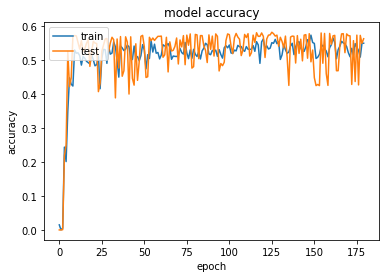

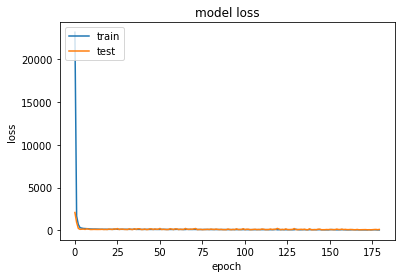

In [26]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
pred = model.predict(X_test)

In [28]:
lookid_list = list(lookup['FeatureName'])
imageID = list(lookup['ImageId']-1)
pre_list = list(pred)
rowid=list(lookup['RowId'])

In [31]:
feature = []
for f in list(lookup['FeatureName']):
    feature.append(lookid_list.index(f))

In [32]:
preded = []
for x,y in zip(imageID, feature):
    preded.append(pre_list[x][y])

In [33]:
rowid = pd.Series(rowid, name='RowId')
loc = pd.Series(preded, name='Location')
submission = pd.concat([rowid, loc], axis=1)
submission.to_csv('facial_submission.csv',index = False)